In [1]:
# load required packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load required functionality from keras
from keras.datasets import mnist
from keras import backend as keras_backend
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

Using TensorFlow backend.


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10230997206786216176
]


## MNIST Dataset
The MNIST data set is a large database of handwritten digits (0-9) that is commonly used for training and benchmarking binary classification models.

Before we create any models, we'll start by loading the MNIST data and viewing some sample images.

In [2]:
from keras.datasets import mnist

# split MNIST data into training and testing sets
# - training: data used to learn the model parameters
# - testing: a separate set that we will use to validate our model performance
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#http://yann.lecun.com/exdb/mnist/ 資料來源

11493376/11490434 [==============================] - 82s 7us/step


In [4]:
# check the dimensions of the data
print( X_train.shape) # train 60000筆 28*28
print( X_test.shape ) # test 10000筆 28*28

(60000, 28, 28)
(10000, 28, 28)


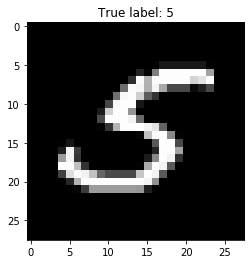

In [5]:
# select one of the images and its corresponding label
i = 403
img = X_train[i]
label = y_train[i]

# show the image and its label
plt.imshow(img, cmap='gray')
plt.title("True label: %d" % label)
plt.show()

In [6]:
def logistic_func(s):
    return 1/(1+np.exp(-s))
def predict_logistic(weight , x):
    x = np.append(x,one)
    score = logistic_func(np.dot(weight,x))
    if score > 0.5:
        return 1
    else:
        return 0

In [7]:
# Hyperplane
# https://medium.com/@ChunYeung/%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92-%E8%B6%85%E5%B9%B3%E9%9D%A2-hyperplane-bf05940bb3fd
# 三維 ax + by + cz = d 可用二維平面分割(ax1 + a2x2 = d)
# a1x1 + ... + anxn = d
weight = np.array([W1, W2, W0])
weight = np.random.uniform(size=[3]) # 包含 bias 的 weight
one = np.array([1])



NameError: name 'W1' is not defined

In [3]:
X_train = X_train.reshape(60000, -1)
print( X_train.shape)

(60000, 784)


In [41]:
"""
    步驟一 
    為每一個 pattern, pn∈ Cj , 找出屬於他的兩個集合 { pn1} 和 { pn 2}. 
    { pn1} 含 784 個與pn 最近的patterns, pm ,但不屬於 pn的Class Cj, 
    { pn1}={pm , m=1~784 | pm∉ Cj }. 
    做一個 hyperplane (784 dimensions)通過這 784個最近的 patterns, { pn1}. 
    hyperplane 在 pn 的那一邊設定為為正號.
"""
from queue import PriorityQueue
import sys

pnSet = []

for i in range(60000): #pattern pn
    pq = PriorityQueue()
    for j in range(60000):
        if y_train[i] != y_train[j]:
            temp = X_train[i] - X_train[j]
            temp = temp.astype(np.int32) #不轉會 uint8 overflow
            temp2 = np.dot(temp, temp)
            pq.put((temp2, j))
    tempList = []
    for j in range(784):
        temp = pq.get()
        if j < 3:
            print(temp)
        tempList.append(temp[1])
    print("%d: finish %d" % (i+1, y_train[i]))
    pnSet.append(tempList)
        

(3196645, 51576)
(3307269, 44051)
(3390893, 8501)
1: finish 5
(3767441, 5972)
(3996197, 36699)
(4094306, 59720)
2: finish 0
(2935218, 4226)
(3092249, 48343)
(3118183, 59360)
3: finish 4
(2417506, 16730)
(2526123, 646)
(2529764, 20720)
4: finish 1
(2789602, 11125)
(2931166, 18706)
(2977350, 13794)
5: finish 9
(3793346, 27082)
(3816881, 5972)
(3850601, 51576)
6: finish 2
(1690065, 50086)
(1759234, 51576)
(2067789, 35004)
7: finish 1
(3442307, 36605)
(3476235, 29279)
(3580153, 17244)
8: finish 3
(1540588, 46316)
(1560752, 51576)
(1569814, 37834)
9: finish 1
(3092017, 13025)
(3102163, 19557)
(3242302, 32129)
10: finish 4
(2495894, 36145)
(2554472, 25287)
(2561738, 48862)
11: finish 3
(2291133, 13973)
(2351780, 13985)
(2359101, 59783)
12: finish 5
(3788199, 51576)
(3894130, 43454)
(3955809, 48825)
13: finish 3
(3447708, 27082)
(3461167, 51576)
(3613439, 5972)
14: finish 6
(1095182, 51576)
(1351539, 21348)
(1368105, 54264)
15: finish 1
(2910474, 4122)
(3189279, 32483)
(3245415, 12925)
16: fi

(3457554, 51576)
(3604833, 50236)
(3782181, 10285)
130: finish 6
(2582958, 51576)
(3081474, 40891)
(3102303, 33205)
131: finish 3
(3473862, 32457)
(3506125, 7277)
(3523530, 30446)
132: finish 4
(1559070, 59387)
(1560750, 29479)
(1683341, 24888)
133: finish 5
(1931710, 29581)
(1952034, 31523)
(2089989, 6713)
134: finish 9
(3418447, 43146)
(3440105, 16530)
(3453268, 7790)
135: finish 1
(4112426, 5965)
(4195251, 1963)
(4204021, 32129)
136: finish 3
(2500920, 56717)
(2604458, 59382)
(2656666, 31310)
137: finish 3
(1690642, 37023)
(1714471, 59420)
(1768769, 50905)
138: finish 8
(3091621, 32325)
(3210675, 10259)
(3236639, 51576)
139: finish 5
(2564942, 51576)
(3148400, 32129)
(3160007, 27082)
140: finish 4
(2031013, 51576)
(2130912, 59382)
(2143033, 4160)
141: finish 7
(2796279, 2426)
(2811553, 13025)
(2880661, 1455)
142: finish 7
(2451036, 51576)
(2683338, 17983)
(2709991, 19412)
143: finish 4
(2936799, 51576)
(3023478, 56174)
(3061243, 10259)
144: finish 2
(2927065, 30209)
(3065493, 16907)

(2602595, 24759)
(2739978, 30627)
(2796636, 41603)
258: finish 4
(2115520, 42718)
(2163084, 6395)
(2182586, 38462)
259: finish 7
(3068437, 25798)
(3109874, 1193)
(3175316, 12947)
260: finish 5
(2951698, 55543)
(2952320, 12929)
(2958132, 29048)
261: finish 0
(3333626, 27082)
(3505489, 56742)
(3722643, 51576)
262: finish 6
(3046624, 54945)
(3243035, 51576)
(3293187, 56742)
263: finish 2
(2120855, 4122)
(2903281, 4667)
(2940128, 36104)
264: finish 7
(2798698, 55160)
(2807855, 1172)
(2885155, 7186)
265: finish 9
(3780996, 6885)
(3864331, 55579)
(3922760, 58324)
266: finish 8
(3369606, 51576)
(3600943, 56174)
(3725708, 5972)
267: finish 5
(2099594, 24975)
(2338401, 33996)
(2408502, 22858)
268: finish 9
(2790235, 51576)
(2839327, 10259)
(2961856, 27082)
269: finish 2
(1478433, 51576)
(1762638, 50086)
(1850574, 3432)
270: finish 1
(1407085, 51576)
(1461390, 56348)
(1462034, 43024)
271: finish 1
(2217263, 51576)
(2415847, 10239)
(2423000, 17706)
272: finish 4
(3134706, 172)
(3232667, 39733)
(3

(4326017, 10259)
(4563736, 12967)
(4730482, 1289)
386: finish 2
(3683364, 16530)
(4159346, 56174)
(4329098, 46246)
387: finish 8
(2795244, 19)
(2843241, 11175)
(2864988, 51576)
388: finish 7
(1893313, 31001)
(1897500, 55634)
(1932077, 34164)
389: finish 6
(2382982, 51576)
(2536833, 8471)
(2635676, 32129)
390: finish 9
(3151346, 51576)
(3527784, 56321)
(3537082, 8432)
391: finish 2
(4227093, 1317)
(4373960, 10259)
(4425221, 53028)
392: finish 2
(3918124, 51576)
(3976490, 54082)
(4037352, 24760)
393: finish 3
(2221105, 10259)
(2342651, 6885)
(2592081, 12211)
394: finish 8
(1606667, 51576)
(1876240, 50086)
(1881602, 6582)
395: finish 1
(2903952, 27082)
(2956977, 5972)
(3042807, 51576)
396: finish 6
(2373300, 10239)
(2426450, 32129)
(2599479, 1287)
397: finish 5
(1915039, 51576)
(1959985, 20862)
(2156486, 16730)
398: finish 1
(1511614, 51576)
(1622623, 54264)
(1703409, 50086)
399: finish 1
(4089476, 45845)
(4178641, 8666)
(4194755, 5972)
400: finish 0
(3363865, 51576)
(3700041, 5972)
(3880

(3083095, 13025)
(3217163, 49014)
(3223935, 22561)
514: finish 5
(2371312, 55974)
(2412976, 33224)
(2435765, 24989)
515: finish 5
(3328419, 10259)
(3792660, 41907)
(3800678, 32309)
516: finish 2
(4030186, 51576)
(4082166, 1974)
(4152088, 5972)
517: finish 5
(3557886, 10259)
(3857255, 13109)
(3875409, 1287)
518: finish 8
(2180653, 51576)
(2519202, 59382)
(2736319, 54082)
519: finish 7
(4011733, 13085)
(4084937, 38219)
(4189708, 22939)
520: finish 0
(2376681, 27980)
(2647455, 51576)
(2657974, 49078)
521: finish 9
(3324041, 32457)
(3416078, 5044)
(3569416, 12237)
522: finish 7
(2725849, 12120)
(2752245, 18935)
(2904015, 39259)
523: finish 7
(2358154, 13025)
(2418399, 59414)
(2497182, 14614)
524: finish 5
(4057721, 5972)
(4279513, 1269)
(4301912, 3216)
525: finish 0
(3123448, 54995)
(3160998, 51576)
(3170933, 4925)
526: finish 9
(4224191, 25321)
(4731953, 34524)
(4760475, 5972)
527: finish 0
(3489168, 1207)
(3566103, 8666)
(3584891, 32407)
528: finish 0
(4957344, 8552)
(5108960, 54556)
(51

(2307369, 13025)
(2479623, 23436)
(2539878, 33741)
642: finish 9
(3600259, 13109)
(3799634, 8509)
(3799700, 17244)
643: finish 2
(3374364, 5972)
(3389178, 51576)
(3505578, 8666)
644: finish 3
(1760124, 42786)
(1794384, 23160)
(1824472, 16838)
645: finish 7
(3581714, 10259)
(3697252, 17244)
(3788746, 51576)
646: finish 3
(2258752, 36145)
(2310287, 20438)
(2331904, 53110)
647: finish 2
(2309895, 17129)
(2480705, 47077)
(2491508, 37305)
648: finish 4
(1497187, 51576)
(1681853, 40891)
(1703354, 34934)
649: finish 1
(3715027, 27082)
(3715370, 51576)
(3780072, 47335)
650: finish 6
(2930232, 51576)
(2970300, 24222)
(3036902, 5972)
651: finish 2
(2698236, 32351)
(2864670, 23575)
(3029841, 32457)
652: finish 7
(2386816, 28768)
(2428390, 51576)
(2470193, 57860)
653: finish 5
(2375135, 13079)
(2875434, 10233)
(2898410, 36338)
654: finish 5
(2603111, 24927)
(2752925, 35893)
(2754416, 28774)
655: finish 7
(3327516, 34761)
(3434907, 41953)
(3476445, 4425)
656: finish 4
(2946309, 43440)
(3371848, 196

(4331133, 32475)
(4511469, 32457)
(4514408, 13077)
770: finish 8
(2543935, 56348)
(2548475, 57991)
(2548965, 33522)
771: finish 6
(3370243, 25798)
(3438981, 24677)
(3444554, 10259)
772: finish 5
(3577629, 36577)
(3890207, 10899)
(4053305, 36597)
773: finish 9
(1995022, 59058)
(2147075, 36104)
(2199253, 4460)
774: finish 7
(3923020, 37198)
(4065417, 17244)
(4107476, 1207)
775: finish 2
(2366041, 51576)
(2460429, 32129)
(2583502, 17706)
776: finish 5
(2513095, 51576)
(3005695, 1618)
(3110567, 5972)
777: finish 0
(3683836, 1201)
(3720941, 10259)
(3970334, 58316)
778: finish 8
(1758498, 12929)
(1758750, 55543)
(1758833, 57979)
779: finish 5
(2206355, 43695)
(2354202, 5972)
(2423450, 51576)
780: finish 1
(1321059, 50086)
(1386798, 51576)
(1776184, 37834)
781: finish 1
(4569315, 36439)
(5065663, 31030)
(5159582, 34747)
782: finish 0
(2499303, 58504)
(2512120, 24101)
(2596769, 28305)
783: finish 9
(1993946, 28404)
(2059296, 51576)
(2246472, 5972)
784: finish 1
(2969869, 48862)
(3015228, 20438

(3026981, 27082)
(3245545, 11947)
(3305053, 54943)
898: finish 4
(2669730, 51576)
(2818021, 52017)
(2863033, 17166)
899: finish 7
(2291764, 32129)
(2452968, 51576)
(2533690, 47373)
900: finish 5
(1761637, 38432)
(1780752, 28738)
(1806244, 32338)
901: finish 9
(3433786, 50828)
(3478061, 32475)
(3512099, 5332)
902: finish 6
(3208248, 49220)
(3293153, 57214)
(3306815, 5972)
903: finish 9
(3831004, 32407)
(4014353, 32309)
(4034445, 32279)
904: finish 0
(2693124, 25637)
(2835296, 10516)
(2867899, 24057)
905: finish 7
(1910248, 29109)
(2037098, 39357)
(2166713, 18951)
906: finish 1
(2968500, 5972)
(3037204, 56742)
(3114044, 45528)
907: finish 4
(3544707, 10259)
(3841670, 12967)
(3974390, 32309)
908: finish 2
(2830287, 48018)
(3160740, 45528)
(3168717, 56174)
909: finish 7
(3837627, 10259)
(4441341, 48533)
(4465937, 14078)
910: finish 3
(3441177, 51576)
(3631699, 5972)
(3646861, 14752)
911: finish 6
(2821809, 40469)
(2973134, 525)
(3035107, 59917)
912: finish 7
(3118692, 51576)
(3234630, 3234

(2246168, 51576)
(2646662, 5972)
(2797296, 25638)
1025: finish 5
(2316385, 12049)
(2440186, 34681)
(2500560, 18940)
1026: finish 8
(3152949, 21889)
(3195896, 39571)
(3246496, 39598)
1027: finish 8
(2201018, 19168)
(2265558, 55047)
(2288635, 32338)
1028: finish 9
(4387929, 47558)
(4686744, 5972)
(4763873, 57994)
1029: finish 0
(3650992, 20190)
(3695163, 22561)
(3803552, 7159)
1030: finish 0
(3123728, 10259)
(3673194, 5972)
(3763978, 10207)
1031: finish 4
(1782398, 20720)
(1819373, 51856)
(1829663, 51576)
1032: finish 1
(2884497, 39301)
(2889374, 11035)
(3062548, 27299)
1033: finish 5
(3512084, 13025)
(3709597, 55531)
(3845019, 1341)
1034: finish 2
(3042873, 27205)
(3106124, 27506)
(3111819, 13650)
1035: finish 2
(2866474, 33909)
(3108061, 26947)
(3197701, 33755)
1036: finish 3
(2866320, 4925)
(2955453, 13089)
(2973966, 17383)
1037: finish 9
(2037989, 32129)
(2053086, 36765)
(2163258, 55523)
1038: finish 4
(3179585, 59403)
(3214075, 39368)
(3248951, 51576)
1039: finish 9
(2983892, 22561)

(2694493, 56717)
(2848002, 51576)
(2926054, 20322)
1151: finish 3
(3551057, 53028)
(3575463, 48769)
(3578814, 10259)
1152: finish 3
(3537724, 56747)
(3579725, 5332)
(3608484, 28552)
1153: finish 0
(2701936, 13025)
(2968254, 41249)
(3024537, 34655)
1154: finish 7
(3240913, 32129)
(3423482, 12925)
(3425053, 12949)
1155: finish 7
(1887767, 51576)
(1980623, 5972)
(2017562, 10089)
1156: finish 1
(2328055, 51576)
(2474158, 46146)
(2479339, 3745)
1157: finish 7
(2865969, 37225)
(2889037, 41613)
(2977042, 13025)
1158: finish 7
(3934011, 25295)
(4147339, 59368)
(4238767, 31712)
1159: finish 3
(3087687, 32475)
(3111422, 51576)
(3316299, 27082)
1160: finish 6
(3063107, 5972)
(3128802, 14101)
(3223982, 53280)
1161: finish 4
(2716745, 39863)
(3077291, 26963)
(3105097, 33755)
1162: finish 9
(3635461, 51576)
(3766913, 5972)
(3888971, 29471)
1163: finish 5
(2750955, 13025)
(3181093, 55523)
(3200310, 51576)
1164: finish 4
(2306701, 47777)
(2340684, 46190)
(2356812, 59381)
1165: finish 4
(2678020, 51856

(3843428, 27082)
(3972447, 10259)
(4091387, 33864)
1277: finish 5
(963456, 51576)
(1238196, 19541)
(1309218, 59420)
1278: finish 1
(1768908, 29048)
(2030560, 59420)
(2207808, 51576)
1279: finish 5
(3847560, 39503)
(4417114, 37119)
(4472308, 37592)
1280: finish 8
(2706705, 54307)
(2804960, 36551)
(2862775, 32129)
1281: finish 4
(2962617, 39501)
(3167256, 1383)
(3208335, 26877)
1282: finish 7
(2514207, 59391)
(2596759, 54362)
(2647896, 59364)
1283: finish 9
(2770837, 27082)
(3035295, 13025)
(3116648, 10259)
1284: finish 5
(1908495, 16838)
(1945960, 31330)
(2024220, 14061)
1285: finish 9
(3087786, 14614)
(3196851, 10259)
(3261628, 19603)
1286: finish 5
(2412166, 32830)
(2452218, 15416)
(2529235, 51576)
1287: finish 9
(1682747, 51576)
(2223211, 5972)
(2454104, 32244)
1288: finish 1
(2708554, 44982)
(3026684, 11752)
(3072633, 47621)
1289: finish 5
(3758033, 10880)
(3903224, 1201)
(4052608, 19549)
1290: finish 8
(3883945, 26756)
(3915733, 25018)
(3959183, 40386)
1291: finish 3
(2904111, 5943

(3649980, 48018)
(3707350, 35004)
(3773232, 27082)
1403: finish 5
(4449259, 1724)
(4495675, 36599)
(5178148, 32022)
1404: finish 0
(2533268, 10259)
(2587275, 50086)
(2617466, 24622)
1405: finish 8
(2651491, 56282)
(3073916, 50236)
(3078255, 59731)
1406: finish 1
(3189456, 51576)
(3293331, 44056)
(3294787, 4677)
1407: finish 5
(3744357, 10259)
(4364787, 47069)
(4370322, 12967)
1408: finish 2
(2587189, 8467)
(2773968, 36319)
(2841263, 10516)
1409: finish 4
(3367971, 5972)
(3492823, 51576)
(3554092, 59423)
1410: finish 3
(2757823, 51576)
(2913565, 20490)
(2960917, 59414)
1411: finish 9
(3330871, 27082)
(3448089, 58316)
(3498852, 51576)
1412: finish 4
(2229709, 21590)
(2337696, 38248)
(2437011, 51576)
1413: finish 7
(2482665, 12947)
(2614808, 25798)
(2803054, 13079)
1414: finish 5
(3810412, 37183)
(3991538, 27082)
(4016402, 56174)
1415: finish 6
(2565777, 51576)
(2995231, 1512)
(3033271, 59762)
1416: finish 6
(2804585, 51576)
(2988871, 34822)
(3068546, 56684)
1417: finish 7
(2471929, 4122)

(2397919, 33506)
(2560872, 1704)
(2569696, 42114)
1529: finish 1
(1631651, 59420)
(1891190, 55513)
(2230303, 5972)
1530: finish 3
(3496342, 53028)
(3604897, 5972)
(4177759, 51576)
1531: finish 0
(2657088, 10259)
(2743444, 51576)
(2888303, 27082)
1532: finish 2
(3883578, 3742)
(4164321, 5972)
(4172589, 59395)
1533: finish 0
(3524760, 58316)
(3526891, 12949)
(3569337, 51576)
1534: finish 3
(4738570, 1618)
(4799461, 41358)
(4858057, 56174)
1535: finish 8
(2795616, 58409)
(2865252, 46002)
(2912712, 12985)
1536: finish 1
(2380869, 59420)
(2506795, 51576)
(2702065, 31962)
1537: finish 6
(3602037, 5972)
(3657257, 12989)
(3744497, 51576)
1538: finish 4
(3604691, 39503)
(3780642, 59421)
(3803688, 51576)
1539: finish 6
(3367952, 13127)
(3601654, 10259)
(3643238, 34099)
1540: finish 2
(2297143, 51576)
(2666981, 25307)
(2759235, 24222)
1541: finish 6
(3293707, 25798)
(3394752, 10259)
(3440014, 52225)
1542: finish 4
(2774373, 30471)
(2865441, 1243)
(2912228, 21301)
1543: finish 8
(3385250, 31596)
(

(1750198, 51576)
(1758581, 14930)
(1761773, 1704)
1655: finish 1
(2688006, 32816)
(2790785, 54334)
(2884341, 10235)
1656: finish 7
(1794572, 23133)
(1811891, 20870)
(1839606, 40944)
1657: finish 7
(2407719, 59420)
(2407909, 10259)
(2515412, 47678)
1658: finish 8
(1556197, 51576)
(1774050, 57718)
(1850663, 45143)
1659: finish 1
(2512626, 51576)
(2572966, 1763)
(2594228, 25613)
1660: finish 9
(3839945, 10233)
(4024079, 5972)
(4055298, 56174)
1661: finish 2
(3116687, 5972)
(3151365, 25669)
(3219275, 56999)
1662: finish 3
(3177858, 51576)
(3221439, 12957)
(3256092, 39457)
1663: finish 2
(2042410, 51576)
(2314834, 36239)
(2323478, 5972)
1664: finish 4
(4314352, 32372)
(4970746, 42247)
(4990153, 25321)
1665: finish 0
(1674020, 51576)
(1676801, 50086)
(1718713, 29105)
1666: finish 1
(3179234, 47878)
(3195637, 36145)
(3196550, 15264)
1667: finish 8
(2013867, 31945)
(2044714, 32019)
(2114899, 39193)
1668: finish 4
(2765050, 13733)
(2772768, 30030)
(2873961, 36257)
1669: finish 3
(2750045, 51576

(3296753, 17706)
(3330318, 57888)
(3348777, 13080)
1781: finish 8
(3227005, 51576)
(3266378, 59382)
(3295203, 1618)
1782: finish 6
(3421909, 10305)
(3447328, 59391)
(3447794, 51576)
1783: finish 6
(3646428, 6885)
(3739712, 55505)
(3822076, 32129)
1784: finish 8
(3449279, 30396)
(3556826, 39503)
(3633498, 9605)
1785: finish 6
(2351690, 32129)
(2585214, 21984)
(2592090, 36633)
1786: finish 5
(657868, 16676)
(787591, 59420)
(851861, 29048)
1787: finish 1
(1909292, 51576)
(1928297, 50086)
(2014626, 7414)
1788: finish 1
(3520864, 50787)
(3537484, 16003)
(3623334, 46726)
1789: finish 8
(2545044, 53561)
(2565283, 40439)
(2664512, 4122)
1790: finish 7
(5048478, 46726)
(5212128, 46246)
(5312088, 23796)
1791: finish 8
(3654444, 51576)
(3661787, 55868)
(3739777, 28147)
1792: finish 3
(2192761, 51576)
(2245771, 25307)
(2302772, 15356)
1793: finish 6
(3296146, 1375)
(3303097, 10259)
(3409766, 34090)
1794: finish 8
(2909310, 25396)
(2978520, 51576)
(3082197, 8645)
1795: finish 9
(2997603, 56174)
(30

(1863566, 50482)
(1875245, 4291)
(1906510, 39217)
1907: finish 6
(3236786, 5967)
(3366751, 8475)
(4053773, 9727)
1908: finish 0
(2477045, 51576)
(2477872, 24888)
(2494798, 41091)
1909: finish 3
(2504553, 12989)
(2991897, 57993)
(3041858, 56004)
1910: finish 1
(1597991, 37834)
(1657380, 50086)
(1729271, 51576)
1911: finish 1
(2930506, 10259)
(2988638, 5972)
(3079092, 16704)
1912: finish 4
(3051667, 10259)
(3230068, 56174)
(3244556, 48018)
1913: finish 9
(3171282, 10259)
(3176743, 13109)
(3256610, 712)
1914: finish 5
(1580958, 59420)
(1772444, 29048)
(1838096, 31962)
1915: finish 8
(2104984, 51576)
(2214180, 6816)
(2342140, 10259)
1916: finish 1
(3332986, 1190)
(3339138, 18908)
(3641463, 23628)
1917: finish 0
(2171053, 51576)
(2836037, 5972)
(3016282, 27082)
1918: finish 6
(3000707, 51576)
(3342411, 5972)
(3680945, 50791)
1919: finish 6
(2300614, 53250)
(2324849, 9817)
(2382129, 13572)
1920: finish 7
(2813496, 51576)
(3146990, 14119)
(3171721, 56717)
1921: finish 2
(2704374, 51576)
(3404

(2670236, 51576)
(2808020, 5972)
(2915274, 34822)
2033: finish 4
(2677124, 37988)
(3036660, 15035)
(3114337, 54998)
2034: finish 9
(3076843, 5972)
(3355288, 27082)
(3760855, 19519)
2035: finish 4
(2656724, 51576)
(2709722, 5972)
(3305417, 45876)
2036: finish 6
(3622010, 5972)
(3837396, 56742)
(3982177, 29328)
2037: finish 4
(2988521, 10259)
(3142034, 37183)
(3247557, 5972)
2038: finish 5
(3824965, 5972)
(3993949, 10259)
(4023161, 51576)
2039: finish 5
(2121917, 56759)
(2269558, 59403)
(2335471, 13079)
2040: finish 1
(2224117, 51576)
(2369755, 32702)
(2446793, 45528)
2041: finish 1
(2538289, 53052)
(2709861, 51576)
(2749434, 56740)
2042: finish 9
(2146687, 11622)
(2155574, 59387)
(2184588, 36145)
2043: finish 3
(3350073, 12949)
(3547578, 11395)
(3633255, 17965)
2044: finish 8
(1773527, 54380)
(1843197, 6408)
(1848478, 33600)
2045: finish 6
(2193038, 51576)
(2205667, 14614)
(2233650, 6816)
2046: finish 1
(2175018, 41706)
(2350645, 24759)
(2460949, 35127)
2047: finish 4
(1865701, 51576)
(

(2571612, 51576)
(3030662, 50883)
(3084490, 5972)
2159: finish 6
(1341242, 18704)
(1411054, 51576)
(1563934, 3692)
2160: finish 1
(4155916, 12911)
(4187834, 8473)
(4298685, 44903)
2161: finish 0
(2630762, 46065)
(2704105, 55441)
(2720448, 1751)
2162: finish 7
(1285893, 51576)
(1739632, 14930)
(1769049, 5972)
2163: finish 1
(2904078, 51576)
(3164197, 32475)
(3312912, 5972)
2164: finish 6
(3310995, 5972)
(3438398, 29328)
(3569318, 27082)
2165: finish 4
(3021351, 10259)
(3256721, 8666)
(3318379, 51576)
2166: finish 5
(1715956, 46938)
(1733667, 50905)
(1891169, 51576)
2167: finish 1
(3319171, 5972)
(3401665, 51576)
(3508878, 5332)
2168: finish 6
(1525759, 4378)
(1639343, 25874)
(1658230, 24199)
2169: finish 7
(2928111, 14614)
(3190125, 29743)
(3241260, 12600)
2170: finish 4
(4764794, 46726)
(4775459, 56742)
(4801622, 16530)
2171: finish 8
(4189143, 17244)
(4222382, 10203)
(4259735, 5972)
2172: finish 2
(3274323, 49602)
(3559349, 21570)
(3664895, 46563)
2173: finish 5
(2829835, 18935)
(2909

(3289691, 22262)
(3430234, 19907)
(3496094, 54082)
2285: finish 9
(2749019, 59420)
(2919038, 46726)
(3047926, 28389)
2286: finish 8
(1318614, 45297)
(1398924, 54579)
(1467935, 46601)
2287: finish 3
(2690429, 51576)
(2961519, 5972)
(3026059, 45223)
2288: finish 5
(4421778, 29328)
(4430823, 5972)
(4608269, 46338)
2289: finish 2
(2614069, 10516)
(2773192, 54677)
(2784579, 10247)
2290: finish 4
(3952051, 24108)
(3953696, 10381)
(3983032, 31213)
2291: finish 4
(3010352, 51576)
(3084656, 39527)
(3405043, 5332)
2292: finish 6
(2657448, 13650)
(2722087, 46104)
(2785565, 49268)
2293: finish 7
(2716563, 51576)
(3055702, 24776)
(3311507, 39683)
2294: finish 6
(2585225, 14726)
(2664091, 21301)
(2730681, 54362)
2295: finish 4
(2748420, 51576)
(3240200, 39683)
(3254023, 56174)
2296: finish 6
(2993768, 54778)
(3013514, 56717)
(3151876, 23115)
2297: finish 6
(2179261, 50754)
(2364732, 56458)
(2370227, 51576)
2298: finish 7
(3896858, 48006)
(4526168, 49828)
(4589995, 27217)
2299: finish 0
(2821771, 205

(3050288, 43874)
(3106399, 26357)
(3135640, 51576)
2411: finish 1
(4132591, 45845)
(4648530, 12989)
(4720340, 5972)
2412: finish 0
(3598570, 51576)
(3615706, 59421)
(3797010, 5972)
2413: finish 5
(4019198, 10259)
(4081831, 26094)
(4201024, 32129)
2414: finish 8
(2789778, 51576)
(3498676, 5972)
(3534377, 56174)
2415: finish 5
(2261309, 20862)
(2267456, 34236)
(2359142, 29109)
2416: finish 1
(2947901, 26116)
(2958285, 34338)
(2998560, 12120)
2417: finish 4
(3562239, 41497)
(3644084, 11382)
(3930191, 27082)
2418: finish 7
(3732573, 51576)
(4124767, 11747)
(4154915, 5972)
2419: finish 2
(2741523, 59941)
(2773515, 33297)
(2849895, 57411)
2420: finish 1
(3617663, 45528)
(3819979, 22540)
(4037246, 10215)
2421: finish 4
(3523272, 10259)
(3606977, 40567)
(3609423, 10005)
2422: finish 8
(2685950, 51576)
(2845812, 32129)
(3022686, 4142)
2423: finish 6
(3099448, 39457)
(3133474, 13019)
(3143619, 14614)
2424: finish 3
(1699862, 51576)
(2010349, 43024)
(2011104, 14866)
2425: finish 4
(2738958, 32129

(2113189, 59382)
(2309956, 25421)
(2426272, 51576)
2537: finish 3
(2800994, 20327)
(2801298, 32129)
(2944497, 3268)
2538: finish 5
(3143743, 6885)
(3180797, 652)
(3189224, 5274)
2539: finish 0
(4251050, 51191)
(4362704, 38219)
(4389360, 22889)
2540: finish 0
(3425593, 4122)
(3428068, 38137)
(3453340, 20267)
2541: finish 7
(3467274, 10259)
(3552646, 13213)
(3561890, 32129)
2542: finish 3
(2034021, 51576)
(2184533, 51516)
(2296844, 43238)
2543: finish 4
(2379722, 44375)
(2428061, 1459)
(2600238, 44361)
2544: finish 7
(2808784, 46387)
(3082335, 3775)
(3125034, 10259)
2545: finish 5
(3919734, 27082)
(3970943, 5972)
(4184291, 59399)
2546: finish 6
(1736305, 21158)
(1867616, 9097)
(1913933, 31550)
2547: finish 4
(2350024, 11457)
(2390102, 29109)
(2418597, 20862)
2548: finish 1
(3297912, 51576)
(3557146, 5972)
(3815887, 27082)
2549: finish 4
(2785298, 13025)
(2827995, 37225)
(2877897, 32129)
2550: finish 5
(2786934, 21190)
(2930770, 51576)
(2972906, 59391)
2551: finish 2
(2574989, 13025)
(265

(3414082, 5972)
(3472995, 14672)
(3560254, 51576)
2663: finish 6
(1259364, 31023)
(1322625, 50359)
(1375287, 51576)
2664: finish 1
(3043689, 5972)
(3057027, 51576)
(3284482, 53028)
2665: finish 2
(3173116, 53028)
(3247207, 10259)
(3386409, 5972)
2666: finish 4
(1734550, 25562)
(1980160, 49003)
(2005388, 30146)
2667: finish 7
(1613012, 51576)
(1705726, 6816)
(1762909, 49762)
2668: finish 1
(2965550, 31755)
(2998687, 31901)
(2999178, 16224)
2669: finish 8
(3708678, 8728)
(3736470, 48495)
(3801531, 40626)
2670: finish 3
(4542715, 10259)
(4572707, 17244)
(4610092, 20544)
2671: finish 2
(3198240, 51576)
(3403379, 56867)
(3523182, 5972)
2672: finish 3
(3431694, 56717)
(3758502, 34788)
(3823024, 34092)
2673: finish 8
(1935698, 9002)
(1956447, 53250)
(2038683, 5937)
2674: finish 7
(2563032, 51576)
(2870346, 5972)
(2908074, 8465)
2675: finish 5
(3900476, 5965)
(3906976, 37198)
(3957723, 51576)
2676: finish 3
(2735715, 51576)
(2737992, 56719)
(2751954, 28077)
2677: finish 7
(2984395, 39917)
(308

(3758951, 51576)
(3953684, 50086)
(4079208, 11374)
2789: finish 3
(3641608, 56742)
(3762500, 51576)
(3899664, 5972)
2790: finish 6
(2302082, 15959)
(2332254, 5955)
(2392526, 39102)
2791: finish 2
(1722107, 51576)
(1774875, 45992)
(1809807, 34386)
2792: finish 1
(2603232, 56717)
(2927274, 56714)
(3003168, 59364)
2793: finish 2
(3128952, 5972)
(3209124, 51576)
(3384856, 59368)
2794: finish 9
(1529412, 51576)
(2008077, 43470)
(2028440, 31856)
2795: finish 1
(3430379, 51576)
(3517820, 2003)
(3683124, 8857)
2796: finish 9
(3401485, 5972)
(3824929, 59380)
(3994091, 34524)
2797: finish 3
(3070477, 32117)
(3121946, 10259)
(3166400, 8699)
2798: finish 9
(4252971, 41724)
(4293875, 13822)
(4323324, 29341)
2799: finish 9
(3404512, 27082)
(3518516, 32457)
(3530043, 12989)
2800: finish 4
(1692892, 15356)
(1730517, 24222)
(1779416, 17706)
2801: finish 4
(2201244, 59420)
(2458422, 10259)
(2489239, 51466)
2802: finish 4
(2151355, 33110)
(2204737, 59419)
(2303101, 24888)
2803: finish 2
(3241607, 5972)
(

(3229958, 27299)
(3849601, 2652)
(3979228, 29328)
2915: finish 0
(3804934, 51576)
(3967337, 37183)
(3976750, 10259)
2916: finish 3
(3618657, 46246)
(3640848, 8661)
(3720136, 33101)
2917: finish 5
(2946669, 51576)
(2990343, 25168)
(2995720, 3090)
2918: finish 3
(1571524, 51576)
(1821539, 35480)
(1823388, 212)
2919: finish 1
(4756788, 5972)
(5044423, 37198)
(5114481, 32022)
2920: finish 0
(1497471, 51576)
(1955073, 3692)
(1956564, 50086)
2921: finish 1
(3711100, 32325)
(3753256, 10259)
(3769189, 28519)
2922: finish 5
(2425080, 51576)
(2490242, 47244)
(2536193, 17902)
2923: finish 4
(3684117, 27082)
(3759226, 51576)
(3892605, 56161)
2924: finish 6
(2831897, 20971)
(3000512, 38575)
(3004044, 43042)
2925: finish 9
(4289869, 13081)
(4310437, 58316)
(4357826, 13077)
2926: finish 6
(3073089, 51576)
(3084952, 56717)
(3124137, 24256)
2927: finish 3
(3305349, 55665)
(3341133, 12913)
(3352782, 36761)
2928: finish 8
(2961142, 51576)
(3022298, 39121)
(3075812, 45634)
2929: finish 5
(2463616, 16973)


(3716263, 27764)
(3890322, 12832)
(3907776, 37589)
3041: finish 8
(1810628, 26158)
(1830498, 51576)
(1964337, 20720)
3042: finish 1
(3020191, 51576)
(3153035, 59731)
(3238677, 1389)
3043: finish 2
(3612121, 27082)
(3699552, 54992)
(3717752, 51576)
3044: finish 6
(2651603, 51576)
(2775246, 59382)
(2957646, 14930)
3045: finish 9
(1326898, 31962)
(1327552, 59420)
(1456359, 55513)
3046: finish 1
(1390873, 59420)
(1671942, 10205)
(1715861, 31962)
3047: finish 6
(3464045, 29279)
(3497101, 51576)
(3605951, 23296)
3048: finish 3
(2203905, 51240)
(2284551, 12030)
(2287226, 34992)
3049: finish 3
(3545186, 13065)
(3558383, 55868)
(3634142, 39281)
3050: finish 0
(3043981, 37183)
(3172234, 22529)
(3187904, 11605)
3051: finish 6
(3238029, 50851)
(3239065, 47489)
(3249526, 1223)
3052: finish 3
(2374662, 51576)
(2548735, 43000)
(2596372, 14831)
3053: finish 4
(3158495, 19581)
(3208011, 27082)
(3272616, 5972)
3054: finish 6
(3411666, 51576)
(3595478, 5972)
(3868942, 10647)
3055: finish 2
(2646751, 4586

(3770534, 38605)
(3830393, 10259)
(3883409, 49713)
3166: finish 2
(2018329, 55047)
(2175513, 48461)
(2212363, 6318)
3167: finish 2
(2911513, 35125)
(2923655, 1465)
(3053651, 58129)
3168: finish 7
(3596743, 6205)
(3598966, 10259)
(3717400, 6641)
3169: finish 8
(2979062, 7309)
(3049578, 13103)
(3121362, 23661)
3170: finish 9
(2591287, 51576)
(2672440, 10235)
(2729793, 35129)
3171: finish 5
(3034763, 59180)
(3047158, 25798)
(3128485, 10259)
3172: finish 3
(2682471, 51576)
(3114878, 27082)
(3202709, 5972)
3173: finish 6
(3148927, 33103)
(3166319, 35957)
(3170661, 44409)
3174: finish 9
(2858068, 54341)
(2896065, 15356)
(2997838, 59460)
3175: finish 3
(3283207, 37198)
(3333714, 5972)
(3378557, 2023)
3176: finish 0
(3114024, 5972)
(3414898, 51576)
(3537878, 59447)
3177: finish 2
(2027837, 31856)
(2030940, 50086)
(2133583, 51576)
3178: finish 1
(3074591, 51576)
(3113664, 22859)
(3141771, 58960)
3179: finish 3
(3039284, 51576)
(3444994, 32129)
(3541714, 5972)
3180: finish 2
(2660007, 42966)
(29

(2676315, 51576)
(2801921, 6043)
(2834840, 46725)
3292: finish 3
(2701146, 51576)
(3022094, 26811)
(3083571, 51794)
3293: finish 9
(2858572, 55505)
(2869897, 1287)
(3099971, 1375)
3294: finish 8
(3183363, 51576)
(3596031, 5972)
(3614356, 56717)
3295: finish 6
(1833879, 51576)
(2123620, 50086)
(2187044, 54949)
3296: finish 1
(3178452, 48018)
(3307764, 11998)
(3703545, 16282)
3297: finish 9
(2492139, 17472)
(2666131, 26887)
(2667778, 4810)
3298: finish 6
(2624114, 51576)
(2699463, 53250)
(2730729, 36348)
3299: finish 7
(2976668, 37213)
(3030699, 55523)
(3061551, 24465)
3300: finish 8
(3140331, 10259)
(3375638, 1207)
(3462236, 37183)
3301: finish 2
(2886242, 32129)
(2929593, 14614)
(2972621, 55523)
3302: finish 5
(2854219, 4334)
(3035790, 51576)
(3056183, 8596)
3303: finish 9
(2854705, 7694)
(2866642, 56387)
(3043539, 27592)
3304: finish 9
(2956080, 51576)
(3154615, 46726)
(3253170, 59403)
3305: finish 2
(3781661, 10259)
(3785526, 1201)
(3885372, 37183)
3306: finish 2
(1645737, 13878)
(16

(2585960, 13025)
(2628509, 31185)
(2695182, 7671)
3418: finish 4
(1311123, 27168)
(1318680, 51576)
(1437340, 37834)
3419: finish 1
(2853618, 51576)
(2885203, 27448)
(2954235, 13079)
3420: finish 5
(2879840, 26940)
(3044154, 12060)
(3045754, 36145)
3421: finish 8
(2604257, 51576)
(2985813, 32129)
(3041724, 27082)
3422: finish 6
(2795436, 51576)
(3014584, 23520)
(3194742, 19721)
3423: finish 3
(2840891, 57667)
(2980204, 43042)
(3008996, 30022)
3424: finish 7
(4281942, 13185)
(4621172, 8257)
(4681808, 1010)
3425: finish 3
(2434481, 12949)
(2573188, 12215)
(2605206, 19671)
3426: finish 8
(2935721, 38204)
(2946264, 35004)
(2962962, 55633)
3427: finish 7
(1445498, 33883)
(1511737, 50359)
(1525544, 31023)
3428: finish 1
(2426173, 59149)
(2446967, 20327)
(2474904, 33232)
3429: finish 7
(3939638, 5972)
(4014891, 20735)
(4018161, 59423)
3430: finish 0
(1834813, 2044)
(1877135, 50086)
(1884816, 51576)
3431: finish 1
(1443896, 51576)
(1539181, 50086)
(1784540, 50891)
3432: finish 1
(2233798, 56717

(3354949, 51576)
(3459293, 5972)
(3886796, 37183)
3543: finish 3
(3448657, 10259)
(3761917, 5972)
(3788592, 37183)
3544: finish 6
(3371939, 35324)
(3495695, 59447)
(3504167, 5972)
3545: finish 9
(1999821, 20862)
(2025962, 3798)
(2162709, 30775)
3546: finish 1
(1395624, 51576)
(1700025, 50086)
(1788655, 14930)
3547: finish 1
(2730648, 15369)
(2771281, 54957)
(2797157, 7309)
3548: finish 4
(2733910, 31376)
(3013247, 56408)
(3047281, 40302)
3549: finish 4
(1732841, 20720)
(1736204, 5232)
(1782780, 51576)
3550: finish 1
(2756793, 51576)
(3310125, 5972)
(3727841, 21382)
3551: finish 3
(1527401, 35842)
(1585173, 36012)
(1730291, 12794)
3552: finish 1
(2910064, 34478)
(3117730, 40016)
(3162762, 43454)
3553: finish 3
(2098471, 59420)
(2226414, 16676)
(2291319, 29048)
3554: finish 2
(4025331, 56174)
(4259759, 48161)
(4299024, 31140)
3555: finish 8
(2905093, 47373)
(3033797, 13177)
(3099809, 2823)
3556: finish 8
(2090018, 14984)
(2171816, 12914)
(2217274, 18091)
3557: finish 7
(3411688, 1341)
(3

(2816687, 14015)
(3674935, 7300)
(3722235, 56004)
3669: finish 4
(3051025, 51576)
(3194234, 51924)
(3196418, 36585)
3670: finish 5
(3554062, 51576)
(3697158, 12648)
(3714651, 50442)
3671: finish 3
(4540099, 27082)
(4598322, 10259)
(4600121, 10025)
3672: finish 6
(2904354, 58239)
(3841950, 30510)
(3897945, 42226)
3673: finish 2
(3558043, 8666)
(4047301, 12989)
(4098331, 5972)
3674: finish 0
(2612330, 59382)
(2771427, 25287)
(2807451, 59460)
3675: finish 3
(1047294, 51576)
(1051717, 16676)
(1116862, 29048)
3676: finish 1
(2907906, 5972)
(2974650, 51576)
(3164529, 27082)
3677: finish 2
(4751814, 27293)
(4902378, 26882)
(4918044, 10227)
3678: finish 0
(2274098, 32558)
(2280979, 46806)
(2298091, 15356)
3679: finish 9
(4084653, 8509)
(4129402, 2873)
(4216994, 19583)
3680: finish 2
(3335763, 51576)
(3507785, 5972)
(3574166, 25728)
3681: finish 2
(3352568, 32457)
(3356032, 8898)
(3374097, 5972)
3682: finish 5
(4079691, 36567)
(4097184, 51576)
(4106349, 3992)
3683: finish 5
(3167905, 51576)
(35

(2991733, 51576)
(3092521, 39683)
(3109411, 5972)
3795: finish 6
(2868099, 48018)
(3442371, 27082)
(3512302, 41028)
3796: finish 7
(3071281, 51576)
(3071546, 48018)
(3097904, 15890)
3797: finish 9
(1951137, 51576)
(1963922, 50086)
(1993481, 5564)
3798: finish 1
(2059101, 36633)
(2169409, 31945)
(2205556, 17605)
3799: finish 7
(2412317, 51466)
(2445634, 10259)
(2603385, 55513)
3800: finish 2
(1303615, 50086)
(1539812, 51576)
(1825383, 14930)
3801: finish 1
(4246740, 1247)
(4251419, 22060)
(4272022, 10259)
3802: finish 5
(1377651, 51576)
(1673678, 50086)
(1779879, 37060)
3803: finish 1
(3102250, 51576)
(3282944, 20477)
(3292231, 36348)
3804: finish 3
(2184159, 51576)
(2494622, 59382)
(2506696, 22256)
3805: finish 7
(2823381, 24313)
(3063906, 51576)
(3087028, 39423)
3806: finish 7
(3187690, 22649)
(3266264, 28552)
(3434370, 1269)
3807: finish 0
(3186822, 10259)
(3317851, 10301)
(3428374, 6885)
3808: finish 8
(2047726, 4486)
(2083621, 54872)
(2091511, 10068)
3809: finish 6
(4517856, 5972)


(3143026, 15890)
(3287145, 59403)
(3369055, 3928)
3921: finish 3
(3383632, 30161)
(3384127, 33116)
(3422708, 5419)
3922: finish 5
(2683796, 51576)
(3080164, 5972)
(3151198, 8666)
3923: finish 5
(3671581, 10259)
(3877009, 51177)
(4042682, 8639)
3924: finish 3
(2590960, 51576)
(2841751, 28147)
(2932110, 32129)
3925: finish 2
(2544177, 29210)
(2672773, 42816)
(2756084, 44957)
3926: finish 9
(1602717, 51576)
(1670852, 50086)
(1735307, 9164)
3927: finish 1
(2372515, 7423)
(2629449, 51576)
(2637001, 20652)
3928: finish 9
(3384637, 16530)
(4540245, 46246)
(4756240, 59356)
3929: finish 8
(3793201, 32372)
(4246064, 8680)
(4493925, 5740)
3930: finish 0
(3652529, 5972)
(3667722, 27082)
(3702428, 56174)
3931: finish 2
(2367066, 15356)
(2432079, 44482)
(2571551, 53746)
3932: finish 8
(3153215, 51576)
(3187496, 27082)
(3321370, 17706)
3933: finish 6
(1878710, 51576)
(2199477, 20913)
(2276746, 5395)
3934: finish 7
(2909384, 51576)
(2918656, 24222)
(2952147, 56717)
3935: finish 2
(3132540, 51576)
(324

(3390601, 52184)
(3540322, 54592)
(3612618, 45528)
4047: finish 7
(3476450, 25798)
(3509674, 32475)
(3628733, 51576)
4048: finish 0
(3276141, 51576)
(3479121, 8465)
(3514780, 50765)
4049: finish 5
(2083438, 34218)
(2094043, 43095)
(2296396, 8480)
4050: finish 1
(2982590, 38812)
(3140872, 608)
(3166695, 20504)
4051: finish 9
(4343729, 17244)
(4572757, 7985)
(4634460, 39503)
4052: finish 2
(3931866, 16908)
(3935723, 59421)
(4094500, 31310)
4053: finish 8
(3035265, 4968)
(3142587, 21382)
(3312454, 59382)
4054: finish 3
(1617376, 16676)
(1942293, 59420)
(2005307, 31962)
4055: finish 6
(3042376, 43405)
(3180222, 2137)
(3263454, 24821)
4056: finish 4
(3034496, 47002)
(3117400, 29942)
(3212901, 59382)
4057: finish 9
(3687624, 26940)
(3766628, 51576)
(3801872, 10259)
4058: finish 5
(4451375, 10259)
(4858370, 1209)
(4863777, 42119)
4059: finish 8
(2376004, 51576)
(2778630, 5972)
(2859637, 27082)
4060: finish 6
(2518413, 51576)
(2620683, 30361)
(2637634, 48018)
4061: finish 9
(3167895, 48018)
(3

(2848360, 20918)
(2956240, 52618)
(2960740, 27231)
4173: finish 4
(3006287, 10259)
(3010432, 52311)
(3035078, 48018)
4174: finish 7
(2595692, 29261)
(2617002, 55642)
(2799449, 10480)
4175: finish 4
(2404258, 10516)
(2828429, 20267)
(2829924, 29371)
4176: finish 7
(1999361, 59420)
(2060449, 31962)
(2124297, 29048)
4177: finish 8
(3180017, 5972)
(3239421, 23247)
(3356468, 36527)
4178: finish 5
(2269688, 13649)
(2330445, 20327)
(2368705, 32129)
4179: finish 4
(3427249, 59784)
(3457186, 51576)
(3631042, 5972)
4180: finish 3
(2045606, 51576)
(2083939, 28808)
(2226071, 28547)
4181: finish 4
(4029781, 1724)
(4112407, 13303)
(4163986, 53473)
4182: finish 0
(1956389, 36145)
(2047371, 59387)
(2078141, 25287)
4183: finish 2
(2975913, 5972)
(3076065, 51576)
(3237209, 10259)
4184: finish 2
(2281346, 6378)
(2399980, 50777)
(2429385, 59460)
4185: finish 5
(2325147, 27082)
(2402652, 51576)
(2408466, 9541)
4186: finish 2
(1332634, 51576)
(1385645, 50086)
(1439932, 37834)
4187: finish 1
(3663681, 5972)


(2263639, 51576)
(2373608, 29419)
(2424241, 24240)
4299: finish 7
(2824767, 10233)
(2871472, 13079)
(3014882, 32457)
4300: finish 5
(1359570, 51576)
(1520931, 50086)
(1859536, 5972)
4301: finish 1
(3996246, 5972)
(4179867, 27082)
(4335356, 51576)
4302: finish 6
(2953659, 51576)
(3022787, 34669)
(3037971, 25307)
4303: finish 5
(3098369, 6127)
(3161644, 32457)
(3260517, 12125)
4304: finish 7
(2579307, 10285)
(2626977, 50135)
(2673420, 21791)
4305: finish 5
(3572455, 39281)
(3606879, 32129)
(3705106, 36591)
4306: finish 8
(1304490, 59420)
(1736926, 51576)
(1757491, 16676)
4307: finish 9
(3437742, 55687)
(3755221, 51576)
(3764162, 48018)
4308: finish 9
(3371452, 46726)
(3556723, 10259)
(3787240, 39503)
4309: finish 8
(2220556, 14614)
(2343040, 54226)
(2385269, 59420)
4310: finish 5
(3696934, 1269)
(3796652, 5972)
(3973223, 59474)
4311: finish 0
(1270476, 59420)
(1350399, 1339)
(1374078, 36627)
4312: finish 1
(2252208, 51576)
(2368960, 48862)
(2488272, 59391)
4313: finish 5
(3476199, 59227)

(1831997, 59420)
(1853938, 1339)
(2023519, 48092)
4425: finish 5
(2534691, 54957)
(2923637, 44323)
(2941015, 13025)
4426: finish 9
(2706578, 51576)
(3231896, 58108)
(3302684, 31930)
4427: finish 6
(3972743, 17244)
(4028299, 39553)
(4060611, 32129)
4428: finish 2
(2915873, 41897)
(2945540, 51576)
(3024345, 416)
4429: finish 2
(2908823, 51576)
(3062401, 43282)
(3063542, 51087)
4430: finish 3
(3140523, 51576)
(3557774, 43834)
(3724256, 37183)
4431: finish 6
(3691649, 11675)
(3699669, 12989)
(3791407, 4382)
4432: finish 6
(1989771, 1250)
(2119340, 51576)
(2133981, 11084)
4433: finish 7
(2997416, 32457)
(3323058, 11947)
(3348759, 2137)
4434: finish 4
(4046788, 21668)
(4057805, 21102)
(4093524, 10378)
4435: finish 8
(1615546, 50426)
(1757834, 20720)
(1760751, 26158)
4436: finish 1
(2645796, 17334)
(2794427, 24759)
(2806463, 32475)
4437: finish 4
(4174781, 12953)
(4218308, 32275)
(4249876, 47925)
4438: finish 2
(2130069, 51576)
(2389198, 50236)
(2493102, 28808)
4439: finish 4
(3103949, 8487)


(3182837, 51576)
(3417555, 5972)
(3457274, 52209)
4551: finish 2
(2123503, 28168)
(2258243, 9784)
(2477309, 50832)
4552: finish 7
(2081196, 19388)
(2160919, 51563)
(2183165, 45078)
4553: finish 3
(1969410, 1545)
(1993667, 6816)
(2037811, 51576)
4554: finish 1
(1605004, 57076)
(1720810, 51576)
(1780603, 50086)
4555: finish 1
(2635508, 54385)
(2759050, 24088)
(2879116, 51576)
4556: finish 9
(3336034, 51576)
(3436908, 5972)
(3472883, 36653)
4557: finish 0
(1126647, 51576)
(1243589, 1750)
(1244874, 28357)
4558: finish 1
(3075869, 13095)
(3156117, 12943)
(3232319, 51576)
4559: finish 5
(2599473, 2098)
(2738032, 59814)
(2800906, 47918)
4560: finish 7
(2546553, 51148)
(2590927, 51576)
(2740930, 4918)
4561: finish 6
(1992454, 51576)
(2286913, 45306)
(2302829, 50086)
4562: finish 1
(2411727, 51576)
(2608720, 54420)
(2624842, 19471)
4563: finish 5
(3747023, 5972)
(4033100, 56130)
(4066330, 39081)
4564: finish 0
(2700358, 51576)
(2768819, 27082)
(2830588, 56742)
4565: finish 4
(3681361, 5972)
(38

(2347150, 10927)
(2420053, 33297)
(2486509, 58951)
4677: finish 1
(3665556, 1836)
(3752958, 49926)
(3762275, 43637)
4678: finish 8
(3812833, 1314)
(3975969, 56174)
(4050586, 14141)
4679: finish 9
(2866005, 51576)
(2890721, 5972)
(3637010, 1826)
4680: finish 2
(2024828, 51576)
(2218972, 3770)
(2220531, 20410)
4681: finish 7
(3436552, 5972)
(3777478, 51576)
(3797408, 59380)
4682: finish 3
(4030528, 47246)
(4355604, 16161)
(4389676, 57514)
4683: finish 0
(4374577, 27082)
(4397609, 39656)
(4422281, 26756)
4684: finish 6
(4332292, 16908)
(4380634, 17100)
(4456756, 7288)
4685: finish 8
(2737581, 59850)
(2739942, 32349)
(2766542, 46246)
4686: finish 1
(3702186, 5972)
(3773498, 1269)
(3905222, 34524)
4687: finish 0
(2991907, 10259)
(3025353, 51576)
(3076642, 27082)
4688: finish 2
(3488110, 59447)
(3820988, 5972)
(3897721, 28898)
4689: finish 0
(3407057, 16282)
(3458348, 36773)
(3485948, 25072)
4690: finish 9
(2175374, 59382)
(2286813, 47248)
(2290300, 14999)
4691: finish 9
(4171467, 17706)
(42

(2554776, 51576)
(2649270, 36886)
(2748802, 24222)
4803: finish 4
(3663623, 46246)
(3680383, 46726)
(4087515, 15854)
4804: finish 8
(2401310, 17706)
(2418747, 51576)
(2492237, 50428)
4805: finish 0
(3660672, 51576)
(3876396, 5972)
(3929432, 59399)
4806: finish 2
(1714499, 59382)
(1790706, 3321)
(1794636, 25287)
4807: finish 7
(1474685, 37060)
(1503478, 26560)
(1617493, 51576)
4808: finish 1
(2679493, 51576)
(2815336, 28093)
(2850546, 56717)
4809: finish 3
(1714605, 47244)
(2039843, 7822)
(2091600, 33544)
4810: finish 7
(2616352, 59474)
(2664951, 12993)
(2879806, 14374)
4811: finish 1
(2407041, 35879)
(2422110, 25396)
(2425923, 35725)
4812: finish 9
(2000109, 36935)
(2014743, 56470)
(2081871, 16422)
4813: finish 4
(1174477, 51576)
(1218138, 50086)
(1554393, 37834)
4814: finish 1
(4579517, 27135)
(4583512, 46246)
(4656086, 59384)
4815: finish 8
(1792449, 37834)
(1929004, 27168)
(1961832, 5936)
4816: finish 1
(3062157, 42233)
(3228982, 33195)
(3309240, 43483)
4817: finish 9
(3963373, 4135

(2114858, 51576)
(2157568, 19778)
(2205459, 22256)
4929: finish 7
(3254961, 10259)
(3295058, 37183)
(3322632, 1207)
4930: finish 9
(2455639, 51576)
(3200978, 46726)
(3211557, 51652)
4931: finish 6
(3352754, 5972)
(4146833, 6290)
(4189802, 10792)
4932: finish 0
(2278519, 23115)
(2309283, 23436)
(2366551, 37023)
4933: finish 9
(1932296, 52762)
(2012010, 51576)
(2244575, 50086)
4934: finish 1
(2630276, 51576)
(3228678, 5972)
(3348262, 39683)
4935: finish 6
(3121282, 32129)
(3178965, 38605)
(3309578, 16075)
4936: finish 2
(2421194, 51576)
(2535942, 9541)
(2602566, 22750)
4937: finish 9
(3590730, 17244)
(3614466, 4040)
(3742902, 10259)
4938: finish 3
(4204029, 10259)
(4422612, 22583)
(4531435, 1179)
4939: finish 2
(2298880, 40753)
(2592585, 1905)
(2652189, 58132)
4940: finish 4
(2995033, 32129)
(3043334, 14614)
(3161032, 13079)
4941: finish 5
(2370884, 13213)
(2383831, 12971)
(2498527, 55523)
4942: finish 5
(1316548, 51576)
(1545039, 50086)
(1639149, 48614)
4943: finish 1
(3119589, 32475)
(

(2255046, 37834)
(2286636, 45143)
(2292811, 46726)
5055: finish 1
(3909762, 10259)
(3980446, 37113)
(4007991, 10227)
5056: finish 8
(4385727, 10259)
(4414452, 58288)
(4416072, 37183)
5057: finish 5
(2227604, 41605)
(2304411, 19560)
(2309301, 47398)
5058: finish 7
(1448992, 5936)
(1510942, 50086)
(1662823, 51576)
5059: finish 1
(2493975, 41613)
(2563039, 30022)
(2613840, 36348)
5060: finish 7
(2606542, 7980)
(2748056, 51576)
(2751248, 59438)
5061: finish 5
(2383708, 935)
(2555410, 1535)
(2640120, 49521)
5062: finish 5
(4057526, 528)
(4101838, 3928)
(4115555, 40386)
5063: finish 9
(3470360, 40506)
(3536034, 39877)
(3647715, 51141)
5064: finish 9
(4009296, 3090)
(4048398, 27130)
(4107274, 28838)
5065: finish 4
(3609982, 12957)
(3755197, 37225)
(3786013, 39457)
5066: finish 2
(2563162, 51576)
(3057372, 50883)
(3223166, 29370)
5067: finish 5
(3804599, 45660)
(3908135, 38613)
(4049746, 48559)
5068: finish 3
(2026702, 16376)
(2029969, 55513)
(2033466, 29048)
5069: finish 7
(2467069, 33215)
(2

(2435174, 11816)
(2562674, 32457)
(2626099, 26571)
5181: finish 4
(3116122, 15709)
(3222577, 20341)
(3256494, 35085)
5182: finish 7
(3811187, 22340)
(3913589, 23548)
(3991317, 3928)
5183: finish 7
(3978282, 6885)
(4038639, 55161)
(4052646, 13077)
5184: finish 8
(2610815, 51576)
(2995953, 5972)
(3091502, 56174)
5185: finish 3
(2990266, 11227)
(3024643, 230)
(3053690, 16756)
5186: finish 9
(2901572, 51576)
(3144831, 56717)
(3205855, 59382)
5187: finish 3
(4599729, 32349)
(4906779, 24677)
(4989804, 751)
5188: finish 0
(2068354, 25307)
(2075884, 59414)
(2101770, 48862)
5189: finish 5
(1779412, 29109)
(1981178, 25482)
(2029531, 39647)
5190: finish 1
(2523803, 51576)
(2673983, 59403)
(3005209, 29279)
5191: finish 3
(4325847, 10259)
(4549730, 29328)
(4738787, 5972)
5192: finish 2
(4287621, 5332)
(4404064, 51576)
(4427561, 46246)
5193: finish 0
(3501304, 4495)
(3565672, 10259)
(3574714, 51576)
5194: finish 3
(4119338, 5972)
(4233806, 8886)
(4236185, 26077)
5195: finish 0
(3107293, 22939)
(3197

(2419283, 51576)
(2528685, 26687)
(2592581, 59387)
5307: finish 2
(2673361, 51453)
(2734024, 50086)
(2804916, 59419)
5308: finish 2
(2927985, 5972)
(2998867, 51576)
(3037693, 30342)
5309: finish 7
(2954912, 39527)
(3018979, 13025)
(3140021, 50086)
5310: finish 5
(3012393, 33789)
(3066762, 56717)
(3067765, 51576)
5311: finish 6
(3724668, 5972)
(4029646, 51576)
(4032731, 39503)
5312: finish 6
(3635259, 9870)
(3658045, 36679)
(3717433, 48802)
5313: finish 7
(3185953, 27082)
(3634718, 5972)
(3651192, 51576)
5314: finish 4
(2879454, 32129)
(3081111, 55523)
(3271114, 19461)
5315: finish 2
(4051721, 39453)
(4105828, 1480)
(4158753, 51576)
5316: finish 3
(3737411, 59361)
(3764491, 25295)
(3765916, 56174)
5317: finish 9
(3726957, 5972)
(4047814, 10271)
(4115860, 59423)
5318: finish 0
(4012332, 27082)
(4215027, 51576)
(4285844, 59474)
5319: finish 2
(4835143, 44101)
(5062984, 31030)
(5260733, 25321)
5320: finish 0
(3603484, 40386)
(4139167, 35324)
(4172124, 48018)
5321: finish 9
(4286568, 25321)

(2184856, 59382)
(2323775, 48862)
(2335913, 59460)
5433: finish 3
(2655989, 51576)
(2811551, 59420)
(2942681, 5972)
5434: finish 3
(2853719, 15356)
(2887318, 51576)
(2893118, 48862)
5435: finish 3
(3612661, 10259)
(3681497, 12989)
(3716455, 32429)
5436: finish 8
(3415195, 12430)
(3793487, 51576)
(3831175, 44676)
5437: finish 2
(2996396, 18935)
(3205592, 4689)
(3312286, 55247)
5438: finish 7
(3953705, 41358)
(4093422, 59447)
(4098417, 16118)
5439: finish 2
(2041335, 52894)
(2120455, 51576)
(2190044, 45116)
5440: finish 1
(1783421, 47777)
(1794422, 48454)
(1805555, 13992)
5441: finish 5
(2199274, 1895)
(2496575, 18885)
(2523765, 4667)
5442: finish 7
(3680813, 5972)
(3991246, 41358)
(4223271, 50736)
5443: finish 3
(2446284, 56282)
(2517893, 50236)
(2692242, 41966)
5444: finish 1
(2057864, 51576)
(2317573, 17440)
(2386812, 7798)
5445: finish 4
(2529959, 51576)
(2553431, 11991)
(2633205, 34668)
5446: finish 4
(2453141, 4122)
(2783678, 19393)
(2789513, 16814)
5447: finish 7
(2148890, 36348)


(2140945, 12820)
(2157362, 8861)
(2293567, 21651)
5559: finish 9
(2933267, 59124)
(2949764, 43763)
(2953264, 1523)
5560: finish 9
(3691735, 53638)
(3834042, 5972)
(4181361, 45968)
5561: finish 0
(3165381, 51576)
(3418056, 40043)
(3512930, 5332)
5562: finish 6
(2896028, 10259)
(3076132, 56666)
(3223827, 51137)
5563: finish 3
(4141009, 59423)
(4250666, 8666)
(4265585, 22763)
5564: finish 0
(1408842, 28488)
(1578032, 41733)
(1650934, 35819)
5565: finish 7
(2717939, 28677)
(2726100, 10381)
(2850693, 12607)
5566: finish 7
(3705081, 5972)
(3762491, 59399)
(3903664, 59393)
5567: finish 6
(3597431, 24757)
(3608327, 11035)
(3885815, 15890)
5568: finish 3
(2151975, 59382)
(2202461, 59419)
(2215281, 14614)
5569: finish 7
(2324912, 54021)
(2507193, 5595)
(2554271, 1555)
5570: finish 7
(1208581, 51576)
(1329014, 50086)
(1388435, 37834)
5571: finish 1
(1382185, 51576)
(1490577, 50359)
(1542785, 15168)
5572: finish 1
(2836220, 1308)
(2871505, 59403)
(2897951, 31774)
5573: finish 9
(2832866, 10259)
(3

(3531729, 48018)
(3716909, 56516)
(3885302, 10259)
5685: finish 6
(3018221, 5972)
(3149175, 34099)
(3154639, 10259)
5686: finish 5
(2642217, 56470)
(2661014, 13103)
(2667509, 30752)
5687: finish 6
(3825681, 51576)
(3862259, 5972)
(4040426, 37198)
5688: finish 3
(2716311, 51576)
(2717144, 13109)
(2899652, 14614)
5689: finish 5
(3443060, 5972)
(3623264, 10259)
(3762208, 51576)
5690: finish 4
(3501345, 48618)
(3549477, 53999)
(3558231, 6213)
5691: finish 0
(1740750, 25200)
(2028984, 52842)
(2031483, 5564)
5692: finish 1
(4471938, 13622)
(4639481, 5972)
(4824931, 16064)
5693: finish 0
(2771992, 51576)
(3135265, 32475)
(3239360, 5972)
5694: finish 6
(4394253, 20221)
(5104448, 22869)
(5484001, 57754)
5695: finish 0
(3611794, 6885)
(3836740, 31596)
(4045685, 1201)
5696: finish 8
(3563487, 8491)
(3633387, 59414)
(3702122, 16092)
5697: finish 8
(1942896, 55513)
(2315858, 39231)
(2328622, 53028)
5698: finish 0
(4345631, 59431)
(4914167, 59399)
(5010857, 59447)
5699: finish 0
(4167243, 6885)
(425

(3371386, 51576)
(3451996, 5972)
(3687370, 59403)
5811: finish 6
(2032432, 53146)
(2038473, 41603)
(2112410, 12654)
5812: finish 7
(2755362, 56717)
(2919841, 51576)
(3043898, 23996)
5813: finish 3
(2589500, 7239)
(2766422, 22)
(2887775, 51576)
5814: finish 4
(1331297, 51576)
(1453036, 20158)
(1490725, 37060)
5815: finish 1
(3980813, 13051)
(3998343, 32129)
(4007197, 10259)
5816: finish 2
(2729088, 44676)
(2769486, 51576)
(2921002, 59391)
5817: finish 2
(2240545, 7009)
(2648132, 30841)
(2655412, 6947)
5818: finish 9
(1841680, 24684)
(1875625, 36315)
(1891767, 17472)
5819: finish 7
(3761300, 6885)
(3795424, 13077)
(3798558, 12989)
5820: finish 8
(2354645, 51576)
(3067653, 5972)
(3112054, 59382)
5821: finish 3
(2281507, 37213)
(2572386, 36765)
(2608057, 54021)
5822: finish 7
(2283972, 51576)
(2361181, 8637)
(2390325, 35002)
5823: finish 4
(4059676, 10259)
(4082734, 32011)
(4168656, 41893)
5824: finish 2
(838526, 16676)
(968073, 59420)
(968845, 31962)
5825: finish 1
(2494439, 36013)
(26761

(1514677, 48127)
(1555487, 7020)
(1580591, 52668)
5937: finish 4
(2599043, 51576)
(2653104, 23436)
(2690047, 8501)
5938: finish 9
(3748847, 18423)
(4008429, 8666)
(4155783, 5972)
5939: finish 0
(3594010, 43059)
(3645452, 8666)
(3773158, 13077)
5940: finish 5
(2779647, 9519)
(2805560, 31730)
(3276657, 29491)
5941: finish 9
(3251461, 10259)
(3496412, 35674)
(3627626, 17156)
5942: finish 3
(3173583, 14512)
(3194623, 32325)
(3204334, 44662)
5943: finish 3
(3120704, 24101)
(3298449, 49417)
(3395194, 8666)
5944: finish 9
(1892940, 43340)
(2406097, 42290)
(2412574, 53070)
5945: finish 4
(2585208, 13025)
(2862217, 47373)
(2978155, 32129)
5946: finish 4
(3019845, 29261)
(3086472, 29475)
(3126622, 55097)
5947: finish 7
(3076383, 13025)
(3198349, 32413)
(3361408, 32129)
5948: finish 5
(3435220, 5972)
(3439882, 51576)
(3519800, 10259)
5949: finish 6
(3985350, 12989)
(4220238, 6885)
(4253281, 12953)
5950: finish 8
(1589559, 51576)
(1647942, 8428)
(1747029, 31856)
5951: finish 1
(3474525, 27082)
(35

(1278889, 51576)
(1427928, 50086)
(1651579, 24622)
6063: finish 1
(3334878, 10259)
(3571425, 37183)
(3960676, 17244)
6064: finish 2
(2103786, 20327)
(2249462, 24927)
(2307369, 33232)
6065: finish 7
(4155988, 10304)
(4602780, 49761)
(4919154, 27217)
6066: finish 0
(4281200, 41358)
(4578144, 36527)
(4588850, 36014)
6067: finish 8
(2883915, 55744)
(3000121, 51576)
(3022384, 8645)
6068: finish 9
(1358694, 59420)
(1553344, 31962)
(1657860, 39131)
6069: finish 5
(4400256, 43199)
(4422153, 12513)
(4547145, 11029)
6070: finish 3
(1598467, 51576)
(1980908, 50086)
(2068167, 34669)
6071: finish 1
(2109549, 5972)
(2332923, 59420)
(2648679, 51576)
6072: finish 3
(3059150, 17706)
(3151651, 59391)
(3307804, 15356)
6073: finish 8
(2723211, 48053)
(2927959, 1208)
(3042890, 51576)
6074: finish 9
(2501224, 22394)
(2715833, 54427)
(2751090, 40933)
6075: finish 9
(1924650, 34669)
(2236961, 34090)
(2299208, 15987)
6076: finish 1
(5112137, 52004)
(5360013, 4462)
(5432448, 31030)
6077: finish 0
(3184496, 1025

(1699180, 59414)
(1824143, 15356)
(1833790, 51576)
6189: finish 5
(2921771, 12989)
(3080174, 32457)
(3115888, 5959)
6190: finish 4
(3549103, 8475)
(4058389, 41358)
(4479564, 5972)
6191: finish 2
(3223839, 3928)
(3250980, 39298)
(3260114, 6058)
6192: finish 9
(1506174, 51576)
(1580869, 50086)
(1600028, 37834)
6193: finish 1
(3575419, 12989)
(3575584, 13081)
(3580369, 13077)
6194: finish 4
(2126776, 59420)
(2320063, 16676)
(2450476, 31962)
6195: finish 6
(3291111, 27082)
(3446350, 44163)
(3473352, 10233)
6196: finish 5
(3014224, 56717)
(3208940, 43850)
(3218277, 34992)
6197: finish 8
(2017212, 10259)
(2052286, 51576)
(2219373, 45874)
6198: finish 1
(3199997, 20842)
(3237682, 26248)
(3269077, 40517)
6199: finish 5
(3613025, 13109)
(3619873, 32475)
(3662473, 11781)
6200: finish 8
(1955474, 31962)
(2410426, 59420)
(2413474, 29048)
6201: finish 5
(3962705, 27082)
(4119652, 5972)
(4253862, 10259)
6202: finish 6
(2481819, 44482)
(2529843, 1816)
(2558672, 14964)
6203: finish 7
(4218228, 31596)


(3327813, 5972)
(3374030, 27082)
(3440464, 59409)
6315: finish 4
(2408160, 11947)
(2541153, 41875)
(2591620, 8585)
6316: finish 7
(1537025, 31962)
(1931295, 5972)
(2062873, 51576)
6317: finish 0
(3400279, 13065)
(3470751, 10259)
(3529126, 44383)
6318: finish 3
(1541930, 45143)
(1642161, 49240)
(1876989, 370)
6319: finish 1
(2372930, 38526)
(2417420, 51942)
(2468695, 37988)
6320: finish 7
(3183869, 20416)
(3267269, 5332)
(3338040, 51576)
6321: finish 0
(2987424, 39639)
(3010598, 11781)
(3130249, 36609)
6322: finish 8
(3240377, 1337)
(3293012, 39301)
(3330510, 62)
6323: finish 8
(3024017, 5972)
(3030091, 51576)
(3228757, 10259)
6324: finish 4
(3537211, 5972)
(3666995, 10259)
(3702761, 59403)
6325: finish 5
(4108812, 8666)
(4306976, 12989)
(4478508, 5972)
6326: finish 0
(2985986, 2242)
(3207416, 22649)
(3324897, 28339)
6327: finish 0
(3688571, 5972)
(3955820, 29341)
(3999868, 27082)
6328: finish 2
(2140521, 1070)
(2157888, 9997)
(2178421, 37230)
6329: finish 1
(2897991, 10259)
(3072799, 5

(3207781, 51576)
(3210499, 5972)
(3271764, 48548)
6441: finish 3
(3900638, 49545)
(3998842, 665)
(4051539, 5972)
6442: finish 0
(3226178, 41358)
(3445464, 37183)
(3502441, 5972)
6443: finish 2
(1785418, 29109)
(2107839, 20862)
(2214350, 39519)
6444: finish 1
(5120761, 5972)
(5366340, 27293)
(5374770, 27804)
6445: finish 0
(3621728, 19557)
(3944806, 29328)
(4004369, 5972)
6446: finish 2
(3555270, 51576)
(3656084, 5972)
(3862989, 26946)
6447: finish 0
(3871178, 10259)
(4019209, 1289)
(4024998, 51576)
6448: finish 3
(3150569, 27082)
(3154418, 51576)
(3278340, 34767)
6449: finish 4
(2860552, 51981)
(2968125, 27817)
(3096284, 32457)
6450: finish 4
(3514657, 5972)
(3645529, 51576)
(3702012, 56174)
6451: finish 3
(2490273, 10259)
(2544880, 14614)
(2571218, 27082)
6452: finish 5
(3010891, 11605)
(3040886, 1207)
(3126033, 51576)
6453: finish 6
(3613772, 51576)
(3751859, 39503)
(3762922, 5972)
6454: finish 6
(2488483, 19437)
(2600689, 34377)
(2659343, 3398)
6455: finish 4
(2728625, 47918)
(27857

(2651419, 10301)
(2689576, 32129)
(2764060, 34668)
6567: finish 7
(2534263, 51576)
(3131556, 5332)
(3172067, 1512)
6568: finish 6
(1599188, 51576)
(1652496, 11759)
(1804764, 50359)
6569: finish 1
(2838733, 32129)
(2991120, 31014)
(2994985, 20327)
6570: finish 5
(1446579, 37834)
(1784890, 14930)
(1818364, 50086)
6571: finish 1
(2707739, 51576)
(3189978, 5332)
(3350186, 58316)
6572: finish 6
(2994878, 51576)
(3239526, 17518)
(3359755, 58316)
6573: finish 6
(3346753, 32475)
(3412315, 11395)
(3418670, 41839)
6574: finish 8
(3486388, 5972)
(3504118, 51576)
(3599398, 59421)
6575: finish 6
(1662784, 51576)
(1828499, 49240)
(1868680, 23782)
6576: finish 1
(3148551, 51576)
(3365881, 5972)
(3508891, 286)
6577: finish 3
(2568789, 46314)
(2885752, 47500)
(2902227, 17474)
6578: finish 9
(2754267, 51576)
(3347443, 5972)
(3431279, 39683)
6579: finish 6
(2417919, 51913)
(2668756, 16939)
(2686283, 51576)
6580: finish 7
(4429353, 25291)
(4437152, 53638)
(4489388, 41358)
6581: finish 8
(3055951, 51576)
(

(4324384, 27082)
(4330189, 46166)
(4463701, 7985)
6693: finish 6
(2689227, 51576)
(2745601, 32129)
(2801378, 24715)
6694: finish 6
(3642263, 40226)
(3694316, 21517)
(3736893, 41804)
6695: finish 9
(1976409, 20327)
(2102398, 49096)
(2163706, 4685)
6696: finish 7
(2181979, 31089)
(2260724, 59419)
(2295767, 4160)
6697: finish 7
(2221481, 59420)
(2521198, 31482)
(2536954, 31366)
6698: finish 8
(1173599, 51576)
(1295994, 50086)
(1443892, 14930)
6699: finish 1
(2044205, 31945)
(2046299, 19227)
(2062548, 35554)
6700: finish 9
(4625193, 31030)
(4658114, 25321)
(4713044, 5972)
6701: finish 0
(1466295, 51576)
(1531427, 9104)
(1579731, 45143)
6702: finish 1
(1674628, 50086)
(1844170, 39520)
(1877497, 51576)
6703: finish 1
(2780796, 28521)
(2791889, 21889)
(2819677, 13399)
6704: finish 8
(4233748, 59473)
(4263606, 11310)
(4292108, 29410)
6705: finish 0
(3001040, 51576)
(3005826, 32129)
(3041687, 10301)
6706: finish 6
(4115135, 5972)
(4361975, 51576)
(4786069, 13336)
6707: finish 3
(1911807, 10580)

(2466597, 41909)
(2578014, 55173)
(2599984, 5235)
6818: finish 4
(2332186, 51576)
(2564512, 50757)
(2577806, 33218)
6819: finish 7
(2690596, 10285)
(2718121, 37213)
(2808770, 6003)
6820: finish 0
(2476854, 51576)
(2526086, 4160)
(2619163, 36165)
6821: finish 9
(2908922, 58988)
(2915287, 16419)
(2945215, 40067)
6822: finish 9
(1015119, 51576)
(1296878, 50086)
(1522776, 9560)
6823: finish 1
(2722271, 36765)
(2857328, 32129)
(2947688, 18196)
6824: finish 0
(4165891, 33844)
(4184520, 20267)
(4257070, 11746)
6825: finish 7
(2686470, 10301)
(2703611, 3289)
(2717457, 7857)
6826: finish 3
(3964239, 47660)
(4112953, 25429)
(4190202, 29604)
6827: finish 3
(2112320, 36145)
(2163065, 20990)
(2172613, 15356)
6828: finish 3
(2053753, 31169)
(2119562, 23045)
(2136178, 23037)
6829: finish 6
(2930135, 51576)
(3016780, 42229)
(3027969, 10233)
6830: finish 5
(3627051, 24108)
(3635701, 22060)
(3864860, 5972)
6831: finish 5
(2316637, 16181)
(2324769, 52187)
(2382907, 38462)
6832: finish 8
(2496183, 51576)


(4371919, 41084)
(4467523, 34861)
(4487387, 10259)
6944: finish 8
(4199182, 10259)
(4233120, 34099)
(4282766, 5972)
6945: finish 2
(3374343, 51576)
(3600331, 5972)
(3626582, 34848)
6946: finish 3
(2286460, 51576)
(2306532, 29299)
(2357275, 36386)
6947: finish 1
(2309682, 32064)
(2315468, 57033)
(2343312, 2331)
6948: finish 7
(3268288, 5972)
(3467512, 51576)
(3750681, 41358)
6949: finish 2
(2718704, 10875)
(2911737, 35623)
(2943250, 9825)
6950: finish 4
(2724266, 51576)
(2837766, 47094)
(2912808, 35980)
6951: finish 9
(1844680, 5564)
(1892432, 50359)
(1970877, 45185)
6952: finish 1
(3786749, 6439)
(3789214, 28161)
(3798717, 10259)
6953: finish 8
(3115993, 19121)
(3194494, 59079)
(3226450, 5044)
6954: finish 7
(2315617, 23115)
(2317436, 3321)
(2339364, 51576)
6955: finish 6
(2889787, 47489)
(2992696, 21091)
(2998301, 12910)
6956: finish 4
(1341910, 4160)
(1604812, 14061)
(1623999, 45078)
6957: finish 7
(3678227, 10259)
(4285909, 6885)
(4353133, 34861)
6958: finish 8
(3693610, 51576)
(371

(2263898, 49458)
(2490039, 15019)
(2585752, 5976)
7070: finish 9
(3259944, 19666)
(3271228, 1193)
(3364056, 51576)
7071: finish 9
(2525261, 52337)
(2587454, 13789)
(2591982, 58708)
7072: finish 9
(3937566, 17360)
(4019127, 8475)
(4045937, 1377)
7073: finish 2
(2348776, 32129)
(2353351, 27082)
(2396074, 17472)
7074: finish 5
(2365442, 59403)
(2415204, 33506)
(2417362, 37060)
7075: finish 1
(2024293, 33297)
(2238899, 8480)
(2637994, 10927)
7076: finish 1
(4277858, 21330)
(4409543, 6524)
(4447787, 28407)
7077: finish 8
(2195586, 14008)
(2361970, 13025)
(2392090, 58152)
7078: finish 4
(1494140, 51576)
(1927816, 5972)
(2017352, 10259)
7079: finish 1
(3074693, 1339)
(3090052, 1873)
(3151449, 12063)
7080: finish 2
(3188859, 1752)
(3285144, 9671)
(3330799, 51576)
7081: finish 3
(1641581, 59420)
(1835453, 31962)
(1959799, 667)
7082: finish 5
(2524933, 43715)
(2694709, 35900)
(2696276, 48461)
7083: finish 2
(3007025, 49551)
(3158591, 32173)
(3187223, 49531)
7084: finish 4
(1593574, 50086)
(17453

(3585824, 27082)
(3694509, 11605)
(3738317, 5972)
7196: finish 6
(2817734, 32129)
(2833238, 19461)
(2862924, 51576)
7197: finish 2
(1912322, 1585)
(2099104, 22423)
(2272585, 41135)
7198: finish 7
(3145673, 13174)
(3205191, 9519)
(3205232, 31374)
7199: finish 9
(2936243, 59787)
(2972506, 30457)
(2982293, 57301)
7200: finish 8
(2039327, 15356)
(2309050, 42702)
(2415910, 59460)
7201: finish 9
(2313694, 48461)
(2352367, 17888)
(2352652, 52687)
7202: finish 9
(3672505, 45528)
(3859723, 5972)
(3874827, 10259)
7203: finish 6
(4125056, 1991)
(4408974, 12989)
(4556195, 43699)
7204: finish 0
(3250564, 45528)
(3497316, 1618)
(3573182, 31712)
7205: finish 4
(1553362, 51576)
(1606684, 53548)
(1634651, 15952)
7206: finish 1
(2100604, 51576)
(2919002, 39683)
(2991596, 56775)
7207: finish 6
(4007491, 5299)
(4179891, 36605)
(4188622, 24757)
7208: finish 2
(2412262, 33498)
(2442657, 43898)
(2449131, 51162)
7209: finish 9
(3054689, 13095)
(3141499, 51576)
(3223338, 17706)
7210: finish 3
(1927275, 15356)


(2891912, 32129)
(2983807, 13025)
(2988659, 27082)
7322: finish 5
(2070059, 51576)
(2819217, 5972)
(2847769, 10259)
7323: finish 3
(2321113, 3321)
(2326538, 46725)
(2358174, 36591)
7324: finish 5
(1335133, 51576)
(1466364, 50086)
(1765626, 29286)
7325: finish 1
(2967956, 32129)
(3237626, 39281)
(3238426, 32315)
7326: finish 0
(2986747, 51576)
(3302121, 32129)
(3317567, 5972)
7327: finish 2
(2594016, 13025)
(2672339, 47373)
(2777763, 12949)
7328: finish 4
(4813306, 26017)
(4963285, 41358)
(4972309, 15890)
7329: finish 8
(2342342, 31766)
(2374449, 36380)
(2428800, 174)
7330: finish 8
(1575063, 21348)
(1575272, 51576)
(1589840, 37834)
7331: finish 1
(2711648, 29180)
(2759361, 13025)
(2815837, 30623)
7332: finish 7
(2448890, 25327)
(2522994, 59382)
(2523478, 56717)
7333: finish 3
(2600956, 13025)
(2687149, 18899)
(2698684, 30035)
7334: finish 4
(3597910, 11947)
(3616239, 4122)
(3647894, 1905)
7335: finish 7
(2297633, 13025)
(2468142, 1211)
(2476256, 48645)
7336: finish 9
(2289160, 48862)
(

(1981083, 22858)
(2285362, 29549)
(2340305, 35980)
7448: finish 9
(2680046, 7356)
(2709438, 13103)
(2730639, 26612)
7449: finish 5
(2586040, 51576)
(3226483, 59461)
(3293018, 21805)
7450: finish 5
(3759684, 34478)
(3811688, 5136)
(3825619, 19695)
7451: finish 8
(3216868, 51576)
(3497215, 6963)
(3529193, 26624)
7452: finish 0
(2054656, 35508)
(2155803, 20438)
(2156261, 128)
7453: finish 6
(3519656, 46726)
(3592184, 20366)
(3666748, 9293)
7454: finish 8
(1933010, 50905)
(1987633, 48762)
(2011112, 51576)
7455: finish 1
(2701115, 44982)
(2919020, 15356)
(2936647, 30874)
7456: finish 3
(3208201, 39683)
(3281469, 51576)
(3416105, 5972)
7457: finish 6
(3607403, 51576)
(4045189, 10221)
(4128184, 39489)
7458: finish 5
(2785469, 51576)
(3005349, 50791)
(3102161, 5972)
7459: finish 0
(2106516, 51576)
(2200099, 39096)
(2309067, 51942)
7460: finish 4
(2780563, 32055)
(2859891, 32365)
(2873686, 26887)
7461: finish 6
(3292138, 39301)
(3503513, 52907)
(3508945, 17706)
7462: finish 8
(4099493, 5972)
(4

(2218280, 47082)
(2312734, 10198)
(2317491, 51576)
7574: finish 4
(1595799, 21348)
(1650188, 51576)
(1813422, 3692)
7575: finish 1
(3126135, 7869)
(3440640, 50905)
(3531371, 37183)
7576: finish 8
(3228788, 5972)
(3350227, 41358)
(3789967, 47558)
7577: finish 2
(2838089, 51576)
(3224245, 32129)
(3300889, 10259)
7578: finish 6
(2608300, 17706)
(2657301, 51576)
(2731327, 14988)
7579: finish 4
(2084784, 31330)
(2169782, 51576)
(2183049, 51942)
7580: finish 4
(2724286, 51576)
(2743706, 5972)
(3180093, 27082)
7581: finish 6
(2217044, 51576)
(2613979, 59859)
(2686172, 39527)
7582: finish 6
(3357990, 17244)
(3380008, 56666)
(3775664, 51576)
7583: finish 3
(3202634, 51576)
(3406118, 5972)
(3770921, 42533)
7584: finish 5
(2088442, 36145)
(2248388, 29479)
(2279611, 59382)
7585: finish 3
(2969206, 5274)
(3043235, 51576)
(3128960, 1092)
7586: finish 0
(2946622, 46726)
(3174632, 1201)
(3399236, 11781)
7587: finish 8
(3434986, 51576)
(3611208, 8904)
(3620475, 59474)
7588: finish 2
(1414876, 3840)
(14

(2586654, 13025)
(2601951, 17472)
(2622618, 22561)
7700: finish 5
(3570684, 5972)
(3654531, 5332)
(3695938, 51576)
7701: finish 6
(3030471, 10259)
(3381327, 51339)
(3397739, 52983)
7702: finish 3
(2083694, 21590)
(2240518, 51576)
(2756037, 36551)
7703: finish 9
(3344662, 32457)
(3510273, 33211)
(3560558, 58978)
7704: finish 4
(2906842, 37213)
(2952135, 10669)
(2959684, 12949)
7705: finish 8
(2807773, 11991)
(2877104, 13025)
(2982357, 37213)
7706: finish 4
(3958267, 41358)
(4619026, 59429)
(4630707, 35924)
7707: finish 2
(4369375, 12989)
(4408932, 29328)
(4428895, 5972)
7708: finish 0
(3149591, 51576)
(3193503, 5972)
(3376081, 1389)
7709: finish 0
(4397686, 13303)
(4425712, 47451)
(4437371, 13085)
7710: finish 0
(2734962, 51576)
(2968776, 19562)
(3001461, 40874)
7711: finish 0
(3133561, 51576)
(3464715, 5972)
(3533380, 27082)
7712: finish 6
(3403930, 48163)
(3568574, 39503)
(3661097, 39527)
7713: finish 8
(3283345, 24101)
(3372114, 53171)
(3376487, 59647)
7714: finish 9
(2330690, 51576)

(3101989, 6885)
(3228712, 25798)
(3338441, 10239)
7826: finish 8
(2599262, 20216)
(2623514, 27605)
(2629787, 55978)
7827: finish 4
(4279821, 22939)
(4410647, 10261)
(4416502, 32459)
7828: finish 2
(2571249, 20172)
(2990362, 1586)
(3008658, 30598)
7829: finish 1
(2916669, 51576)
(3092848, 26624)
(3144341, 4142)
7830: finish 6
(3767538, 8666)
(3945088, 5972)
(4000629, 14614)
7831: finish 0
(2170900, 16730)
(2191115, 51576)
(2469959, 5972)
7832: finish 1
(2178043, 36315)
(2280421, 51576)
(2305698, 19517)
7833: finish 3
(2484642, 10259)
(2542878, 59420)
(2764189, 51466)
7834: finish 5
(1666181, 37834)
(1709222, 27168)
(1850052, 5936)
7835: finish 1
(4342792, 10207)
(4468837, 36581)
(4482846, 13303)
7836: finish 0
(2535353, 39232)
(2557871, 14560)
(2573240, 34483)
7837: finish 8
(2257913, 41358)
(2356432, 56282)
(2470006, 13065)
7838: finish 1
(1485577, 37834)
(1568273, 51576)
(1598822, 50086)
7839: finish 1
(3003518, 5972)
(3038074, 51576)
(3198991, 59409)
7840: finish 2
(3351244, 42127)
(

(1928538, 10927)
(2138093, 56282)
(2209788, 46016)
7952: finish 1
(2660430, 51576)
(2778726, 21130)
(3029295, 46726)
7953: finish 9
(3496142, 5972)
(3803378, 51576)
(3861121, 41358)
7954: finish 2
(3211098, 1207)
(3300835, 7250)
(3306158, 55868)
7955: finish 0
(3132128, 32377)
(3236328, 32457)
(3252949, 31987)
7956: finish 4
(3452600, 56717)
(3453488, 9256)
(3645791, 39776)
7957: finish 8
(1265813, 59420)
(1523540, 28423)
(1660031, 51576)
7958: finish 6
(2524223, 28422)
(2720208, 34822)
(2724144, 51576)
7959: finish 4
(1282205, 59420)
(1745986, 8671)
(1765562, 40477)
7960: finish 7
(3186652, 12153)
(3330026, 17244)
(3373111, 37198)
7961: finish 2
(1958914, 1441)
(2218738, 23436)
(2445599, 1585)
7962: finish 7
(2483781, 51576)
(2888982, 33886)
(2999794, 16118)
7963: finish 5
(3167643, 32129)
(3333240, 11998)
(3348943, 8886)
7964: finish 5
(2873452, 54703)
(2966017, 13065)
(3002009, 51576)
7965: finish 5
(3913950, 3090)
(4059786, 6159)
(4066929, 5972)
7966: finish 4
(2784102, 4582)
(2835

(4146115, 14055)
(4182862, 1207)
(4299119, 19223)
8078: finish 3
(2987867, 10259)
(3061627, 1341)
(3126036, 19557)
8079: finish 2
(2890902, 14614)
(3577544, 7262)
(3655137, 12951)
8080: finish 7
(965496, 57991)
(965771, 13650)
(968130, 49268)
8081: finish 1
(2465733, 4547)
(2473785, 41358)
(2615526, 29305)
8082: finish 4
(4385480, 5972)
(4521339, 41358)
(4549912, 29391)
8083: finish 2
(1999787, 51576)
(2353398, 50086)
(2399638, 13103)
8084: finish 1
(2296600, 51576)
(2601674, 46020)
(2645504, 4912)
8085: finish 7
(3988269, 39503)
(4400954, 54916)
(4445903, 8477)
8086: finish 9
(1300370, 59420)
(1444679, 21774)
(1560011, 16676)
8087: finish 4
(2048771, 32998)
(2174823, 11457)
(2208326, 56282)
8088: finish 1
(4568115, 18598)
(4678691, 26482)
(4699818, 5740)
8089: finish 0
(4684923, 48531)
(4838172, 25321)
(5151044, 37542)
8090: finish 0
(2228862, 36771)
(2251856, 51576)
(2270330, 29693)
8091: finish 7
(4166141, 5972)
(4373350, 26756)
(4377195, 59399)
8092: finish 6
(1558536, 51576)
(1868

(1791743, 26158)
(1931780, 20720)
(1987801, 51576)
8204: finish 1
(2159976, 51576)
(2368137, 56717)
(2433174, 59391)
8205: finish 2
(2580468, 51576)
(2628381, 36348)
(2711537, 5736)
8206: finish 7
(2161683, 51576)
(3093485, 5972)
(3117261, 45528)
8207: finish 6
(2954486, 56174)
(3045932, 14614)
(3046045, 37109)
8208: finish 4
(2648394, 44432)
(2806871, 22256)
(2851052, 5972)
8209: finish 4
(2264315, 51195)
(2290511, 46461)
(2292380, 32129)
8210: finish 5
(1757460, 16676)
(2473209, 59420)
(2473291, 31962)
8211: finish 8
(4248432, 51371)
(4254861, 17244)
(4258422, 54939)
8212: finish 2
(2857403, 51576)
(3391239, 5972)
(3537396, 25346)
8213: finish 2
(2720793, 32055)
(2823496, 43801)
(2824348, 12949)
8214: finish 8
(2597339, 51576)
(2839411, 20282)
(2880221, 13616)
8215: finish 7
(2621989, 36765)
(2667346, 47373)
(2695986, 37081)
8216: finish 4
(3457408, 59357)
(3510903, 27141)
(3693712, 48018)
8217: finish 9
(2503797, 671)
(2530398, 10259)
(2564058, 53736)
8218: finish 7
(2731212, 15937)

(2434862, 51576)
(2481373, 15356)
(2526441, 18524)
8329: finish 6
(2812364, 51576)
(2909912, 35549)
(2913850, 32129)
8330: finish 9
(1240169, 43024)
(1240427, 17592)
(1240793, 42934)
8331: finish 1
(2151075, 49625)
(2223413, 4550)
(2407962, 13925)
8332: finish 1
(793282, 16676)
(980245, 51576)
(988983, 31962)
8333: finish 1
(3018632, 12989)
(3425151, 32457)
(3464508, 33101)
8334: finish 4
(2557817, 39527)
(2667805, 14119)
(2702143, 51576)
8335: finish 2
(2926330, 5967)
(3318127, 8475)
(3598102, 59399)
8336: finish 0
(2316555, 51576)
(2788803, 4142)
(2834134, 27082)
8337: finish 6
(2260394, 27205)
(2348809, 43024)
(2351558, 14866)
8338: finish 5
(3211209, 5972)
(3826274, 56286)
(3846126, 21650)
8339: finish 3
(1845277, 59420)
(2299030, 42934)
(2328263, 13335)
8340: finish 5
(3492683, 50783)
(3615609, 59460)
(3623922, 15890)
8341: finish 8
(3135206, 32123)
(3225182, 3303)
(3269073, 26108)
8342: finish 4
(3204762, 51576)
(3545390, 40034)
(3595272, 5972)
8343: finish 2
(3595508, 37198)
(38

(2557532, 56717)
(2576791, 24222)
(2587256, 59364)
8455: finish 6
(3224703, 10207)
(3456912, 59423)
(3625041, 17244)
8456: finish 3
(1700185, 45143)
(1756022, 49240)
(1823215, 51576)
8457: finish 1
(2562545, 36181)
(3067136, 14037)
(3110713, 12832)
8458: finish 4
(2249957, 59391)
(2291139, 51576)
(2347866, 49600)
8459: finish 4
(2464400, 10259)
(2498269, 14614)
(2565131, 3268)
8460: finish 5
(3722875, 10259)
(3959130, 48475)
(3969336, 37183)
8461: finish 2
(3128893, 37183)
(3190332, 7796)
(3329274, 10259)
8462: finish 6
(4022637, 41358)
(4145254, 5972)
(4153686, 59395)
8463: finish 6
(2909696, 18277)
(3029271, 27949)
(3061507, 50873)
8464: finish 7
(919065, 31962)
(984110, 16676)
(984119, 59420)
8465: finish 1
(3176717, 41358)
(3609893, 39503)
(3647666, 31596)
8466: finish 8
(3150154, 29328)
(3230532, 36181)
(3246270, 27082)
8467: finish 4
(3416897, 36635)
(3495831, 24108)
(3502162, 11382)
8468: finish 9
(3147610, 52734)
(3396480, 11690)
(3404896, 51780)
8469: finish 9
(4808215, 13061)

(2930373, 44553)
(3093751, 36249)
(3133293, 29591)
8581: finish 4
(2361539, 37988)
(2458429, 54385)
(2531421, 51576)
8582: finish 9
(3279313, 51576)
(3339155, 5972)
(3358494, 25728)
8583: finish 2
(2515848, 59420)
(2548448, 10259)
(2671807, 4547)
8584: finish 4
(4300483, 10203)
(4330696, 12540)
(4381463, 59363)
8585: finish 8
(2771461, 24101)
(3083905, 22253)
(3281465, 20211)
8586: finish 9
(5777795, 11746)
(5838862, 59399)
(6008508, 59361)
8587: finish 9
(4026144, 12989)
(4182990, 40583)
(4229924, 5972)
8588: finish 4
(1533174, 18704)
(1719050, 51576)
(1810574, 3692)
8589: finish 1
(2157099, 51576)
(2179899, 8480)
(2385855, 6416)
8590: finish 1
(1785100, 16676)
(1914361, 59420)
(2173759, 31962)
8591: finish 6
(3874228, 1289)
(4302583, 5972)
(4458107, 1315)
8592: finish 2
(2168578, 51576)
(2454117, 42290)
(2495089, 25327)
8593: finish 9
(3917242, 5972)
(4322840, 29391)
(4361719, 37183)
8594: finish 2
(2319285, 59420)
(2523605, 5972)
(2524531, 36159)
8595: finish 7
(1606340, 50905)
(168

(2281195, 51576)
(2656473, 7310)
(2755037, 34668)
8707: finish 4
(2901115, 41358)
(2999664, 5972)
(3007880, 29048)
8708: finish 2
(1600203, 16376)
(1603413, 59420)
(1699779, 59414)
8709: finish 3
(2837060, 19629)
(2924750, 22782)
(3002054, 40047)
8710: finish 3
(3020848, 51576)
(3056961, 48680)
(3146300, 4204)
8711: finish 3
(2943091, 10259)
(3002446, 28713)
(3015020, 12429)
8712: finish 4
(2849826, 51576)
(3200961, 30347)
(3273434, 39394)
8713: finish 5
(2765039, 32129)
(2951696, 24668)
(2993587, 20327)
8714: finish 5
(4307310, 47581)
(4399583, 59353)
(4569884, 21156)
8715: finish 9
(2141868, 59420)
(2238962, 10259)
(2330351, 1339)
8716: finish 6
(3632792, 25295)
(3926856, 59368)
(3975204, 51576)
8717: finish 3
(2325412, 24775)
(2325654, 41875)
(2493598, 12240)
8718: finish 7
(3026198, 27082)
(3042001, 4122)
(3078885, 51576)
8719: finish 7
(3018059, 27082)
(3060889, 50086)
(3083204, 32129)
8720: finish 8
(2849493, 51576)
(3361267, 5972)
(3492821, 528)
8721: finish 6
(3225320, 1193)
(3

(2195091, 1939)
(2240723, 51032)
(2259073, 12172)
8833: finish 4
(2947979, 5972)
(3156147, 51576)
(3208304, 27082)
8834: finish 2
(2285033, 47777)
(2459774, 14612)
(2462416, 55594)
8835: finish 2
(2172958, 13973)
(2249906, 55523)
(2265283, 41839)
8836: finish 5
(1772761, 51576)
(1853376, 1704)
(1953669, 33406)
8837: finish 1
(2390128, 59420)
(2451008, 5855)
(2594567, 22281)
8838: finish 9
(4608337, 22824)
(4680461, 5972)
(4742450, 5740)
8839: finish 0
(1690823, 19642)
(1812815, 29109)
(1828125, 32529)
8840: finish 1
(2698827, 59438)
(2765805, 51576)
(2838701, 9889)
8841: finish 4
(3327789, 10259)
(3561894, 1201)
(3664529, 32129)
8842: finish 2
(1997175, 51576)
(2410335, 5972)
(2473848, 59382)
8843: finish 4
(3255867, 51576)
(3372059, 5972)
(3683256, 52808)
8844: finish 2
(2708015, 50086)
(2890044, 51576)
(2970094, 27205)
8845: finish 2
(1993792, 30629)
(2162816, 41605)
(2167796, 57)
8846: finish 7
(2734682, 55523)
(2765127, 51576)
(2787955, 23844)
8847: finish 6
(2032918, 20327)
(21897

(3602280, 5972)
(3677612, 51576)
(3863942, 25295)
8959: finish 3
(2469442, 44340)
(2534794, 4523)
(2537098, 53723)
8960: finish 7
(2565127, 51576)
(2710571, 31930)
(2893728, 56717)
8961: finish 2
(4025640, 5972)
(4218307, 31030)
(4807406, 52004)
8962: finish 0
(1760618, 51576)
(2417411, 59382)
(2425474, 5972)
8963: finish 4
(1561622, 51576)
(1786954, 34386)
(1807543, 56066)
8964: finish 1
(3322312, 19224)
(3343572, 3090)
(3376263, 51576)
8965: finish 4
(2556807, 51576)
(2599479, 20327)
(2639304, 17888)
8966: finish 7
(2052638, 24984)
(2128002, 37900)
(2189893, 14094)
8967: finish 2
(3189130, 51576)
(3196530, 42226)
(3233331, 36585)
8968: finish 3
(3799702, 56174)
(4062580, 41358)
(4083227, 5972)
8969: finish 9
(4779860, 5972)
(4897003, 31030)
(4942136, 8666)
8970: finish 0
(1745775, 51576)
(1814025, 50359)
(1877608, 50086)
8971: finish 1
(2356343, 58589)
(2382702, 11937)
(2409963, 30723)
8972: finish 9
(3561433, 15458)
(3721780, 42157)
(3841585, 29341)
8973: finish 2
(2639054, 7702)
(2

(2729959, 51576)
(3012924, 31310)
(3094775, 24095)
9085: finish 5
(1508842, 51576)
(1927545, 50086)
(1955790, 17740)
9086: finish 1
(2016641, 4160)
(2111291, 25421)
(2120409, 59414)
9087: finish 7
(3323555, 32129)
(3422678, 19557)
(3447344, 10223)
9088: finish 2
(3723213, 53220)
(3794489, 41358)
(3965179, 39503)
9089: finish 8
(2575472, 21889)
(2747627, 15356)
(2764415, 9372)
9090: finish 3
(4630438, 59457)
(4735400, 5972)
(4750100, 25566)
9091: finish 6
(2702511, 25905)
(2711978, 51576)
(2729481, 10088)
9092: finish 4
(3254336, 32129)
(3282955, 55523)
(3312404, 13213)
9093: finish 2
(1955507, 59420)
(2019229, 31962)
(2168827, 36219)
9094: finish 5
(2763884, 59414)
(2779987, 18524)
(2858044, 56470)
9095: finish 6
(2745909, 51576)
(2890427, 25678)
(2897255, 50883)
9096: finish 6
(3027752, 51576)
(3099492, 5972)
(3285635, 49756)
9097: finish 5
(1736192, 13470)
(1736407, 26772)
(1795570, 38337)
9098: finish 7
(3695623, 46621)
(3885935, 59104)
(3971491, 58268)
9099: finish 2
(2662236, 1770

(4922002, 16030)
(4949967, 27217)
(5008591, 42123)
9210: finish 0
(3803949, 59399)
(3900883, 5972)
(4182135, 59421)
9211: finish 6
(2589447, 51162)
(2638575, 51576)
(2650116, 48297)
9212: finish 2
(2714821, 51576)
(3023233, 13676)
(3215571, 5972)
9213: finish 2
(2458230, 15356)
(2555175, 21301)
(2589986, 28521)
9214: finish 8
(2520152, 51576)
(2721639, 16939)
(2772994, 28215)
9215: finish 7
(3623518, 8666)
(3843614, 5972)
(3858892, 51576)
9216: finish 0
(1529682, 53314)
(1530686, 56221)
(1554281, 27205)
9217: finish 4
(2787442, 51576)
(2804884, 59391)
(2844302, 8491)
9218: finish 6
(3067085, 5972)
(3506206, 29341)
(3517049, 51576)
9219: finish 2
(2467888, 25307)
(2469380, 36145)
(2572699, 59364)
9220: finish 8
(2613685, 39199)
(2617787, 41605)
(2633877, 57)
9221: finish 8
(1745074, 3692)
(1746094, 51576)
(2095554, 1070)
9222: finish 1
(3429127, 51576)
(3927246, 46246)
(3932798, 3742)
9223: finish 0
(1915708, 38248)
(1925102, 26858)
(1930477, 54743)
9224: finish 7
(2265819, 19560)
(2335

(3105500, 51576)
(3486222, 5972)
(3730982, 59466)
9336: finish 3
(3835854, 25285)
(3939234, 5972)
(3961329, 48267)
9337: finish 5
(3460976, 31120)
(3679133, 26212)
(3763481, 28197)
9338: finish 4
(2822338, 51576)
(2851873, 17706)
(2973783, 15356)
9339: finish 6
(2895019, 27082)
(3133310, 51576)
(3196263, 14614)
9340: finish 5
(3157506, 17049)
(3299170, 49894)
(3344116, 5972)
9341: finish 5
(3303051, 27082)
(3521812, 5972)
(3532542, 51576)
9342: finish 6
(4325081, 5972)
(4732536, 45845)
(4759247, 17244)
9343: finish 0
(2896353, 4122)
(2948330, 1905)
(3053334, 11947)
9344: finish 7
(3217335, 51576)
(3246025, 19356)
(3437879, 50883)
9345: finish 5
(4645562, 30561)
(4735632, 1201)
(4739431, 13519)
9346: finish 8
(2282899, 46104)
(2420879, 48018)
(2843341, 57184)
9347: finish 9
(3311003, 57621)
(3472793, 23965)
(3493203, 58346)
9348: finish 9
(4113376, 10259)
(4271947, 5469)
(4320290, 5972)
9349: finish 4
(3035016, 39301)
(3350631, 11781)
(3479487, 5332)
9350: finish 8
(1531407, 51576)
(160

(3337903, 27725)
(3368682, 12600)
(3382779, 22)
9462: finish 4
(2447083, 51576)
(2516399, 10259)
(2621171, 35206)
9463: finish 5
(3232695, 4392)
(3356039, 32129)
(3403152, 32475)
9464: finish 0
(1708006, 15356)
(1823624, 24888)
(1824164, 51882)
9465: finish 5
(2392045, 14680)
(2462054, 47341)
(2654951, 18874)
9466: finish 4
(2710656, 59382)
(2757807, 59460)
(2945023, 51576)
9467: finish 3
(2566336, 4122)
(2721317, 8547)
(2853723, 53935)
9468: finish 7
(4390816, 10259)
(4417113, 41358)
(4622615, 27082)
9469: finish 6
(3030072, 26933)
(3111832, 40067)
(3186598, 23609)
9470: finish 9
(1739981, 9609)
(1807846, 59460)
(1868049, 59419)
9471: finish 7
(3896622, 56742)
(3938861, 1201)
(3956210, 29026)
9472: finish 2
(2549908, 48018)
(2773469, 5972)
(3052197, 31712)
9473: finish 2
(3707316, 8666)
(4193388, 5972)
(4615518, 18423)
9474: finish 0
(1484889, 48018)
(1504279, 42114)
(1513961, 1704)
9475: finish 1
(2493022, 59420)
(2949920, 37224)
(2960913, 1339)
9476: finish 6
(3487527, 36702)
(35976

(3237109, 8465)
(3462809, 51576)
(3578075, 1247)
9588: finish 5
(2074030, 51576)
(2725084, 13338)
(2743126, 1271)
9589: finish 7
(3501614, 36585)
(4240469, 57993)
(4385466, 11998)
9590: finish 5
(1340958, 51576)
(1587351, 50086)
(1634180, 50905)
9591: finish 1
(2778280, 48229)
(2800079, 20327)
(2951576, 1989)
9592: finish 8
(3128714, 51576)
(3495382, 5972)
(3815432, 31402)
9593: finish 3
(1209115, 59420)
(1339668, 16676)
(1422391, 51576)
9594: finish 6
(3493298, 21889)
(3643219, 17706)
(3669565, 30446)
9595: finish 8
(1244971, 59420)
(1698215, 31962)
(1911122, 48159)
9596: finish 4
(2897682, 51576)
(3253983, 27082)
(3294022, 22529)
9597: finish 6
(2939188, 20554)
(2948239, 53098)
(2952536, 27479)
9598: finish 4
(3002222, 30500)
(3060926, 51576)
(3062723, 25385)
9599: finish 7
(1459310, 50086)
(1531807, 51576)
(1933699, 6636)
9600: finish 1
(3507195, 51576)
(3850533, 5972)
(4084312, 41358)
9601: finish 2
(3337600, 17706)
(3393466, 10089)
(3408379, 12749)
9602: finish 8
(2855309, 56717)


(2457738, 51576)
(2720733, 52128)
(2824867, 59382)
9714: finish 9
(1368957, 56348)
(1889300, 59420)
(1956790, 31962)
9715: finish 4
(3662623, 51576)
(3848254, 56174)
(3992233, 5972)
9716: finish 2
(1788492, 22256)
(1797640, 59419)
(1845459, 3770)
9717: finish 7
(5227016, 31414)
(5446048, 56742)
(5927077, 10936)
9718: finish 0
(2122447, 1112)
(2223369, 54119)
(2299455, 51576)
9719: finish 4
(4027982, 59399)
(4192160, 59403)
(4283827, 46726)
9720: finish 6
(3036526, 39870)
(3054437, 26768)
(3061230, 49258)
9721: finish 0
(3821904, 59474)
(3925503, 19503)
(4045593, 51576)
9722: finish 2
(2590013, 51576)
(2885981, 28392)
(2887695, 31930)
9723: finish 2
(2439652, 51576)
(3071150, 5972)
(3218317, 27082)
9724: finish 6
(2978792, 14822)
(3007948, 59058)
(3132136, 9817)
9725: finish 7
(4211102, 23301)
(4323954, 8545)
(4356965, 23499)
9726: finish 2
(3579563, 9256)
(3626945, 46726)
(3694803, 15890)
9727: finish 8
(3190530, 8475)
(3364846, 48039)
(3494054, 11746)
9728: finish 2
(1137169, 31962)
(

(3647541, 6197)
(3722559, 6885)
(3783795, 10259)
9840: finish 8
(3293364, 8666)
(3750755, 23039)
(3798990, 12989)
9841: finish 0
(3924394, 5972)
(4136021, 1289)
(4136051, 37183)
9842: finish 2
(1152536, 51576)
(1482431, 50086)
(1695002, 5972)
9843: finish 1
(2557241, 19)
(2598330, 41497)
(2725446, 13791)
9844: finish 7
(2714486, 5983)
(2807736, 31963)
(2914273, 6183)
9845: finish 8
(3355972, 12913)
(3453644, 5972)
(3519757, 56977)
9846: finish 5
(3006444, 11690)
(3045998, 19948)
(3111439, 6990)
9847: finish 9
(4737977, 37113)
(4993445, 12989)
(5017917, 13077)
9848: finish 8
(2287009, 51576)
(2559247, 14831)
(2721692, 48256)
9849: finish 3
(2453403, 51576)
(2522323, 20327)
(2528476, 27082)
9850: finish 5
(4120911, 5972)
(4385629, 59378)
(4565391, 56742)
9851: finish 2
(3556128, 10259)
(3592276, 5972)
(3633228, 51576)
9852: finish 3
(3334625, 5332)
(3533185, 37183)
(3549267, 53638)
9853: finish 8
(3859705, 1289)
(3880668, 10283)
(3941851, 37183)
9854: finish 2
(2827482, 11177)
(2942591, 

(4303104, 13085)
(4322688, 37049)
(4325795, 5972)
9966: finish 0
(4556292, 8666)
(4723138, 12580)
(4740702, 36623)
9967: finish 0
(3707855, 51576)
(3711107, 5972)
(3759280, 27082)
9968: finish 6
(2625995, 48018)
(2692468, 4874)
(2845009, 8645)
9969: finish 9
(2832391, 40067)
(2843690, 23711)
(2848013, 33755)
9970: finish 9
(2870030, 9069)
(2876113, 13080)
(2919382, 8491)
9971: finish 8
(3911517, 31014)
(4183414, 5972)
(4407510, 12959)
9972: finish 0
(2252449, 47777)
(2337348, 59391)
(2344223, 59419)
9973: finish 2
(1952845, 51576)
(1972030, 36386)
(1989647, 6816)
9974: finish 1
(3011952, 50322)
(3132036, 25287)
(3212237, 15356)
9975: finish 3
(1934417, 51576)
(1979084, 49762)
(2057009, 42982)
9976: finish 1
(3114236, 30123)
(3166660, 14614)
(3213216, 32239)
9977: finish 4
(3482596, 11161)
(3534188, 1289)
(3663763, 10259)
9978: finish 3
(2608929, 51576)
(2842089, 12943)
(2871746, 8585)
9979: finish 0
(2887839, 10259)
(3014692, 27082)
(3033086, 13902)
9980: finish 2
(3109787, 27082)
(312

(1953168, 23037)
(2160519, 12949)
(2176244, 32055)
10090: finish 6
(3368995, 43695)
(3467550, 32129)
(3475391, 44959)
10091: finish 2
(3186100, 51576)
(3287823, 1207)
(3376093, 25359)
10092: finish 3
(3137338, 26248)
(3140002, 51576)
(3155192, 5972)
10093: finish 5
(3221785, 1207)
(3238126, 51576)
(3328586, 50887)
10094: finish 3
(2218614, 51576)
(2569387, 48018)
(2692939, 29898)
10095: finish 9
(2397993, 25562)
(2409850, 58081)
(2455807, 3977)
10096: finish 7
(1933535, 51576)
(2046484, 11633)
(2064191, 57094)
10097: finish 7
(3582857, 1062)
(3684305, 25359)
(3712033, 50274)
10098: finish 3
(1280656, 51576)
(1553224, 37994)
(1617009, 56773)
10099: finish 1
(3639863, 784)
(3714196, 6199)
(3742316, 9088)
10100: finish 3
(2350912, 56757)
(2354283, 19211)
(2486663, 27961)
10101: finish 2
(3046078, 11887)
(3173130, 53399)
(3284043, 58316)
10102: finish 6
(3038938, 8645)
(3165087, 38812)
(3382713, 51576)
10103: finish 9
(1646675, 31962)
(1699579, 51576)
(1708919, 12929)
10104: finish 4
(2845

(2526913, 51576)
(2756566, 27082)
(2782943, 5972)
10214: finish 6
(2234641, 21889)
(2282079, 17775)
(2299419, 51576)
10215: finish 3
(3469852, 47634)
(3677209, 6838)
(3721240, 35004)
10216: finish 7
(2663495, 11192)
(2923204, 56742)
(2926855, 3231)
10217: finish 4
(3308924, 41358)
(3633870, 12832)
(3779440, 46246)
10218: finish 8
(4504965, 41358)
(4778687, 10203)
(4835876, 10259)
10219: finish 6
(3567419, 1223)
(3686227, 36619)
(3702068, 7300)
10220: finish 9
(1763377, 50086)
(1857061, 14930)
(1872302, 51576)
10221: finish 1
(3387996, 10207)
(3584358, 5972)
(3785125, 42247)
10222: finish 0
(2508850, 59460)
(2613815, 17706)
(2648451, 13080)
10223: finish 8
(1411155, 51576)
(1848963, 5972)
(2114358, 32343)
10224: finish 1
(2510664, 51576)
(2738102, 10259)
(2885144, 5972)
10225: finish 6
(2482347, 1193)
(2725686, 33059)
(2937241, 756)
10226: finish 4
(3427106, 3254)
(3531358, 51576)
(3617596, 5972)
10227: finish 5
(3478855, 10259)
(3583782, 1207)
(3662905, 756)
10228: finish 5
(2068486, 5

(2743590, 4122)
(3140076, 36629)
(3170517, 8525)
10338: finish 7
(2480004, 59420)
(2653525, 28713)
(2774335, 52943)
10339: finish 4
(4008007, 56464)
(4069091, 52871)
(4115890, 1333)
10340: finish 8
(4576025, 13085)
(4602499, 32022)
(4615222, 17269)
10341: finish 0
(3684260, 6885)
(3691003, 49299)
(3698194, 10259)
10342: finish 9
(1763163, 36158)
(1777857, 34386)
(1814330, 44028)
10343: finish 1
(4516209, 5972)
(4922908, 32349)
(5094368, 31030)
10344: finish 0
(4650719, 5972)
(4663048, 41358)
(4684730, 37183)
10345: finish 6
(2028025, 51576)
(2150086, 50086)
(2335023, 6816)
10346: finish 1
(1291148, 51576)
(1474241, 50086)
(1480587, 54264)
10347: finish 1
(4019419, 5972)
(4237173, 17244)
(4321082, 55218)
10348: finish 2
(3910461, 53638)
(4016765, 57994)
(4058477, 27079)
10349: finish 0
(3185230, 10203)
(3545323, 51576)
(3581036, 56277)
10350: finish 3
(3888553, 27130)
(4245441, 28838)
(5619331, 59389)
10351: finish 4
(2441727, 51576)
(2611909, 5972)
(2637436, 27082)
10352: finish 4
(348

(2966877, 38137)
(2973208, 5044)
(3120861, 19393)
10462: finish 7
(3050197, 7300)
(3084044, 18251)
(3084795, 30620)
10463: finish 4
(1682049, 59420)
(2075517, 10259)
(2196143, 5972)
10464: finish 6
(3745565, 10259)
(3909734, 37183)
(3955829, 25321)
10465: finish 2
(3027215, 59420)
(3028085, 31962)
(3179548, 51466)
10466: finish 5
(1848080, 27205)
(1918542, 8506)
(1936370, 42401)
10467: finish 3
(3244878, 20457)
(3312409, 32457)
(3370188, 24775)
10468: finish 4
(1953047, 56282)
(2139720, 41358)
(2324089, 13065)
10469: finish 1
(4193512, 53522)
(4273844, 8666)
(4416592, 36599)
10470: finish 0
(2510634, 51576)
(2866054, 5972)
(3276375, 15890)
10471: finish 3
(4479599, 25321)
(4534664, 45745)
(4559757, 13303)
10472: finish 0
(4233267, 51576)
(4263804, 39503)
(4268163, 56742)
10473: finish 2
(3309003, 40075)
(3489431, 24749)
(3527659, 13005)
10474: finish 6
(2497100, 51576)
(2502794, 59804)
(2544904, 24927)
10475: finish 7
(3432569, 51576)
(3746719, 5972)
(3876478, 39503)
10476: finish 6
(2

(3898671, 17244)
(4351717, 5972)
(4381533, 49775)
10586: finish 3
(2979635, 27299)
(3164890, 5972)
(3350271, 37223)
10587: finish 5
(3233915, 10259)
(3413876, 37183)
(3699248, 30332)
10588: finish 4
(2630729, 23459)
(2653514, 18202)
(2693922, 53528)
10589: finish 9
(2867442, 13025)
(2939380, 32413)
(2969105, 32129)
10590: finish 5
(3111707, 48018)
(3281895, 27082)
(3359092, 51576)
10591: finish 7
(4100472, 5972)
(4221236, 1387)
(4405957, 27082)
10592: finish 6
(3256682, 10249)
(3261289, 42426)
(3329018, 10243)
10593: finish 8
(3448295, 89)
(3803317, 4122)
(3954581, 32351)
10594: finish 7
(2570190, 10247)
(2697284, 10516)
(2867331, 41270)
10595: finish 4
(4010098, 32457)
(4110747, 36767)
(4183450, 2521)
10596: finish 8
(3375035, 1201)
(3494610, 26644)
(3521038, 50213)
10597: finish 8
(2389038, 58708)
(2452206, 47248)
(2510491, 46605)
10598: finish 9
(2927663, 13109)
(2944275, 16668)
(2946032, 10287)
10599: finish 5
(4658643, 12989)
(4659755, 36579)
(4687543, 8666)
10600: finish 0
(33865

(3850341, 51576)
(4001443, 5972)
(4059844, 27082)
10710: finish 6
(2842731, 59460)
(2856821, 36892)
(2951802, 19608)
10711: finish 8
(4127540, 37113)
(4348030, 36639)
(4421726, 18423)
10712: finish 8
(665157, 16676)
(731570, 31962)
(902311, 9774)
10713: finish 1
(1682105, 6816)
(1810433, 51576)
(2076077, 10259)
10714: finish 1
(3913252, 59399)
(4126471, 8471)
(4293458, 31169)
10715: finish 2
(2453253, 35233)
(2575364, 47459)
(2578480, 3099)
10716: finish 7
(2756967, 15356)
(2831673, 56717)
(2965244, 50928)
10717: finish 7
(2713788, 56382)
(2953251, 11919)
(2994934, 14770)
10718: finish 9
(2153759, 51576)
(2340492, 15356)
(2348052, 56717)
10719: finish 7
(1746501, 51576)
(1934859, 5972)
(1937309, 38374)
10720: finish 1
(2955298, 5332)
(3123503, 48862)
(3174328, 11781)
10721: finish 8
(2722394, 57367)
(2828917, 40067)
(2836302, 45865)
10722: finish 9
(2607034, 51576)
(2886904, 5972)
(2890167, 27082)
10723: finish 9
(4042113, 10259)
(4283404, 13109)
(4408116, 46689)
10724: finish 2
(25293

(2807460, 51576)
(2853078, 10259)
(2871904, 32129)
10834: finish 6
(1505008, 37834)
(1522898, 51576)
(1552991, 370)
10835: finish 1
(2692479, 35085)
(2920421, 10387)
(3135510, 54961)
10836: finish 7
(2857792, 51576)
(3115127, 56717)
(3179770, 21556)
10837: finish 6
(2522998, 10293)
(2565920, 7877)
(2593030, 55505)
10838: finish 8
(1416848, 51576)
(1533655, 50086)
(1710698, 37834)
10839: finish 1
(2407878, 51576)
(2431374, 20460)
(2502311, 44975)
10840: finish 9
(3347835, 5332)
(3594424, 5972)
(3665324, 41544)
10841: finish 0
(1890843, 36991)
(1959049, 58699)
(2032810, 17983)
10842: finish 7
(1714440, 51576)
(1944112, 37834)
(1983390, 45143)
10843: finish 1
(2605497, 51576)
(3162251, 32129)
(3290421, 39683)
10844: finish 6
(3968473, 46246)
(4007142, 13836)
(4009597, 27085)
10845: finish 0
(2074538, 24153)
(2113943, 17983)
(2133363, 36963)
10846: finish 4
(3118988, 51576)
(3301848, 5972)
(3439518, 9050)
10847: finish 2
(4010600, 36609)
(4020942, 17244)
(4058436, 59457)
10848: finish 3
(2

(2322715, 5972)
(2504331, 59420)
(2592916, 41358)
10958: finish 2
(3233455, 51576)
(3292070, 37261)
(3343430, 19583)
10959: finish 5
(4263956, 5972)
(4452953, 10203)
(4509485, 37183)
10960: finish 2
(3081458, 59360)
(3249603, 10028)
(3350683, 27082)
10961: finish 4
(3159479, 55737)
(3440265, 51576)
(3577517, 5972)
10962: finish 5
(3269749, 27082)
(3307674, 5972)
(3375934, 44456)
10963: finish 2
(3759396, 33745)
(3951877, 19643)
(3969681, 32475)
10964: finish 8
(2758692, 9838)
(3037805, 35002)
(3107820, 51576)
10965: finish 4
(2356302, 51165)
(2456250, 38121)
(2692480, 5745)
10966: finish 7
(3286742, 51576)
(3418033, 39377)
(3445522, 10259)
10967: finish 3
(2537373, 32457)
(2648020, 10259)
(2761782, 51576)
10968: finish 4
(2683196, 51576)
(3152889, 56717)
(3335678, 50871)
10969: finish 6
(2452829, 35085)
(2460536, 5727)
(2500156, 38183)
10970: finish 7
(2222455, 5983)
(2247957, 42702)
(2346091, 25310)
10971: finish 9
(2050846, 50086)
(2073137, 51576)
(2376771, 32507)
10972: finish 1
(33

(2466768, 51576)
(3082212, 39301)
(3103182, 5972)
11082: finish 2
(1727389, 51576)
(1889590, 50086)
(2074190, 48614)
11083: finish 1
(3129601, 51576)
(3770479, 5972)
(3814276, 37910)
11084: finish 3
(3455380, 41358)
(3507703, 59447)
(3723979, 38488)
11085: finish 2
(2459490, 20207)
(2506527, 4667)
(2594987, 8555)
11086: finish 7
(1599299, 51576)
(1915605, 5972)
(1983458, 41358)
11087: finish 2
(3806221, 6251)
(3958696, 10259)
(4149666, 28029)
11088: finish 8
(3472368, 22340)
(3596179, 24410)
(3785251, 16530)
11089: finish 7
(2283377, 27222)
(2762257, 51576)
(2813688, 29549)
11090: finish 9
(2276793, 16206)
(2666839, 26709)
(2700092, 51576)
11091: finish 9
(4794449, 5972)
(5582997, 756)
(5594171, 19020)
11092: finish 0
(1269282, 31962)
(1399360, 59420)
(1452866, 46776)
11093: finish 7
(2347167, 46246)
(2400595, 32349)
(2484310, 39301)
11094: finish 1
(3621517, 34672)
(3812630, 5972)
(3950322, 47802)
11095: finish 5
(3748139, 42117)
(3761650, 28147)
(3835785, 22863)
11096: finish 2
(3493

(1774092, 51576)
(2030139, 13103)
(2071908, 5972)
11206: finish 1
(2215094, 17775)
(2266262, 52787)
(2399803, 1243)
11207: finish 9
(2624978, 13572)
(2658802, 14822)
(2725288, 41503)
11208: finish 7
(4514925, 15890)
(4616455, 1495)
(4700384, 3928)
11209: finish 9
(2150715, 20571)
(2242088, 59420)
(2313161, 4127)
11210: finish 4
(1980852, 11840)
(2063321, 49466)
(2087291, 6714)
11211: finish 8
(4529876, 41358)
(4568219, 37113)
(4625528, 19845)
11212: finish 8
(2396411, 51576)
(2741604, 59382)
(2876022, 13103)
11213: finish 9
(4206241, 59457)
(4329080, 39503)
(4383864, 23806)
11214: finish 8
(1237239, 51576)
(1560782, 50086)
(1719145, 5972)
11215: finish 1
(2780750, 19643)
(2859029, 16756)
(2871879, 59746)
11216: finish 9
(2280258, 59414)
(2380290, 24250)
(2382545, 1839)
11217: finish 3
(4364279, 5972)
(4417987, 25321)
(4494136, 31030)
11218: finish 0
(2779136, 51576)
(2921895, 56717)
(2929592, 25307)
11219: finish 6
(3752350, 51576)
(4057161, 39503)
(4123888, 59457)
11220: finish 3
(325

(2529118, 59058)
(2579199, 8525)
(2599299, 1905)
11330: finish 7
(4369199, 5972)
(4608135, 29634)
(4616366, 46246)
11331: finish 0
(2510806, 4685)
(2596191, 12949)
(2632431, 50905)
11332: finish 8
(2243766, 29419)
(2283617, 51576)
(2339460, 39073)
11333: finish 7
(2716890, 51576)
(2806418, 54385)
(2888689, 29775)
11334: finish 9
(3446280, 16530)
(3464805, 59460)
(3608452, 24410)
11335: finish 7
(3681016, 5972)
(4298826, 36699)
(4323324, 58470)
11336: finish 0
(2914816, 49268)
(3138036, 41358)
(3437872, 16676)
11337: finish 6
(1627526, 51576)
(2028948, 6816)
(2174660, 50783)
11338: finish 1
(3999632, 1974)
(4079718, 47802)
(4100597, 34672)
11339: finish 5
(2548530, 50086)
(2748562, 27082)
(2812259, 51576)
11340: finish 2
(3003945, 21825)
(3019421, 1223)
(3036561, 52674)
11341: finish 0
(2727832, 51576)
(3085140, 5972)
(3131404, 50883)
11342: finish 3
(1801382, 40298)
(1945782, 27554)
(1963818, 44028)
11343: finish 1
(3111458, 37754)
(3277497, 19457)
(3360164, 10259)
11344: finish 4
(128

(4273912, 8666)
(4392939, 7140)
(4511747, 53979)
11454: finish 0
(3045860, 51576)
(3296780, 5972)
(3314315, 50086)
11455: finish 3
(2594866, 15079)
(2727254, 8645)
(2771400, 39532)
11456: finish 7
(3105428, 10259)
(3650385, 37261)
(3694898, 5972)
11457: finish 5
(2519137, 12949)
(2612031, 7857)
(2614796, 9453)
11458: finish 8
(3371560, 51576)
(3395531, 56174)
(3441288, 32129)
11459: finish 2
(2314418, 45007)
(2449308, 2119)
(2522705, 27815)
11460: finish 4
(3618610, 10808)
(3720012, 21192)
(3845382, 59409)
11461: finish 4
(2980263, 51576)
(3220918, 26624)
(3521026, 27082)
11462: finish 6
(4007393, 27293)
(4084003, 53638)
(4093306, 5972)
11463: finish 0
(1950799, 1585)
(2001701, 1027)
(2103416, 23635)
11464: finish 4
(1503990, 36106)
(1638815, 18683)
(1638843, 9678)
11465: finish 9
(3418821, 42684)
(3452376, 21875)
(3698874, 48018)
11466: finish 9
(2659763, 51576)
(3302772, 13103)
(3347235, 10259)
11467: finish 6
(3067952, 51576)
(3202001, 37198)
(3210388, 1387)
11468: finish 3
(2174178

(3904841, 35331)
(3937412, 34831)
(4039406, 1207)
11578: finish 0
(3255482, 27082)
(3340982, 26624)
(3426589, 51576)
11579: finish 4
(1817341, 51576)
(2039979, 5972)
(2161075, 50905)
11580: finish 1
(3328598, 48018)
(3408461, 46202)
(3440513, 6088)
11581: finish 9
(4843756, 29952)
(5033885, 8586)
(5078672, 30904)
11582: finish 2
(2917906, 8645)
(3079654, 48678)
(3134727, 45361)
11583: finish 9
(2376565, 32129)
(2506548, 55523)
(2743155, 19461)
11584: finish 3
(4364237, 12989)
(4394537, 8666)
(4583174, 36559)
11585: finish 0
(2569235, 32457)
(2761289, 11947)
(2825814, 2677)
11586: finish 4
(4187164, 10259)
(4532394, 7985)
(4565629, 15890)
11587: finish 8
(2742689, 51924)
(2913523, 32413)
(2990808, 30882)
11588: finish 5
(4142467, 5972)
(4262625, 48382)
(4277298, 6159)
11589: finish 0
(2220143, 55523)
(2345318, 51576)
(2361541, 13649)
11590: finish 6
(4088887, 5972)
(4348869, 51576)
(4469518, 46246)
11591: finish 5
(3109695, 36808)
(3176820, 32483)
(3388949, 10259)
11592: finish 7
(22467

(3761504, 1207)
(3791524, 1289)
(3932949, 55904)
11702: finish 0
(2339309, 51576)
(2405691, 5972)
(2453006, 45185)
11703: finish 1
(2288605, 13049)
(2337035, 5745)
(2424914, 51145)
11704: finish 7
(3582824, 46726)
(3769324, 56717)
(3811441, 48862)
11705: finish 8
(1766776, 55513)
(1778623, 684)
(1820626, 27641)
11706: finish 3
(2166625, 51576)
(2623103, 50769)
(2662686, 28444)
11707: finish 5
(2912690, 10259)
(2943295, 23053)
(2947434, 13051)
11708: finish 5
(3881744, 54636)
(3932299, 15890)
(3939802, 51576)
11709: finish 3
(2788701, 51576)
(2854719, 32129)
(2942496, 56717)
11710: finish 4
(2260282, 59420)
(2421156, 5972)
(2524844, 51576)
11711: finish 3
(2317105, 12790)
(2477679, 5972)
(2524139, 51576)
11712: finish 2
(1308164, 51576)
(1359762, 31962)
(1379027, 10205)
11713: finish 0
(2981875, 40145)
(3035728, 7909)
(3058848, 11998)
11714: finish 4
(3010181, 51576)
(3084135, 19162)
(3313791, 29299)
11715: finish 3
(1732690, 51576)
(2085788, 50905)
(2129470, 5972)
11716: finish 1
(2707

(2420996, 49514)
(2675153, 25613)
(2733916, 23618)
11826: finish 9
(2610539, 51576)
(3110440, 50086)
(3250273, 5972)
11827: finish 2
(2542781, 11991)
(2734862, 16147)
(2740589, 39331)
11828: finish 8
(2618939, 8491)
(2681297, 56470)
(2736949, 59391)
11829: finish 6
(1707174, 56257)
(1801804, 56237)
(1836321, 38526)
11830: finish 7
(2636608, 37004)
(2716318, 37328)
(2780736, 59460)
11831: finish 9
(2909517, 24061)
(2925451, 2712)
(2996624, 8525)
11832: finish 7
(3137189, 51576)
(3279045, 17518)
(3363334, 5332)
11833: finish 6
(3290105, 11904)
(3713214, 34827)
(3739281, 10880)
11834: finish 0
(4035888, 59384)
(4357472, 56004)
(4575497, 31414)
11835: finish 0
(1458771, 51576)
(1611296, 50086)
(1809834, 29476)
11836: finish 1
(4248961, 53638)
(4252543, 52208)
(4345550, 56339)
11837: finish 8
(2422716, 51576)
(2462145, 3858)
(2599834, 1389)
11838: finish 3
(1610249, 51576)
(1711151, 47291)
(1815260, 22256)
11839: finish 7
(3269210, 18403)
(3323370, 48632)
(3359548, 51924)
11840: finish 5
(2

(1789642, 15356)
(1798536, 56757)
(1872737, 56470)
11950: finish 3
(4113911, 37183)
(4142805, 25770)
(4229427, 51912)
11951: finish 8
(2386291, 59382)
(2478179, 56717)
(2648104, 48862)
11952: finish 3
(2282131, 20327)
(2380774, 6003)
(2423317, 3956)
11953: finish 6
(2302065, 5239)
(2337269, 29403)
(2370522, 59414)
11954: finish 4
(1738855, 51576)
(1759742, 50086)
(1854133, 32507)
11955: finish 1
(2138926, 51576)
(2478926, 17472)
(2479083, 25798)
11956: finish 4
(3035247, 53126)
(3038359, 51576)
(3066564, 8448)
11957: finish 4
(3110760, 32475)
(3260520, 15458)
(3351592, 11781)
11958: finish 0
(3663803, 31712)
(3681063, 5972)
(3709897, 51576)
11959: finish 3
(2897099, 51576)
(3029969, 50883)
(3047832, 8471)
11960: finish 6
(4216312, 51576)
(4254142, 244)
(4276906, 59361)
11961: finish 3
(2548013, 51576)
(2937475, 5972)
(3523086, 50086)
11962: finish 2
(2122705, 51576)
(2550859, 11488)
(2622499, 3770)
11963: finish 4
(3738919, 13077)
(3765818, 51924)
(3912725, 51576)
11964: finish 5
(4151

(3878177, 10259)
(3887419, 6885)
(3935451, 32013)
12074: finish 8
(1897740, 46104)
(1963055, 59420)
(2140102, 43384)
12075: finish 9
(3473375, 10259)
(3513393, 12708)
(3646722, 1905)
12076: finish 4
(1980737, 16121)
(2004048, 20327)
(2020949, 1331)
12077: finish 9
(3847869, 32121)
(3943123, 40571)
(4066345, 13077)
12078: finish 4
(1761011, 51576)
(1959569, 35544)
(1976228, 12830)
12079: finish 1
(3312592, 51576)
(3372572, 5972)
(3976011, 41358)
12080: finish 2
(2801650, 8507)
(2926758, 59438)
(2944572, 59420)
12081: finish 3
(2688418, 7940)
(2800838, 51576)
(2815463, 36104)
12082: finish 7
(3749075, 24677)
(3893196, 13096)
(3896129, 5238)
12083: finish 5
(2841424, 13025)
(2935351, 32129)
(3157486, 25798)
12084: finish 5
(3810765, 11781)
(3814131, 5332)
(3816117, 1201)
12085: finish 8
(3771828, 39423)
(3887528, 10259)
(3956274, 32451)
12086: finish 8
(2814545, 51576)
(3307673, 42226)
(3328115, 1820)
12087: finish 3
(3507809, 51924)
(3606676, 11613)
(3651263, 13081)
12088: finish 5
(2457

(2827893, 2137)
(2894158, 11947)
(2954354, 19577)
12198: finish 4
(2816861, 59382)
(2971070, 59460)
(2989122, 25287)
12199: finish 8
(3402794, 51576)
(3523068, 5972)
(3611537, 27082)
12200: finish 6
(2434348, 51576)
(2567412, 32761)
(2568140, 25396)
12201: finish 9
(3434986, 37183)
(3533204, 5332)
(3570305, 5972)
12202: finish 6
(3600734, 48018)
(3921176, 47028)
(3954866, 9040)
12203: finish 9
(3284242, 6058)
(3464101, 14064)
(3615644, 24108)
12204: finish 9
(2792706, 51576)
(3136102, 15959)
(3178917, 50086)
12205: finish 2
(3863855, 8666)
(3964124, 53979)
(4224519, 40575)
12206: finish 0
(1844916, 41823)
(2051415, 4484)
(2334013, 14228)
12207: finish 7
(2042101, 50086)
(2096708, 51576)
(2307484, 50905)
12208: finish 1
(2719130, 31854)
(2753203, 43672)
(2786805, 56773)
12209: finish 7
(2083427, 11576)
(2135261, 52762)
(2169931, 10846)
12210: finish 1
(3154499, 13095)
(3741390, 34)
(3894606, 15890)
12211: finish 5
(2285800, 36219)
(2498118, 18811)
(2533758, 12963)
12212: finish 3
(16164

(3788754, 38050)
(3805629, 44293)
(3824728, 52999)
12322: finish 0
(2503288, 51576)
(3028776, 5972)
(3060130, 8666)
12323: finish 4
(1704180, 11759)
(1829488, 51576)
(2006221, 50086)
12324: finish 1
(2772660, 51576)
(3120577, 32305)
(3135846, 59403)
12325: finish 0
(3735996, 40555)
(3829721, 14933)
(3913271, 23029)
12326: finish 0
(2122459, 51576)
(2711903, 39683)
(2738961, 5972)
12327: finish 3
(4131872, 27951)
(4241210, 756)
(4368191, 27082)
12328: finish 4
(2632274, 5983)
(2640078, 51576)
(2689897, 8471)
12329: finish 4
(3381299, 34900)
(3511566, 29279)
(3518090, 2577)
12330: finish 3
(2309410, 59414)
(2488022, 51576)
(2488441, 14964)
12331: finish 3
(2686267, 32407)
(2698543, 32129)
(2703476, 13025)
12332: finish 5
(3283223, 27082)
(3547067, 23901)
(3597310, 10259)
12333: finish 4
(3726059, 32337)
(3794391, 45660)
(3821773, 36816)
12334: finish 3
(2084777, 59420)
(2175331, 8507)
(2263548, 16223)
12335: finish 3
(4714233, 4042)
(4757914, 13187)
(4840614, 33057)
12336: finish 8
(2047

(3000230, 10259)
(3117628, 51576)
(3264338, 5972)
12446: finish 2
(2289851, 51576)
(2734050, 50086)
(2819247, 50883)
12447: finish 3
(2934769, 10259)
(3255577, 5972)
(3506202, 27082)
12448: finish 2
(3214044, 51576)
(3574025, 59382)
(3614663, 59419)
12449: finish 6
(1914736, 1339)
(2023863, 59420)
(2044314, 14614)
12450: finish 5
(3007836, 51576)
(3098524, 32129)
(3249251, 47328)
12451: finish 6
(3569035, 10259)
(3579086, 11033)
(3600937, 39978)
12452: finish 3
(1493554, 59420)
(1555934, 16376)
(1651920, 51576)
12453: finish 6
(3450193, 34815)
(3552084, 756)
(3652711, 27082)
12454: finish 7
(2359646, 48018)
(2543867, 51576)
(2575172, 27082)
12455: finish 7
(3163871, 10259)
(3657613, 6885)
(3789960, 37089)
12456: finish 8
(2834928, 51576)
(3152460, 6885)
(3153716, 59403)
12457: finish 0
(4305812, 18130)
(4317813, 47451)
(4548347, 22643)
12458: finish 0
(3099201, 5972)
(3229681, 10259)
(3254600, 29341)
12459: finish 4
(1600716, 51576)
(1907880, 6816)
(2066024, 32407)
12460: finish 1
(248

(3268507, 10259)
(3345089, 34099)
(3574370, 1207)
12570: finish 5
(2422461, 48018)
(2574650, 51576)
(2576818, 25396)
12571: finish 9
(2474517, 17591)
(2660475, 44403)
(2740956, 34126)
12572: finish 7
(1662364, 25287)
(1696708, 36145)
(1746616, 14612)
12573: finish 5
(4219423, 8666)
(4551001, 12989)
(4662683, 57457)
12574: finish 0
(3701931, 28581)
(3800172, 5972)
(3817407, 24677)
12575: finish 5
(4619670, 26482)
(4739679, 5554)
(4831984, 25321)
12576: finish 0
(2730075, 51576)
(2736252, 59382)
(2803440, 46146)
12577: finish 7
(2862250, 5972)
(2938109, 27082)
(3077808, 51576)
12578: finish 4
(1261914, 51576)
(1478461, 50086)
(1553925, 14032)
12579: finish 1
(3031884, 35635)
(3047456, 16853)
(3055475, 44375)
12580: finish 7
(3991430, 10259)
(4597388, 33099)
(4823273, 1495)
12581: finish 8
(3051404, 5972)
(3107616, 10259)
(3236264, 51576)
12582: finish 4
(3877722, 51576)
(3970717, 49955)
(4370844, 5972)
12583: finish 2
(3658472, 51576)
(3748583, 25483)
(3788000, 40194)
12584: finish 3
(30

(1825032, 29109)
(2007321, 20862)
(2321256, 55368)
12694: finish 1
(3520554, 51576)
(3644345, 24028)
(3680051, 1480)
12695: finish 5
(3534900, 10259)
(3562817, 23009)
(3615342, 49215)
12696: finish 5
(2814021, 51576)
(2858599, 5972)
(2923105, 8453)
12697: finish 9
(3263599, 10259)
(3422220, 31014)
(3480798, 32457)
12698: finish 5
(1981937, 59382)
(2087089, 16668)
(2133626, 27205)
12699: finish 3
(4399515, 10259)
(4692261, 10261)
(4736362, 37183)
12700: finish 6
(3663963, 48018)
(3714938, 51576)
(3774658, 23100)
12701: finish 3
(3544411, 10259)
(3776723, 39457)
(3777771, 55576)
12702: finish 5
(2647652, 59449)
(2706564, 51576)
(2744906, 24222)
12703: finish 3
(4023277, 5972)
(4248265, 20221)
(4405462, 4617)
12704: finish 0
(1885502, 50086)
(2142389, 51576)
(2176487, 10222)
12705: finish 1
(1641531, 51576)
(1745588, 50086)
(1787867, 37834)
12706: finish 1
(1900560, 37834)
(1960869, 4908)
(2114216, 23782)
12707: finish 1
(2294666, 5972)
(2518365, 41358)
(2673064, 59420)
12708: finish 2
(3

(1903859, 9430)
(1994183, 8452)
(2002869, 382)
12818: finish 4
(3405741, 51576)
(3551357, 24622)
(3613923, 11942)
12819: finish 5
(2545405, 46146)
(2656444, 40584)
(2668482, 51576)
12820: finish 7
(1981978, 35233)
(2131224, 33741)
(2304227, 39393)
12821: finish 4
(3058398, 10259)
(3088755, 5973)
(3136476, 5972)
12822: finish 5
(3638161, 51576)
(4099516, 39503)
(4165895, 5972)
12823: finish 2
(4388182, 51576)
(4389389, 10203)
(4455240, 5972)
12824: finish 2
(1311455, 50086)
(1593856, 1341)
(1689385, 14930)
12825: finish 1
(3256504, 51576)
(3423375, 8645)
(3550383, 1207)
12826: finish 9
(3537945, 51576)
(3931826, 48018)
(3964273, 59403)
12827: finish 3
(2738285, 56443)
(2765048, 50942)
(2766086, 39598)
12828: finish 4
(1996117, 27205)
(2063420, 27506)
(2086590, 28334)
12829: finish 3
(3319424, 13079)
(3369149, 13095)
(3423679, 51576)
12830: finish 5
(1866838, 17706)
(1970997, 20332)
(2035265, 36892)
12831: finish 4
(3066610, 1618)
(3290406, 45142)
(3312118, 46076)
12832: finish 8
(371297

(4570386, 39503)
(4693683, 17602)
(4738648, 12832)
12942: finish 7
(3566382, 51576)
(3654085, 7218)
(3714526, 27648)
12943: finish 3
(2971678, 12989)
(3533409, 5973)
(3726617, 31366)
12944: finish 8
(3066969, 25287)
(3072377, 34692)
(3118484, 37680)
12945: finish 8
(2945368, 1193)
(3015110, 24101)
(3095775, 8647)
12946: finish 9
(2506503, 23103)
(2539704, 48053)
(2647046, 20295)
12947: finish 9
(3400307, 14614)
(3798482, 1873)
(3900616, 12931)
12948: finish 0
(2406774, 51576)
(2473259, 21509)
(2765445, 50226)
12949: finish 4
(2622004, 51576)
(2624878, 50905)
(2632324, 47498)
12950: finish 1
(2869186, 51576)
(3026322, 10259)
(3063682, 18714)
12951: finish 2
(4036934, 59457)
(5079200, 1963)
(5261382, 47373)
12952: finish 2
(1463589, 51576)
(1649279, 9470)
(1697548, 14930)
12953: finish 1
(4749510, 15890)
(4891589, 12989)
(5056217, 51327)
12954: finish 3
(1636971, 59420)
(1845040, 33883)
(1958768, 55513)
12955: finish 2
(5015838, 31712)
(5294000, 3928)
(5347342, 59399)
12956: finish 4
(39

(3195703, 41358)
(3554037, 36591)
(3578690, 43338)
13066: finish 8
(2880783, 22681)
(2920635, 29048)
(2921922, 16676)
13067: finish 0
(2529583, 51576)
(2649875, 5972)
(2787999, 10259)
13068: finish 6
(2604454, 3321)
(2663382, 8550)
(2679593, 14354)
13069: finish 4
(3629123, 10259)
(3767732, 27082)
(3823268, 2728)
13070: finish 4
(2112526, 32632)
(2135069, 13399)
(2141197, 36315)
13071: finish 5
(3030250, 8585)
(3081815, 5165)
(3083123, 10259)
13072: finish 4
(3296731, 25347)
(3305313, 34307)
(3429802, 46314)
13073: finish 9
(2957458, 43365)
(2969384, 10259)
(3051019, 7300)
13074: finish 4
(4095550, 1269)
(4370950, 40034)
(4389443, 1480)
13075: finish 0
(3891223, 8666)
(3990151, 55737)
(4146564, 1207)
13076: finish 0
(3187512, 25301)
(3295668, 13650)
(3440437, 31030)
13077: finish 0
(4362288, 12931)
(4513468, 13099)
(4593486, 17244)
13078: finish 0
(2161471, 8420)
(2281896, 51576)
(2494946, 1389)
13079: finish 5
(3533837, 6885)
(3867076, 24725)
(3919918, 36591)
13080: finish 8
(2612539,

(4018858, 10255)
(4075960, 10259)
(4171819, 13081)
13190: finish 8
(3351134, 5972)
(3362392, 51576)
(3570424, 528)
13191: finish 3
(2802767, 34881)
(2956825, 39401)
(2973689, 11180)
13192: finish 9
(2367396, 51576)
(2691613, 35004)
(2821447, 35002)
13193: finish 7
(3077133, 42673)
(3126065, 35674)
(3130732, 51576)
13194: finish 3
(2184975, 52166)
(2232375, 54190)
(2345662, 48282)
13195: finish 9
(3119714, 34090)
(3243296, 7518)
(3309995, 12949)
13196: finish 8
(3724678, 5332)
(3762788, 53638)
(3813145, 5972)
13197: finish 0
(3755496, 12931)
(3844999, 31014)
(3980908, 8666)
13198: finish 0
(2228331, 51576)
(2662059, 24222)
(2673264, 59354)
13199: finish 2
(3053515, 39753)
(3182623, 23865)
(3247890, 32351)
13200: finish 7
(2887195, 56717)
(2891228, 59391)
(2897466, 31930)
13201: finish 2
(2288908, 34236)
(2329202, 4550)
(2416727, 51576)
13202: finish 1
(4474747, 49660)
(4511282, 59368)
(4542971, 53638)
13203: finish 3
(4136017, 32349)
(4802670, 36579)
(4935060, 13095)
13204: finish 0
(27

(4494709, 13093)
(4500479, 13099)
(4546960, 27082)
13314: finish 2
(3363348, 32129)
(3413694, 6885)
(3445758, 50144)
13315: finish 0
(2408379, 8480)
(2411228, 10927)
(2578743, 28013)
13316: finish 1
(3654477, 5332)
(3679869, 46486)
(3706271, 17110)
13317: finish 8
(3174422, 24993)
(3200357, 8469)
(3305742, 51576)
13318: finish 3
(3512712, 5972)
(3635552, 51576)
(3781090, 26842)
13319: finish 6
(3129456, 41497)
(3318669, 13289)
(3334386, 40469)
13320: finish 7
(3190881, 10301)
(3276379, 22859)
(3317662, 16686)
13321: finish 8
(2723167, 13025)
(2826209, 22561)
(2911927, 14614)
13322: finish 5
(3174054, 51576)
(3649135, 56717)
(3677119, 39503)
13323: finish 6
(2691443, 42233)
(2832159, 3217)
(2925423, 42163)
13324: finish 9
(3493119, 47457)
(3593726, 39693)
(3611917, 40839)
13325: finish 5
(3671139, 40321)
(3684501, 35483)
(3703087, 59967)
13326: finish 3
(3174466, 48018)
(3635858, 56174)
(3689860, 37264)
13327: finish 9
(3749519, 10259)
(3934073, 31314)
(3937579, 30085)
13328: finish 8
(

(2704832, 13340)
(2731097, 59139)
(2770657, 10239)
13438: finish 9
(3148603, 51576)
(3271697, 21825)
(3303587, 5972)
13439: finish 3
(2782252, 51576)
(2943774, 51914)
(2943972, 58708)
13440: finish 9
(3369458, 10287)
(3511391, 32307)
(3527332, 10249)
13441: finish 8
(3116390, 1207)
(3125348, 8487)
(3152945, 51576)
13442: finish 4
(2194199, 51576)
(2393467, 29245)
(2430313, 13399)
13443: finish 3
(3003030, 25712)
(3077648, 56242)
(3210030, 2137)
13444: finish 4
(2962415, 51576)
(3179019, 5972)
(3207419, 45528)
13445: finish 6
(3205785, 17244)
(3443651, 53079)
(3483519, 10259)
13446: finish 3
(2841661, 51576)
(3151792, 37359)
(3158283, 5972)
13447: finish 4
(4127748, 15890)
(4531254, 52938)
(4628894, 20861)
13448: finish 8
(2755419, 10259)
(2848733, 32129)
(2865895, 55505)
13449: finish 3
(2416746, 53148)
(2427159, 28407)
(2465907, 51576)
13450: finish 1
(3609393, 5972)
(4113423, 58470)
(4119042, 28228)
13451: finish 0
(1678132, 59420)
(1741993, 4547)
(1768689, 8671)
13452: finish 4
(244

(2813776, 41497)
(2829206, 2371)
(2857472, 32457)
13562: finish 7
(4311776, 41358)
(4436207, 10259)
(4477620, 26066)
13563: finish 8
(1705561, 59420)
(2184675, 34939)
(2217485, 42145)
13564: finish 9
(3708009, 10259)
(3851549, 33855)
(3873193, 772)
13565: finish 4
(3172881, 51576)
(3592223, 5972)
(3672236, 49962)
13566: finish 6
(1606280, 45078)
(1644770, 9609)
(1685774, 59419)
13567: finish 7
(4395551, 14035)
(4500585, 17244)
(4598640, 5965)
13568: finish 3
(1702601, 49384)
(1727679, 27354)
(1728631, 20194)
13569: finish 3
(1837167, 50905)
(2013611, 11768)
(2135476, 36386)
13570: finish 1
(2349629, 48256)
(2513006, 9602)
(2596268, 51576)
13571: finish 7
(2851133, 32457)
(2918081, 17211)
(3027009, 44223)
13572: finish 7
(2886253, 22399)
(2945000, 10131)
(2964552, 51576)
13573: finish 9
(2331508, 33285)
(2496737, 48095)
(2522157, 17969)
13574: finish 9
(1321471, 37834)
(1436457, 51576)
(1665690, 14930)
13575: finish 1
(3286175, 10259)
(3782875, 5972)
(3995096, 59423)
13576: finish 6
(20

(4171377, 844)
(4246823, 40575)
(4270304, 5965)
13686: finish 0
(2851940, 51576)
(3197500, 5972)
(3588396, 59421)
13687: finish 6
(2268480, 23788)
(2305803, 44957)
(2403132, 56453)
13688: finish 9
(2569747, 51576)
(2600204, 53342)
(2795513, 53070)
13689: finish 4
(1849603, 32359)
(1930942, 50905)
(1963988, 11768)
13690: finish 1
(3115462, 1341)
(3644932, 5972)
(3786449, 20987)
13691: finish 2
(1042477, 59420)
(1320057, 25718)
(1442396, 48137)
13692: finish 7
(3111408, 48018)
(3114145, 51902)
(3118822, 1014)
13693: finish 9
(2676075, 51576)
(2784513, 10259)
(2816625, 34200)
13694: finish 2
(2324897, 31169)
(2417391, 39550)
(2486962, 2123)
13695: finish 2
(2927458, 51576)
(3006105, 17474)
(3077166, 5972)
13696: finish 9
(2742330, 59419)
(2778305, 59414)
(2779067, 59391)
13697: finish 6
(2362331, 25232)
(2398351, 15958)
(2401121, 26158)
13698: finish 1
(2594006, 11517)
(2601031, 59264)
(2625614, 26704)
13699: finish 9
(2420273, 51576)
(2528539, 11445)
(2563129, 27205)
13700: finish 5
(143

(2949708, 51576)
(3277511, 5332)
(3281850, 10259)
13810: finish 6
(1953090, 20327)
(2020192, 23366)
(2023185, 30146)
13811: finish 7
(2350209, 51195)
(2404005, 22561)
(2457499, 55523)
13812: finish 5
(3282091, 1287)
(3573758, 6885)
(3575735, 8471)
13813: finish 8
(3163328, 37183)
(3183297, 10259)
(3304537, 51576)
13814: finish 6
(1749700, 29980)
(1886317, 1138)
(1938639, 51576)
13815: finish 7
(1935881, 53250)
(2065868, 51576)
(2073391, 34090)
13816: finish 7
(4288936, 5972)
(4550844, 59378)
(4598742, 59399)
13817: finish 0
(3486511, 33822)
(3572801, 8547)
(3675873, 1207)
13818: finish 4
(2406132, 51576)
(2630221, 56717)
(2773018, 32129)
13819: finish 2
(1931925, 51576)
(2055283, 13643)
(2148867, 13399)
13820: finish 7
(3813818, 1341)
(3988020, 47435)
(4019611, 33883)
13821: finish 2
(2307707, 13903)
(2366162, 3962)
(2384368, 47777)
13822: finish 5
(4252919, 54490)
(4294862, 59399)
(4399163, 15458)
13823: finish 0
(2206961, 59871)
(2208652, 32457)
(2237615, 59802)
13824: finish 4
(3937

(2593143, 34729)
(2886683, 13359)
(2908601, 40469)
13934: finish 7
(4159047, 15890)
(4330069, 29328)
(4520185, 29290)
13935: finish 8
(3231298, 28147)
(3430383, 10259)
(3680063, 51339)
13936: finish 3
(3121888, 6088)
(3229123, 39150)
(3254389, 48018)
13937: finish 9
(3835259, 39391)
(3961259, 36605)
(4103119, 42107)
13938: finish 3
(2584009, 54711)
(2591261, 1480)
(2592762, 51576)
13939: finish 5
(3566670, 27082)
(3749005, 51576)
(3774349, 59399)
13940: finish 6
(2381498, 51576)
(3060528, 39683)
(3189949, 17764)
13941: finish 5
(3694087, 27082)
(3736598, 51576)
(3948190, 10259)
13942: finish 6
(2679778, 51576)
(2695179, 22256)
(2702088, 3770)
13943: finish 4
(2613978, 31185)
(2739952, 31197)
(2957267, 29328)
13944: finish 4
(4033640, 53638)
(4176297, 20006)
(4227961, 54448)
13945: finish 8
(2140643, 10259)
(2502824, 51466)
(2516737, 32293)
13946: finish 9
(2587349, 51576)
(2739572, 5136)
(2858025, 46595)
13947: finish 5
(2255266, 52173)
(2264335, 3798)
(2349317, 40321)
13948: finish 1


(3120384, 59403)
(3191434, 59413)
(3339896, 38812)
14058: finish 9
(2093925, 38812)
(2485893, 56743)
(2487894, 11690)
14059: finish 9
(4318951, 13743)
(4426569, 47767)
(4605481, 50239)
14060: finish 0
(1389872, 51576)
(1415187, 22134)
(1439673, 50086)
14061: finish 1
(2008100, 51576)
(2022611, 50086)
(2043071, 50835)
14062: finish 1
(3472273, 32129)
(3506759, 6197)
(3510608, 10285)
14063: finish 8
(2996562, 27082)
(3101839, 51576)
(3265653, 5972)
14064: finish 2
(2770287, 40047)
(2933662, 51576)
(2948211, 30446)
14065: finish 4
(3073805, 51576)
(3150177, 5972)
(3286515, 22918)
14066: finish 3
(2613104, 32910)
(2652180, 42367)
(2695501, 2312)
14067: finish 4
(2682522, 39998)
(2769344, 56877)
(2802166, 30694)
14068: finish 4
(3395167, 45528)
(4129418, 16530)
(4229402, 1826)
14069: finish 8
(2617139, 52425)
(3474474, 33019)
(3548378, 10259)
14070: finish 5
(788283, 16676)
(1176640, 29048)
(1177144, 31962)
14071: finish 1
(4306221, 59399)
(4780793, 7790)
(4781986, 26756)
14072: finish 6
(3

(2405617, 24646)
(2432361, 41358)
(2574810, 39683)
14182: finish 1
(2247066, 2488)
(2354331, 51576)
(2387181, 2512)
14183: finish 9
(3001165, 12923)
(3162760, 10259)
(3179731, 13103)
14184: finish 5
(3663671, 51576)
(3772943, 5972)
(4043576, 27082)
14185: finish 3
(1988640, 59420)
(2033091, 19743)
(2117006, 31962)
14186: finish 4
(4499710, 27082)
(4516604, 56174)
(4608393, 11269)
14187: finish 6
(2411890, 3874)
(2832334, 14037)
(2852658, 36679)
14188: finish 4
(2996526, 51576)
(3041447, 3090)
(3065860, 35598)
14189: finish 4
(3881755, 46726)
(3908857, 42426)
(3975024, 39293)
14190: finish 8
(2551590, 51576)
(3064489, 1207)
(3161196, 5972)
14191: finish 6
(4034394, 36679)
(4142551, 12832)
(4399956, 21849)
14192: finish 8
(4446785, 51918)
(4568907, 59421)
(4625192, 50802)
14193: finish 8
(2475662, 39924)
(2593543, 23548)
(2664022, 14077)
14194: finish 4
(2833454, 5972)
(3008870, 51576)
(3030947, 32485)
14195: finish 4
(2947871, 8465)
(3119487, 51576)
(3227781, 5972)
14196: finish 5
(1472

(2926623, 11991)
(3109094, 10735)
(3154269, 8555)
14306: finish 8
(3362804, 56174)
(3893021, 42464)
(3917222, 41358)
14307: finish 9
(3459866, 38544)
(3636182, 17244)
(3641022, 33979)
14308: finish 7
(2883230, 56717)
(2933245, 25307)
(2943798, 59382)
14309: finish 6
(2187725, 33297)
(2645943, 8480)
(2868224, 10927)
14310: finish 1
(1287366, 13650)
(1288695, 57991)
(1289985, 33522)
14311: finish 1
(4266978, 22939)
(4345855, 40483)
(4405479, 34406)
14312: finish 0
(1440360, 51576)
(1660795, 50086)
(1871968, 24250)
14313: finish 1
(2843997, 51165)
(3183888, 40598)
(3190003, 39425)
14314: finish 7
(1959029, 18187)
(2025784, 47317)
(2053880, 51576)
14315: finish 1
(4062439, 10259)
(4235886, 27082)
(4498989, 5972)
14316: finish 6
(2839172, 51576)
(2853353, 38109)
(3015642, 29192)
14317: finish 5
(2941410, 39401)
(3008586, 13027)
(3026913, 51576)
14318: finish 9
(3824024, 10259)
(3899422, 40583)
(3920304, 33101)
14319: finish 5
(4834601, 1269)
(5007237, 24798)
(5044800, 21821)
14320: finish 0

(3113120, 50086)
(3230777, 51576)
(3640447, 5972)
14430: finish 2
(4017795, 19300)
(4081853, 33497)
(4160786, 5972)
14431: finish 0
(2560770, 51576)
(2663243, 15356)
(2682140, 36145)
14432: finish 3
(2394563, 51576)
(2431954, 27082)
(2588733, 51574)
14433: finish 4
(3616693, 5972)
(3745194, 27082)
(3763096, 51127)
14434: finish 4
(1970399, 3914)
(2039967, 6810)
(2118353, 59414)
14435: finish 9
(3415042, 51576)
(3417348, 15045)
(3445240, 3029)
14436: finish 5
(3112547, 39527)
(3138960, 56827)
(3146573, 51576)
14437: finish 9
(3317103, 11605)
(3427005, 5972)
(3473462, 37183)
14438: finish 6
(2810109, 47621)
(2821937, 48900)
(2868914, 14041)
14439: finish 8
(2518507, 17142)
(2555289, 29419)
(2618431, 55201)
14440: finish 7
(1910661, 19096)
(1950912, 47234)
(1964254, 24888)
14441: finish 4
(3085155, 39301)
(3438008, 1375)
(3554447, 8794)
14442: finish 8
(2114916, 17706)
(2155413, 51576)
(2307916, 17604)
14443: finish 9
(2999894, 48903)
(3201326, 8645)
(3210827, 54385)
14444: finish 9
(3500

(2919861, 26687)
(3052726, 19390)
(3056477, 39957)
14554: finish 8
(2396698, 59403)
(2502177, 19608)
(2664801, 46726)
14555: finish 9
(3351288, 5972)
(3429750, 51576)
(3556985, 37183)
14556: finish 2
(2813141, 27932)
(2962803, 51576)
(3028753, 10516)
14557: finish 7
(3106775, 5972)
(3293059, 12939)
(3314832, 13047)
14558: finish 0
(2255660, 51576)
(2264845, 59382)
(2295300, 47244)
14559: finish 3
(4759206, 3607)
(5078906, 54075)
(5100904, 42247)
14560: finish 0
(2813457, 10358)
(2924107, 56742)
(2931191, 31712)
14561: finish 1
(1785453, 51576)
(1870146, 30860)
(1925292, 45614)
14562: finish 1
(2372616, 24622)
(2439276, 25307)
(2478466, 59438)
14563: finish 5
(3207412, 59594)
(3210560, 8555)
(3237242, 31842)
14564: finish 7
(2907677, 51576)
(3146501, 59403)
(3389582, 5332)
14565: finish 0
(2882731, 37183)
(3159226, 10259)
(3253736, 10140)
14566: finish 6
(3013794, 47319)
(3053144, 51576)
(3242261, 18166)
14567: finish 3
(2675192, 24330)
(2724393, 51576)
(2845228, 29410)
14568: finish 3


(2744698, 27082)
(2911391, 5972)
(3305539, 51576)
14678: finish 6
(2273426, 26687)
(2287275, 1989)
(2306643, 28521)
14679: finish 8
(3722977, 12832)
(3849111, 59366)
(3945411, 40386)
14680: finish 8
(2609599, 48343)
(2656207, 9267)
(2691622, 6778)
14681: finish 9
(2320592, 51576)
(2468033, 2072)
(2468515, 19064)
14682: finish 9
(1552551, 37834)
(1562291, 51576)
(1636632, 50086)
14683: finish 1
(2940400, 51576)
(2976566, 5614)
(3073513, 9256)
14684: finish 4
(1671482, 51576)
(2025174, 25287)
(2054617, 59382)
14685: finish 7
(1286792, 51576)
(1375809, 50086)
(1625045, 4068)
14686: finish 1
(3049485, 59382)
(3117753, 56717)
(3147921, 15356)
14687: finish 3
(2310099, 51576)
(2542871, 24222)
(2614015, 22750)
14688: finish 9
(3659942, 33101)
(3775339, 24677)
(3810849, 29365)
14689: finish 5
(3065618, 5972)
(3502729, 22964)
(3979638, 51576)
14690: finish 5
(3837554, 48234)
(3914121, 1826)
(3968344, 24222)
14691: finish 8
(3530451, 5972)
(3657109, 51576)
(3865855, 59399)
14692: finish 3
(25777

(3010201, 5972)
(3525459, 54082)
(3668758, 48018)
14802: finish 6
(2374941, 27082)
(2512541, 55593)
(2701675, 36960)
14803: finish 7
(3758100, 5972)
(3771038, 51576)
(3862324, 54082)
14804: finish 3
(3247475, 51576)
(3488651, 5972)
(3747805, 59380)
14805: finish 6
(2645817, 5972)
(3214682, 48018)
(3228154, 46344)
14806: finish 6
(2434130, 56062)
(2496532, 32850)
(2503818, 59382)
14807: finish 5
(3324177, 41358)
(3372820, 51576)
(3593410, 5972)
14808: finish 2
(3583903, 7877)
(3587670, 36765)
(3593097, 32129)
14809: finish 8
(3962122, 5972)
(4307162, 51576)
(4383033, 59369)
14810: finish 2
(2544818, 51576)
(2688354, 24622)
(2779163, 47590)
14811: finish 3
(1805055, 51576)
(1882866, 22256)
(2008026, 56773)
14812: finish 4
(1412275, 37834)
(1694312, 14930)
(1700892, 11721)
14813: finish 1
(1418433, 16676)
(1677578, 59420)
(1807208, 31962)
14814: finish 6
(2373052, 3321)
(2398109, 33883)
(2415339, 12917)
14815: finish 7
(2230156, 24222)
(2333404, 51576)
(2416193, 23462)
14816: finish 9
(26

(2998760, 43374)
(3338973, 55724)
(3454615, 24155)
14926: finish 9
(2482905, 54793)
(2497487, 28789)
(2527784, 24927)
14927: finish 7
(2648082, 1940)
(2874802, 22256)
(2886935, 23027)
14928: finish 4
(3011193, 1934)
(3045126, 51576)
(3158891, 40913)
14929: finish 9
(2098994, 51576)
(2289324, 43109)
(2295399, 50086)
14930: finish 1
(2064175, 59460)
(2243276, 56773)
(2411424, 16224)
14931: finish 7
(3594965, 58)
(3633391, 22722)
(3644059, 8645)
14932: finish 9
(2500644, 51576)
(2722885, 59382)
(2737755, 59419)
14933: finish 2
(3943071, 12989)
(3995069, 756)
(4117209, 52468)
14934: finish 5
(3655185, 17706)
(3732384, 51576)
(3733716, 31712)
14935: finish 9
(3621206, 51576)
(3789656, 5972)
(3981405, 15890)
14936: finish 3
(1318894, 51576)
(1552997, 35480)
(1691016, 37060)
14937: finish 1
(4114569, 8792)
(4239337, 57754)
(4539714, 4526)
14938: finish 0
(3730851, 51576)
(3869811, 5972)
(3936141, 59399)
14939: finish 2
(3188541, 51576)
(3232955, 32129)
(3319956, 12953)
14940: finish 4
(180404

(2632523, 59438)
(2984399, 59403)
(3021572, 7300)
15050: finish 9
(2798708, 43344)
(2825622, 53870)
(2906990, 58810)
15051: finish 8
(2537465, 51576)
(3040886, 27082)
(3043378, 32475)
15052: finish 6
(3118062, 32129)
(3180010, 51576)
(3276789, 8617)
15053: finish 3
(2304412, 59420)
(2605212, 51576)
(2696676, 5972)
15054: finish 3
(3155492, 14614)
(3434213, 51576)
(3451538, 24108)
15055: finish 5
(3952321, 5521)
(3987525, 13127)
(4120378, 19557)
15056: finish 2
(2230970, 21984)
(2240342, 50928)
(2309088, 59414)
15057: finish 8
(2295045, 10259)
(2342564, 51466)
(2395659, 47648)
15058: finish 2
(3118015, 56742)
(3262303, 45528)
(3412956, 39503)
15059: finish 4
(2573291, 5972)
(2643053, 51576)
(2723867, 10259)
15060: finish 4
(3325021, 51576)
(3618097, 5972)
(3640871, 54082)
15061: finish 0
(2605943, 8053)
(2611101, 12949)
(2636867, 6043)
15062: finish 6
(1447996, 59420)
(1753927, 28789)
(1757893, 8514)
15063: finish 7
(3396221, 8483)
(3478527, 6315)
(3485566, 49325)
15064: finish 9
(28037

(2462315, 20267)
(2818264, 24927)
(2898738, 16704)
15174: finish 7
(1861110, 59420)
(2069044, 51576)
(2609247, 27228)
15175: finish 3
(1713348, 50086)
(1767365, 51576)
(2012788, 51508)
15176: finish 1
(2558203, 51576)
(2939777, 5972)
(3109476, 7528)
15177: finish 3
(2873553, 51576)
(2915049, 12119)
(2935344, 27082)
15178: finish 6
(2507534, 22256)
(2598127, 51576)
(2720907, 14057)
15179: finish 5
(2920642, 44432)
(2941243, 45078)
(2971421, 42276)
15180: finish 4
(1756898, 36145)
(1775748, 25307)
(1787539, 15356)
15181: finish 4
(2729888, 51576)
(2913216, 30874)
(2917527, 1207)
15182: finish 3
(768153, 16676)
(914962, 51576)
(1354674, 59420)
15183: finish 1
(2358912, 51576)
(2527125, 1331)
(2603896, 32129)
15184: finish 6
(2428711, 51576)
(2487302, 25798)
(2617642, 1207)
15185: finish 4
(3146057, 59451)
(3234771, 51195)
(3279846, 12949)
15186: finish 2
(3080131, 51576)
(3258120, 56004)
(3313191, 59403)
15187: finish 3
(3803084, 5972)
(3915944, 56742)
(3944953, 27082)
15188: finish 2
(29

(3558219, 24330)
(3654987, 57942)
(3656680, 48862)
15298: finish 3
(2531876, 51576)
(2670708, 5972)
(2860909, 19258)
15299: finish 4
(2966282, 13025)
(2971390, 25798)
(3016901, 47373)
15300: finish 4
(1241576, 51576)
(1434822, 37834)
(1477957, 48256)
15301: finish 1
(2949525, 12947)
(2976453, 51576)
(2983751, 59808)
15302: finish 5
(2502441, 52077)
(2769518, 14094)
(2786354, 34233)
15303: finish 9
(2866745, 51576)
(2908264, 27082)
(3052989, 39527)
15304: finish 6
(3037298, 51576)
(3200496, 29026)
(3220915, 6282)
15305: finish 5
(2541636, 4122)
(2635541, 53935)
(2671183, 1555)
15306: finish 7
(2332896, 17706)
(2461855, 51576)
(2499615, 59414)
15307: finish 5
(3357129, 12949)
(3525085, 6885)
(3580161, 37761)
15308: finish 8
(1737297, 21348)
(1762887, 32835)
(1792567, 3840)
15309: finish 1
(2571641, 59420)
(2572065, 31962)
(2696920, 39599)
15310: finish 9
(2541424, 59420)
(2800438, 29048)
(2919710, 54860)
15311: finish 4
(3391210, 5972)
(3531081, 18403)
(3757637, 37198)
15312: finish 0
(1

(3209107, 12913)
(3245123, 51576)
(3299525, 41577)
15422: finish 5
(2035191, 26626)
(2125071, 13650)
(2128146, 49268)
15423: finish 7
(2582601, 33297)
(2850679, 43363)
(2879086, 4550)
15424: finish 1
(2930884, 22256)
(2975009, 3770)
(3091909, 11280)
15425: finish 8
(2053071, 15356)
(2150813, 3355)
(2166411, 22192)
15426: finish 7
(2799332, 37183)
(2929181, 23989)
(2937613, 54389)
15427: finish 4
(1721875, 20720)
(1966056, 5232)
(2044865, 50426)
15428: finish 1
(2170573, 51576)
(2204726, 29906)
(2267720, 50086)
15429: finish 1
(2701484, 34787)
(2726954, 37405)
(2747581, 11291)
15430: finish 4
(3543951, 31596)
(3624676, 52907)
(3624710, 17706)
15431: finish 8
(3449801, 51576)
(3625221, 29755)
(3693750, 5332)
15432: finish 6
(3592828, 21452)
(3604468, 30782)
(3702217, 10259)
15433: finish 4
(3865075, 45238)
(3881081, 4097)
(3882382, 37183)
15434: finish 9
(1563419, 51576)
(1768329, 25307)
(1804671, 22750)
15435: finish 2
(1703078, 51576)
(1784893, 50086)
(1806436, 50359)
15436: finish 1
(

(2651217, 14822)
(2754163, 59058)
(2820241, 57759)
15546: finish 7
(2929897, 39301)
(2943553, 10259)
(3062245, 46076)
15547: finish 8
(2807117, 5972)
(3020043, 51576)
(3329106, 41358)
15548: finish 3
(1698543, 54036)
(1733147, 51576)
(1759438, 16668)
15549: finish 1
(1910294, 59420)
(2103758, 31962)
(2165773, 43024)
15550: finish 5
(1848500, 31542)
(1856672, 57188)
(1866117, 51576)
15551: finish 1
(3824640, 51576)
(3847549, 27082)
(3848107, 11998)
15552: finish 4
(2489705, 51576)
(2491341, 5972)
(3115720, 39503)
15553: finish 5
(3203901, 39917)
(3233676, 40243)
(3296876, 28661)
15554: finish 9
(1977522, 51576)
(2000762, 16228)
(2001326, 27205)
15555: finish 7
(2039079, 51576)
(2312587, 25043)
(2315279, 20862)
15556: finish 1
(2452295, 51576)
(2460343, 14554)
(2476029, 5614)
15557: finish 4
(1744644, 51576)
(1980738, 6816)
(2018793, 50086)
15558: finish 1
(2981754, 41727)
(3104069, 32129)
(3116270, 54250)
15559: finish 5
(3576761, 5972)
(3709637, 13065)
(3796157, 21825)
15560: finish 0


(1804611, 5232)
(1808868, 20720)
(1900075, 51576)
15670: finish 1
(3317500, 28312)
(3322106, 28866)
(3388838, 11690)
15671: finish 9
(2878671, 12162)
(3001851, 51576)
(3035930, 36486)
15672: finish 7
(2134086, 36145)
(2134409, 27501)
(2154767, 17806)
15673: finish 6
(3750578, 32129)
(3879641, 54943)
(3886727, 39639)
15674: finish 6
(2569096, 17518)
(3083406, 7790)
(3088889, 56717)
15675: finish 6
(4403750, 12931)
(4704962, 5972)
(4925439, 36439)
15676: finish 0
(2507581, 51576)
(3161015, 32625)
(3183594, 37198)
15677: finish 5
(2118983, 52189)
(2174943, 51576)
(2190608, 49625)
15678: finish 1
(3611478, 1201)
(3644471, 46815)
(3698413, 34607)
15679: finish 8
(3554143, 10259)
(3861292, 35525)
(3974889, 55065)
15680: finish 2
(2874361, 51576)
(2985521, 10259)
(3126290, 1480)
15681: finish 2
(4224643, 51576)
(4579709, 1963)
(4579861, 17244)
15682: finish 3
(2166795, 39654)
(2265193, 51576)
(2285515, 59460)
15683: finish 4
(1842785, 36735)
(1955508, 59420)
(2165956, 10259)
15684: finish 4
(

(3583033, 51576)
(3734992, 18005)
(3752165, 13061)
15794: finish 3
(3347012, 55593)
(3380211, 756)
(3459553, 5165)
15795: finish 5
(4219727, 19557)
(4314795, 17013)
(4386476, 5972)
15796: finish 0
(3075170, 20544)
(3310570, 37183)
(3321717, 32407)
15797: finish 2
(4465950, 43834)
(4507645, 10259)
(4546226, 54943)
15798: finish 6
(3160548, 17512)
(3249603, 41984)
(3437408, 19549)
15799: finish 0
(3944345, 10259)
(4201067, 36599)
(4398500, 26112)
15800: finish 2
(2459104, 8659)
(2546458, 10126)
(2746263, 1207)
15801: finish 5
(3536825, 10259)
(3568576, 31063)
(3650504, 27082)
15802: finish 7
(1833473, 51576)
(2149199, 5972)
(2273461, 59420)
15803: finish 2
(2506506, 59941)
(2709732, 11717)
(2779569, 5574)
15804: finish 1
(3328528, 8465)
(3333477, 1207)
(3365787, 33202)
15805: finish 5
(1422932, 43851)
(1447910, 24649)
(1467777, 1339)
15806: finish 1
(3762380, 5972)
(3818984, 10259)
(4142123, 27082)
15807: finish 6
(3450517, 26940)
(3544608, 51137)
(3639205, 15673)
15808: finish 8
(252874

(3257534, 51576)
(3338446, 5972)
(3796930, 25297)
15918: finish 2
(3390448, 43385)
(3423390, 32483)
(3565695, 32121)
15919: finish 5
(4325113, 12989)
(4508219, 26017)
(4644722, 32457)
15920: finish 8
(1531490, 51576)
(1695867, 20158)
(1756900, 24984)
15921: finish 1
(2017931, 48256)
(2220532, 19721)
(2234245, 3510)
15922: finish 1
(2290487, 17592)
(2291034, 29048)
(2294361, 33522)
15923: finish 7
(2313690, 51576)
(2583219, 29419)
(2613877, 1905)
15924: finish 7
(2233243, 56717)
(2233360, 51576)
(2532892, 25307)
15925: finish 6
(2112381, 51576)
(2744793, 5972)
(2796364, 56717)
15926: finish 2
(3730489, 5972)
(4109516, 36703)
(4397899, 10792)
15927: finish 0
(3002809, 6051)
(3156559, 29279)
(3233475, 23562)
15928: finish 4
(4305385, 32483)
(4339390, 8666)
(4339524, 12989)
15929: finish 0
(1927823, 5564)
(2109823, 15958)
(2253087, 50359)
15930: finish 1
(2730739, 51576)
(3109959, 6664)
(3199291, 23100)
15931: finish 3
(2126294, 52241)
(2315183, 4685)
(2333712, 15194)
15932: finish 4
(3979

(2773661, 13079)
(2808704, 10259)
(2841739, 12431)
16042: finish 7
(4041940, 41358)
(4506258, 16530)
(4506572, 15890)
16043: finish 8
(2747633, 20485)
(3065667, 1873)
(3122200, 40581)
16044: finish 0
(2766183, 19515)
(2846284, 4975)
(2874922, 8585)
16045: finish 8
(2991313, 32129)
(2998137, 6885)
(3009183, 37225)
16046: finish 0
(3341306, 51576)
(3368983, 27082)
(3413549, 37183)
16047: finish 2
(2189331, 51576)
(3054371, 5972)
(3208074, 15870)
16048: finish 2
(2364453, 3770)
(2402453, 51576)
(2495893, 26424)
16049: finish 4
(1402906, 59420)
(1408185, 39267)
(1600092, 25718)
16050: finish 7
(1264464, 51576)
(1351414, 1326)
(1440533, 17857)
16051: finish 1
(2429430, 7518)
(2439236, 39713)
(2450642, 11617)
16052: finish 4
(2270796, 5044)
(2468592, 34126)
(2565257, 5645)
16053: finish 7
(2368658, 51576)
(2541243, 14614)
(2618838, 32129)
16054: finish 9
(2526184, 51576)
(2713822, 32129)
(2777687, 28654)
16055: finish 6
(2991827, 51576)
(3226660, 8857)
(3385587, 59403)
16056: finish 9
(24512

(2523272, 32129)
(2548084, 20327)
(2615902, 51576)
16166: finish 5
(2607852, 51576)
(2859620, 5972)
(3176637, 56174)
16167: finish 2
(3381074, 27082)
(3441205, 51576)
(3576455, 10259)
16168: finish 6
(2647313, 44432)
(2765543, 23399)
(2770359, 20332)
16169: finish 4
(2721124, 4122)
(2999707, 39911)
(3028954, 9817)
16170: finish 7
(3106193, 56174)
(3188747, 17095)
(3283760, 28784)
16171: finish 9
(3729643, 10259)
(3885462, 13081)
(4007254, 23757)
16172: finish 3
(4245164, 19533)
(4835062, 39503)
(4957071, 37740)
16173: finish 8
(2894674, 5723)
(2914861, 32129)
(2950955, 35748)
16174: finish 9
(2706221, 51576)
(3020192, 46726)
(3136205, 14045)
16175: finish 5
(2869115, 51576)
(3009939, 37988)
(3136471, 5972)
16176: finish 9
(4136317, 5972)
(4352804, 29328)
(4410224, 39503)
16177: finish 2
(3489235, 51576)
(3512100, 54589)
(3616549, 5972)
16178: finish 3
(3358909, 15870)
(3461252, 5972)
(3558777, 5332)
16179: finish 0
(3398798, 1375)
(3528696, 34090)
(3558472, 11781)
16180: finish 8
(2422

(2761555, 51576)
(3272237, 59438)
(3536867, 5972)
16290: finish 2
(2520940, 51576)
(2737591, 59419)
(2759538, 59460)
16291: finish 4
(2974480, 47920)
(3089409, 51576)
(3388531, 3928)
16292: finish 3
(1632636, 51576)
(1651974, 21128)
(1789175, 7015)
16293: finish 1
(2481817, 39639)
(2495666, 51576)
(2649543, 32767)
16294: finish 4
(3653034, 51576)
(3980057, 34076)
(3998071, 56174)
16295: finish 2
(3534535, 5972)
(3599331, 51576)
(3800078, 15890)
16296: finish 5
(3598550, 10259)
(3694632, 51576)
(3791657, 1207)
16297: finish 3
(2498846, 51576)
(2866876, 51652)
(2889393, 10560)
16298: finish 6
(3762883, 5972)
(4435495, 10259)
(4442215, 40034)
16299: finish 2
(2704366, 17142)
(2859499, 53680)
(3003561, 55691)
16300: finish 7
(2219375, 59850)
(2266410, 34814)
(2320743, 37834)
16301: finish 1
(3161079, 39301)
(3170499, 15332)
(3199289, 34114)
16302: finish 8
(3468292, 56742)
(3472812, 26212)
(3622312, 45528)
16303: finish 4
(2405207, 39060)
(2442460, 51576)
(2497783, 59424)
16304: finish 9
(

(1595190, 59420)
(1894686, 44005)
(1916879, 46104)
16414: finish 9
(3368644, 56717)
(3515990, 59382)
(3558575, 51576)
16415: finish 3
(3542888, 8666)
(3665696, 1193)
(3693165, 1207)
16416: finish 0
(4204782, 31967)
(4320850, 10243)
(4404810, 22797)
16417: finish 8
(3503370, 39301)
(3506129, 1201)
(3556767, 17052)
16418: finish 8
(1806349, 51576)
(1842163, 37834)
(1942637, 39752)
16419: finish 1
(2062896, 31027)
(2212417, 45694)
(2266679, 36945)
16420: finish 7
(2306042, 51576)
(2364932, 47244)
(2376115, 22256)
16421: finish 7
(1803140, 59420)
(2101224, 51576)
(2104497, 32896)
16422: finish 9
(1863329, 25578)
(1927828, 10134)
(1933858, 14061)
16423: finish 9
(3708740, 8666)
(3780589, 23039)
(3915121, 32475)
16424: finish 0
(3299316, 12953)
(3303321, 6885)
(3339698, 36165)
16425: finish 5
(3230862, 51576)
(3277917, 36894)
(3471745, 5332)
16426: finish 6
(4335895, 14055)
(4338553, 52445)
(4362966, 11998)
16427: finish 5
(3363654, 51576)
(3535580, 29279)
(3597480, 10259)
16428: finish 3
(4

(2287386, 18935)
(2508406, 40666)
(2555471, 19707)
16538: finish 7
(3793635, 5972)
(4095687, 51576)
(4235578, 27082)
16539: finish 6
(3338277, 52938)
(3378905, 53638)
(3444925, 1201)
16540: finish 8
(2514511, 51576)
(2692204, 5332)
(2768512, 1207)
16541: finish 0
(2757428, 1326)
(2806337, 32830)
(2836788, 27538)
16542: finish 9
(2108894, 42492)
(2187957, 51576)
(2227391, 4902)
16543: finish 4
(4487767, 27217)
(4548169, 12989)
(4555507, 22939)
16544: finish 0
(1993843, 51576)
(2093364, 56717)
(2130567, 20194)
16545: finish 2
(917729, 51576)
(1048931, 29208)
(1058475, 31962)
16546: finish 1
(1572852, 34934)
(1804173, 5564)
(1941907, 51576)
16547: finish 1
(4141018, 17244)
(4220414, 10259)
(4249033, 1207)
16548: finish 2
(2546781, 29419)
(2634987, 29261)
(2804309, 17142)
16549: finish 7
(2876599, 51576)
(3292882, 39639)
(3428583, 5972)
16550: finish 3
(3460993, 37183)
(3728670, 11675)
(3864447, 15955)
16551: finish 6
(3342372, 8511)
(3343989, 48053)
(3388403, 8517)
16552: finish 4
(441511

(2434412, 7690)
(2550966, 10929)
(2684102, 55201)
16662: finish 7
(3946113, 56742)
(4121120, 39503)
(4125563, 59399)
16663: finish 2
(3141079, 51576)
(3274269, 59399)
(3347703, 5972)
16664: finish 3
(3289665, 50086)
(3322132, 51576)
(3340677, 5973)
16665: finish 2
(2057827, 32507)
(2305079, 51576)
(2336434, 50086)
16666: finish 1
(2949996, 51576)
(3528583, 27082)
(3579746, 46166)
16667: finish 6
(3568416, 5972)
(3960776, 45528)
(4042180, 1271)
16668: finish 6
(2357676, 56717)
(2489868, 15356)
(2506430, 56737)
16669: finish 6
(3551691, 1618)
(3615567, 46076)
(3745245, 10243)
16670: finish 8
(1531488, 51576)
(1774868, 34386)
(1801572, 45143)
16671: finish 1
(3152425, 51576)
(3358219, 5972)
(3403757, 44534)
16672: finish 5
(1656503, 59382)
(1927971, 19030)
(1939736, 11891)
16673: finish 7
(2779017, 8696)
(2863571, 1408)
(2973109, 48018)
16674: finish 9
(1248487, 51576)
(1275543, 37834)
(1488830, 50086)
16675: finish 1
(2512556, 51576)
(3002672, 5972)
(3076299, 39503)
16676: finish 2
(1881

(4027888, 32129)
(4078412, 33057)
(4149980, 10259)
16786: finish 8
(2291140, 56717)
(2355371, 51576)
(2409594, 26624)
16787: finish 6
(4468277, 10987)
(4484020, 51177)
(4578819, 51191)
16788: finish 0
(4801064, 47696)
(5079509, 59399)
(5088784, 15017)
16789: finish 6
(1758850, 3798)
(2268678, 611)
(2284561, 30775)
16790: finish 1
(3238128, 50928)
(3262090, 43344)
(3318337, 59364)
16791: finish 8
(3229990, 10259)
(3375629, 8469)
(3449390, 32407)
16792: finish 2
(2374838, 51576)
(2999737, 10938)
(3062414, 39683)
16793: finish 6
(3679946, 51576)
(3808316, 8520)
(3850540, 5972)
16794: finish 3
(3325819, 8475)
(3587987, 41358)
(3729971, 11661)
16795: finish 2
(3494839, 13069)
(3650500, 10259)
(3658468, 37225)
16796: finish 7
(4038026, 35324)
(4071726, 42464)
(4083451, 56516)
16797: finish 6
(2688329, 59864)
(2754687, 53049)
(2770998, 3373)
16798: finish 8
(4289029, 59460)
(4451174, 59382)
(4494997, 43282)
16799: finish 8
(2576274, 34410)
(2847410, 7226)
(2919798, 41567)
16800: finish 9
(260

(2376761, 5972)
(2554662, 41358)
(2715959, 59420)
16910: finish 2
(3210693, 13065)
(3284551, 13095)
(3306993, 6885)
16911: finish 5
(4095271, 25285)
(4105584, 25359)
(4109174, 28342)
16912: finish 3
(2074241, 35812)
(2075562, 37816)
(2105763, 49640)
16913: finish 4
(2997718, 33822)
(3064418, 8585)
(3095104, 8547)
16914: finish 4
(1479317, 51576)
(1981775, 5972)
(1989156, 50086)
16915: finish 1
(2328747, 18241)
(2343495, 51576)
(2347933, 35022)
16916: finish 7
(4589992, 59731)
(4840962, 42123)
(4905469, 8471)
16917: finish 2
(3971110, 1221)
(3980869, 10259)
(4002113, 30566)
16918: finish 8
(1780625, 59414)
(1838454, 17706)
(1858002, 51548)
16919: finish 9
(2849339, 3428)
(2916305, 41972)
(2936074, 51576)
16920: finish 9
(3932451, 46246)
(4023495, 15854)
(4061329, 39503)
16921: finish 8
(5248597, 25321)
(5320404, 31030)
(5740758, 23461)
16922: finish 0
(3679831, 51576)
(3817821, 5972)
(3848576, 27082)
16923: finish 3
(1778036, 50086)
(2088617, 51576)
(2134627, 54554)
16924: finish 1
(246

(2032069, 51576)
(2045676, 285)
(2141112, 59382)
17034: finish 7
(2258906, 4865)
(2262391, 8633)
(2286570, 32334)
17035: finish 6
(2176800, 51576)
(2210896, 6816)
(2264357, 45116)
17036: finish 1
(3822324, 5332)
(3844523, 1618)
(3854300, 42426)
17037: finish 8
(2817275, 51576)
(3069022, 56174)
(3257938, 15890)
17038: finish 3
(3265924, 24124)
(3432456, 12648)
(3512209, 15356)
17039: finish 3
(2494930, 57977)
(2506275, 51576)
(2540208, 13025)
17040: finish 2
(3337954, 56717)
(3351118, 50086)
(3385125, 14093)
17041: finish 3
(3818534, 29306)
(3886377, 58098)
(3911863, 52899)
17042: finish 3
(992326, 59420)
(1186228, 31962)
(1251036, 39135)
17043: finish 1
(2376647, 12943)
(2618553, 13095)
(2756874, 36585)
17044: finish 1
(3045468, 51576)
(3121792, 55938)
(3261104, 36619)
17045: finish 7
(2763217, 57005)
(2766619, 40459)
(2822033, 39437)
17046: finish 4
(3613189, 37198)
(3652814, 17244)
(3781251, 11746)
17047: finish 2
(2655797, 51576)
(2752215, 5972)
(2851313, 8523)
17048: finish 2
(3268

(3048213, 34753)
(3222678, 34591)
(3267877, 41239)
17158: finish 4
(2539532, 30419)
(2624389, 32910)
(2806844, 27277)
17159: finish 4
(2717080, 51576)
(2932861, 27082)
(2984555, 14614)
17160: finish 5
(5097792, 1618)
(5100033, 11746)
(5101839, 39503)
17161: finish 8
(4031753, 46166)
(4046946, 27082)
(4216476, 39463)
17162: finish 6
(3653149, 38024)
(4038054, 54516)
(4102392, 56464)
17163: finish 8
(3244929, 28)
(3342121, 4085)
(3499564, 41497)
17164: finish 7
(3755219, 12194)
(4007151, 56174)
(4034380, 5972)
17165: finish 6
(4485481, 11781)
(4537047, 39503)
(4587363, 32475)
17166: finish 8
(2666610, 52280)
(2863861, 1618)
(2959631, 31712)
17167: finish 9
(2623327, 33977)
(2648502, 2391)
(2780971, 29722)
17168: finish 9
(2665149, 51576)
(3041779, 32129)
(3046487, 58108)
17169: finish 6
(3981522, 57463)
(4498829, 19300)
(4503489, 6518)
17170: finish 0
(3203109, 15945)
(3567925, 22664)
(3628216, 10249)
17171: finish 8
(2043473, 34236)
(2324125, 45874)
(2418620, 51576)
17172: finish 1
(272

(3400732, 43405)
(3445354, 36763)
(3480085, 13425)
17282: finish 4
(2259825, 28387)
(2272417, 17775)
(2293013, 51576)
17283: finish 7
(3595161, 1207)
(3662550, 1193)
(3718060, 59253)
17284: finish 9
(4462135, 10207)
(4480430, 41358)
(4625567, 10259)
17285: finish 6
(4287182, 5554)
(4334791, 5972)
(4431408, 42247)
17286: finish 0
(1697078, 50086)
(1762333, 51576)
(1781908, 4068)
17287: finish 1
(3641682, 46166)
(3772262, 5972)
(3837013, 11615)
17288: finish 6
(2129773, 25287)
(2252641, 59460)
(2255833, 51576)
17289: finish 3
(3984962, 1201)
(4202968, 15356)
(4258871, 31596)
17290: finish 8
(2506130, 15356)
(2765509, 21301)
(2811923, 25287)
17291: finish 8
(3507428, 10259)
(3786680, 55904)
(3813849, 5274)
17292: finish 8
(1811346, 32332)
(1851564, 49538)
(1863957, 27205)
17293: finish 3
(3735504, 5972)
(3923376, 12959)
(4167231, 16788)
17294: finish 0
(2986882, 5972)
(3409410, 51576)
(3684586, 10259)
17295: finish 5
(4220566, 17244)
(4366488, 10259)
(4392344, 14078)
17296: finish 3
(3301

(3857337, 10259)
(3862502, 27082)
(4091038, 8585)
17406: finish 8
(1893704, 6318)
(1918556, 48461)
(1926309, 17888)
17407: finish 4
(4048744, 12989)
(4373638, 10259)
(4530930, 31344)
17408: finish 8
(3325280, 51576)
(3345539, 56174)
(3568108, 5972)
17409: finish 6
(1829986, 25718)
(1926514, 10233)
(2126172, 36627)
17410: finish 3
(2734666, 29898)
(2748481, 25503)
(2993105, 51576)
17411: finish 9
(4035761, 5972)
(4273002, 56765)
(4360072, 13682)
17412: finish 0
(1983049, 38930)
(2047217, 51576)
(2077357, 26025)
17413: finish 4
(2366841, 29672)
(2964541, 29109)
(3002986, 56282)
17414: finish 1
(2904754, 51576)
(3005018, 5972)
(3008596, 50791)
17415: finish 5
(3015990, 32129)
(3059929, 26624)
(3126222, 5972)
17416: finish 4
(3114827, 51576)
(3463453, 39683)
(3517779, 17518)
17417: finish 6
(2888086, 27082)
(3476009, 10259)
(3519843, 17244)
17418: finish 4
(1247662, 26158)
(1739892, 51576)
(1939072, 50905)
17419: finish 1
(2898301, 49039)
(2952856, 39451)
(2996208, 13025)
17420: finish 7
(

(3424378, 19334)
(3648503, 36767)
(3671816, 35469)
17530: finish 9
(3186207, 10249)
(3323896, 10305)
(3355861, 10287)
17531: finish 8
(2533243, 51576)
(2566008, 21352)
(2696193, 33737)
17532: finish 9
(2255657, 51576)
(2352510, 59382)
(2357412, 15356)
17533: finish 7
(3037061, 32457)
(3131120, 14822)
(3150508, 30825)
17534: finish 7
(4044335, 19300)
(4128451, 4360)
(4141077, 51407)
17535: finish 0
(2871607, 31962)
(2974455, 59468)
(2999218, 46104)
17536: finish 0
(2028612, 44450)
(2049515, 22780)
(2087269, 51942)
17537: finish 4
(2873561, 50923)
(2936812, 32307)
(2963827, 59048)
17538: finish 9
(1664770, 57021)
(1719122, 50086)
(1728720, 54949)
17539: finish 1
(3929475, 8954)
(3931994, 5972)
(4054823, 1480)
17540: finish 0
(2682764, 51576)
(2925936, 5972)
(3155899, 59474)
17541: finish 1
(2266238, 58409)
(2484911, 14614)
(2500086, 10259)
17542: finish 1
(4770859, 41358)
(4864892, 10259)
(5057718, 5972)
17543: finish 6
(2296473, 6318)
(2322546, 19841)
(2336891, 20327)
17544: finish 5
(2

(3765130, 27082)
(3901609, 51576)
(4057125, 27219)
17654: finish 2
(3374658, 46246)
(3410942, 1556)
(3467812, 46726)
17655: finish 8
(3618225, 22939)
(3759738, 59810)
(3913551, 5972)
17656: finish 0
(1369341, 59420)
(2001791, 59403)
(2017904, 46104)
17657: finish 9
(3749784, 26656)
(3759452, 2873)
(3813929, 14464)
17658: finish 6
(3434886, 36181)
(3607313, 44936)
(3614181, 8467)
17659: finish 8
(2896346, 18554)
(2959601, 29261)
(2962881, 27082)
17660: finish 7
(2843176, 5972)
(2984394, 51576)
(3057717, 5973)
17661: finish 2
(2330697, 13079)
(2381580, 58409)
(2487700, 51576)
17662: finish 1
(2361733, 47590)
(2433028, 15674)
(2474863, 41358)
17663: finish 1
(2579603, 51576)
(2709619, 59387)
(2717789, 11991)
17664: finish 2
(830901, 13650)
(832968, 33522)
(833340, 56348)
17665: finish 1
(3583764, 59353)
(3686494, 16118)
(3704698, 45235)
17666: finish 5
(3327245, 41941)
(3438778, 1618)
(3531278, 3928)
17667: finish 9
(3589194, 27082)
(3694286, 5332)
(3713067, 10259)
17668: finish 8
(428744

(3755213, 31854)
(3793835, 40654)
(3841694, 10012)
17778: finish 3
(2439768, 59382)
(2516067, 51576)
(2524941, 59391)
17779: finish 3
(2684568, 56717)
(2738799, 48862)
(2882290, 16668)
17780: finish 0
(3042801, 30891)
(3174958, 1888)
(3178957, 42331)
17781: finish 5
(2526696, 51576)
(2820319, 59382)
(2911979, 56714)
17782: finish 3
(1855899, 51576)
(2009096, 42114)
(2157406, 14930)
17783: finish 1
(2932233, 51576)
(2996130, 56857)
(3218960, 37977)
17784: finish 6
(4015083, 5332)
(4079484, 1269)
(4139147, 51511)
17785: finish 8
(2011309, 24550)
(2156033, 2488)
(2263052, 33834)
17786: finish 9
(2284412, 5972)
(2572343, 16676)
(2591835, 41358)
17787: finish 2
(2664504, 51576)
(3007397, 21416)
(3119939, 59382)
17788: finish 3
(2673216, 23115)
(2695453, 48363)
(2709362, 24888)
17789: finish 6
(997576, 59420)
(1322568, 31962)
(1334669, 46146)
17790: finish 7
(2618291, 51576)
(2809784, 50086)
(2819352, 59382)
17791: finish 3
(1282229, 59420)
(1670251, 31962)
(1690067, 51576)
17792: finish 4
(

(2862071, 51576)
(2961608, 50086)
(2999300, 5290)
17902: finish 3
(2631870, 46726)
(2633899, 59403)
(2648914, 14614)
17903: finish 9
(2199464, 42702)
(2233700, 51576)
(2253223, 19441)
17904: finish 9
(2588330, 51576)
(2749646, 5972)
(3393659, 35858)
17905: finish 3
(3632952, 5972)
(3708986, 8666)
(3714985, 43689)
17906: finish 0
(3496282, 51576)
(3639833, 46726)
(3716280, 40308)
17907: finish 3
(1399281, 36627)
(1415121, 39135)
(1466309, 59420)
17908: finish 1
(2776042, 43620)
(2834919, 51576)
(3058163, 50853)
17909: finish 3
(3946515, 28147)
(3954083, 46689)
(3970586, 5972)
17910: finish 2
(3955710, 5972)
(4038292, 46166)
(4047126, 59421)
17911: finish 6
(2940456, 37183)
(3010173, 51576)
(3156268, 50714)
17912: finish 3
(3371274, 51576)
(3453825, 50086)
(3501724, 31930)
17913: finish 2
(2972942, 8666)
(3044654, 10259)
(3175833, 32475)
17914: finish 4
(3322708, 51576)
(3583635, 56174)
(3588298, 5972)
17915: finish 5
(3668369, 49656)
(3680993, 25409)
(3734646, 8666)
17916: finish 5
(133

(2285901, 40439)
(2478011, 16008)
(2549391, 48987)
18026: finish 7
(3096490, 5972)
(3232404, 51576)
(3313781, 56174)
18027: finish 4
(2517398, 1491)
(2638286, 44387)
(2846435, 29241)
18028: finish 9
(3468328, 48006)
(4285927, 49352)
(4324929, 39116)
18029: finish 0
(3857802, 55669)
(3891116, 6291)
(3911380, 13025)
18030: finish 0
(2472772, 51576)
(3006713, 56717)
(3107706, 39683)
18031: finish 3
(2961676, 7746)
(3036123, 50086)
(3166140, 51576)
18032: finish 4
(3106928, 56717)
(3131111, 51576)
(3508807, 48862)
18033: finish 6
(2601497, 51576)
(2743481, 32129)
(2877575, 45498)
18034: finish 6
(1930933, 48461)
(1969777, 55583)
(2008376, 36657)
18035: finish 6
(1769025, 1473)
(1791225, 16730)
(1879082, 5232)
18036: finish 1
(3001062, 51576)
(3273588, 5972)
(3529277, 50086)
18037: finish 2
(2582432, 49039)
(2604758, 17418)
(2674743, 20666)
18038: finish 7
(3311545, 56174)
(3408216, 51576)
(3650682, 5972)
18039: finish 2
(2547024, 15356)
(2676021, 59414)
(2704464, 54170)
18040: finish 3
(30

(2937904, 51576)
(3152691, 27082)
(3415986, 59391)
18150: finish 6
(3777488, 1201)
(3976236, 25798)
(4115632, 52938)
18151: finish 8
(2666995, 51576)
(2856762, 36865)
(2968969, 8659)
18152: finish 5
(2881178, 43672)
(3362971, 22340)
(3405720, 59382)
18153: finish 7
(2272789, 55934)
(2293012, 51576)
(2452780, 44432)
18154: finish 9
(2477884, 56470)
(2596825, 56717)
(2597983, 15356)
18155: finish 6
(2566956, 51576)
(2594763, 36776)
(2865084, 54184)
18156: finish 3
(2424388, 21791)
(2450743, 46685)
(2460791, 1839)
18157: finish 8
(2672364, 39167)
(2768480, 51576)
(2810814, 45888)
18158: finish 5
(2918648, 51576)
(3205789, 31310)
(3215124, 24222)
18159: finish 2
(3963316, 5972)
(4330258, 46338)
(4367111, 5965)
18160: finish 0
(2364839, 24927)
(2519146, 13425)
(2670219, 51576)
18161: finish 7
(2804315, 21091)
(2865949, 18146)
(2961061, 36500)
18162: finish 7
(2990501, 10259)
(3074287, 13051)
(3163289, 51576)
18163: finish 5
(1472549, 51576)
(1629118, 50086)
(1715941, 18704)
18164: finish 1


(4639940, 59395)
(4704055, 27293)
(4738374, 22824)
18274: finish 0
(3091523, 29279)
(3289513, 51576)
(3332223, 10233)
18275: finish 3
(2520590, 51576)
(2789172, 4142)
(2808100, 56470)
18276: finish 6
(3048946, 51576)
(3120791, 21015)
(3140689, 27082)
18277: finish 5
(2266346, 38526)
(2570203, 51576)
(2590472, 8772)
18278: finish 9
(3843404, 29255)
(3927156, 5972)
(3982277, 42247)
18279: finish 0
(2702096, 26795)
(2829881, 59438)
(2915559, 42815)
18280: finish 4
(4167974, 15890)
(4245074, 39103)
(4468139, 51576)
18281: finish 3
(3093090, 10285)
(3253592, 10223)
(3537004, 1287)
18282: finish 8
(1647387, 51576)
(1975472, 35470)
(1977514, 54264)
18283: finish 1
(2543723, 16541)
(2596450, 362)
(2674807, 51576)
18284: finish 4
(4017591, 5972)
(4085203, 25321)
(4203727, 10503)
18285: finish 0
(2339928, 51576)
(2444637, 59382)
(2541141, 56717)
18286: finish 3
(1689368, 51576)
(1833967, 34934)
(1835367, 16544)
18287: finish 1
(2811908, 51576)
(3008907, 50086)
(3105853, 59382)
18288: finish 3
(3

(3113839, 51576)
(3129729, 24201)
(3220320, 43420)
18398: finish 3
(3283244, 59449)
(3392095, 36744)
(3400619, 56174)
18399: finish 4
(2750176, 43786)
(2818641, 50439)
(2826449, 45)
18400: finish 5
(1323726, 51576)
(1368086, 37060)
(1511841, 50086)
18401: finish 1
(3287610, 3720)
(3301013, 27082)
(3367190, 51576)
18402: finish 9
(3034018, 48018)
(3433525, 22540)
(3584000, 1940)
18403: finish 7
(3829690, 13081)
(4001063, 13077)
(4018535, 17244)
18404: finish 6
(2214073, 12913)
(2365922, 42393)
(2398967, 56470)
18405: finish 5
(2971495, 27082)
(3207490, 51147)
(3212897, 33388)
18406: finish 9
(3483757, 1201)
(3622476, 50815)
(3633379, 19579)
18407: finish 8
(1239474, 51576)
(1446033, 50086)
(1608790, 45143)
18408: finish 1
(2346142, 51576)
(2412722, 5972)
(2791864, 54082)
18409: finish 7
(1469176, 51576)
(1477934, 37834)
(1479589, 50086)
18410: finish 1
(1794735, 23314)
(1821477, 15970)
(1828464, 12949)
18411: finish 7
(1548485, 21302)
(1608078, 24684)
(1668577, 37994)
18412: finish 1
(4

(3610706, 34377)
(3754903, 31344)
(3782496, 52907)
18522: finish 8
(2879568, 51576)
(3494294, 5972)
(3539171, 56717)
18523: finish 3
(3459516, 10259)
(3545703, 37161)
(3614791, 42139)
18524: finish 8
(1707230, 21348)
(1729743, 40952)
(1735936, 50086)
18525: finish 1
(3568640, 51576)
(3662157, 58316)
(3677165, 15890)
18526: finish 6
(2774027, 51576)
(3054702, 35278)
(3064631, 36145)
18527: finish 2
(2810263, 51576)
(3071023, 31105)
(3074237, 23237)
18528: finish 3
(3633572, 5972)
(3821137, 41358)
(4023934, 28630)
18529: finish 3
(3531147, 3720)
(3563351, 5972)
(3635357, 51576)
18530: finish 9
(4676264, 59421)
(4735276, 1618)
(4759177, 39623)
18531: finish 6
(2781071, 51576)
(2986234, 1207)
(2986325, 33755)
18532: finish 9
(1806156, 51576)
(2022136, 48461)
(2026765, 42276)
18533: finish 7
(2890521, 1618)
(2996098, 15356)
(3049571, 39301)
18534: finish 8
(2417952, 43672)
(2685601, 39685)
(2792190, 46246)
18535: finish 7
(3460043, 37198)
(3500694, 10259)
(3582148, 48756)
18536: finish 2
(2

(3535238, 5972)
(3536167, 30332)
(3588150, 1269)
18646: finish 0
(2988695, 51576)
(3259585, 5972)
(3315618, 26624)
18647: finish 3
(1211897, 51576)
(1388415, 37834)
(1504085, 45143)
18648: finish 1
(1897195, 11775)
(2119482, 25562)
(2192189, 51576)
18649: finish 7
(1552592, 51576)
(1811944, 5564)
(1847375, 50086)
18650: finish 1
(4118773, 39291)
(4143750, 24677)
(4224355, 28663)
18651: finish 0
(4394252, 2598)
(4489955, 44844)
(4540414, 51576)
18652: finish 2
(3590903, 10259)
(3860947, 42091)
(3904430, 53381)
18653: finish 6
(3759988, 10259)
(3774833, 8645)
(3775118, 13166)
18654: finish 9
(2667188, 51576)
(3037189, 27082)
(3045286, 39527)
18655: finish 4
(2866919, 51576)
(3278670, 58316)
(3302957, 22529)
18656: finish 6
(1928264, 51576)
(2154072, 50883)
(2242771, 5332)
18657: finish 1
(3690885, 1201)
(4042977, 15890)
(4045089, 52208)
18658: finish 8
(3367206, 5972)
(3380433, 37198)
(3516536, 1269)
18659: finish 0
(1069739, 31962)
(1133422, 16676)
(1142524, 45258)
18660: finish 1
(2684

(3487061, 10259)
(3518610, 35064)
(3551371, 4912)
18770: finish 5
(2898854, 48862)
(3008376, 42226)
(3017982, 51576)
18771: finish 3
(2024344, 59420)
(2380482, 51576)
(2412837, 16676)
18772: finish 6
(4260704, 56174)
(4284827, 51576)
(4299702, 27082)
18773: finish 6
(1735706, 59804)
(2157285, 9784)
(2313204, 38740)
18774: finish 7
(2781969, 17472)
(2791367, 13168)
(2834442, 22859)
18775: finish 8
(3815094, 10259)
(3986022, 43805)
(4103924, 10243)
18776: finish 8
(3224270, 59382)
(3307606, 56717)
(3376815, 51576)
18777: finish 2
(2225527, 15019)
(2433289, 51576)
(2434086, 26232)
18778: finish 9
(2816130, 29259)
(2891073, 48842)
(3214721, 51576)
18779: finish 5
(4473151, 36256)
(4658506, 31030)
(5248255, 25240)
18780: finish 0
(4746649, 8515)
(4913825, 14157)
(4918029, 8687)
18781: finish 2
(1443511, 34386)
(1518699, 36158)
(1587016, 52842)
18782: finish 1
(2954555, 10259)
(3024223, 5972)
(3101055, 51576)
18783: finish 5
(3393489, 51576)
(3719532, 5332)
(3742901, 5972)
18784: finish 2
(1

(4725315, 26405)
(4937620, 45845)
(4956956, 13085)
18894: finish 0
(3126329, 51576)
(3384528, 52208)
(3542847, 39423)
18895: finish 7
(3748269, 36559)
(3777416, 29279)
(3849564, 48533)
18896: finish 3
(3234929, 36581)
(3488443, 5973)
(3530598, 19701)
18897: finish 0
(3195203, 10259)
(3261589, 13095)
(3296851, 1193)
18898: finish 5
(2247705, 30620)
(2490356, 49730)
(2523406, 18251)
18899: finish 4
(2090879, 29109)
(2193352, 20862)
(2261797, 32529)
18900: finish 1
(3124837, 27082)
(3364746, 51576)
(3374467, 56174)
18901: finish 2
(3810102, 12989)
(3812550, 6885)
(3941729, 36591)
18902: finish 8
(2577678, 31945)
(2630200, 47799)
(2665362, 7857)
18903: finish 8
(3443139, 51576)
(3724069, 5972)
(3953336, 32475)
18904: finish 6
(2056632, 51576)
(2337828, 56470)
(2344202, 32129)
18905: finish 6
(3506408, 5972)
(3570846, 12989)
(3986331, 27082)
18906: finish 4
(1206358, 51576)
(1406953, 50086)
(1732943, 35480)
18907: finish 1
(3341930, 27082)
(3397799, 5972)
(3497831, 59762)
18908: finish 6
(2

(3041369, 40231)
(3144903, 30619)
(3151045, 34079)
19018: finish 4
(1308573, 51576)
(1426327, 11092)
(1434071, 37834)
19019: finish 1
(3449063, 54703)
(3547970, 51576)
(3603413, 15015)
19020: finish 5
(3460762, 6203)
(3634555, 24677)
(3868467, 10486)
19021: finish 5
(3306900, 18864)
(3311679, 26624)
(3332909, 27082)
19022: finish 6
(3503631, 10259)
(3577024, 49656)
(3758337, 51576)
19023: finish 5
(2228881, 13361)
(2326475, 15991)
(2377012, 1465)
19024: finish 7
(3938258, 30868)
(4179914, 50182)
(4198559, 51146)
19025: finish 9
(3005542, 6075)
(3044816, 12949)
(3078158, 36801)
19026: finish 8
(2108647, 51576)
(2307662, 13806)
(2373888, 8484)
19027: finish 4
(2518563, 13025)
(2717497, 32413)
(2994016, 32129)
19028: finish 0
(3194958, 15851)
(3338644, 27608)
(3353520, 10927)
19029: finish 2
(1914117, 32405)
(2026624, 32529)
(2051435, 51576)
19030: finish 1
(1417883, 59420)
(1483279, 31962)
(1612780, 16676)
19031: finish 9
(4330067, 10259)
(4338655, 13087)
(4381535, 5972)
19032: finish 2


(2199576, 7217)
(2253270, 30753)
(2263717, 36013)
19142: finish 7
(2906846, 51576)
(3322068, 5972)
(3541193, 39503)
19143: finish 6
(1822834, 59420)
(2343478, 48853)
(2348127, 1203)
19144: finish 9
(2417922, 30946)
(2462196, 34808)
(2491962, 44194)
19145: finish 9
(1856985, 51576)
(1981169, 646)
(2039002, 54754)
19146: finish 1
(2783101, 51576)
(2845631, 43078)
(2882859, 39083)
19147: finish 9
(2728045, 17368)
(2808344, 9243)
(2821476, 34055)
19148: finish 9
(3670287, 50787)
(3693396, 6641)
(3715341, 27082)
19149: finish 8
(4362961, 41358)
(4369984, 5972)
(4394420, 1963)
19150: finish 2
(1561131, 37060)
(1593706, 50086)
(1639473, 51576)
19151: finish 1
(2670511, 56470)
(2724406, 27082)
(2726141, 59391)
19152: finish 6
(2746925, 51576)
(2964633, 59399)
(3130493, 5972)
19153: finish 2
(2672833, 36348)
(2691958, 38121)
(2965271, 19643)
19154: finish 7
(4047104, 5972)
(4291983, 39503)
(4394978, 59457)
19155: finish 2
(2893190, 51576)
(3092220, 4142)
(3240306, 39527)
19156: finish 6
(495869

(1673572, 51576)
(1838720, 45143)
(1903550, 52894)
19266: finish 1
(3788998, 51576)
(4077804, 17244)
(4102061, 48231)
19267: finish 3
(4089548, 10259)
(4190845, 53037)
(4407217, 1201)
19268: finish 8
(3096616, 47094)
(3498053, 33803)
(3507532, 10259)
19269: finish 9
(2832603, 51576)
(3096022, 9551)
(3099483, 54385)
19270: finish 9
(2805129, 13791)
(2834282, 59749)
(2847467, 57085)
19271: finish 7
(4480234, 46338)
(4567544, 56742)
(4637042, 5972)
19272: finish 2
(3175133, 19258)
(3221090, 30396)
(3230666, 1907)
19273: finish 6
(2013220, 51576)
(2131388, 6416)
(2259287, 34090)
19274: finish 1
(2537152, 51576)
(2924921, 27082)
(2945089, 56717)
19275: finish 6
(3645114, 55715)
(3699028, 32068)
(3935810, 13028)
19276: finish 8
(3906649, 41358)
(4413724, 42464)
(4468800, 25321)
19277: finish 6
(3547424, 33843)
(3621466, 5972)
(3774635, 27082)
19278: finish 6
(1178196, 45185)
(1483554, 10940)
(1539030, 50805)
19279: finish 1
(2172052, 55523)
(2300422, 51195)
(2356369, 27205)
19280: finish 5
(

(3880736, 39293)
(3895752, 7570)
(3939290, 12989)
19390: finish 4
(2640605, 33755)
(2644453, 14993)
(2689904, 20666)
19391: finish 5
(3465124, 10259)
(3623230, 8509)
(3850152, 17244)
19392: finish 2
(3586470, 11781)
(3592488, 8475)
(3676136, 19549)
19393: finish 8
(2725665, 51113)
(2758571, 26811)
(2881633, 18773)
19394: finish 9
(1472743, 37834)
(1774792, 5936)
(1933744, 50086)
19395: finish 1
(3139144, 36763)
(3285098, 51113)
(3316728, 1193)
19396: finish 9
(3334846, 10259)
(3753496, 11029)
(3938822, 36808)
19397: finish 5
(3629579, 53028)
(3694250, 17244)
(3764724, 10975)
19398: finish 2
(3663319, 40557)
(3744901, 5299)
(3807480, 12941)
19399: finish 5
(4782601, 5972)
(4794835, 12959)
(5334734, 31030)
19400: finish 0
(1871958, 39647)
(1929580, 51576)
(1947187, 30122)
19401: finish 1
(3089021, 10259)
(3440852, 37183)
(3451598, 27082)
19402: finish 4
(4155206, 56225)
(4240091, 28188)
(4292222, 7935)
19403: finish 2
(2940774, 51576)
(2963498, 54082)
(3012893, 9551)
19404: finish 9
(288

(2360236, 51576)
(2400403, 23115)
(2516028, 17472)
19514: finish 9
(2846670, 51576)
(2848597, 58898)
(2892040, 5972)
19515: finish 4
(2449666, 51576)
(2676565, 48763)
(2750835, 33853)
19516: finish 9
(710861, 16676)
(905686, 31962)
(971880, 51576)
19517: finish 1
(1780733, 50905)
(1843137, 23782)
(1907326, 56066)
19518: finish 1
(2748989, 31310)
(2922968, 51576)
(2950759, 56717)
19519: finish 3
(4482029, 16788)
(4632771, 41358)
(4803485, 29341)
19520: finish 2
(2408956, 28305)
(2441416, 24759)
(2564841, 27163)
19521: finish 4
(2191633, 59420)
(2364728, 41358)
(2396643, 10259)
19522: finish 4
(2678870, 57874)
(2796198, 1940)
(2907055, 59438)
19523: finish 4
(2608594, 51576)
(2873870, 5972)
(3399212, 39631)
19524: finish 6
(2263938, 51576)
(2611242, 24222)
(2665752, 15266)
19525: finish 2
(4344542, 3928)
(4882987, 56286)
(5016059, 12832)
19526: finish 7
(1733290, 51576)
(1797885, 50086)
(1883841, 43470)
19527: finish 1
(3570068, 27082)
(3848836, 7300)
(3886842, 46030)
19528: finish 7
(15

(3301132, 29328)
(3325091, 12989)
(3378062, 32483)
19638: finish 4
(3305068, 11998)
(3398531, 41180)
(3417747, 51576)
19639: finish 5
(1635120, 43109)
(1909272, 51576)
(1918491, 644)
19640: finish 1
(1648539, 51576)
(1653464, 50086)
(1820048, 43474)
19641: finish 1
(3746318, 48018)
(4080759, 1387)
(4092343, 5972)
19642: finish 9
(2416472, 30035)
(2477672, 48943)
(2477887, 15987)
19643: finish 7
(3012967, 56742)
(3482684, 28342)
(3913910, 15890)
19644: finish 1
(2302972, 51576)
(2476456, 18410)
(2479958, 11937)
19645: finish 9
(3187577, 8666)
(3449262, 1207)
(3987305, 12989)
19646: finish 0
(4148810, 5972)
(4244509, 27293)
(4324099, 56306)
19647: finish 0
(2491817, 51576)
(2745693, 5972)
(2890567, 10259)
19648: finish 6
(1843460, 47291)
(1871273, 59419)
(1884077, 11366)
19649: finish 7
(4488987, 5972)
(4604029, 24533)
(4713723, 52004)
19650: finish 0
(3590014, 46726)
(3786819, 14554)
(3792189, 51334)
19651: finish 8
(1830750, 3692)
(2035919, 50805)
(2212007, 49524)
19652: finish 1
(1535

(3864468, 5972)
(3906017, 56174)
(3992182, 59399)
19762: finish 6
(3620368, 5972)
(3711090, 10259)
(3738578, 51576)
19763: finish 6
(3669722, 1618)
(3711515, 26756)
(4170755, 12832)
19764: finish 8
(3612753, 41358)
(4078298, 32011)
(4390207, 29341)
19765: finish 2
(1929179, 3432)
(2026196, 18704)
(2115894, 51576)
19766: finish 1
(3672083, 4135)
(3726035, 51023)
(3737188, 8769)
19767: finish 9
(3869398, 59399)
(4293640, 59447)
(4299786, 59421)
19768: finish 2
(1651214, 51576)
(1657172, 37834)
(1667433, 50086)
19769: finish 1
(4767442, 52976)
(4789497, 59399)
(4864698, 11998)
19770: finish 0
(4586811, 4362)
(4938849, 9000)
(4963855, 8140)
19771: finish 0
(3785744, 48018)
(3805196, 12832)
(3852977, 3645)
19772: finish 7
(3975396, 5973)
(4022479, 5972)
(4040638, 53028)
19773: finish 0
(3437559, 19393)
(3727899, 12607)
(3740182, 9870)
19774: finish 7
(3371511, 1271)
(3461833, 5972)
(3505757, 59403)
19775: finish 0
(3042443, 51576)
(3207548, 32457)
(3244613, 10259)
19776: finish 5
(1760142, 

(2440791, 51576)
(2746064, 5025)
(2790220, 56453)
19886: finish 9
(2890804, 51576)
(3008518, 1512)
(3100724, 39527)
19887: finish 2
(2332440, 59382)
(2536215, 51576)
(2606207, 30202)
19888: finish 9
(2231926, 33522)
(2370820, 28257)
(2632817, 5972)
19889: finish 5
(3338799, 168)
(3423949, 52853)
(3447480, 53567)
19890: finish 8
(3302335, 19227)
(3324259, 35052)
(3351418, 12917)
19891: finish 2
(3723471, 5972)
(3871394, 39503)
(4235821, 51576)
19892: finish 2
(3873280, 13077)
(4062972, 10259)
(4275447, 1289)
19893: finish 5
(2877959, 10070)
(3324013, 6149)
(3384939, 29301)
19894: finish 7
(1617435, 55513)
(1618248, 29048)
(1621588, 59420)
19895: finish 1
(3541868, 6149)
(3687206, 24426)
(3972850, 29301)
19896: finish 7
(2535128, 1293)
(2580535, 6416)
(2582827, 51576)
19897: finish 6
(1887453, 51576)
(1959614, 41527)
(2051295, 10259)
19898: finish 1
(1294518, 51576)
(1652712, 45143)
(1662867, 370)
19899: finish 1
(4155234, 25321)
(4250105, 47615)
(4285198, 36702)
19900: finish 0
(5241406

(3384450, 51576)
(3534676, 5972)
(3602441, 41358)
20010: finish 3
(4534863, 59431)
(4738379, 59447)
(4764084, 49828)
20011: finish 0
(3307188, 59368)
(3349058, 54082)
(3384992, 5972)
20012: finish 4
(3946549, 5972)
(4314572, 10271)
(4531118, 10229)
20013: finish 0
(3259205, 5972)
(4053437, 59421)
(4097911, 10259)
20014: finish 6
(2863657, 15356)
(2868445, 14354)
(2933630, 47785)
20015: finish 8
(4703665, 36169)
(4866637, 45528)
(5052912, 33246)
20016: finish 8
(2748121, 17706)
(2805054, 48862)
(2834988, 51576)
20017: finish 3
(3960639, 5972)
(4139468, 41358)
(4238984, 29352)
20018: finish 5
(2766079, 50086)
(2922106, 24326)
(2973506, 51576)
20019: finish 1
(2924900, 43672)
(2928306, 59382)
(2988797, 3770)
20020: finish 7
(2793407, 36145)
(2935602, 7828)
(2953074, 51936)
20021: finish 8
(3147759, 51576)
(3307771, 5972)
(3455302, 11234)
20022: finish 2
(4800601, 41358)
(5216365, 19451)
(5229008, 29895)
20023: finish 2
(3367287, 5972)
(3382240, 36800)
(3435073, 51576)
20024: finish 3
(325

(3463604, 46246)
(3517484, 46726)
(3724027, 46857)
20134: finish 8
(3065595, 53888)
(3067395, 54307)
(3099677, 51576)
20135: finish 7
(1629064, 27562)
(1644612, 51576)
(1778634, 37060)
20136: finish 1
(2173224, 15356)
(2253404, 56717)
(2389554, 24888)
20137: finish 6
(3824593, 5972)
(3878158, 41358)
(4066691, 35324)
20138: finish 6
(3541748, 51576)
(3969470, 31712)
(3996194, 5972)
20139: finish 9
(3878486, 36870)
(4253471, 27435)
(4461689, 5972)
20140: finish 0
(2498904, 51576)
(2812633, 39503)
(2905426, 55043)
20141: finish 5
(4432097, 5740)
(4625410, 39293)
(4806445, 53306)
20142: finish 0
(3424211, 27082)
(3721396, 5972)
(3974434, 51576)
20143: finish 6
(1718960, 51576)
(1859773, 45185)
(1991870, 50891)
20144: finish 1
(2404130, 29565)
(2634744, 10249)
(2638227, 30808)
20145: finish 4
(4265143, 51576)
(4302950, 27082)
(4338895, 56742)
20146: finish 2
(1118659, 51576)
(1256077, 56466)
(1313995, 22750)
20147: finish 1
(2904763, 21382)
(3150661, 4968)
(3174581, 51576)
20148: finish 3
(

(3246722, 27082)
(3505781, 29391)
(3701045, 5972)
20258: finish 2
(2480024, 51576)
(2678565, 8547)
(2715973, 22256)
20259: finish 4
(2681004, 36599)
(3117515, 27299)
(3308375, 36585)
20260: finish 3
(1807348, 9304)
(2215553, 10516)
(2250226, 47617)
20261: finish 7
(3430385, 14337)
(3630493, 22513)
(3632534, 13129)
20262: finish 8
(2238282, 29752)
(2357035, 42512)
(2363639, 51576)
20263: finish 4
(2426107, 51576)
(2446863, 32507)
(2541376, 24725)
20264: finish 1
(2068493, 24888)
(2105004, 51576)
(2111263, 25327)
20265: finish 9
(2386897, 51576)
(2823877, 56466)
(2824187, 1939)
20266: finish 2
(1591308, 29048)
(1721740, 31962)
(1786662, 59420)
20267: finish 5
(3189867, 15173)
(3405077, 11137)
(3455397, 34981)
20268: finish 9
(2435691, 5972)
(2540257, 51576)
(2908098, 50086)
20269: finish 2
(3938550, 17706)
(3974660, 55523)
(4057698, 27082)
20270: finish 8
(2722294, 51576)
(2834115, 8645)
(3101351, 46726)
20271: finish 9
(3623112, 10223)
(3715028, 36165)
(3717180, 1989)
20272: finish 8
(1

(2800014, 18196)
(2837728, 32129)
(2885078, 37225)
20382: finish 5
(3187929, 50086)
(3299482, 51576)
(3354392, 5972)
20383: finish 2
(3091441, 5972)
(3394885, 10259)
(3485532, 5332)
20384: finish 6
(1692889, 50086)
(1982390, 37834)
(2022354, 51576)
20385: finish 1
(2636215, 47918)
(2727752, 53250)
(2774383, 19)
20386: finish 7
(3296658, 48018)
(3308603, 9870)
(3309450, 36567)
20387: finish 7
(3073917, 31596)
(3239265, 6885)
(3387503, 46088)
20388: finish 8
(3528910, 5972)
(3797236, 59447)
(3827910, 59468)
20389: finish 0
(2669726, 10259)
(2729552, 10989)
(2744824, 51576)
20390: finish 9
(4190542, 5972)
(4287916, 10259)
(4349564, 16163)
20391: finish 5
(3664503, 37198)
(3693940, 5972)
(3828064, 14484)
20392: finish 0
(2598310, 15356)
(2612946, 56717)
(2852769, 21889)
20393: finish 0
(1940315, 51576)
(2087612, 50086)
(2118543, 6816)
20394: finish 1
(1723702, 51576)
(1730753, 50086)
(1796637, 1079)
20395: finish 1
(3033443, 5972)
(3418241, 51576)
(3506894, 41358)
20396: finish 2
(2265852,

(2511502, 51576)
(2653541, 24757)
(2758808, 59438)
20506: finish 9
(1375162, 51576)
(1385001, 57021)
(1508600, 11759)
20507: finish 1
(2818705, 55505)
(3070175, 10259)
(3147524, 22859)
20508: finish 8
(2324187, 20327)
(2466979, 39465)
(2482655, 7837)
20509: finish 9
(2352897, 51576)
(2510360, 30810)
(2646226, 53250)
20510: finish 7
(4225830, 22889)
(4441663, 13303)
(4593653, 25321)
20511: finish 0
(3483550, 12949)
(3487379, 29672)
(3490058, 6075)
20512: finish 8
(2633145, 51576)
(3021207, 5082)
(3027073, 1512)
20513: finish 6
(3169507, 52707)
(3194167, 39373)
(3209877, 24101)
20514: finish 9
(3700959, 5972)
(3918853, 59447)
(4091431, 51576)
20515: finish 2
(3974116, 5972)
(4396448, 17244)
(4496915, 11746)
20516: finish 2
(2913396, 5983)
(3149115, 5332)
(3166997, 10301)
20517: finish 8
(4727362, 5972)
(5151630, 7985)
(5153041, 11746)
20518: finish 2
(3729801, 8645)
(3729913, 49050)
(3802263, 54136)
20519: finish 9
(3167717, 51576)
(3239182, 16979)
(3264846, 39847)
20520: finish 9
(29642

(2917745, 51576)
(2922588, 56174)
(2936355, 5972)
20630: finish 2
(2442781, 47291)
(2446999, 59460)
(2534896, 59419)
20631: finish 8
(3844677, 51576)
(3940665, 25285)
(3962614, 15158)
20632: finish 3
(3985602, 5972)
(4081507, 1207)
(4129371, 19557)
20633: finish 0
(3884398, 22060)
(3895894, 12832)
(3976307, 51576)
20634: finish 4
(1046995, 59420)
(1174189, 31962)
(1433883, 16376)
20635: finish 4
(3138014, 14614)
(3142041, 10259)
(3200294, 32457)
20636: finish 5
(3821369, 48018)
(3851109, 52564)
(4042594, 37074)
20637: finish 9
(2488428, 51576)
(2876190, 17518)
(2896102, 5972)
20638: finish 6
(2889916, 29491)
(2987230, 38812)
(3028175, 48018)
20639: finish 9
(3468964, 12989)
(3591147, 32303)
(3616284, 10259)
20640: finish 8
(4016276, 40308)
(4047074, 38086)
(4094308, 29186)
20641: finish 8
(3042936, 17003)
(3375462, 5972)
(3457302, 51576)
20642: finish 9
(3209841, 51576)
(3226893, 5972)
(3406974, 32046)
20643: finish 0
(1689599, 51576)
(1809311, 47317)
(1878710, 45185)
20644: finish 1
(

(3136792, 39301)
(3554021, 5332)
(3556828, 9078)
20754: finish 8
(2808009, 10259)
(3036481, 51576)
(3126964, 32457)
20755: finish 5
(1880291, 51576)
(2057615, 6816)
(2061998, 48762)
20756: finish 1
(2398183, 55730)
(2492896, 4206)
(2529790, 5024)
20757: finish 3
(2530756, 51576)
(2787825, 46726)
(2952401, 27082)
20758: finish 6
(3492122, 1325)
(3672672, 44381)
(3707862, 33121)
20759: finish 8
(2287099, 4122)
(2424622, 28636)
(2555052, 55701)
20760: finish 7
(1581284, 27168)
(1619385, 51576)
(1752936, 50086)
20761: finish 1
(3525875, 5972)
(3642423, 29391)
(3728711, 51576)
20762: finish 2
(3396220, 5972)
(3769608, 10792)
(3907726, 20221)
20763: finish 0
(2082809, 10131)
(2324620, 7770)
(2434341, 43725)
20764: finish 9
(2881819, 21944)
(3056790, 39378)
(3134927, 4810)
20765: finish 6
(2563265, 1895)
(2693723, 24313)
(2733190, 4122)
20766: finish 7
(2448114, 51576)
(2605411, 32410)
(2614810, 31842)
20767: finish 7
(1948388, 47307)
(1994634, 22287)
(2159029, 7770)
20768: finish 9
(1989489,

(3696344, 19229)
(3717486, 40575)
(3766528, 10880)
20878: finish 0
(2977400, 59382)
(3053560, 48256)
(3060376, 15356)
20879: finish 5
(2250003, 59056)
(2294027, 23436)
(2300407, 25850)
20880: finish 9
(3402144, 17706)
(3432479, 26940)
(3517287, 50398)
20881: finish 8
(2616601, 28629)
(2856531, 51287)
(2862337, 32129)
20882: finish 5
(2025973, 16676)
(2087686, 16376)
(2090102, 59420)
20883: finish 2
(2697242, 23865)
(2816784, 37779)
(2911897, 59164)
20884: finish 7
(1953361, 51576)
(2071218, 50086)
(2176564, 51924)
20885: finish 1
(2848034, 32129)
(2984305, 13079)
(3039730, 10239)
20886: finish 5
(3230691, 944)
(3245206, 1269)
(3407186, 5972)
20887: finish 0
(955197, 39135)
(1202927, 51576)
(1214147, 19541)
20888: finish 1
(1374566, 9235)
(1470805, 51576)
(1579721, 9470)
20889: finish 1
(2377533, 10301)
(2578145, 36669)
(2593620, 55505)
20890: finish 8
(3506941, 51576)
(3622569, 37900)
(3668230, 47289)
20891: finish 5
(3077071, 10259)
(3139422, 27082)
(3142872, 19557)
20892: finish 6
(2

(3211540, 54053)
(3635728, 39725)
(3806634, 47983)
21002: finish 3
(1673349, 50086)
(1697400, 51576)
(1729626, 37834)
21003: finish 1
(1650926, 59420)
(2196766, 10259)
(2277920, 5972)
21004: finish 6
(2420824, 51576)
(2704622, 6885)
(2729047, 56717)
21005: finish 6
(3021112, 32129)
(3111638, 10239)
(3121485, 13109)
21006: finish 5
(3339150, 11377)
(3348308, 41959)
(3506939, 20544)
21007: finish 2
(3765437, 29279)
(3882082, 37183)
(3978744, 1289)
21008: finish 3
(2523226, 56470)
(2691038, 12791)
(2703696, 49164)
21009: finish 6
(4116478, 5972)
(4280912, 46338)
(4314699, 4488)
21010: finish 2
(1539930, 50086)
(1697945, 51576)
(1930245, 37834)
21011: finish 1
(2718573, 3268)
(2861854, 37225)
(2903310, 10259)
21012: finish 5
(2629360, 51576)
(2854009, 50086)
(3307287, 5973)
21013: finish 2
(2935829, 32129)
(2946768, 14614)
(3049442, 32413)
21014: finish 5
(3122388, 51576)
(3348960, 54082)
(3441807, 56174)
21015: finish 2
(3111779, 42233)
(3215189, 52707)
(3437782, 8647)
21016: finish 9
(26

(3741582, 12949)
(3801944, 12999)
(3821500, 37213)
21126: finish 8
(3172688, 49268)
(3172856, 16676)
(3191534, 12194)
21127: finish 6
(1602493, 51576)
(1612336, 50086)
(1697021, 23184)
21128: finish 1
(1589482, 44633)
(1667414, 8633)
(1686017, 38787)
21129: finish 6
(3600322, 29279)
(3862878, 29299)
(3919157, 19609)
21130: finish 3
(2203870, 51576)
(2279064, 26424)
(2369830, 54190)
21131: finish 4
(2499231, 51576)
(2728903, 5972)
(2810173, 1389)
21132: finish 4
(4266327, 40034)
(4398766, 42247)
(4454571, 1269)
21133: finish 0
(2238682, 24927)
(2345170, 51576)
(2442461, 25562)
21134: finish 7
(2732101, 51576)
(3256657, 24201)
(3305408, 26624)
21135: finish 4
(3650288, 11035)
(3786217, 17244)
(3900421, 5972)
21136: finish 2
(2910664, 51576)
(2948525, 19557)
(3005239, 32055)
21137: finish 2
(4641728, 5972)
(4704681, 31030)
(5022592, 23863)
21138: finish 0
(3468555, 5972)
(3595494, 56174)
(3639023, 51576)
21139: finish 9
(2334203, 59420)
(2527777, 31962)
(2547906, 34847)
21140: finish 5
(3

(3500108, 10259)
(3523492, 12989)
(3576676, 37213)
21250: finish 8
(2513074, 51576)
(3418418, 59403)
(3426696, 5972)
21251: finish 3
(3861584, 5972)
(3982295, 46689)
(4016244, 51576)
21252: finish 2
(3045253, 25327)
(3084040, 5972)
(3176785, 36165)
21253: finish 5
(1713273, 51576)
(1786861, 18704)
(1792062, 50086)
21254: finish 1
(4802800, 9342)
(4994096, 31030)
(5018581, 50862)
21255: finish 2
(3922675, 55218)
(4040195, 1289)
(4256312, 32011)
21256: finish 2
(2868334, 51576)
(3005106, 45772)
(3220258, 33030)
21257: finish 0
(3410193, 5332)
(3530338, 5972)
(3566036, 51576)
21258: finish 6
(2626475, 11570)
(2648929, 51913)
(2659436, 31057)
21259: finish 7
(2802403, 53028)
(2977340, 20167)
(2994979, 16975)
21260: finish 5
(4761603, 5972)
(4980307, 1724)
(5030224, 32022)
21261: finish 0
(3639786, 52913)
(3864181, 36559)
(3896741, 27299)
21262: finish 3
(2728328, 39451)
(2737626, 13025)
(2947979, 51576)
21263: finish 4
(2583862, 51576)
(2714827, 39932)
(2757019, 1305)
21264: finish 4
(3691

(4022725, 27082)
(4087004, 5972)
(4237446, 10259)
21374: finish 6
(2277672, 59127)
(2398112, 31896)
(2486053, 20410)
21375: finish 4
(3858938, 3742)
(4180466, 5332)
(4308924, 15890)
21376: finish 8
(1479510, 51576)
(1992234, 40308)
(2034855, 50086)
21377: finish 1
(2345877, 51576)
(2497117, 32129)
(2667358, 38526)
21378: finish 9
(2870315, 43374)
(3027207, 46076)
(3030666, 21243)
21379: finish 9
(1613506, 51576)
(1726920, 37834)
(1771311, 50086)
21380: finish 1
(2179167, 29048)
(2374181, 31962)
(2694572, 37371)
21381: finish 0
(3950930, 5972)
(4307522, 19820)
(4380829, 35214)
21382: finish 3
(3651247, 56174)
(3881778, 11742)
(3883146, 59429)
21383: finish 2
(4753982, 36295)
(4966766, 9428)
(5126702, 3742)
21384: finish 8
(3056493, 56717)
(3129164, 48862)
(3578521, 59382)
21385: finish 8
(4771027, 27121)
(4797326, 25285)
(5074153, 36277)
21386: finish 5
(2267375, 56773)
(2478230, 16580)
(2508993, 54170)
21387: finish 7
(3047339, 4122)
(3278242, 27082)
(3476155, 36679)
21388: finish 7
(2

(3638037, 59423)
(3790879, 1207)
(3836828, 32401)
21498: finish 0
(1354172, 51576)
(1538707, 14930)
(1663265, 50086)
21499: finish 1
(2644632, 5972)
(2660958, 10259)
(2864110, 34099)
21500: finish 4
(1840244, 51576)
(2095031, 31320)
(2161696, 56470)
21501: finish 4
(1986250, 51576)
(2207535, 21516)
(2259325, 36945)
21502: finish 7
(2408307, 51576)
(3025537, 31945)
(3029745, 31930)
21503: finish 2
(2966252, 27082)
(3095504, 19423)
(3257989, 5972)
21504: finish 4
(2918965, 51576)
(3188177, 5972)
(3271527, 39102)
21505: finish 2
(2797499, 5972)
(3312751, 21455)
(3543816, 41358)
21506: finish 3
(3951421, 5972)
(4274273, 37542)
(4281123, 1269)
21507: finish 0
(3534093, 25291)
(3558869, 10787)
(3711419, 31414)
21508: finish 2
(3481658, 51576)
(3664840, 8666)
(3739122, 31596)
21509: finish 0
(2399689, 51576)
(2789094, 21916)
(2796740, 43732)
21510: finish 9
(2435295, 12943)
(2438105, 51576)
(2679950, 50236)
21511: finish 9
(4356225, 51576)
(4397621, 5972)
(4487281, 29391)
21512: finish 2
(406

(2009186, 7217)
(2070743, 58112)
(2188446, 41135)
21622: finish 7
(3422562, 36599)
(3422802, 59403)
(3736820, 3928)
21623: finish 3
(3154030, 55523)
(3176700, 22639)
(3323021, 43801)
21624: finish 2
(2294243, 20327)
(2427207, 51576)
(2464826, 2426)
21625: finish 7
(2361853, 51576)
(2555713, 25287)
(2584233, 36145)
21626: finish 3
(4003591, 26022)
(4183763, 47420)
(4250806, 528)
21627: finish 5
(2259998, 42718)
(2322366, 41827)
(2373013, 1088)
21628: finish 4
(5274922, 40483)
(5311544, 31030)
(5412460, 6466)
21629: finish 0
(2812236, 32129)
(2885361, 8471)
(2903396, 38259)
21630: finish 5
(3119329, 51576)
(3321373, 5972)
(3471572, 56174)
21631: finish 2
(2370925, 44387)
(2382374, 20327)
(2405869, 16121)
21632: finish 9
(2750369, 51576)
(2889628, 25798)
(2906482, 40787)
21633: finish 5
(4129403, 17244)
(4224019, 5972)
(4303871, 1341)
21634: finish 2
(1556120, 51576)
(1804822, 5972)
(1820705, 50086)
21635: finish 1
(4037555, 8666)
(4070372, 1207)
(4148725, 57754)
21636: finish 0
(3358490,

(1782950, 59420)
(1856936, 51576)
(1978127, 16676)
21746: finish 6
(2029705, 51576)
(2096709, 54154)
(2285714, 30406)
21747: finish 4
(4077786, 8666)
(4359820, 1193)
(4532465, 1207)
21748: finish 0
(2916927, 25733)
(2917938, 38858)
(2950339, 48203)
21749: finish 9
(2461403, 51576)
(2653794, 13109)
(2679073, 10259)
21750: finish 5
(3217591, 51576)
(3495873, 5972)
(3711868, 35764)
21751: finish 2
(1597053, 11759)
(1688487, 51576)
(1779646, 29105)
21752: finish 1
(3412957, 51576)
(3703025, 4142)
(3880748, 23806)
21753: finish 6
(2634397, 51576)
(2866465, 32129)
(2925703, 50883)
21754: finish 6
(2936104, 51576)
(3077718, 5972)
(3146043, 27082)
21755: finish 5
(3019507, 51576)
(3274226, 58316)
(3354065, 12119)
21756: finish 6
(3340124, 15035)
(3458591, 52015)
(3497555, 3697)
21757: finish 9
(2303198, 29099)
(2448848, 43763)
(2531664, 39643)
21758: finish 9
(2936979, 57880)
(2983313, 48018)
(3027258, 59413)
21759: finish 7
(4219156, 8666)
(4358894, 5972)
(4573053, 22869)
21760: finish 0
(396

(3439956, 40386)
(3666132, 48018)
(3708238, 39503)
21870: finish 9
(2223322, 49823)
(2284779, 23788)
(2293165, 17857)
21871: finish 9
(2931959, 12120)
(2999219, 52017)
(3027341, 18935)
21872: finish 7
(3914916, 5972)
(3916814, 21906)
(4023041, 48018)
21873: finish 9
(3865881, 31474)
(3897245, 54725)
(4097793, 24677)
21874: finish 5
(4248489, 36702)
(4314409, 45686)
(4328449, 25297)
21875: finish 0
(2378444, 42426)
(2899430, 50787)
(3197244, 39503)
21876: finish 4
(2834007, 9541)
(3007166, 21232)
(3078323, 3828)
21877: finish 9
(3258512, 51576)
(3395106, 5972)
(3418448, 10207)
21878: finish 3
(1582446, 51576)
(1633574, 50359)
(1701501, 50086)
21879: finish 1
(2945495, 24240)
(3024853, 59438)
(3067401, 51576)
21880: finish 9
(3724505, 51576)
(3804165, 5972)
(3806048, 46246)
21881: finish 2
(2718162, 51576)
(2839644, 5972)
(2885285, 37263)
21882: finish 2
(1746504, 44892)
(2098723, 51576)
(2129882, 56431)
21883: finish 4
(4002332, 33039)
(4150855, 756)
(4167451, 45202)
21884: finish 5
(15

(2566961, 51576)
(3067680, 28093)
(3282358, 3432)
21994: finish 3
(2153798, 30935)
(2202596, 6765)
(2261093, 39762)
21995: finish 4
(3369727, 5972)
(3386013, 10259)
(3504764, 27082)
21996: finish 6
(3678395, 25798)
(3739661, 32305)
(3769775, 1207)
21997: finish 0
(2540983, 19484)
(2542606, 51576)
(2626011, 46607)
21998: finish 9
(2716007, 51576)
(3125692, 50086)
(3180726, 40554)
21999: finish 3
(2004407, 35002)
(2204520, 54389)
(2218386, 50724)
22000: finish 4
(1496311, 45253)
(1559237, 23477)
(1576461, 52278)
22001: finish 3
(3193666, 44490)
(3374488, 4714)
(3391810, 5332)
22002: finish 8
(3160750, 45920)
(3284332, 51576)
(3387062, 17244)
22003: finish 3
(3395491, 5972)
(3441863, 51576)
(3496742, 59423)
22004: finish 3
(1723383, 51576)
(1733708, 50086)
(1734961, 37834)
22005: finish 1
(2376208, 4689)
(2651350, 29445)
(2783455, 36679)
22006: finish 7
(3001440, 48461)
(3047982, 1512)
(3127944, 59414)
22007: finish 6
(2713238, 4122)
(3089990, 4667)
(3126567, 40439)
22008: finish 7
(29674

(3133254, 9597)
(3161818, 4334)
(3171855, 36972)
22118: finish 9
(2999633, 25798)
(3060277, 52208)
(3139261, 10285)
22119: finish 8
(3410197, 52208)
(3702267, 22715)
(3967745, 43392)
22120: finish 8
(1540075, 51576)
(1687728, 50086)
(2081475, 54362)
22121: finish 1
(3834309, 27082)
(3839535, 41358)
(3915133, 56174)
22122: finish 6
(3227738, 3327)
(3338184, 10259)
(3398111, 9997)
22123: finish 3
(4617702, 56742)
(4792479, 46246)
(5035325, 53000)
22124: finish 8
(3338885, 59438)
(3402721, 3928)
(3646757, 17602)
22125: finish 2
(3593091, 27082)
(3765723, 4334)
(3789623, 9597)
22126: finish 9
(2413970, 51576)
(2703065, 4486)
(2705040, 54362)
22127: finish 3
(3613502, 56174)
(3666363, 43152)
(3760833, 756)
22128: finish 9
(2737517, 25307)
(2752397, 51576)
(2754898, 13103)
22129: finish 6
(2418619, 22540)
(2445086, 22256)
(2535469, 51576)
22130: finish 7
(3010696, 51576)
(3100990, 10233)
(3128114, 52315)
22131: finish 5
(2887151, 48018)
(3193094, 19778)
(3275692, 22540)
22132: finish 7
(3373

(3949476, 46662)
(4132295, 1618)
(4162468, 17706)
22242: finish 8
(2437713, 21997)
(2448812, 8637)
(2474611, 33791)
22243: finish 4
(1883700, 51862)
(1952909, 3840)
(2091560, 44482)
22244: finish 9
(2097512, 19643)
(2136013, 51287)
(2157843, 41839)
22245: finish 5
(4513311, 32022)
(4557362, 12989)
(4838666, 22643)
22246: finish 0
(1678218, 49600)
(1730353, 7558)
(1732361, 14656)
22247: finish 9
(1949024, 51576)
(2036955, 50086)
(2070487, 48762)
22248: finish 1
(1524972, 51576)
(1556654, 50359)
(1664912, 54926)
22249: finish 1
(2980580, 51576)
(3376650, 5972)
(3484969, 27151)
22250: finish 2
(3139260, 51576)
(3276165, 17166)
(3277388, 59403)
22251: finish 7
(3449591, 25058)
(3595128, 25359)
(3729270, 1480)
22252: finish 3
(3320239, 51576)
(3483010, 27082)
(3498095, 5972)
22253: finish 2
(2192932, 27304)
(2302378, 11991)
(2498319, 29743)
22254: finish 4
(2776699, 25301)
(3025779, 50500)
(3196577, 5972)
22255: finish 0
(3145381, 1207)
(3192132, 6885)
(3345391, 4369)
22256: finish 5
(25743

(3410429, 10259)
(3466545, 50905)
(3504877, 29245)
22366: finish 8
(2879989, 51576)
(3062040, 50086)
(3077608, 59382)
22367: finish 3
(2641473, 32129)
(2665875, 34668)
(2685177, 54307)
22368: finish 4
(2627753, 51576)
(2740186, 49678)
(2840824, 56737)
22369: finish 2
(3951090, 51576)
(4282472, 5972)
(4348519, 56174)
22370: finish 2
(1317127, 51576)
(1678029, 37834)
(1690241, 50757)
22371: finish 1
(1947966, 7217)
(2030034, 22)
(2189646, 23115)
22372: finish 7
(1950504, 18091)
(2099937, 29332)
(2110140, 900)
22373: finish 4
(3832665, 12161)
(3988563, 8666)
(4073563, 37103)
22374: finish 0
(3161479, 51576)
(3465519, 5972)
(3693167, 59403)
22375: finish 3
(4895768, 12911)
(4932774, 55547)
(4985671, 32022)
22376: finish 0
(2532535, 51576)
(2650805, 5972)
(2936044, 55088)
22377: finish 2
(2205615, 1585)
(2218495, 33764)
(2289767, 7365)
22378: finish 7
(4120044, 10503)
(4158818, 5972)
(4520293, 39385)
22379: finish 0
(3000844, 32129)
(3244255, 32413)
(3302616, 10259)
22380: finish 5
(3536380

(2038217, 29109)
(2100022, 20862)
(2210499, 17919)
22490: finish 1
(2241124, 50086)
(2390198, 18187)
(2482782, 13103)
22491: finish 1
(3231609, 34099)
(3349091, 49215)
(3385999, 49579)
22492: finish 2
(1935875, 15356)
(1981394, 25421)
(1991180, 25287)
22493: finish 3
(3532494, 1193)
(3572993, 34929)
(3587403, 45660)
22494: finish 3
(2374662, 47621)
(2437558, 22106)
(2455872, 6002)
22495: finish 8
(3506161, 28587)
(3594387, 32457)
(3642463, 11998)
22496: finish 4
(2425991, 51576)
(2487738, 59382)
(2590294, 56717)
22497: finish 3
(2036519, 51576)
(2232821, 29299)
(2242983, 10259)
22498: finish 7
(3373440, 22195)
(3380808, 12192)
(3397936, 45528)
22499: finish 7
(4239461, 1618)
(4241827, 31712)
(4366595, 13077)
22500: finish 8
(3066576, 39527)
(3256201, 8527)
(3267626, 39685)
22501: finish 2
(2969215, 44117)
(3043738, 23603)
(3269588, 12993)
22502: finish 9
(1174611, 13650)
(1179280, 46104)
(1180810, 17592)
22503: finish 1
(3784787, 10259)
(3802327, 1271)
(3834302, 37183)
22504: finish 9


(2275759, 1455)
(2407757, 49495)
(2430646, 49511)
22614: finish 7
(2741653, 48584)
(2772923, 10166)
(2828129, 47244)
22615: finish 4
(3278990, 4167)
(3391551, 10961)
(3478912, 10831)
22616: finish 6
(3302920, 5972)
(3689142, 59421)
(3800180, 59399)
22617: finish 6
(3470704, 10259)
(3768935, 5216)
(3833759, 37183)
22618: finish 8
(2588460, 42716)
(2629796, 51576)
(2642713, 27082)
22619: finish 6
(3152974, 19566)
(3584519, 1963)
(3689417, 32129)
22620: finish 3
(3697213, 56174)
(3937546, 5972)
(3948436, 51576)
22621: finish 2
(1965732, 14152)
(2112822, 28179)
(2128554, 29672)
22622: finish 1
(2044939, 51576)
(2052787, 14464)
(2065541, 11317)
22623: finish 5
(3241867, 31596)
(3266784, 39503)
(3336495, 12989)
22624: finish 8
(2459841, 51576)
(2778823, 7898)
(2810850, 56717)
22625: finish 2
(3162580, 32129)
(3206268, 17244)
(3263343, 8471)
22626: finish 3
(1479221, 59420)
(1803047, 31962)
(1804210, 16676)
22627: finish 7
(2260292, 34236)
(2301877, 8480)
(2303484, 43335)
22628: finish 1
(103

(3196445, 27082)
(3220870, 51576)
(3413070, 10259)
22738: finish 6
(1770947, 15356)
(1792547, 16224)
(1811797, 17806)
22739: finish 3
(2819026, 11603)
(2851184, 47918)
(2856332, 51576)
22740: finish 7
(3077869, 54082)
(3085315, 51576)
(3086789, 20282)
22741: finish 7
(3570206, 26624)
(3712411, 5972)
(3845858, 27082)
22742: finish 3
(2811216, 59420)
(3003740, 10259)
(3004460, 29048)
22743: finish 2
(3321538, 6100)
(3474093, 24426)
(3596489, 29261)
22744: finish 7
(2958456, 15870)
(3039879, 5972)
(3121951, 21825)
22745: finish 0
(3027820, 32295)
(3032547, 1365)
(3054463, 32129)
22746: finish 8
(3594327, 1963)
(3770106, 23039)
(4040714, 8469)
22747: finish 5
(3229406, 10259)
(3789839, 27082)
(3817825, 19539)
22748: finish 4
(867491, 51576)
(1137526, 50086)
(1234203, 37834)
22749: finish 1
(3652812, 5972)
(3658290, 40475)
(3727535, 5973)
22750: finish 0
(1727625, 18610)
(2223203, 19412)
(2235526, 39654)
22751: finish 4
(3960253, 5972)
(4148085, 29391)
(4310621, 22721)
22752: finish 2
(6611

(3639365, 5972)
(3887271, 29391)
(4039901, 51576)
22862: finish 2
(2941096, 46146)
(3006505, 59460)
(3035943, 40584)
22863: finish 7
(3091165, 14253)
(3329803, 32244)
(3331757, 5104)
22864: finish 3
(3220973, 37183)
(3259516, 51576)
(3270914, 36145)
22865: finish 2
(3744226, 12535)
(3782545, 17961)
(3930019, 18859)
22866: finish 4
(2391611, 56470)
(2416457, 5983)
(2454879, 59391)
22867: finish 5
(2874764, 50086)
(3056809, 32129)
(3059630, 51924)
22868: finish 5
(1297235, 50086)
(1466052, 51576)
(1590444, 37834)
22869: finish 1
(3330434, 41358)
(3544098, 39503)
(3615153, 13211)
22870: finish 6
(2026299, 7798)
(2478586, 56773)
(2508483, 22750)
22871: finish 7
(3175804, 27082)
(3517202, 32457)
(3727162, 41497)
22872: finish 7
(2210390, 18524)
(2302368, 15356)
(2304412, 24888)
22873: finish 6
(3454720, 10259)
(3630096, 32013)
(3681905, 37183)
22874: finish 8
(3032353, 13095)
(4093987, 26952)
(4167716, 29410)
22875: finish 0
(3222006, 33957)
(3265467, 55687)
(3329360, 9362)
22876: finish 9


(2685123, 10259)
(3043908, 29261)
(3077527, 23853)
22986: finish 4
(2385166, 4142)
(2518630, 17518)
(2532859, 11949)
22987: finish 6
(4502677, 13085)
(4519614, 5972)
(4565729, 40483)
22988: finish 0
(2765848, 8469)
(2897119, 51576)
(2938182, 14101)
22989: finish 4
(3270524, 4675)
(3321824, 1193)
(3412615, 43447)
22990: finish 3
(2349155, 59420)
(2413073, 31962)
(2435254, 6378)
22991: finish 2
(3536230, 37757)
(3661272, 10259)
(3699730, 26778)
22992: finish 4
(3519166, 51576)
(3588461, 27082)
(3591976, 5972)
22993: finish 4
(3615002, 27082)
(3672810, 11947)
(3746451, 39997)
22994: finish 7
(2604451, 50086)
(2625062, 51576)
(2838593, 27082)
22995: finish 2
(2553036, 5044)
(3169027, 55009)
(3376447, 44357)
22996: finish 7
(2378984, 48862)
(2386421, 59382)
(2449914, 51576)
22997: finish 3
(3049997, 54)
(3149727, 10259)
(3184909, 36679)
22998: finish 4
(3906247, 5972)
(3985787, 56742)
(4031486, 41358)
22999: finish 2
(2896302, 51576)
(3027853, 8471)
(3049320, 30874)
23000: finish 3
(3100889

(3674643, 10259)
(4002934, 2775)
(4061381, 19503)
23110: finish 8
(4982709, 27082)
(5086161, 39656)
(5190837, 26756)
23111: finish 6
(4027254, 48018)
(4666076, 40386)
(5034904, 4228)
23112: finish 9
(3988344, 11002)
(4055686, 1480)
(4082510, 59382)
23113: finish 8
(3845758, 50239)
(4347493, 45800)
(4459567, 13085)
23114: finish 0
(2443247, 51576)
(2566161, 10259)
(2723846, 37183)
23115: finish 2
(1777192, 48256)
(2053193, 43109)
(2315659, 51576)
23116: finish 1
(3305192, 5972)
(3377326, 51576)
(3438135, 56174)
23117: finish 3
(5071162, 28342)
(5081548, 1317)
(5124494, 11746)
23118: finish 2
(1562692, 51576)
(1819127, 50086)
(1849610, 50891)
23119: finish 1
(3057358, 10927)
(3353139, 10963)
(3373601, 12949)
23120: finish 3
(3161924, 53028)
(3316870, 1207)
(3387186, 22693)
23121: finish 0
(1931708, 1116)
(2090555, 25343)
(2166306, 59420)
23122: finish 4
(1940875, 20327)
(2020548, 1369)
(2063102, 1331)
23123: finish 4
(2658942, 11998)
(3020819, 756)
(3033077, 10259)
23124: finish 5
(34062

(4160107, 3752)
(4322145, 5972)
(4386118, 15069)
23234: finish 6
(2343517, 25396)
(2571388, 14739)
(2647628, 59382)
23235: finish 9
(3517332, 40583)
(3585470, 10259)
(3720787, 11998)
23236: finish 5
(2590438, 51576)
(2662538, 35508)
(2680061, 4810)
23237: finish 6
(2750482, 19237)
(2834422, 28123)
(2838830, 59403)
23238: finish 5
(1665699, 32835)
(1771456, 51576)
(1777616, 1070)
23239: finish 1
(3040528, 42496)
(3056951, 22524)
(3100871, 13051)
23240: finish 3
(1478492, 48018)
(1507075, 37994)
(1507581, 13650)
23241: finish 1
(3028779, 34134)
(3038776, 32129)
(3140005, 24751)
23242: finish 3
(2698563, 51576)
(2978793, 36145)
(3044389, 25287)
23243: finish 3
(3491165, 10259)
(3851764, 10227)
(3863662, 1311)
23244: finish 8
(2752264, 51576)
(2984265, 59419)
(3001454, 32405)
23245: finish 6
(1487438, 43850)
(1615467, 51576)
(1643293, 50359)
23246: finish 1
(2354762, 41155)
(2485809, 59942)
(2490211, 31659)
23247: finish 7
(3147428, 53063)
(3354877, 24677)
(3369629, 9605)
23248: finish 6
(

(3164825, 51576)
(3249882, 23874)
(3295896, 11074)
23358: finish 3
(1977785, 52452)
(2760371, 51576)
(2826951, 25307)
23359: finish 6
(2141474, 51576)
(2477500, 20918)
(2667885, 41734)
23360: finish 4
(2704055, 13572)
(2725723, 19)
(2771895, 12949)
23361: finish 7
(3598516, 21863)
(3699839, 42107)
(3725656, 39503)
23362: finish 5
(3928686, 5972)
(4011335, 36581)
(4375242, 4243)
23363: finish 0
(2279526, 51576)
(2606895, 56717)
(2634286, 24222)
23364: finish 6
(2475044, 51576)
(2921258, 48862)
(2954196, 36145)
23365: finish 2
(2591691, 9585)
(2679779, 13856)
(2745576, 1446)
23366: finish 9
(2064924, 1832)
(2089892, 50905)
(2172450, 11937)
23367: finish 9
(4859338, 25321)
(4919320, 5972)
(4987060, 22824)
23368: finish 0
(3348481, 13782)
(3430808, 34861)
(3491875, 58397)
23369: finish 8
(1733002, 51576)
(1850355, 50835)
(1948941, 16668)
23370: finish 1
(3364414, 51576)
(3671770, 26210)
(3700798, 56321)
23371: finish 2
(3769929, 5972)
(4114747, 51576)
(4358219, 59447)
23372: finish 2
(4102

(2516346, 5972)
(2552072, 59420)
(2807911, 41358)
23482: finish 2
(1871474, 59420)
(2237093, 48256)
(2309386, 51576)
23483: finish 3
(3052099, 5972)
(3324177, 51576)
(3736610, 46122)
23484: finish 3
(2576325, 47323)
(2627534, 23548)
(2714792, 10516)
23485: finish 4
(3450038, 5972)
(3539080, 59399)
(3593174, 51576)
23486: finish 6
(3581125, 5972)
(3767613, 14081)
(3801666, 2582)
23487: finish 4
(2560120, 51576)
(3041386, 50883)
(3137050, 25678)
23488: finish 6
(3885069, 51576)
(4069804, 13185)
(4113123, 17244)
23489: finish 3
(2104392, 51576)
(2604140, 5972)
(2943134, 10207)
23490: finish 6
(3195989, 51576)
(3388039, 5972)
(3421914, 26602)
23491: finish 3
(3233896, 51576)
(3437506, 5972)
(3489810, 59399)
23492: finish 2
(1301175, 37834)
(1321893, 51576)
(1391646, 14930)
23493: finish 1
(1352374, 37834)
(1630352, 51576)
(1728151, 50086)
23494: finish 1
(3591727, 32129)
(3625416, 8445)
(3635966, 10927)
23495: finish 2
(5017900, 25321)
(5169802, 59395)
(5242542, 5972)
23496: finish 0
(3100

(2039476, 51576)
(2165961, 50086)
(2242361, 51508)
23605: finish 1
(2850043, 12949)
(2920664, 19643)
(3136203, 18942)
23606: finish 8
(3918209, 36581)
(4329339, 45332)
(4416494, 27217)
23607: finish 0
(2855159, 37213)
(2867626, 30701)
(2928041, 11991)
23608: finish 7
(3117109, 13025)
(3172658, 29432)
(3278331, 13971)
23609: finish 4
(2639904, 3303)
(2784332, 11885)
(2806245, 59716)
23610: finish 7
(3661322, 59474)
(3707338, 3568)
(4301433, 17602)
23611: finish 2
(3086314, 58342)
(3223121, 34079)
(3246985, 23661)
23612: finish 9
(1457090, 51576)
(1552033, 50086)
(1766118, 37834)
23613: finish 1
(4551859, 42143)
(4581270, 5972)
(4606097, 10987)
23614: finish 0
(1950390, 51576)
(1980552, 32507)
(1984206, 10358)
23615: finish 1
(2366609, 51195)
(2414011, 13025)
(2491815, 55671)
23616: finish 4
(3157867, 902)
(3622258, 5972)
(3736723, 37198)
23617: finish 0
(2567457, 16970)
(2805672, 26158)
(2810597, 37101)
23618: finish 9
(1976030, 23133)
(2027400, 32338)
(2060468, 36172)
23619: finish 4
(

(2920949, 51576)
(2981296, 55201)
(2983895, 59403)
23729: finish 0
(3423307, 6075)
(3462945, 55505)
(3474529, 12949)
23730: finish 8
(3511114, 1826)
(3556960, 14446)
(3568423, 51576)
23731: finish 3
(3575862, 13077)
(3729959, 13081)
(3764838, 10259)
23732: finish 3
(2203779, 54190)
(2295337, 7036)
(2493850, 48282)
23733: finish 9
(3589780, 12401)
(3871104, 8697)
(3901329, 5972)
23734: finish 5
(3582998, 36797)
(3674812, 48371)
(3682285, 49576)
23735: finish 5
(2788816, 51576)
(3100930, 32129)
(3144366, 4142)
23736: finish 6
(2741043, 51576)
(3001136, 29259)
(3048622, 56717)
23737: finish 5
(3127153, 31366)
(3318555, 13992)
(3320606, 6885)
23738: finish 8
(3174414, 56174)
(3473738, 41358)
(3581348, 11998)
23739: finish 9
(4274286, 34747)
(4294167, 32349)
(4307967, 23039)
23740: finish 0
(1638914, 51576)
(1709329, 1079)
(1728066, 18704)
23741: finish 1
(3903975, 12931)
(3915884, 23039)
(4136585, 34747)
23742: finish 0
(2691120, 51576)
(3050455, 27082)
(3216109, 48110)
23743: finish 6
(26

(1586752, 51576)
(1620724, 3692)
(1639501, 48256)
23853: finish 1
(2604684, 54385)
(3046047, 57653)
(3151904, 44573)
23854: finish 9
(1480453, 1750)
(1496098, 33522)
(1496346, 49268)
23855: finish 1
(3176093, 5972)
(3265363, 10259)
(3338910, 27082)
23856: finish 4
(3699830, 1269)
(3888527, 5332)
(3946859, 37198)
23857: finish 0
(2429788, 46246)
(2472992, 46726)
(2476815, 35842)
23858: finish 1
(3281372, 13095)
(3294240, 51576)
(3333924, 41231)
23859: finish 5
(4147096, 20544)
(4296190, 41318)
(4304378, 12953)
23860: finish 2
(2855135, 51576)
(2966075, 9653)
(3021366, 43834)
23861: finish 3
(2138041, 59420)
(2397248, 14614)
(2450443, 47648)
23862: finish 5
(1494551, 50086)
(1566066, 51576)
(1639704, 9470)
23863: finish 1
(3963555, 48018)
(4514861, 27082)
(4677699, 10203)
23864: finish 9
(2088635, 21693)
(2150896, 39752)
(2191422, 31196)
23865: finish 9
(3831617, 12051)
(4028361, 6051)
(4157363, 12069)
23866: finish 8
(3901427, 14035)
(3974617, 5972)
(4056181, 51576)
23867: finish 3
(412

(2178294, 42128)
(2247537, 2458)
(2353327, 24032)
23977: finish 9
(2345955, 51576)
(2722450, 52208)
(2831771, 5205)
23978: finish 3
(2014389, 59460)
(2017316, 7478)
(2044231, 51576)
23979: finish 7
(2759160, 18883)
(2822002, 2299)
(2863562, 29533)
23980: finish 4
(3080126, 34220)
(3179055, 5556)
(3225501, 9206)
23981: finish 0
(3232818, 19223)
(3336114, 24791)
(3434425, 1207)
23982: finish 5
(3246512, 12832)
(3369091, 30986)
(3478742, 21710)
23983: finish 2
(2784605, 51576)
(2965246, 56717)
(3073350, 17706)
23984: finish 6
(1569434, 50086)
(1691604, 39520)
(1698115, 24984)
23985: finish 1
(1317534, 59420)
(1401396, 34398)
(1412915, 7893)
23986: finish 7
(2793991, 34236)
(3104650, 12009)
(3116012, 30803)
23987: finish 3
(3108321, 12949)
(3134197, 55505)
(3295318, 1909)
23988: finish 8
(2845987, 36770)
(3149958, 51576)
(3334836, 50212)
23989: finish 0
(3176902, 168)
(3181875, 43860)
(3225319, 32416)
23990: finish 9
(3404004, 20979)
(3618022, 31063)
(3627438, 27082)
23991: finish 9
(41600

(3299760, 5972)
(3394652, 37194)
(3427796, 40304)
24101: finish 5
(2721455, 32457)
(3163755, 13891)
(3174329, 47457)
24102: finish 8
(1701506, 54362)
(1947601, 29906)
(1952494, 51576)
24103: finish 1
(4897671, 25321)
(5123380, 31030)
(5147700, 12633)
24104: finish 0
(2388470, 51576)
(2618309, 31310)
(2635960, 10287)
24105: finish 3
(4554553, 1193)
(4582073, 1319)
(4631233, 26482)
24106: finish 0
(3370183, 5972)
(3541274, 14282)
(3572305, 51576)
24107: finish 5
(2202531, 51576)
(2470984, 48110)
(2486317, 24123)
24108: finish 5
(5270737, 1618)
(5592852, 12832)
(5624994, 39503)
24109: finish 8
(2877724, 26185)
(2935811, 17437)
(3011809, 2137)
24110: finish 4
(3555643, 51329)
(3585098, 10235)
(3612785, 6051)
24111: finish 8
(2821406, 35242)
(2838641, 59382)
(2894910, 51576)
24112: finish 3
(3159090, 3598)
(3300537, 24278)
(3306693, 21412)
24113: finish 8
(2249312, 39111)
(2397198, 10516)
(2495782, 3583)
24114: finish 4
(3123001, 8645)
(3279981, 39139)
(3310610, 33791)
24115: finish 4
(1673

(2264341, 19211)
(2328096, 40561)
(2330239, 32129)
24225: finish 6
(3948370, 5972)
(3999694, 8666)
(4025122, 56742)
24226: finish 0
(2673140, 51576)
(3135436, 5972)
(3581520, 756)
24227: finish 2
(1757163, 32529)
(1988296, 51576)
(2051356, 6816)
24228: finish 1
(2829165, 20893)
(2913787, 51576)
(3062501, 16053)
24229: finish 7
(3752395, 10259)
(3841661, 34787)
(3888104, 8475)
24230: finish 2
(2453262, 9665)
(2529410, 29898)
(2606157, 51576)
24231: finish 9
(3962185, 29279)
(4031682, 1062)
(4106861, 4278)
24232: finish 3
(2827392, 51576)
(2864077, 59382)
(2919665, 40517)
24233: finish 5
(3629936, 32457)
(3686378, 34729)
(3703231, 11991)
24234: finish 4
(3239964, 50135)
(3306114, 49962)
(3327984, 50086)
24235: finish 8
(2339882, 20327)
(2429745, 37305)
(2435942, 55047)
24236: finish 5
(2035686, 39073)
(2177069, 51576)
(2177205, 11090)
24237: finish 7
(3467261, 51576)
(3676326, 58316)
(3694793, 5972)
24238: finish 6
(2426270, 51576)
(2532996, 5972)
(2800579, 26602)
24239: finish 2
(249591

(3755402, 5972)
(3789715, 37198)
(3832205, 48199)
24349: finish 0
(4158682, 6885)
(4218156, 10259)
(4399697, 24725)
24350: finish 8
(2847647, 51576)
(2937769, 50883)
(3089884, 36332)
24351: finish 3
(2531485, 3311)
(2603444, 1441)
(2614822, 21551)
24352: finish 7
(1329153, 51576)
(1394968, 50086)
(1704547, 37834)
24353: finish 1
(2340998, 32129)
(2380620, 51576)
(2380631, 55523)
24354: finish 5
(3797605, 10297)
(3887128, 26244)
(3892926, 51576)
24355: finish 3
(1739377, 51576)
(1901917, 5232)
(1903353, 10259)
24356: finish 1
(2691736, 48862)
(2795369, 59382)
(2795448, 59460)
24357: finish 3
(2157047, 51576)
(2162641, 11759)
(2211512, 10089)
24358: finish 1
(3618888, 51576)
(3909862, 36722)
(4057868, 5972)
24359: finish 3
(3646019, 10259)
(3713717, 34099)
(3890013, 6885)
24360: finish 8
(1671642, 51576)
(1733693, 27082)
(1919001, 50086)
24361: finish 2
(2457301, 14614)
(2471100, 51576)
(2488333, 27082)
24362: finish 5
(1384445, 49786)
(1615704, 41823)
(1619225, 31498)
24363: finish 7
(3

(3810446, 27130)
(3887929, 2702)
(4227402, 28838)
24473: finish 4
(2819647, 51576)
(2940255, 10259)
(3049566, 1207)
24474: finish 5
(2666410, 51576)
(2852317, 56717)
(2983516, 48862)
24475: finish 6
(2795748, 47205)
(2883752, 59420)
(2919447, 51466)
24476: finish 6
(4071784, 47451)
(4313427, 13085)
(4314165, 51191)
24477: finish 0
(3550619, 41497)
(3698732, 36378)
(3732441, 32457)
24478: finish 7
(2548563, 46607)
(2610040, 55809)
(2657192, 48343)
24479: finish 9
(4108420, 11621)
(4160890, 27082)
(4331920, 5973)
24480: finish 8
(4363738, 32349)
(4429596, 27085)
(4441230, 55755)
24481: finish 0
(3663043, 56224)
(3829893, 5972)
(3980764, 59473)
24482: finish 3
(2688677, 38026)
(2770041, 48018)
(2869531, 15890)
24483: finish 9
(1528834, 12860)
(1599695, 51576)
(1634524, 43850)
24484: finish 1
(3684324, 27082)
(3723472, 36128)
(3769497, 51576)
24485: finish 2
(2775089, 27082)
(3086498, 39943)
(3107206, 5972)
24486: finish 2
(3387630, 29341)
(3587202, 41358)
(3616370, 56174)
24487: finish 6


(3901308, 5972)
(4028809, 27082)
(4229773, 40426)
24597: finish 9
(4118102, 51576)
(4204794, 17244)
(4219491, 52425)
24598: finish 3
(5028646, 27082)
(5139288, 59474)
(5214447, 40034)
24599: finish 8
(3032829, 13289)
(3143285, 36378)
(3260838, 32457)
24600: finish 7
(4317624, 10259)
(4547144, 39423)
(4748877, 14015)
24601: finish 8
(3648040, 10203)
(3775388, 39463)
(3874729, 56742)
24602: finish 4
(2982606, 51576)
(3365672, 5972)
(3531309, 41358)
24603: finish 2
(4395471, 22573)
(4398356, 33664)
(4419485, 29279)
24604: finish 3
(2334495, 51576)
(2654072, 18118)
(2678210, 3588)
24605: finish 4
(3668260, 8666)
(3771418, 5972)
(4013515, 32475)
24606: finish 0
(1449674, 51576)
(1645320, 37834)
(1653703, 50086)
24607: finish 1
(1554745, 48159)
(1576724, 59420)
(1820990, 26226)
24608: finish 4
(2295911, 51576)
(2347716, 17706)
(2537257, 20332)
24609: finish 5
(3079311, 5972)
(3168007, 51576)
(3520592, 27082)
24610: finish 6
(2396424, 59382)
(2545801, 48862)
(2687377, 51576)
24611: finish 3
(

(2420043, 35470)
(2605410, 26687)
(2621785, 41134)
24721: finish 8
(1927219, 51576)
(2119280, 50086)
(2353051, 6816)
24722: finish 1
(4270856, 41358)
(4300513, 756)
(4342829, 5972)
24723: finish 2
(1818365, 20893)
(2313256, 10875)
(2438968, 10955)
24724: finish 7
(2719582, 51576)
(2937260, 22649)
(2990323, 50086)
24725: finish 2
(3527754, 32457)
(3556758, 20621)
(3593803, 15987)
24726: finish 5
(4238963, 41358)
(4655351, 27082)
(4670076, 10259)
24727: finish 6
(2623656, 14822)
(2692150, 4122)
(2850674, 13572)
24728: finish 7
(2723106, 51466)
(2979523, 59420)
(3075613, 32293)
24729: finish 2
(2170460, 8480)
(2178929, 32529)
(2204792, 10259)
24730: finish 1
(2752859, 59969)
(2796131, 32457)
(2857742, 34876)
24731: finish 5
(3173427, 46016)
(3330398, 31967)
(3490952, 45142)
24732: finish 3
(3567580, 5972)
(3739875, 27082)
(3784806, 22721)
24733: finish 2
(2164924, 40477)
(2199345, 40583)
(2209488, 36735)
24734: finish 3
(2816693, 10247)
(3028269, 35242)
(3033478, 27082)
24735: finish 4
(3

(3400110, 51576)
(3475986, 5972)
(3585707, 50086)
24845: finish 2
(2923572, 12069)
(2972889, 31366)
(3053390, 55505)
24846: finish 8
(4029612, 5972)
(4529508, 27217)
(4542185, 31030)
24847: finish 0
(2950353, 14614)
(3115467, 13079)
(3143985, 22561)
24848: finish 5
(1272820, 51576)
(1479721, 50086)
(1687017, 4068)
24849: finish 1
(2946629, 10259)
(3124426, 32413)
(3160077, 17244)
24850: finish 2
(2442713, 51576)
(2811097, 32129)
(2875302, 4816)
24851: finish 3
(3205790, 32129)
(3366159, 13649)
(3390194, 10001)
24852: finish 6
(2799528, 59420)
(2980622, 21889)
(2990898, 29048)
24853: finish 8
(2889050, 51576)
(3075912, 8465)
(3080046, 5972)
24854: finish 2
(3068979, 51576)
(3330655, 59808)
(3414317, 59490)
24855: finish 5
(3108794, 51576)
(3368309, 14506)
(3596026, 8666)
24856: finish 4
(3234058, 51576)
(3386779, 22715)
(3416648, 59403)
24857: finish 0
(3655970, 32413)
(3664000, 19643)
(3707253, 12989)
24858: finish 8
(4065810, 47451)
(4112736, 40475)
(4128327, 3115)
24859: finish 0
(27

(3576761, 10259)
(3579063, 51576)
(3861959, 5972)
24969: finish 2
(2752779, 43874)
(2778975, 51576)
(2844434, 1337)
24970: finish 3
(2512740, 33281)
(2612950, 33297)
(2615041, 17919)
24971: finish 1
(3236232, 51576)
(3243391, 50086)
(3251145, 27157)
24972: finish 2
(2786757, 51576)
(2816184, 5670)
(3066672, 39503)
24973: finish 2
(1425889, 51576)
(1818036, 50086)
(1835171, 50783)
24974: finish 1
(1669094, 32507)
(1704571, 50086)
(2024484, 13049)
24975: finish 1
(1941646, 51576)
(2049280, 3321)
(2085979, 47082)
24976: finish 7
(2841814, 17902)
(2918437, 51576)
(2938648, 27082)
24977: finish 4
(2025662, 59420)
(2282966, 29048)
(2348276, 31962)
24978: finish 4
(3811312, 5972)
(3897413, 57994)
(3992183, 10044)
24979: finish 0
(2514516, 6877)
(2545850, 50905)
(2634497, 59787)
24980: finish 8
(2586276, 59391)
(2675602, 32129)
(2742598, 59414)
24981: finish 4
(2317995, 7857)
(2456185, 12949)
(2494217, 16943)
24982: finish 8
(3490114, 35460)
(3601888, 46726)
(3675885, 50873)
24983: finish 2
(2

(2192627, 12949)
(2314493, 6043)
(2348529, 5994)
25093: finish 0
(2270675, 18883)
(2383847, 39633)
(2431685, 35002)
25094: finish 4
(3050773, 46726)
(3255074, 59403)
(3361533, 54672)
25095: finish 3
(2948387, 11515)
(3088090, 36319)
(3097547, 28197)
25096: finish 7
(2689990, 51576)
(2770849, 13109)
(2783797, 58966)
25097: finish 5
(4291324, 15890)
(4305925, 7960)
(4348250, 48163)
25098: finish 8
(1994851, 51576)
(2364692, 56717)
(2476812, 59382)
25099: finish 6
(2622410, 20385)
(3016584, 3150)
(3017221, 43798)
25100: finish 9
(2328589, 51576)
(2390517, 5614)
(2511471, 22709)
25101: finish 4
(4051330, 8417)
(4105247, 12959)
(4227060, 57514)
25102: finish 0
(4270890, 51576)
(4313928, 5972)
(4547158, 59399)
25103: finish 6
(1663763, 51576)
(1808446, 50086)
(1866167, 18704)
25104: finish 1
(3042726, 51576)
(3490710, 17518)
(3600760, 39683)
25105: finish 6
(3837795, 27082)
(4023456, 5972)
(4149214, 46338)
25106: finish 2
(3105706, 59420)
(3109225, 49332)
(3127194, 36599)
25107: finish 3
(39

(2754071, 4438)
(2758119, 35201)
(2856268, 34449)
25217: finish 9
(4377637, 32011)
(4427371, 5972)
(4458493, 27947)
25218: finish 2
(3049853, 5972)
(3224590, 34942)
(3238666, 41358)
25219: finish 4
(2825185, 51576)
(3383362, 58316)
(3392250, 16374)
25220: finish 6
(1749599, 4003)
(1754316, 44529)
(1771389, 26487)
25221: finish 2
(4321254, 5972)
(4379600, 51576)
(4452413, 46689)
25222: finish 2
(1711831, 51576)
(1868823, 59420)
(2168663, 5972)
25223: finish 3
(3547162, 10259)
(3581198, 11515)
(3628773, 27779)
25224: finish 5
(3162342, 51576)
(3307108, 46595)
(3317846, 8794)
25225: finish 9
(2628701, 51576)
(2911336, 15890)
(2922707, 50883)
25226: finish 3
(3954108, 5972)
(4162506, 46166)
(4293717, 41358)
25227: finish 6
(1515166, 44028)
(1593001, 51576)
(1632768, 27168)
25228: finish 1
(3318289, 38250)
(3370207, 50905)
(3378925, 12989)
25229: finish 8
(2249973, 23853)
(2809281, 55131)
(2823001, 54307)
25230: finish 7
(1219191, 51576)
(1414531, 37834)
(1447432, 50086)
25231: finish 1
(27

(2654084, 51576)
(3108995, 5332)
(3161020, 5972)
25341: finish 6
(3840665, 53638)
(4091009, 4488)
(4096879, 41358)
25342: finish 8
(3427083, 5972)
(3560487, 10790)
(3618916, 56174)
25343: finish 5
(3716928, 39503)
(3773964, 29898)
(3889016, 48018)
25344: finish 9
(2458884, 28421)
(2524893, 13109)
(2534600, 50428)
25345: finish 0
(3320006, 39631)
(3405368, 5972)
(3474622, 51576)
25346: finish 6
(2015355, 59391)
(2117380, 59419)
(2245413, 59460)
25347: finish 3
(2308745, 51581)
(2315533, 24756)
(2362919, 33783)
25348: finish 4
(1663369, 24919)
(1954182, 53723)
(1976217, 42086)
25349: finish 7
(3016197, 5972)
(3394628, 41358)
(3589819, 51576)
25350: finish 2
(1952291, 47244)
(1977049, 49836)
(2023030, 9655)
25351: finish 7
(2608629, 51576)
(2949685, 17518)
(3017494, 37183)
25352: finish 6
(2276979, 1704)
(2290689, 50086)
(2475918, 51576)
25353: finish 1
(1822671, 51576)
(1910555, 39654)
(1992547, 21108)
25354: finish 4
(1289753, 51576)
(1447717, 45143)
(1524772, 50086)
25355: finish 1
(25

(2494512, 50877)
(2517840, 59414)
(2628770, 14061)
25465: finish 8
(2607469, 10516)
(2710074, 4689)
(2762258, 29419)
25466: finish 7
(2949789, 51576)
(2956413, 31930)
(2978944, 56717)
25467: finish 5
(3503075, 51576)
(3670243, 5972)
(3727777, 59421)
25468: finish 6
(2982496, 51576)
(3215616, 5972)
(3423085, 37261)
25469: finish 5
(2422023, 22174)
(2518503, 1905)
(2649886, 27949)
25470: finish 7
(2504081, 1512)
(2735869, 51576)
(2786135, 36145)
25471: finish 4
(1440621, 59420)
(1689409, 26226)
(1900286, 48159)
25472: finish 4
(2987713, 59403)
(3054376, 29898)
(3079569, 38812)
25473: finish 9
(1833160, 45143)
(1901412, 51576)
(1948875, 49240)
25474: finish 1
(1778386, 4204)
(1993878, 51576)
(2110482, 32507)
25475: finish 1
(2767439, 51576)
(2923069, 5972)
(3306540, 37183)
25476: finish 6
(3243349, 51576)
(3280851, 447)
(3341841, 41247)
25477: finish 2
(3498893, 25168)
(3648204, 1201)
(3649304, 46726)
25478: finish 8
(1861000, 59414)
(1990024, 49786)
(2008339, 13470)
25479: finish 9
(1658

(2350434, 36145)
(2452474, 51576)
(2567347, 25327)
25589: finish 5
(2025790, 50757)
(2188396, 51576)
(2198635, 14930)
25590: finish 9
(3417784, 97)
(3549018, 59438)
(3640541, 55132)
25591: finish 3
(2911054, 51576)
(3368297, 14338)
(3414618, 1389)
25592: finish 2
(2540957, 23993)
(2573683, 38462)
(2600179, 30535)
25593: finish 8
(2565600, 51576)
(3057376, 4142)
(3173576, 39527)
25594: finish 6
(2121082, 25790)
(2264309, 34808)
(2269534, 27949)
25595: finish 7
(1261490, 51576)
(1488939, 50086)
(1666202, 40891)
25596: finish 1
(2519303, 51576)
(2542752, 50086)
(2671719, 39527)
25597: finish 1
(2356171, 51576)
(2524072, 50851)
(2524736, 1905)
25598: finish 7
(2138464, 59382)
(2159304, 47621)
(2167208, 15356)
25599: finish 5
(2635980, 51576)
(3042464, 5972)
(3172821, 5332)
25600: finish 6
(1467525, 14930)
(1470105, 5936)
(1583329, 50086)
25601: finish 1
(3211375, 4968)
(3272601, 51576)
(3487452, 57942)
25602: finish 3
(2312064, 3583)
(2337475, 45345)
(2532322, 10516)
25603: finish 4
(33711

(2752489, 23436)
(2816283, 3475)
(2826893, 23115)
25713: finish 9
(4231925, 5972)
(4418951, 51576)
(4421976, 26756)
25714: finish 6
(3997335, 36702)
(4368351, 23110)
(4392709, 5972)
25715: finish 0
(4728512, 7238)
(4732479, 16646)
(4736810, 26978)
25716: finish 8
(2549334, 51576)
(2600075, 28077)
(2897484, 28407)
25717: finish 7
(3147006, 56174)
(3250255, 5972)
(3512660, 41358)
25718: finish 2
(2933761, 41358)
(2967460, 5972)
(3068171, 51466)
25719: finish 2
(1728166, 54264)
(1837080, 14614)
(1978851, 2073)
25720: finish 1
(3781958, 29279)
(3788767, 15890)
(3863806, 17244)
25721: finish 5
(2975705, 51576)
(3462227, 5972)
(3819155, 17244)
25722: finish 3
(2846033, 44573)
(3108579, 21924)
(3257672, 50822)
25723: finish 4
(2981670, 15890)
(3161723, 51576)
(3340371, 5972)
25724: finish 5
(1679231, 51576)
(1959144, 22256)
(1988780, 50086)
25725: finish 1
(3194147, 25301)
(3752017, 1269)
(3782662, 42677)
25726: finish 0
(2808949, 51576)
(2917727, 59403)
(2943361, 42226)
25727: finish 5
(2291

(2262750, 17706)
(2317214, 16668)
(2483525, 8491)
25837: finish 0
(1554056, 59420)
(1810663, 17592)
(1813960, 31962)
25838: finish 9
(2486533, 26996)
(2497214, 51576)
(2799938, 50883)
25839: finish 2
(3225016, 51576)
(3255495, 1207)
(3412930, 36787)
25840: finish 0
(4085373, 22060)
(4395650, 29279)
(4433275, 11998)
25841: finish 5
(2196922, 51576)
(2210459, 44960)
(2284855, 38248)
25842: finish 7
(1099175, 51576)
(1255302, 54264)
(1306190, 14930)
25843: finish 1
(2507084, 48303)
(2559763, 50928)
(2604548, 39505)
25844: finish 8
(3189296, 45024)
(3283027, 1826)
(3330080, 10259)
25845: finish 4
(2286482, 3770)
(2309613, 44992)
(2459992, 51576)
25846: finish 4
(2287039, 51576)
(2599774, 22256)
(2674504, 5572)
25847: finish 4
(1637331, 37834)
(1765707, 51576)
(1887058, 922)
25848: finish 1
(1825173, 51576)
(2395918, 17706)
(2445047, 27163)
25849: finish 4
(2625920, 21301)
(2683776, 50928)
(2829778, 24996)
25850: finish 8
(2146556, 55523)
(2178985, 42924)
(2195611, 52205)
25851: finish 7
(3

(3660161, 34381)
(3684606, 10259)
(3777775, 28203)
25961: finish 4
(1601230, 24984)
(1690958, 51576)
(1709351, 43474)
25962: finish 1
(2677875, 17518)
(2684439, 4142)
(2708073, 51576)
25963: finish 6
(2877694, 51576)
(3146266, 24222)
(3158188, 5972)
25964: finish 6
(2423581, 7009)
(2488825, 31828)
(2553167, 26861)
25965: finish 7
(1697462, 45564)
(1762826, 24888)
(1820760, 59419)
25966: finish 9
(2731353, 51576)
(2895015, 59449)
(2903877, 55730)
25967: finish 5
(3300663, 39693)
(3348007, 31712)
(3460335, 43282)
25968: finish 5
(3053126, 46190)
(3264387, 42276)
(3314347, 59382)
25969: finish 8
(2269247, 32558)
(2278311, 9541)
(2361515, 37816)
25970: finish 9
(1617643, 50805)
(1637727, 49240)
(1757973, 25947)
25971: finish 1
(2470453, 51576)
(2658427, 5972)
(2762856, 48256)
25972: finish 4
(3274897, 3928)
(3353842, 57175)
(3361349, 39301)
25973: finish 7
(3116754, 8491)
(3197607, 42127)
(3209940, 44913)
25974: finish 5
(4484755, 23790)
(4575214, 41358)
(4723051, 37186)
25975: finish 2
(2

(3842138, 15458)
(3947270, 54711)
(4058070, 55868)
26085: finish 3
(3634090, 31596)
(3665916, 1618)
(3798679, 39503)
26086: finish 8
(3337872, 36713)
(3352070, 10259)
(3356200, 10906)
26087: finish 4
(1526336, 50086)
(1829389, 51576)
(1945242, 43470)
26088: finish 1
(1543440, 25874)
(1648491, 39354)
(1801093, 1816)
26089: finish 7
(1180080, 51576)
(1687204, 5972)
(1796941, 50086)
26090: finish 1
(2968615, 48862)
(3174248, 59382)
(3183753, 39685)
26091: finish 8
(2181933, 5940)
(2214393, 56807)
(2267217, 58898)
26092: finish 7
(2525738, 51576)
(3190452, 5972)
(3381941, 26602)
26093: finish 6
(3303246, 51576)
(3503087, 19579)
(3538675, 28093)
26094: finish 2
(3804357, 41635)
(3833277, 13077)
(3840427, 8666)
26095: finish 5
(6377106, 59355)
(6514432, 49828)
(6579033, 13059)
26096: finish 0
(1584618, 51576)
(1780176, 50783)
(1802635, 34934)
26097: finish 1
(2381881, 19707)
(2494696, 42165)
(2522801, 51576)
26098: finish 7
(2918279, 49522)
(3248827, 36585)
(3289138, 32329)
26099: finish 5
(

(3489366, 48018)
(3667091, 36679)
(3770915, 56742)
26209: finish 3
(2138966, 59460)
(2243018, 9076)
(2256461, 5050)
26210: finish 3
(2688198, 51576)
(2737257, 36232)
(3146630, 22118)
26211: finish 0
(3932088, 24677)
(3947263, 29279)
(4057133, 51576)
26212: finish 5
(4448913, 39503)
(4494249, 54672)
(4518450, 59403)
26213: finish 9
(2454739, 24522)
(2801655, 50086)
(2896997, 49258)
26214: finish 2
(3658455, 5972)
(3744135, 51576)
(3762280, 16530)
26215: finish 9
(3119308, 10215)
(3294599, 47094)
(3442538, 46697)
26216: finish 9
(2738903, 51576)
(3128395, 5972)
(3268218, 46726)
26217: finish 7
(2294649, 51576)
(2479788, 10088)
(2506422, 8471)
26218: finish 4
(2701803, 59414)
(2717689, 10516)
(2725517, 51576)
26219: finish 7
(4120289, 59429)
(4184669, 59399)
(4508192, 35736)
26220: finish 0
(2082670, 44960)
(2274212, 49514)
(2343860, 39241)
26221: finish 9
(3751143, 5972)
(3796263, 51576)
(4015544, 50086)
26222: finish 2
(3393493, 25043)
(3420245, 13320)
(3437173, 51576)
26223: finish 3
(

(3463803, 49184)
(3535181, 6088)
(3535263, 36231)
26333: finish 9
(3595271, 10237)
(4090990, 11999)
(4207210, 36585)
26334: finish 2
(1945543, 59419)
(2000999, 47777)
(2033114, 59414)
26335: finish 4
(1687952, 51576)
(1731932, 37834)
(1742561, 50086)
26336: finish 1
(2968725, 34784)
(3018396, 27213)
(3058851, 40460)
26337: finish 9
(2716590, 10597)
(2902752, 59761)
(2915198, 51576)
26338: finish 7
(2984072, 51576)
(3526032, 54082)
(3538694, 3928)
26339: finish 0
(4494348, 5972)
(4601957, 16161)
(4644362, 15641)
26340: finish 0
(3219405, 46944)
(3295536, 46344)
(3455377, 23101)
26341: finish 2
(3035638, 27082)
(3052453, 51576)
(3080404, 15942)
26342: finish 2
(2968883, 51576)
(2981659, 5972)
(3244070, 56174)
26343: finish 6
(3252272, 37255)
(3262697, 1193)
(3368925, 34901)
26344: finish 0
(3526865, 37183)
(4090070, 59457)
(4098997, 8469)
26345: finish 6
(3582139, 51576)
(3740549, 39685)
(3776662, 54703)
26346: finish 6
(2167411, 59419)
(2307031, 59364)
(2322524, 24222)
26347: finish 9
(

(2765747, 4611)
(3145236, 8467)
(3193235, 29261)
26457: finish 4
(3960593, 12959)
(4244918, 26882)
(4266897, 5972)
26458: finish 0
(1660098, 27205)
(1662065, 52032)
(1728800, 59414)
26459: finish 4
(1951130, 51576)
(2049902, 31856)
(2144061, 50086)
26460: finish 1
(3340975, 5972)
(3393713, 51576)
(3424497, 20167)
26461: finish 5
(3947361, 5972)
(4199022, 1377)
(4255841, 51576)
26462: finish 2
(2528433, 51576)
(2619901, 44914)
(2646679, 43374)
26463: finish 9
(2690271, 51576)
(2762768, 56717)
(2836774, 25327)
26464: finish 3
(4176985, 24017)
(4179902, 44249)
(4277071, 59054)
26465: finish 5
(3379334, 25712)
(3402674, 48724)
(3415120, 44573)
26466: finish 4
(2427587, 48862)
(2596878, 59382)
(2648922, 44410)
26467: finish 5
(3560620, 56174)
(3568053, 10259)
(3602767, 5972)
26468: finish 5
(4031527, 5972)
(4032125, 51576)
(4193922, 45688)
26469: finish 2
(4108610, 27082)
(4135519, 10259)
(4144856, 37183)
26470: finish 6
(2996518, 51576)
(3055166, 16457)
(3094797, 21998)
26471: finish 6
(15

(3202659, 31366)
(3324481, 1375)
(3344205, 22859)
26581: finish 8
(1588260, 51576)
(1609578, 28120)
(1641321, 31542)
26582: finish 1
(1833215, 49464)
(1904497, 44482)
(1920355, 14061)
26583: finish 4
(3140732, 15356)
(3260118, 39485)
(3310987, 8491)
26584: finish 8
(1874715, 13007)
(2009261, 40561)
(2013171, 22644)
26585: finish 6
(4174830, 27082)
(4176235, 11377)
(4260328, 1207)
26586: finish 2
(1747552, 59382)
(1837743, 25287)
(1839019, 51576)
26587: finish 9
(1709170, 50086)
(1727498, 24010)
(1768244, 55513)
26588: finish 1
(1472199, 14061)
(1528152, 24888)
(1577357, 59414)
26589: finish 4
(2581578, 10235)
(2762338, 11947)
(2763767, 48816)
26590: finish 7
(3635875, 59438)
(3650919, 756)
(3654535, 51576)
26591: finish 5
(2390196, 51576)
(2494419, 46146)
(2584559, 29445)
26592: finish 7
(1863456, 42393)
(1944834, 15356)
(1945990, 46685)
26593: finish 5
(2425897, 51576)
(2893661, 5972)
(2973424, 7262)
26594: finish 3
(1879588, 51576)
(1887958, 29245)
(1951819, 15356)
26595: finish 9
(3

(2176727, 9754)
(2240460, 54170)
(2270039, 26845)
26705: finish 4
(2448995, 37359)
(2530113, 54677)
(2633126, 10516)
26706: finish 7
(2921980, 51576)
(3080416, 41118)
(3366367, 16118)
26707: finish 5
(1500066, 54335)
(1771910, 30010)
(1948334, 25310)
26708: finish 7
(3837838, 12051)
(3839280, 31596)
(3865535, 24193)
26709: finish 8
(1755969, 7200)
(2046086, 30620)
(2145657, 59460)
26710: finish 7
(3345760, 51576)
(3514462, 2674)
(3523103, 20580)
26711: finish 3
(1543709, 59420)
(1913035, 51576)
(2020901, 5972)
26712: finish 3
(3868730, 5972)
(4242665, 17221)
(4284380, 10503)
26713: finish 0
(3852256, 1269)
(3894406, 41544)
(3957251, 57994)
26714: finish 0
(2608671, 54743)
(2894019, 54307)
(2914012, 1905)
26715: finish 7
(3154029, 51576)
(3187407, 48862)
(3242036, 56717)
26716: finish 3
(1997793, 56717)
(2056211, 59382)
(2297379, 56737)
26717: finish 6
(1716139, 45143)
(1736016, 49240)
(1786998, 50805)
26718: finish 1
(2267872, 47233)
(2316669, 25876)
(2334820, 3373)
26719: finish 2
(36

(2236269, 34808)
(2253547, 15127)
(2293217, 14354)
26829: finish 9
(1170196, 59420)
(1559814, 31962)
(1645268, 8507)
26830: finish 7
(4197238, 51576)
(4219202, 5972)
(4301096, 18040)
26831: finish 3
(2780325, 51576)
(3173099, 5972)
(3266890, 54401)
26832: finish 3
(3387714, 51576)
(3433718, 5972)
(3548273, 37205)
26833: finish 0
(3263989, 27141)
(3370438, 40386)
(3392546, 48018)
26834: finish 9
(4073034, 5972)
(4239402, 1618)
(4263413, 27082)
26835: finish 9
(1095219, 51576)
(1587843, 5972)
(1894971, 8465)
26836: finish 1
(4184740, 1269)
(4198274, 5972)
(4256143, 17948)
26837: finish 0
(2616312, 47002)
(2786406, 51576)
(2857260, 54190)
26838: finish 9
(3129263, 22540)
(3384458, 48018)
(3491725, 53204)
26839: finish 7
(2603498, 51576)
(2668811, 31730)
(2908739, 48018)
26840: finish 9
(4536199, 32276)
(4928779, 24486)
(5027576, 5972)
26841: finish 0
(2369983, 51576)
(2743701, 5972)
(2858672, 5332)
26842: finish 6
(2633030, 51576)
(3165644, 5972)
(3315109, 59474)
26843: finish 5
(3530729,

(4226737, 15890)
(4268781, 49013)
(4360752, 6885)
26953: finish 8
(3691846, 10259)
(3716017, 1556)
(3961528, 10273)
26954: finish 8
(2855019, 41166)
(2902773, 40913)
(2992500, 51576)
26955: finish 9
(3564407, 51576)
(3600060, 32475)
(3682989, 54082)
26956: finish 6
(3866201, 29198)
(3901541, 51576)
(3911509, 5972)
26957: finish 2
(2058675, 10597)
(2411612, 31261)
(2433265, 9941)
26958: finish 7
(3193404, 39683)
(3383188, 59399)
(3441802, 51576)
26959: finish 6
(1581307, 51576)
(1863170, 16544)
(1994230, 34934)
26960: finish 1
(1527935, 50086)
(1658103, 43470)
(1658364, 51576)
26961: finish 1
(1873395, 50086)
(1936880, 54554)
(2038556, 37834)
26962: finish 1
(2026753, 23115)
(2085521, 37354)
(2144867, 23530)
26963: finish 6
(2548350, 51576)
(2717626, 19227)
(2742562, 5972)
26964: finish 4
(2227984, 4523)
(2356857, 43416)
(2358789, 15970)
26965: finish 7
(3826289, 10259)
(3860128, 57942)
(3909557, 805)
26966: finish 3
(3124389, 51576)
(3141782, 48018)
(3335270, 17706)
26967: finish 7
(25

(3164187, 10259)
(3323274, 46726)
(3395272, 17706)
27077: finish 8
(4361443, 1826)
(4410461, 52184)
(4569826, 45528)
27078: finish 4
(3736178, 54137)
(3781249, 54243)
(3798323, 29306)
27079: finish 3
(3268546, 46246)
(3950961, 45646)
(4181890, 16118)
27080: finish 5
(2451753, 18883)
(2634788, 10516)
(2714366, 10247)
27081: finish 4
(4232479, 39503)
(4487225, 20204)
(4580315, 56717)
27082: finish 6
(5227045, 26380)
(5841657, 24798)
(5914012, 19300)
27083: finish 0
(3744388, 41358)
(3840659, 8552)
(3871255, 59447)
27084: finish 7
(2994696, 51576)
(3473197, 37456)
(3566701, 56717)
27085: finish 3
(4681320, 46246)
(4844666, 46726)
(4955709, 39553)
27086: finish 8
(2429209, 12949)
(2449629, 33091)
(2453867, 41839)
27087: finish 6
(2557788, 51576)
(2750460, 1326)
(2825706, 59403)
27088: finish 9
(1867093, 13806)
(1947366, 51576)
(2029547, 38248)
27089: finish 4
(5507959, 12959)
(5631289, 47912)
(5670343, 27217)
27090: finish 0
(2993733, 51576)
(3274620, 56174)
(3344927, 5972)
27091: finish 6

(3735693, 37198)
(3800824, 5972)
(3900625, 59423)
27201: finish 0
(2000041, 13878)
(2164863, 42114)
(2173123, 30598)
27202: finish 1
(2161603, 51576)
(2284120, 45493)
(2360646, 43095)
27203: finish 1
(4074275, 16532)
(4343699, 11746)
(4434202, 26212)
27204: finish 7
(3325932, 13103)
(3356673, 51576)
(3384782, 10223)
27205: finish 6
(2345889, 50086)
(2346274, 51576)
(2431931, 42114)
27206: finish 1
(3560298, 57754)
(3740027, 33484)
(3957983, 36014)
27207: finish 0
(1698229, 37834)
(1721457, 51576)
(1746505, 37060)
27208: finish 1
(2232699, 51576)
(2427630, 8190)
(2543713, 56470)
27209: finish 6
(4532621, 25321)
(4671656, 5740)
(4754006, 53903)
27210: finish 0
(2693844, 56470)
(2758713, 10378)
(2780124, 31901)
27211: finish 8
(3389951, 54711)
(3760546, 13065)
(3777158, 23296)
27212: finish 3
(3135366, 51576)
(3338526, 25287)
(3386887, 59382)
27213: finish 3
(2653734, 31854)
(2747597, 3090)
(3112032, 3770)
27214: finish 4
(3186993, 51576)
(3465602, 15984)
(3570868, 54465)
27215: finish 3


(3903035, 10259)
(4131736, 33017)
(4274620, 48812)
27325: finish 8
(3204394, 18202)
(3229339, 48018)
(3231060, 25396)
27326: finish 9
(2983918, 37198)
(3055367, 14484)
(3765136, 34226)
27327: finish 0
(3223918, 51576)
(3513457, 5332)
(3524612, 5972)
27328: finish 0
(4951650, 21295)
(5010633, 46368)
(5080789, 25321)
27329: finish 0
(1759975, 51576)
(1870565, 37060)
(1881740, 42114)
27330: finish 1
(1371418, 51576)
(1466467, 35480)
(1517996, 37060)
27331: finish 1
(2606277, 35308)
(2855758, 51576)
(3136295, 25728)
27332: finish 2
(3937188, 57818)
(3978657, 27241)
(4059786, 57754)
27333: finish 0
(3985012, 24422)
(4397691, 55612)
(4467444, 31794)
27334: finish 3
(2761300, 29558)
(3061449, 33803)
(3082444, 56799)
27335: finish 9
(3637301, 41358)
(3872711, 30782)
(3900690, 25321)
27336: finish 4
(1735702, 51576)
(2118858, 54362)
(2165046, 32702)
27337: finish 1
(4099098, 5972)
(4419454, 51576)
(4452011, 49828)
27338: finish 5
(3337049, 51576)
(3711465, 5972)
(3729072, 27082)
27339: finish 6

(2339163, 51576)
(2625557, 32129)
(2737530, 13649)
27449: finish 9
(2490805, 51576)
(2966557, 59403)
(3008662, 59382)
27450: finish 6
(2387911, 37816)
(2435673, 22750)
(2541233, 54427)
27451: finish 9
(3245752, 51576)
(3270052, 5972)
(3441533, 46702)
27452: finish 2
(3284799, 10259)
(3318130, 14614)
(3346626, 346)
27453: finish 5
(2333366, 33174)
(2415289, 37637)
(2434393, 56681)
27454: finish 7
(1398744, 36012)
(1675994, 45992)
(1724726, 59722)
27455: finish 1
(1306621, 51576)
(1626630, 35480)
(1707790, 50086)
27456: finish 1
(3099437, 32307)
(3130243, 27082)
(3145894, 51576)
27457: finish 2
(1345018, 51576)
(1848174, 37060)
(1925861, 50086)
27458: finish 1
(3013112, 51576)
(3108826, 54082)
(3338271, 12832)
27459: finish 2
(4679951, 59421)
(4914362, 56174)
(4946120, 27317)
27460: finish 8
(2246678, 8471)
(2304180, 17706)
(2334778, 12932)
27461: finish 9
(1149814, 37834)
(1637949, 25947)
(1705057, 50086)
27462: finish 1
(4587148, 30884)
(4717393, 53971)
(4758637, 26577)
27463: finish 0

(1380653, 51576)
(2059099, 5972)
(2066402, 32343)
27573: finish 1
(3187354, 51576)
(3297970, 56344)
(3461408, 19162)
27574: finish 3
(2195931, 51688)
(2199206, 36851)
(2207867, 10562)
27575: finish 7
(2993943, 8487)
(3040941, 27082)
(3105050, 10259)
27576: finish 4
(3081287, 51576)
(3114487, 33789)
(3141268, 3432)
27577: finish 5
(2745847, 10235)
(2840521, 8487)
(2840761, 29261)
27578: finish 7
(1236982, 51576)
(1472980, 3692)
(1504443, 2044)
27579: finish 1
(2909529, 6197)
(3393846, 1287)
(3422798, 10267)
27580: finish 8
(3952288, 48199)
(3966670, 15870)
(3989706, 53638)
27581: finish 0
(2445093, 59802)
(2469695, 10063)
(2476711, 26151)
27582: finish 9
(1015282, 49268)
(1015362, 43024)
(1015596, 42934)
27583: finish 1
(3557076, 48681)
(4012214, 844)
(4122042, 5972)
27584: finish 0
(3028969, 36181)
(3121173, 36567)
(3128442, 5972)
27585: finish 4
(1953076, 51576)
(2010276, 50359)
(2038068, 43089)
27586: finish 1
(2609344, 12272)
(2720117, 10259)
(2769938, 30395)
27587: finish 4
(409748

(2800935, 14573)
(2975634, 36012)
(2976499, 728)
27697: finish 2
(2505514, 32129)
(2629390, 10239)
(2821658, 53900)
27698: finish 0
(2686875, 51576)
(2783200, 34240)
(2949908, 39639)
27699: finish 9
(2816897, 51576)
(2905949, 1389)
(2932260, 27299)
27700: finish 5
(3156178, 37994)
(3160682, 51576)
(3431824, 37394)
27701: finish 2
(2946694, 24757)
(3003705, 51576)
(3095833, 23496)
27702: finish 3
(2817457, 10205)
(2838439, 56717)
(2848254, 25307)
27703: finish 6
(4153273, 8509)
(4176333, 5972)
(4182784, 1207)
27704: finish 6
(2369746, 51576)
(2906326, 50883)
(2954987, 5332)
27705: finish 6
(2089347, 20327)
(2272655, 45720)
(2281153, 11126)
27706: finish 9
(986674, 59420)
(1116138, 31962)
(1116381, 16676)
27707: finish 7
(1864745, 50086)
(2002076, 51576)
(2150266, 32507)
27708: finish 1
(2856422, 24888)
(2885437, 25307)
(2977149, 51576)
27709: finish 6
(3152134, 46030)
(3358727, 32429)
(3389469, 2137)
27710: finish 7
(2575854, 59438)
(2593440, 9245)
(2606092, 14968)
27711: finish 9
(3914

(2606059, 8666)
(3042415, 5972)
(3218488, 5973)
27821: finish 0
(1879719, 5564)
(1934331, 51576)
(2009705, 15958)
27822: finish 1
(2175560, 12949)
(2193048, 55169)
(2214976, 7971)
27823: finish 0
(2673137, 9817)
(2776386, 25562)
(2855914, 9784)
27824: finish 7
(2476889, 22256)
(2645014, 51576)
(2666553, 46008)
27825: finish 4
(2396556, 26959)
(2523497, 23523)
(2553774, 52850)
27826: finish 4
(3507922, 51576)
(3697734, 45528)
(3700769, 5572)
27827: finish 4
(2270558, 17398)
(2399394, 2140)
(2448380, 37772)
27828: finish 7
(2934345, 51576)
(3011486, 41996)
(3056511, 18478)
27829: finish 3
(3147779, 51576)
(3264445, 5972)
(3292209, 21825)
27830: finish 0
(1305493, 59420)
(1369729, 31962)
(1564822, 16676)
27831: finish 7
(2122384, 51576)
(2208489, 36386)
(2215074, 50905)
27832: finish 1
(2342239, 30257)
(2596552, 33174)
(2674537, 5614)
27833: finish 4
(4258583, 15955)
(4298323, 39503)
(4324851, 33657)
27834: finish 6
(4345951, 5972)
(4484084, 41358)
(4515363, 51576)
27835: finish 2
(300769

(2054642, 59382)
(2060591, 51576)
(2152795, 26346)
27945: finish 7
(2688427, 1905)
(2716954, 54389)
(2720330, 24061)
27946: finish 7
(2473440, 48862)
(2596190, 51576)
(2671719, 52474)
27947: finish 3
(4109595, 48163)
(4432831, 39503)
(4577808, 29391)
27948: finish 8
(2607255, 56174)
(2845938, 5972)
(2894460, 45528)
27949: finish 4
(2150322, 54385)
(2337293, 52235)
(2484128, 11125)
27950: finish 9
(2556123, 9002)
(2584607, 45007)
(2587608, 14978)
27951: finish 7
(3607620, 8666)
(4300000, 12989)
(4300104, 5972)
27952: finish 0
(3104781, 10486)
(3174022, 6041)
(3394731, 8075)
27953: finish 5
(2277769, 34234)
(2537801, 40226)
(2564017, 54918)
27954: finish 9
(3261821, 5972)
(3281019, 39083)
(3374488, 48018)
27955: finish 5
(2270826, 51576)
(2593725, 15356)
(2651553, 17706)
27956: finish 4
(3263572, 1355)
(3319709, 29291)
(3337579, 36104)
27957: finish 7
(2323340, 59420)
(2513502, 5972)
(2587013, 51466)
27958: finish 2
(4351019, 30566)
(4391668, 39503)
(4467060, 26066)
27959: finish 8
(2760

(3612620, 56742)
(3794890, 51576)
(3802015, 2149)
28069: finish 2
(1279527, 51576)
(1564048, 3432)
(1592201, 45143)
28070: finish 1
(3254811, 51576)
(3621745, 39685)
(3623676, 5332)
28071: finish 6
(3115923, 10247)
(3174668, 46146)
(3301021, 45587)
28072: finish 7
(3455107, 51576)
(3524973, 5972)
(3558800, 1207)
28073: finish 0
(1718296, 39073)
(2020635, 10516)
(2076359, 2712)
28074: finish 7
(4124715, 10259)
(4203086, 10203)
(4213693, 5972)
28075: finish 2
(3121912, 5972)
(3206180, 51576)
(3494006, 17244)
28076: finish 3
(2896803, 51576)
(3620311, 59403)
(3793569, 50791)
28077: finish 0
(2890317, 51576)
(3131337, 5972)
(3468744, 56174)
28078: finish 2
(3176313, 51576)
(3503992, 56717)
(3544928, 19258)
28079: finish 2
(5130340, 52004)
(5452956, 5972)
(5558240, 48356)
28080: finish 0
(3639283, 59474)
(3650765, 48018)
(3764524, 1269)
28081: finish 5
(2641026, 1207)
(2826250, 47489)
(2861509, 5972)
28082: finish 4
(2467925, 51576)
(2470577, 27102)
(2506591, 44915)
28083: finish 7
(2870384

(2408209, 51576)
(2857427, 5972)
(3055213, 3928)
28193: finish 9
(2380801, 51576)
(2631270, 50086)
(2936419, 1389)
28194: finish 3
(2451576, 13025)
(2468717, 4636)
(2660963, 46033)
28195: finish 9
(4252114, 48018)
(4291272, 27082)
(4362597, 10259)
28196: finish 9
(1433361, 51576)
(1665982, 50086)
(1884046, 49524)
28197: finish 1
(4223954, 1618)
(4309338, 1983)
(4330797, 26602)
28198: finish 9
(3899763, 46726)
(4032639, 54361)
(4061315, 35796)
28199: finish 8
(3684768, 31712)
(3792957, 24108)
(3884837, 48018)
28200: finish 3
(3539444, 19485)
(3604374, 48039)
(3679007, 51576)
28201: finish 2
(3542275, 19395)
(3679797, 756)
(3680885, 9870)
28202: finish 7
(4203520, 32276)
(4358437, 5972)
(4606192, 49760)
28203: finish 0
(4316010, 23039)
(5384151, 5967)
(5633626, 49828)
28204: finish 0
(4075384, 28742)
(4141480, 50790)
(4247685, 42442)
28205: finish 3
(2471567, 51165)
(2507324, 32457)
(2668316, 51267)
28206: finish 7
(3787376, 59460)
(3869011, 17706)
(3878332, 1618)
28207: finish 8
(256092

(2257991, 59414)
(2398528, 59419)
(2439815, 43344)
28317: finish 3
(3862582, 5972)
(4132611, 37198)
(4167346, 17244)
28318: finish 0
(1168856, 51576)
(1418785, 14930)
(1433590, 37060)
28319: finish 1
(2561048, 51576)
(2727042, 32558)
(2797614, 50757)
28320: finish 9
(2022469, 59420)
(2088556, 16676)
(2146017, 56470)
28321: finish 6
(1964113, 15356)
(2053916, 58466)
(2074625, 59382)
28322: finish 7
(1506415, 50086)
(1522996, 51576)
(1715901, 56162)
28323: finish 1
(3962943, 5972)
(4168035, 8792)
(4201004, 45845)
28324: finish 0
(4573439, 5972)
(4720249, 17244)
(4944954, 39503)
28325: finish 2
(3190590, 10375)
(3620803, 1207)
(3653220, 41631)
28326: finish 0
(2699591, 51576)
(3128284, 13103)
(3185174, 58316)
28327: finish 6
(2514945, 51576)
(2691023, 51032)
(2781502, 27448)
28328: finish 4
(3849895, 5972)
(3878188, 42143)
(3882965, 41547)
28329: finish 0
(3431350, 10259)
(3631903, 22722)
(3632219, 54097)
28330: finish 9
(2102959, 22750)
(2131224, 15356)
(2174708, 25327)
28331: finish 9
(

(3174213, 5972)
(3219798, 37183)
(3401839, 51576)
28441: finish 6
(3127151, 50873)
(3222593, 13954)
(3236401, 6145)
28442: finish 3
(2421310, 51576)
(2456151, 31320)
(2462419, 17902)
28443: finish 4
(1473028, 59420)
(1927416, 31962)
(2086209, 10219)
28444: finish 7
(2763007, 51576)
(2900227, 45180)
(2965972, 33664)
28445: finish 3
(3180465, 10259)
(3267604, 8645)
(3459084, 24311)
28446: finish 9
(2978256, 51576)
(2995166, 38812)
(3044491, 29898)
28447: finish 9
(3073253, 29072)
(3140924, 51576)
(3165698, 6838)
28448: finish 7
(2526592, 4160)
(2531269, 15356)
(2555249, 43372)
28449: finish 9
(2765252, 36181)
(2777307, 21987)
(2808304, 29261)
28450: finish 4
(2516949, 37213)
(2536193, 18552)
(2668061, 41839)
28451: finish 7
(3564077, 5972)
(3825122, 59423)
(4099451, 59395)
28452: finish 0
(3953383, 23039)
(3965839, 32349)
(4066155, 30144)
28453: finish 0
(2687251, 5972)
(2996237, 51576)
(3203299, 528)
28454: finish 2
(2387661, 51576)
(2544195, 32129)
(2702635, 5972)
28455: finish 2
(3315

(2011165, 30556)
(2037604, 19804)
(2065465, 36388)
28565: finish 9
(4045596, 12959)
(4639794, 5972)
(4891440, 24798)
28566: finish 0
(4195930, 5972)
(4316528, 17244)
(4338557, 42247)
28567: finish 2
(3335935, 51576)
(3448416, 10984)
(3584793, 5972)
28568: finish 2
(906644, 51576)
(1361754, 23782)
(1385943, 50086)
28569: finish 1
(1683813, 9470)
(1720573, 51576)
(1738745, 21302)
28570: finish 1
(2752256, 10259)
(2766264, 51576)
(2772512, 24993)
28571: finish 5
(3323788, 51576)
(3492412, 22918)
(3602538, 40268)
28572: finish 3
(2829273, 5972)
(2901291, 51576)
(3139322, 27082)
28573: finish 6
(2633204, 41178)
(2822629, 38632)
(2836900, 19437)
28574: finish 4
(2197591, 9541)
(2444961, 27955)
(2552189, 31660)
28575: finish 9
(1837767, 29419)
(2056737, 29261)
(2063654, 51576)
28576: finish 7
(2296881, 48862)
(2362354, 14964)
(2425029, 51576)
28577: finish 6
(2901213, 5972)
(2919019, 51576)
(3150652, 27082)
28578: finish 2
(2686320, 51576)
(2780293, 1207)
(2926682, 5972)
28579: finish 4
(2977

(2507581, 39527)
(2549315, 34166)
(2600538, 5428)
28689: finish 7
(2744841, 39863)
(3251013, 57922)
(3269477, 22253)
28690: finish 9
(4143784, 36725)
(4162132, 10207)
(4242867, 36581)
28691: finish 0
(3391715, 10259)
(3464620, 37183)
(3672678, 27082)
28692: finish 4
(3327737, 13185)
(3365191, 19624)
(3397100, 51576)
28693: finish 0
(3277054, 53028)
(3426671, 6885)
(3525881, 32451)
28694: finish 3
(3286280, 53647)
(3383810, 17706)
(3418283, 25307)
28695: finish 8
(1969412, 50359)
(2027238, 51576)
(2043215, 45185)
28696: finish 1
(2729468, 11991)
(2797808, 55224)
(2840327, 30446)
28697: finish 7
(2644098, 21631)
(2673991, 41155)
(2694100, 59075)
28698: finish 7
(3264082, 51576)
(3369984, 39527)
(3380652, 5972)
28699: finish 6
(3854850, 10259)
(3976802, 32129)
(4136213, 32413)
28700: finish 8
(2954780, 25798)
(2981699, 51576)
(3028996, 27082)
28701: finish 4
(3777347, 20859)
(4056646, 10259)
(4061168, 32407)
28702: finish 2
(3298361, 51576)
(3354735, 5972)
(3476208, 27082)
28703: finish 6

(3441642, 51576)
(3491871, 8487)
(3723438, 39549)
28813: finish 7
(3260846, 37761)
(3271880, 10259)
(3424912, 6885)
28814: finish 8
(3534023, 51576)
(3634180, 36653)
(3909284, 34437)
28815: finish 0
(1552909, 51576)
(1824727, 50359)
(1915723, 6816)
28816: finish 1
(3877683, 5972)
(3894183, 41544)
(4180906, 47759)
28817: finish 0
(3326253, 5972)
(3343491, 51576)
(3475054, 32475)
28818: finish 6
(3191079, 26452)
(3270247, 5972)
(3350422, 55729)
28819: finish 0
(1790705, 51576)
(2045043, 6816)
(2206867, 25232)
28820: finish 1
(2569612, 51576)
(2677574, 3118)
(2821007, 35736)
28821: finish 3
(3623371, 40483)
(4207204, 5972)
(4218994, 26482)
28822: finish 0
(1434348, 50086)
(1620643, 51576)
(2064968, 28147)
28823: finish 1
(2175290, 5972)
(2601315, 48632)
(2671426, 51576)
28824: finish 4
(3410490, 35736)
(3621639, 59429)
(3789027, 59399)
28825: finish 0
(3783176, 13077)
(3945303, 13081)
(4195413, 4103)
28826: finish 3
(2342497, 51576)
(2454712, 2080)
(2501830, 59382)
28827: finish 3
(154363

(4481240, 51576)
(4493046, 56540)
(4678876, 5972)
28937: finish 3
(4533185, 22939)
(4640546, 10025)
(4872768, 40479)
28938: finish 2
(2996911, 5972)
(3043281, 51576)
(3166817, 10588)
28939: finish 4
(3653371, 10259)
(3746141, 5203)
(3760607, 40179)
28940: finish 5
(3520595, 31596)
(3562518, 33845)
(3736644, 48163)
28941: finish 8
(3275506, 35553)
(3298068, 8783)
(3369379, 8237)
28942: finish 9
(2077623, 51576)
(2150229, 20327)
(2169383, 50905)
28943: finish 4
(3758128, 5972)
(4111154, 10259)
(4166517, 37183)
28944: finish 6
(2422164, 51576)
(2696232, 5972)
(3109864, 59447)
28945: finish 2
(3459361, 13977)
(3493433, 15843)
(3566415, 56211)
28946: finish 0
(3091233, 8886)
(3367887, 51576)
(3381771, 1271)
28947: finish 0
(4193614, 37183)
(4258865, 36589)
(4399927, 10259)
28948: finish 6
(3178242, 57290)
(3247512, 36181)
(3322234, 56174)
28949: finish 4
(3217355, 10259)
(3642675, 11029)
(3940798, 55593)
28950: finish 5
(2935574, 51576)
(3197269, 16530)
(3234357, 40626)
28951: finish 2
(440

(3792390, 37261)
(3952939, 10259)
(3975889, 17244)
29061: finish 2
(3724197, 2246)
(3803604, 44537)
(3820925, 27203)
29062: finish 3
(2732705, 51576)
(2965019, 39059)
(3000289, 10259)
29063: finish 1
(3859872, 10259)
(3954400, 11319)
(3955110, 19519)
29064: finish 4
(3526714, 56174)
(3676757, 51576)
(3803513, 5972)
29065: finish 2
(3829541, 3928)
(3898716, 46246)
(4218804, 16530)
29066: finish 5
(3546879, 51576)
(3899478, 50586)
(3911995, 19272)
29067: finish 5
(3004377, 37037)
(3235397, 53900)
(3263882, 25798)
29068: finish 0
(1311553, 50086)
(1397316, 51576)
(1615857, 14930)
29069: finish 1
(1930849, 7414)
(1992033, 51576)
(2130456, 50086)
29070: finish 1
(3678360, 1618)
(3850417, 36653)
(3866858, 31596)
29071: finish 8
(3168996, 51576)
(3214859, 27151)
(3418007, 55523)
29072: finish 2
(3308249, 59403)
(3329060, 55724)
(3488277, 1618)
29073: finish 9
(3415307, 10259)
(3487374, 47525)
(3679941, 13065)
29074: finish 3
(4069033, 1207)
(4180284, 32400)
(4186554, 5972)
29075: finish 0
(34

(2856962, 29261)
(2930797, 29475)
(2933060, 18935)
29185: finish 7
(4201170, 10259)
(4325823, 23568)
(4440241, 36559)
29186: finish 3
(2154408, 51576)
(2311683, 19948)
(2467690, 59460)
29187: finish 7
(4351674, 31030)
(4567786, 59423)
(4569409, 5972)
29188: finish 0
(3969506, 5972)
(4020138, 17244)
(4036990, 8509)
29189: finish 2
(3380828, 12025)
(3393565, 29479)
(3403689, 58134)
29190: finish 8
(4089383, 25321)
(4409919, 5972)
(4691240, 37601)
29191: finish 0
(3129434, 27082)
(3159489, 37225)
(3169850, 59759)
29192: finish 7
(3951106, 22459)
(4332613, 50417)
(4339002, 31596)
29193: finish 8
(3281282, 13025)
(3452429, 22719)
(3524608, 2728)
29194: finish 4
(3250173, 39683)
(3281910, 28507)
(3318393, 48862)
29195: finish 8
(3021117, 3503)
(3091454, 37213)
(3116024, 28661)
29196: finish 9
(2538250, 21987)
(2557331, 25385)
(2627246, 28319)
29197: finish 4
(2769347, 59382)
(2777140, 48862)
(2778273, 59419)
29198: finish 5
(3708409, 39503)
(4042361, 48163)
(4217112, 29391)
29199: finish 8
(

(2497644, 2843)
(2515015, 32129)
(2520406, 19441)
29309: finish 5
(4071218, 27082)
(4201478, 48018)
(4322276, 39463)
29310: finish 7
(3064790, 51576)
(3142719, 11998)
(3176738, 5972)
29311: finish 5
(3338852, 40034)
(3658865, 22763)
(3724360, 21941)
29312: finish 0
(3557882, 5972)
(4267510, 51576)
(4358755, 48163)
29313: finish 2
(3636443, 51576)
(3706124, 10203)
(3742761, 5972)
29314: finish 3
(3252200, 53694)
(3312869, 56174)
(3336477, 27151)
29315: finish 2
(1721579, 50905)
(1856147, 51576)
(1931819, 5564)
29316: finish 1
(2959835, 10249)
(3057119, 51576)
(3105827, 59438)
29317: finish 5
(2389120, 16676)
(2650003, 59420)
(2684435, 5972)
29318: finish 6
(2542112, 27938)
(2557496, 51576)
(2581558, 3484)
29319: finish 9
(3606596, 1201)
(3704895, 10259)
(3714269, 26017)
29320: finish 8
(3122027, 42157)
(3131256, 43145)
(3297482, 1377)
29321: finish 1
(3086035, 10259)
(3208238, 37183)
(3239869, 5972)
29322: finish 4
(1497716, 59414)
(1611085, 24888)
(1632734, 44482)
29323: finish 9
(2244

(1656126, 13273)
(1738317, 36071)
(1740889, 42175)
29433: finish 7
(2957459, 32413)
(3048088, 5972)
(3099887, 13081)
29434: finish 5
(3191158, 5972)
(3198222, 51576)
(3302457, 7567)
29435: finish 1
(3078284, 12989)
(3354831, 32457)
(3356476, 5972)
29436: finish 4
(2435122, 3649)
(2446750, 41042)
(2479530, 16580)
29437: finish 7
(3359774, 5972)
(3563880, 51576)
(3699344, 56742)
29438: finish 6
(1982002, 53028)
(2341112, 37198)
(2382923, 5972)
29439: finish 0
(2620958, 51576)
(3138296, 39683)
(3145766, 56775)
29440: finish 6
(2130002, 59075)
(2185174, 3193)
(2220004, 24006)
29441: finish 7
(2882614, 51576)
(3008750, 5972)
(3256279, 5332)
29442: finish 6
(2124865, 51576)
(2397605, 5972)
(2673911, 8308)
29443: finish 4
(2017303, 51576)
(2371769, 59243)
(2442511, 24927)
29444: finish 7
(1934511, 41734)
(1979986, 27231)
(2143918, 39654)
29445: finish 4
(2925346, 48298)
(3014657, 54663)
(3070209, 54385)
29446: finish 9
(3464059, 5332)
(3524703, 28127)
(3579267, 10227)
29447: finish 0
(1317952

(1392473, 37060)
(1619135, 24984)
(1691169, 744)
29557: finish 1
(2340669, 51576)
(2813229, 1389)
(2927588, 56174)
29558: finish 3
(2866123, 42426)
(2913443, 42090)
(2956193, 35004)
29559: finish 4
(3112514, 5972)
(3658669, 22803)
(3741777, 28353)
29560: finish 0
(3611310, 5972)
(4043652, 51576)
(4280359, 26946)
29561: finish 0
(2045979, 19227)
(2069615, 31945)
(2084097, 13611)
29562: finish 4
(3096132, 15458)
(3825157, 13065)
(4076193, 59403)
29563: finish 0
(3345984, 39301)
(3672844, 10243)
(3674248, 8794)
29564: finish 8
(3907239, 36702)
(3970837, 40034)
(4047938, 30332)
29565: finish 0
(2838424, 51576)
(2967529, 12538)
(2996180, 26494)
29566: finish 9
(2760527, 9229)
(2856398, 44741)
(2892332, 3284)
29567: finish 4
(1605210, 40891)
(1624660, 51576)
(1721108, 1070)
29568: finish 1
(2573897, 51652)
(2668288, 50608)
(2701502, 18524)
29569: finish 6
(3085025, 8666)
(3107076, 12953)
(3141189, 59808)
29570: finish 5
(3169888, 26946)
(3676878, 46246)
(3742049, 10442)
29571: finish 0
(2989

(3475978, 42165)
(3490975, 53698)
(3568536, 46899)
29681: finish 8
(3009830, 51576)
(3250685, 39503)
(3468502, 5972)
29682: finish 2
(2059365, 59420)
(2253586, 16676)
(2286047, 51576)
29683: finish 6
(2361041, 20638)
(2717811, 10516)
(2741490, 8645)
29684: finish 4
(3188446, 5972)
(3589703, 53638)
(3658383, 15870)
29685: finish 0
(3506416, 39951)
(3563441, 22289)
(3605239, 26895)
29686: finish 5
(3287240, 51576)
(3626602, 5972)
(4077109, 15890)
29687: finish 6
(2422009, 56470)
(2504441, 25307)
(2582320, 56717)
29688: finish 6
(2024052, 12914)
(2173567, 28618)
(2187042, 13456)
29689: finish 4
(2201509, 51913)
(2438490, 39073)
(2442985, 24927)
29690: finish 7
(2706484, 39816)
(3187538, 30758)
(3203084, 45944)
29691: finish 4
(3392021, 10285)
(3432905, 51924)
(3488321, 56757)
29692: finish 8
(2607533, 53166)
(2678941, 8555)
(2704292, 10875)
29693: finish 4
(2318654, 44432)
(2408371, 15356)
(2412864, 28019)
29694: finish 9
(2053336, 54872)
(2104214, 1654)
(2137672, 2307)
29695: finish 7
(3

(2333114, 51576)
(2390325, 56717)
(2452374, 31680)
29805: finish 5
(4392339, 5972)
(4615282, 59423)
(4615961, 4243)
29806: finish 0
(2334025, 21551)
(2436370, 37213)
(2498470, 37081)
29807: finish 7
(1680895, 51576)
(1879198, 50086)
(1893841, 7414)
29808: finish 1
(2944039, 1618)
(2977057, 51576)
(3060092, 54918)
29809: finish 9
(4583754, 20221)
(4959063, 55868)
(5035300, 59429)
29810: finish 0
(2097579, 18187)
(2168882, 12790)
(2310013, 50086)
29811: finish 1
(1673559, 51576)
(1698707, 6816)
(1871598, 49762)
29812: finish 1
(1406999, 50086)
(1558896, 51576)
(1970525, 42600)
29813: finish 1
(1794732, 16376)
(1797030, 59420)
(1860125, 16676)
29814: finish 6
(1610719, 25421)
(1700739, 36145)
(1758574, 25327)
29815: finish 4
(2830613, 32129)
(2872421, 12949)
(2892640, 52232)
29816: finish 5
(2874722, 19643)
(2938705, 15951)
(3051321, 32129)
29817: finish 3
(2588698, 51576)
(2720605, 25327)
(2721349, 15356)
29818: finish 5
(1958423, 15356)
(1977060, 56996)
(1998184, 9563)
29819: finish 4
(

(3250761, 5972)
(3577913, 51576)
(3621795, 59421)
29929: finish 6
(3172215, 32457)
(3315808, 40506)
(3453268, 41084)
29930: finish 4
(3406927, 44456)
(3545906, 30932)
(3675495, 39527)
29931: finish 2
(1811458, 25718)
(1951572, 13949)
(1953870, 59420)
29932: finish 7
(3018019, 5972)
(3036146, 5973)
(3084189, 51576)
29933: finish 2
(2743441, 32129)
(2813130, 55523)
(2876229, 51287)
29934: finish 8
(3654597, 5972)
(3755588, 59423)
(4246650, 42247)
29935: finish 0
(2885151, 54871)
(3016704, 32365)
(3062909, 48095)
29936: finish 9
(2248183, 51576)
(2399832, 59382)
(2399881, 59414)
29937: finish 3
(3733056, 37225)
(3768624, 13903)
(3775734, 52163)
29938: finish 0
(3278324, 6885)
(3632014, 10259)
(3687999, 45208)
29939: finish 9
(2587892, 51576)
(2594499, 16730)
(2611223, 20720)
29940: finish 1
(2002641, 27461)
(2051047, 54872)
(2069732, 15838)
29941: finish 5
(2640582, 26852)
(2705602, 32347)
(2705878, 51576)
29942: finish 4
(2582790, 51576)
(2686030, 3770)
(2705291, 22256)
29943: finish 4
(

(2999435, 36181)
(3291564, 8511)
(3457371, 15890)
30053: finish 4
(1688437, 51576)
(1988699, 6816)
(1992089, 50359)
30054: finish 1
(4481895, 5972)
(4573518, 41358)
(4835039, 25321)
30055: finish 2
(4146950, 10259)
(4176346, 32479)
(4194085, 10025)
30056: finish 2
(4102442, 39069)
(4156766, 5972)
(4158342, 46009)
30057: finish 2
(2270371, 59420)
(2303405, 51576)
(2468361, 10259)
30058: finish 3
(2967401, 13493)
(2968076, 1092)
(2976980, 28287)
30059: finish 0
(3541981, 30619)
(3542056, 12989)
(3747310, 40583)
30060: finish 4
(2706231, 32129)
(2810687, 33755)
(2813641, 31373)
30061: finish 7
(2570161, 13025)
(2717500, 32129)
(2793268, 51576)
30062: finish 5
(2192002, 51576)
(2363737, 56174)
(2514855, 56717)
30063: finish 3
(1731105, 59420)
(2026210, 1339)
(2113539, 10259)
30064: finish 6
(3766940, 27082)
(3864603, 10259)
(4086310, 10203)
30065: finish 2
(2904567, 10761)
(2907720, 32457)
(3147267, 33211)
30066: finish 7
(2904601, 45528)
(2968935, 10259)
(3053210, 14239)
30067: finish 4
(

(1106976, 51576)
(1386087, 50086)
(1532541, 35480)
30177: finish 1
(2367313, 59941)
(2719804, 22621)
(2895564, 17505)
30178: finish 7
(1930838, 51576)
(2137019, 16676)
(2139008, 59420)
30179: finish 6
(2283881, 4550)
(2397464, 58409)
(2442531, 30631)
30180: finish 1
(2947181, 59423)
(3136278, 10259)
(3195768, 57148)
30181: finish 4
(2356623, 13025)
(2473619, 41894)
(2512939, 29041)
30182: finish 9
(2845542, 51576)
(3056498, 5972)
(3123873, 5332)
30183: finish 6
(3395734, 15899)
(3425738, 1207)
(3456433, 51576)
30184: finish 3
(3272933, 4539)
(3308212, 48039)
(3346665, 59360)
30185: finish 9
(3102289, 33081)
(3119477, 915)
(3126720, 51249)
30186: finish 8
(1801765, 43849)
(1803865, 7188)
(1839937, 10455)
30187: finish 4
(4478607, 5972)
(4596842, 56004)
(4639139, 59431)
30188: finish 0
(3673330, 33832)
(3868789, 10259)
(3911305, 27114)
30189: finish 7
(718764, 16676)
(945231, 51576)
(1239463, 31962)
30190: finish 1
(1745284, 51576)
(1922442, 20327)
(1934944, 19227)
30191: finish 7
(28301

(4050955, 59399)
(4267571, 5972)
(4346202, 53638)
30301: finish 0
(1762901, 51576)
(1783324, 42114)
(1812805, 212)
30302: finish 1
(2720118, 51576)
(2801174, 32129)
(2825302, 1500)
30303: finish 7
(1509653, 51576)
(1586810, 17190)
(1662745, 37060)
30304: finish 1
(2715893, 51576)
(3064263, 50883)
(3191289, 35242)
30305: finish 3
(1891250, 35480)
(1910716, 43474)
(1917024, 42114)
30306: finish 1
(1990398, 31901)
(2008627, 16660)
(2015158, 12725)
30307: finish 3
(2249804, 51576)
(2325675, 39073)
(2374922, 36500)
30308: finish 7
(3283243, 51576)
(3399542, 54010)
(3422772, 38008)
30309: finish 9
(3830453, 5972)
(4090376, 41358)
(4492491, 59447)
30310: finish 2
(2985086, 19393)
(3159959, 59771)
(3166205, 18146)
30311: finish 7
(2540423, 35004)
(2563153, 14582)
(2610482, 51576)
30312: finish 4
(3375286, 51576)
(3764329, 39639)
(3809774, 5972)
30313: finish 6
(2263496, 51576)
(2418470, 43734)
(2426119, 29419)
30314: finish 7
(3079739, 51576)
(3481637, 5972)
(3575741, 39527)
30315: finish 6
(2

(2907400, 51576)
(3012159, 6321)
(3071528, 44584)
30425: finish 0
(3768237, 5972)
(3917384, 37198)
(4002693, 8666)
30426: finish 0
(2846604, 51576)
(3024158, 24222)
(3027893, 14614)
30427: finish 6
(1634014, 51576)
(1670970, 18704)
(1737011, 14374)
30428: finish 1
(2666327, 48018)
(2867071, 52556)
(2945297, 9304)
30429: finish 7
(3056925, 5973)
(3125203, 8481)
(3151102, 51576)
30430: finish 2
(1406541, 51576)
(1611222, 16668)
(1614671, 52516)
30431: finish 1
(3470874, 51576)
(3552636, 5972)
(3646176, 10259)
30432: finish 3
(2323581, 51576)
(2406837, 7941)
(2414590, 2331)
30433: finish 7
(2122962, 36735)
(2168359, 59420)
(2186184, 22915)
30434: finish 7
(3615144, 1207)
(3779896, 25798)
(3790471, 8666)
30435: finish 0
(4004630, 37592)
(4228716, 37119)
(4366178, 15890)
30436: finish 8
(1359229, 24292)
(1489411, 50359)
(1565741, 51576)
30437: finish 1
(2637953, 47325)
(2662676, 15019)
(2669421, 26582)
30438: finish 9
(1961939, 51576)
(2088884, 1092)
(2368726, 10205)
30439: finish 0
(386791

(3869746, 22939)
(3942265, 32339)
(3959091, 56079)
30549: finish 0
(2050266, 5745)
(2148959, 56494)
(2247867, 42826)
30550: finish 7
(1467831, 39520)
(1471192, 51576)
(1531926, 29206)
30551: finish 1
(3651892, 6035)
(3777391, 2071)
(3822034, 2560)
30552: finish 9
(2832414, 10259)
(3027830, 5972)
(3435084, 10261)
30553: finish 4
(1286723, 16676)
(1347066, 50016)
(1347211, 56348)
30554: finish 5
(2366217, 51576)
(2445622, 25385)
(2479564, 50851)
30555: finish 4
(4341607, 5972)
(5004831, 8666)
(5154032, 22869)
30556: finish 0
(1756422, 51576)
(1807742, 14726)
(1823754, 26288)
30557: finish 1
(4140468, 10259)
(4426637, 56174)
(4472240, 5972)
30558: finish 6
(1406058, 19517)
(1492645, 39354)
(1557400, 55262)
30559: finish 7
(3542012, 12993)
(3545143, 13173)
(3605515, 22791)
30560: finish 8
(2182777, 51576)
(2228726, 46146)
(2282324, 48297)
30561: finish 7
(3119821, 36605)
(3499993, 29279)
(3946203, 22903)
30562: finish 2
(2111146, 51576)
(2474717, 54650)
(2562991, 38526)
30563: finish 9
(46

(3556123, 31063)
(3616819, 27082)
(3745472, 53076)
30673: finish 7
(3138222, 24330)
(3288866, 9419)
(3447719, 56224)
30674: finish 3
(2168074, 52850)
(2181200, 20373)
(2186171, 41446)
30675: finish 7
(3252976, 51576)
(3272056, 29279)
(3478745, 27082)
30676: finish 3
(3036940, 10259)
(3203366, 10261)
(3208787, 13079)
30677: finish 5
(2327168, 12949)
(2457035, 20763)
(2462882, 20327)
30678: finish 7
(3804000, 25321)
(4491352, 34747)
(4535947, 31030)
30679: finish 0
(3309109, 51576)
(3430818, 37198)
(3505082, 19557)
30680: finish 3
(2916869, 56757)
(2938956, 48862)
(2973297, 56717)
30681: finish 6
(3292299, 29279)
(3393924, 1207)
(3394102, 43754)
30682: finish 3
(2447133, 51576)
(2566051, 20327)
(2631154, 6542)
30683: finish 4
(2636017, 10259)
(2785901, 5972)
(2916275, 18552)
30684: finish 4
(1539954, 35480)
(1561639, 51576)
(1613178, 50086)
30685: finish 1
(2560098, 51576)
(2664648, 34519)
(2758201, 58316)
30686: finish 6
(2086265, 1088)
(2290434, 51586)
(2440272, 53856)
30687: finish 9


(2207238, 18524)
(2223805, 51576)
(2333995, 36315)
30797: finish 6
(3187735, 51576)
(3429843, 48111)
(3488027, 5972)
30798: finish 5
(2288664, 59420)
(2428507, 12429)
(2460367, 36607)
30799: finish 7
(2173652, 51576)
(2676380, 5972)
(2694947, 27082)
30800: finish 6
(3692491, 51576)
(3789996, 29487)
(3835933, 38780)
30801: finish 0
(1743129, 3649)
(1929362, 7545)
(1932330, 25565)
30802: finish 7
(3314043, 51576)
(3915881, 20798)
(3958645, 5972)
30803: finish 2
(2661385, 10267)
(2874475, 8471)
(3000185, 5355)
30804: finish 8
(2503407, 51576)
(2717518, 15356)
(2896163, 43658)
30805: finish 9
(2463809, 46605)
(2532822, 51576)
(2595130, 45950)
30806: finish 9
(1650338, 59420)
(2103335, 16676)
(2105234, 31962)
30807: finish 8
(3763703, 8666)
(3846308, 59423)
(3856601, 5972)
30808: finish 0
(2435385, 51576)
(2602574, 32830)
(2777454, 39060)
30809: finish 9
(1382615, 51576)
(1509143, 35686)
(1659325, 40891)
30810: finish 1
(2403141, 39301)
(2720739, 59403)
(2861936, 16530)
30811: finish 2
(413

(1270528, 51576)
(1572853, 14930)
(1669541, 26560)
30921: finish 1
(2099837, 51576)
(2312995, 48461)
(2398498, 23788)
30922: finish 4
(2761731, 31996)
(2768270, 5122)
(2808445, 48903)
30923: finish 9
(3215629, 51576)
(3301551, 5972)
(3610577, 21825)
30924: finish 0
(1882729, 31828)
(1915780, 1905)
(1943075, 1811)
30925: finish 7
(2748718, 51576)
(2963044, 21825)
(3016634, 21785)
30926: finish 2
(2277216, 51576)
(2635385, 3858)
(2712035, 50086)
30927: finish 0
(2410973, 48461)
(2437095, 33705)
(2514918, 6003)
30928: finish 4
(2906294, 51576)
(3142562, 37194)
(3207311, 58316)
30929: finish 5
(1959991, 51576)
(2089981, 31962)
(2203840, 5332)
30930: finish 0
(2775733, 51576)
(3254543, 5972)
(3382399, 10259)
30931: finish 6
(4085731, 51576)
(4196854, 37183)
(4210134, 15942)
30932: finish 2
(2753450, 56717)
(3048638, 35736)
(3182079, 59399)
30933: finish 0
(2352525, 51576)
(2499710, 53012)
(2536734, 50086)
30934: finish 4
(3494952, 51576)
(3540126, 59403)
(3553504, 50873)
30935: finish 3
(19

(2416930, 59382)
(2507980, 56717)
(2533923, 48862)
31045: finish 3
(1729555, 45143)
(1731391, 51576)
(1794954, 43470)
31046: finish 1
(4200550, 41358)
(4568944, 46344)
(4578311, 10259)
31047: finish 6
(2134055, 59420)
(2410145, 25301)
(2445855, 5972)
31048: finish 2
(1882401, 51576)
(2060548, 14930)
(2067956, 50086)
31049: finish 1
(4185778, 48018)
(4459545, 51576)
(4495958, 40386)
31050: finish 3
(1994837, 52943)
(2044122, 4663)
(2111708, 29305)
31051: finish 4
(3123906, 51576)
(3200526, 5972)
(3363270, 12989)
31052: finish 4
(2872734, 45528)
(2884812, 51576)
(2909963, 27082)
31053: finish 4
(2959007, 51576)
(2992562, 13103)
(3025573, 13051)
31054: finish 5
(3166770, 51576)
(3774478, 5972)
(4021847, 27082)
31055: finish 6
(2859549, 10516)
(2939571, 55493)
(2977983, 18146)
31056: finish 7
(3360168, 59399)
(3706824, 528)
(3720489, 16530)
31057: finish 2
(2578481, 54623)
(2585052, 35490)
(2648692, 45316)
31058: finish 9
(1422426, 51576)
(1618171, 14930)
(1640463, 50086)
31059: finish 1
(

(3294707, 48862)
(3398012, 56717)
(3497116, 56737)
31169: finish 8
(2499602, 59731)
(2502093, 51508)
(2700181, 50236)
31170: finish 1
(1925481, 22750)
(2125547, 51576)
(2261013, 9541)
31171: finish 9
(5625232, 27217)
(5925895, 49828)
(5955611, 27243)
31172: finish 0
(3738955, 1269)
(3813773, 5972)
(3856760, 59423)
31173: finish 0
(3752192, 11964)
(4153936, 11852)
(4322326, 15114)
31174: finish 0
(1251936, 51576)
(1748712, 5972)
(1852785, 50086)
31175: finish 1
(2711893, 51576)
(2815564, 27082)
(3072198, 56174)
31176: finish 6
(2361665, 59382)
(2368194, 51576)
(2444113, 20620)
31177: finish 7
(3904534, 5972)
(4258208, 46338)
(4453209, 29328)
31178: finish 2
(3333795, 59403)
(3520634, 15890)
(3603094, 25359)
31179: finish 3
(991302, 16676)
(992307, 31962)
(1005369, 51576)
31180: finish 1
(4258891, 5972)
(4337323, 59431)
(4576847, 51576)
31181: finish 0
(2236304, 41358)
(2320016, 24646)
(2356623, 13065)
31182: finish 1
(2273233, 31962)
(2400091, 16376)
(2401258, 16676)
31183: finish 8
(34

(3506336, 5332)
(3670506, 10211)
(3757644, 28431)
31293: finish 8
(3658969, 10259)
(3726869, 13127)
(3764348, 32413)
31294: finish 8
(2772171, 51576)
(2861562, 24888)
(2869372, 59364)
31295: finish 6
(2459068, 13815)
(2607136, 13789)
(2660108, 54219)
31296: finish 9
(1631011, 57021)
(1722768, 7414)
(1728892, 51576)
31297: finish 1
(4413666, 12989)
(4520583, 51157)
(4537551, 32349)
31298: finish 0
(3662184, 55505)
(3675950, 31596)
(3714656, 22459)
31299: finish 8
(3991986, 37833)
(4169516, 54193)
(4230999, 43483)
31300: finish 9
(1762537, 8550)
(1789100, 9609)
(1792962, 59419)
31301: finish 7
(3000098, 5972)
(3093996, 51576)
(3105610, 40509)
31302: finish 5
(4008521, 54082)
(4053153, 51576)
(4057437, 5972)
31303: finish 5
(4006892, 51576)
(4043732, 5972)
(4211491, 32475)
31304: finish 6
(1849558, 57276)
(1874753, 59420)
(1961301, 51576)
31305: finish 2
(2634985, 601)
(2902042, 7229)
(3076641, 23743)
31306: finish 4
(3505882, 10211)
(3514750, 35470)
(3539860, 11071)
31307: finish 8
(1953

(2303597, 51576)
(2320974, 22256)
(2368953, 3770)
31417: finish 4
(3785027, 36763)
(3968867, 40506)
(4118046, 23571)
31418: finish 9
(3073501, 51576)
(3534060, 35764)
(3647661, 5972)
31419: finish 5
(2635593, 13025)
(2645397, 16983)
(2831429, 23743)
31420: finish 4
(1573218, 51576)
(1709749, 50086)
(1723298, 3692)
31421: finish 1
(2299766, 33297)
(2409898, 21528)
(2432914, 44304)
31422: finish 1
(3554024, 51576)
(3819646, 22721)
(3876512, 5972)
31423: finish 2
(2868833, 41497)
(3538354, 22895)
(3547524, 37225)
31424: finish 7
(3566850, 25798)
(3600800, 12023)
(3615223, 47358)
31425: finish 5
(4142423, 59253)
(4163443, 8666)
(4171576, 19557)
31426: finish 0
(2157429, 38096)
(2163474, 20327)
(2214850, 37201)
31427: finish 9
(1322701, 50359)
(1415254, 34934)
(1451611, 36012)
31428: finish 1
(2434413, 22256)
(2513460, 35763)
(2529231, 21774)
31429: finish 3
(3014133, 51576)
(3602033, 5972)
(3681838, 56174)
31430: finish 2
(4663473, 5972)
(4984478, 31030)
(5186016, 15114)
31431: finish 0
(2

(2856110, 59382)
(3012241, 14061)
(3023897, 59391)
31541: finish 8
(3184161, 5972)
(3278242, 5973)
(3312675, 11668)
31542: finish 4
(1456781, 43)
(1644137, 51576)
(1749173, 11445)
31543: finish 7
(3566487, 10025)
(3576339, 8469)
(3620603, 929)
31544: finish 4
(2502658, 20194)
(2519775, 56757)
(2534750, 18072)
31545: finish 3
(3471745, 48649)
(3934373, 5972)
(4127869, 10259)
31546: finish 5
(2836995, 3432)
(2889736, 51576)
(2897804, 23092)
31547: finish 2
(2953468, 29261)
(3042712, 14077)
(3176247, 29475)
31548: finish 7
(2062900, 51576)
(2216456, 24222)
(2245614, 24904)
31549: finish 3
(3406703, 27082)
(3673313, 3090)
(3704523, 8647)
31550: finish 4
(1641901, 13470)
(1871450, 12040)
(1904905, 34388)
31551: finish 7
(3350922, 5795)
(3431888, 46150)
(3465311, 56740)
31552: finish 9
(1542226, 28035)
(1553977, 19841)
(1577916, 6318)
31553: finish 4
(2269947, 36348)
(2328080, 38795)
(2328123, 53250)
31554: finish 7
(3382920, 51576)
(3602249, 48018)
(3648865, 48053)
31555: finish 5
(3996689,

(2491911, 47244)
(2496328, 9655)
(2530030, 22256)
31665: finish 3
(2916592, 5972)
(2961194, 54082)
(3226412, 36169)
31666: finish 2
(3533008, 51576)
(3768083, 30956)
(3871218, 24222)
31667: finish 2
(3098321, 59371)
(3143468, 51576)
(3198696, 59449)
31668: finish 3
(3210318, 53868)
(3224729, 51576)
(3354583, 5972)
31669: finish 4
(2538138, 59414)
(2552557, 24888)
(2716735, 25798)
31670: finish 4
(2859544, 4142)
(2913358, 51576)
(3103951, 27082)
31671: finish 6
(2424394, 19478)
(2483558, 27932)
(2574597, 48256)
31672: finish 7
(2261277, 28292)
(2347263, 55719)
(2419567, 34077)
31673: finish 6
(3442972, 16025)
(3549490, 43414)
(3557075, 54148)
31674: finish 8
(2555894, 23115)
(2570023, 34668)
(2648547, 51576)
31675: finish 7
(2140737, 1326)
(2242014, 47777)
(2252737, 42434)
31676: finish 9
(2597781, 25396)
(2597927, 51576)
(2733913, 1705)
31677: finish 9
(4436130, 5972)
(4750448, 27431)
(4876426, 59399)
31678: finish 0
(2634331, 1500)
(2686879, 51576)
(2781007, 54307)
31679: finish 7
(14

(2620795, 51576)
(2659453, 35242)
(2721261, 30874)
31789: finish 3
(2501623, 51576)
(3023367, 5972)
(3266447, 24222)
31790: finish 2
(3589858, 10259)
(3604432, 44678)
(3636551, 32483)
31791: finish 4
(2950402, 51576)
(2972833, 10217)
(3061861, 3374)
31792: finish 3
(1996420, 11745)
(2268630, 3621)
(2407067, 47918)
31793: finish 7
(2719564, 51576)
(2888644, 5972)
(3076364, 37816)
31794: finish 4
(2915547, 51576)
(3108184, 22715)
(3300542, 26364)
31795: finish 2
(4085380, 59403)
(4107815, 32837)
(4157801, 15890)
31796: finish 5
(2971456, 48018)
(3133529, 51576)
(3191787, 19778)
31797: finish 7
(2015271, 16676)
(2510904, 51576)
(2531032, 31962)
31798: finish 6
(1700482, 38337)
(1734765, 25310)
(1749655, 6810)
31799: finish 9
(2288991, 48018)
(2516011, 7264)
(2524082, 22750)
31800: finish 7
(2448880, 39776)
(2647675, 59382)
(2699002, 9078)
31801: finish 8
(3277868, 8475)
(3535347, 31962)
(3537623, 29048)
31802: finish 8
(2544339, 51576)
(2680861, 46698)
(2895018, 19823)
31803: finish 2
(17

(1690141, 33070)
(1691750, 16676)
(1755933, 59420)
31913: finish 7
(3538783, 5972)
(4103311, 51576)
(4149068, 59423)
31914: finish 3
(2358483, 12949)
(2401424, 7217)
(2436589, 33741)
31915: finish 7
(3574577, 46726)
(3608825, 59354)
(3626787, 4028)
31916: finish 8
(1962242, 50086)
(2054191, 32507)
(2065603, 51576)
31917: finish 1
(2238148, 51576)
(2414525, 15280)
(2495822, 16738)
31918: finish 9
(2555105, 57630)
(2633037, 31378)
(2765399, 58066)
31919: finish 9
(2496434, 57840)
(2584438, 51576)
(2626564, 37816)
31920: finish 9
(1616532, 37834)
(1660568, 51576)
(1695413, 27168)
31921: finish 1
(3836925, 5972)
(4144001, 4692)
(4167589, 47322)
31922: finish 5
(2755531, 43398)
(2767741, 11488)
(2890119, 51576)
31923: finish 9
(2169016, 51576)
(2403444, 4464)
(2452164, 10908)
31924: finish 9
(4594200, 45528)
(4624351, 27082)
(4646325, 39656)
31925: finish 6
(2482426, 59420)
(2539814, 51576)
(2657688, 5972)
31926: finish 3
(3496458, 11668)
(3569656, 10259)
(3580691, 8645)
31927: finish 5
(22

(2935009, 5972)
(3404586, 15870)
(3501455, 28415)
32037: finish 0
(2892975, 10259)
(2956891, 51576)
(3111905, 5972)
32038: finish 4
(1537429, 36158)
(1615651, 51576)
(1627664, 50086)
32039: finish 1
(3358513, 13095)
(3412443, 5972)
(3429281, 37113)
32040: finish 5
(3132141, 4725)
(3212803, 40186)
(3227234, 16228)
32041: finish 5
(1905501, 51576)
(2134907, 6816)
(2142364, 50086)
32042: finish 1
(2517282, 59420)
(2554724, 51576)
(2877799, 50861)
32043: finish 3
(3005480, 51576)
(3162061, 47263)
(3201666, 4142)
32044: finish 6
(1794867, 59420)
(1876107, 51576)
(2030577, 5972)
32045: finish 3
(3059032, 51576)
(3060097, 54703)
(3155796, 8666)
32046: finish 4
(4134886, 8475)
(4405204, 11234)
(4529596, 10203)
32047: finish 8
(3345582, 5972)
(3346411, 30340)
(3407090, 34457)
32048: finish 9
(1116012, 12532)
(1388017, 25436)
(1416796, 45220)
32049: finish 7
(3376104, 28305)
(3381123, 8509)
(3616068, 1377)
32050: finish 4
(3641430, 41358)
(3654459, 5972)
(3753647, 10259)
32051: finish 6
(2579463

(3700364, 59438)
(3719860, 5972)
(3800098, 51576)
32161: finish 0
(2607785, 10259)
(2717599, 37225)
(2753549, 32449)
32162: finish 8
(3836166, 5972)
(3915065, 59423)
(3918606, 25321)
32163: finish 0
(3051765, 54957)
(3218221, 4925)
(3229963, 43890)
32164: finish 9
(2564840, 51576)
(2848053, 22256)
(3032151, 41008)
32165: finish 4
(4000955, 23087)
(4074178, 41937)
(4090962, 3607)
32166: finish 0
(2382813, 23399)
(2459084, 12394)
(2467054, 22370)
32167: finish 8
(2497897, 8480)
(2534213, 28013)
(2542393, 51576)
32168: finish 1
(2278194, 9541)
(2287160, 35654)
(2291744, 41104)
32169: finish 5
(3843439, 57159)
(4033110, 13025)
(4071148, 1289)
32170: finish 2
(3685165, 5972)
(3844163, 51576)
(3846218, 20544)
32171: finish 2
(2251123, 10259)
(2523305, 59420)
(2604022, 34847)
32172: finish 3
(2242931, 25421)
(2298149, 15473)
(2305217, 33652)
32173: finish 4
(2785080, 14654)
(3239693, 37225)
(3442734, 44283)
32174: finish 7
(2198550, 25562)
(2198807, 37772)
(2319568, 29980)
32175: finish 7
(34

(2418717, 13186)
(2443462, 51576)
(2496041, 9256)
32285: finish 3
(3349381, 8383)
(3353114, 13025)
(3393485, 32129)
32286: finish 8
(3204225, 27082)
(3210847, 13025)
(3340590, 17244)
32287: finish 4
(2714587, 32129)
(2743612, 14614)
(2853752, 47549)
32288: finish 5
(3102086, 51576)
(3246681, 21710)
(3434690, 59398)
32289: finish 2
(2191699, 23575)
(2558331, 35125)
(2567771, 22895)
32290: finish 7
(3871502, 1927)
(3919998, 51576)
(3952150, 10259)
32291: finish 5
(2426122, 33)
(2428201, 40469)
(2512676, 1459)
32292: finish 7
(3710139, 51576)
(3796881, 5972)
(4082545, 29391)
32293: finish 2
(3378460, 18288)
(3890438, 8666)
(3894027, 1207)
32294: finish 0
(1612749, 51576)
(1933998, 56773)
(1945307, 25900)
32295: finish 7
(1838107, 51576)
(1959083, 8465)
(2166549, 56282)
32296: finish 1
(1762843, 6816)
(1853107, 51576)
(1877448, 644)
32297: finish 1
(3556180, 5972)
(3735018, 59399)
(3784139, 59393)
32298: finish 2
(2887571, 10285)
(2962632, 51576)
(3045535, 33704)
32299: finish 0
(3865415, 

(2365569, 10259)
(2784580, 51466)
(2801342, 12967)
32409: finish 2
(3070345, 5972)
(3401866, 59423)
(3511232, 41358)
32410: finish 3
(2626120, 38526)
(2635762, 43005)
(2706398, 43860)
32411: finish 9
(2179593, 10927)
(2415458, 5977)
(2499889, 44310)
32412: finish 1
(2318528, 50086)
(2391661, 29868)
(2441558, 55173)
32413: finish 4
(3237706, 25122)
(3802611, 13095)
(3866010, 34814)
32414: finish 1
(2954761, 51576)
(3267266, 54465)
(3322786, 53028)
32415: finish 3
(2304070, 32129)
(2313188, 32407)
(2353196, 12949)
32416: finish 5
(2616970, 39724)
(2625474, 8525)
(2686164, 34715)
32417: finish 7
(3308539, 10259)
(3711554, 10769)
(3798288, 22941)
32418: finish 9
(2731240, 5972)
(2865039, 41358)
(3276929, 53028)
32419: finish 2
(1358489, 59420)
(1677152, 1339)
(1772091, 30099)
32420: finish 4
(3233137, 51576)
(3347396, 35308)
(3595038, 40626)
32421: finish 3
(3104759, 51576)
(3211464, 37183)
(3242594, 8527)
32422: finish 3
(3212810, 51576)
(3502436, 5972)
(3512566, 10207)
32423: finish 3
(4

(2166294, 32310)
(2298953, 51576)
(2388286, 40348)
32533: finish 9
(2690708, 27082)
(2751966, 55523)
(2831448, 12971)
32534: finish 5
(1373627, 51576)
(1514730, 54264)
(1525993, 37060)
32535: finish 1
(2207005, 38269)
(2211523, 19642)
(2262301, 32529)
32536: finish 1
(1273521, 37834)
(1306555, 51576)
(1531488, 14930)
32537: finish 1
(2337598, 47553)
(2370855, 14614)
(2453322, 37881)
32538: finish 5
(3342576, 51576)
(3374280, 5972)
(3499964, 47410)
32539: finish 7
(2449552, 59420)
(2744592, 10259)
(2884138, 36599)
32540: finish 3
(1525838, 51576)
(1537085, 21348)
(1591106, 37834)
32541: finish 1
(3655085, 20187)
(3752403, 15144)
(3829502, 15870)
32542: finish 0
(2492744, 51576)
(2682224, 30022)
(2768246, 5745)
32543: finish 7
(1439751, 51576)
(1638229, 37834)
(1648120, 50086)
32544: finish 1
(3337627, 50815)
(3440220, 15890)
(3541640, 39503)
32545: finish 8
(3703103, 41358)
(3776292, 5972)
(4026229, 59393)
32546: finish 2
(3118387, 51576)
(3215142, 27082)
(3285149, 19463)
32547: finish 

(2207395, 51576)
(2382872, 25327)
(2390024, 7828)
32657: finish 3
(2865567, 51576)
(3001351, 5972)
(3016745, 11122)
32658: finish 4
(3624930, 27082)
(3694397, 5972)
(3698693, 51576)
32659: finish 6
(3532030, 5972)
(3696521, 37183)
(3755717, 10229)
32660: finish 5
(918755, 37834)
(1471285, 51576)
(1650869, 45143)
32661: finish 1
(1484888, 16676)
(1488137, 59420)
(1614353, 16376)
32662: finish 4
(2894877, 27082)
(3146490, 51576)
(3169434, 8886)
32663: finish 7
(2843731, 51576)
(3022269, 3928)
(3073175, 59403)
32664: finish 3
(2041979, 50023)
(2071003, 24222)
(2141395, 57738)
32665: finish 3
(3086186, 51576)
(3208643, 27299)
(3286380, 29192)
32666: finish 3
(2399225, 51576)
(2446661, 48862)
(2684460, 56717)
32667: finish 0
(3709609, 56464)
(4229352, 39503)
(4300697, 38439)
32668: finish 8
(3334699, 6489)
(3618538, 37198)
(3863549, 32400)
32669: finish 9
(2926324, 27082)
(3410833, 5972)
(3533903, 51576)
32670: finish 4
(3339982, 19581)
(3470819, 44599)
(3504411, 5972)
32671: finish 6
(3680

(3770815, 53028)
(4088444, 10245)
(4178571, 37183)
32781: finish 2
(3986540, 5972)
(4045090, 10503)
(4076689, 40483)
32782: finish 0
(2715430, 39378)
(3105320, 59391)
(3122467, 54842)
32783: finish 6
(2857164, 51576)
(2910594, 5972)
(3096294, 10259)
32784: finish 6
(3301252, 59669)
(3457971, 29048)
(3508646, 41358)
32785: finish 8
(3812268, 5972)
(3942438, 9098)
(4027056, 41544)
32786: finish 0
(3170406, 51576)
(3276803, 59419)
(3280752, 56937)
32787: finish 3
(2323762, 50086)
(2394593, 51576)
(2434975, 56470)
32788: finish 4
(3410878, 15458)
(3448157, 51576)
(3465582, 27299)
32789: finish 5
(4080732, 5972)
(4088579, 45845)
(4163724, 55547)
32790: finish 0
(3047269, 37198)
(3073886, 51576)
(3079370, 17244)
32791: finish 3
(2629676, 51576)
(2773963, 59419)
(2890650, 42703)
32792: finish 6
(3277649, 59399)
(3378618, 16975)
(3384066, 53028)
32793: finish 2
(2687724, 25301)
(2754008, 5972)
(2766494, 50500)
32794: finish 0
(3264187, 40158)
(3641762, 5972)
(3776103, 59474)
32795: finish 3
(1

(3440629, 42484)
(3458631, 20924)
(3472587, 26790)
32905: finish 9
(3839935, 1269)
(3924739, 5972)
(3925152, 59423)
32906: finish 0
(1917945, 51576)
(2107972, 53780)
(2123102, 33298)
32907: finish 7
(3420172, 25307)
(3445015, 31310)
(3521671, 5332)
32908: finish 8
(3283189, 48018)
(3331008, 51576)
(3516630, 42343)
32909: finish 9
(2885784, 1618)
(2934950, 51576)
(2944580, 2052)
32910: finish 9
(3380030, 59368)
(3472287, 3352)
(3505824, 31428)
32911: finish 9
(2976742, 51576)
(3319782, 5972)
(3397940, 10259)
32912: finish 4
(1638809, 59420)
(1769971, 51576)
(1833119, 31962)
32913: finish 6
(2451936, 51576)
(3074354, 50887)
(3075158, 29892)
32914: finish 3
(740421, 16676)
(999994, 31962)
(1000130, 29048)
32915: finish 1
(2861984, 32804)
(2935826, 51576)
(2954226, 13065)
32916: finish 5
(2115104, 56717)
(2233163, 19184)
(2255272, 15356)
32917: finish 9
(2883922, 5972)
(3293778, 51576)
(3505842, 10207)
32918: finish 4
(3275549, 32129)
(3288520, 27082)
(3324354, 55523)
32919: finish 2
(3776

(2157192, 51576)
(2244811, 46725)
(2301367, 16181)
33029: finish 3
(4439615, 3619)
(4552149, 34134)
(4552854, 17244)
33030: finish 3
(1791706, 51576)
(2357506, 5972)
(2542237, 56717)
33031: finish 6
(3158309, 10259)
(3251041, 37113)
(3307630, 8517)
33032: finish 4
(2621217, 25515)
(2647910, 51576)
(2719142, 10249)
33033: finish 6
(2416071, 14614)
(2659319, 13025)
(2725936, 51576)
33034: finish 5
(1384123, 9332)
(1480548, 16713)
(1594380, 39603)
33035: finish 6
(3688421, 5972)
(3894039, 10259)
(3980068, 41907)
33036: finish 6
(3014956, 56757)
(3144425, 36145)
(3164590, 1839)
33037: finish 8
(3110906, 37225)
(3353991, 38613)
(3451140, 23575)
33038: finish 7
(2860926, 10259)
(2891477, 10227)
(3543300, 31344)
33039: finish 8
(4495547, 10259)
(4888868, 41358)
(5082375, 22268)
33040: finish 8
(1757618, 15356)
(1852167, 59414)
(1895951, 51652)
33041: finish 6
(3210798, 24101)
(3307322, 1193)
(3367393, 34823)
33042: finish 9
(3152032, 1269)
(4142514, 59399)
(4167858, 5972)
33043: finish 0
(337

(3505982, 16530)
(3595455, 45528)
(3761586, 43946)
33153: finish 8
(2693218, 49489)
(2833440, 641)
(2864796, 19007)
33154: finish 7
(2864050, 51576)
(3143556, 5972)
(3329389, 47696)
33155: finish 6
(3131708, 51576)
(3161224, 32129)
(3170353, 59716)
33156: finish 9
(2387558, 11658)
(2536737, 51576)
(2572317, 49379)
33157: finish 9
(4150323, 13085)
(4224306, 13093)
(4253023, 53901)
33158: finish 0
(3126939, 56717)
(3195114, 51576)
(3284941, 59382)
33159: finish 2
(3772345, 51576)
(3816494, 27082)
(4060317, 56742)
33160: finish 6
(2889776, 24222)
(2915422, 59391)
(2921695, 50086)
33161: finish 2
(2877988, 10259)
(3041705, 23039)
(3080223, 51466)
33162: finish 3
(3770099, 27082)
(3806228, 56742)
(3917865, 29328)
33163: finish 8
(3951422, 8666)
(4184411, 40483)
(4302621, 55509)
33164: finish 0
(2385889, 51576)
(2406494, 55523)
(2428010, 37023)
33165: finish 7
(2978735, 41599)
(3071007, 32457)
(3634474, 15653)
33166: finish 4
(1180995, 51576)
(1272794, 50086)
(1437301, 24984)
33167: finish 1

(1840167, 59420)
(1903395, 16376)
(1966131, 14866)
33277: finish 3
(3752039, 48681)
(4094601, 5972)
(4095159, 53999)
33278: finish 0
(3286458, 56717)
(3288447, 48862)
(3407045, 57888)
33279: finish 8
(2240284, 51576)
(2261797, 43095)
(2411783, 13103)
33280: finish 1
(3340747, 36349)
(3565003, 27082)
(3683169, 42139)
33281: finish 7
(4039808, 17244)
(4225900, 46338)
(4961910, 43519)
33282: finish 2
(3323413, 19457)
(3379652, 36389)
(3412880, 33308)
33283: finish 4
(3953707, 51576)
(3971245, 5972)
(4236035, 50702)
33284: finish 3
(3817400, 22540)
(3828601, 31262)
(3872550, 36679)
33285: finish 7
(3017523, 32123)
(3040504, 41155)
(3043002, 13209)
33286: finish 4
(2177971, 55809)
(2201799, 18706)
(2233040, 35863)
33287: finish 9
(3356151, 27082)
(3486886, 756)
(3587878, 4693)
33288: finish 7
(3215598, 34374)
(3262704, 8666)
(3313141, 41170)
33289: finish 5
(3418360, 41358)
(3914294, 51466)
(3933184, 3314)
33290: finish 8
(2660174, 57414)
(2672551, 51576)
(2680092, 5239)
33291: finish 2
(27

(2049224, 51576)
(2169488, 59420)
(2266174, 5972)
33401: finish 3
(3878711, 10259)
(4115191, 25321)
(4139380, 48865)
33402: finish 6
(2544192, 59386)
(2564411, 51576)
(2755646, 44100)
33403: finish 9
(4325821, 22643)
(4360307, 13093)
(4381545, 43575)
33404: finish 0
(4116050, 25285)
(4386684, 5972)
(4468082, 8533)
33405: finish 5
(3168850, 1247)
(3267843, 36585)
(3276462, 11885)
33406: finish 7
(1052302, 49786)
(1303775, 51563)
(1333021, 44370)
33407: finish 7
(3192633, 51576)
(3321119, 59403)
(3348215, 10259)
33408: finish 3
(3229886, 57636)
(3302974, 39073)
(3366667, 30825)
33409: finish 7
(2866542, 51576)
(2910783, 27082)
(3061310, 59802)
33410: finish 5
(2516763, 39527)
(2583221, 51576)
(2955775, 4142)
33411: finish 6
(2332222, 15194)
(2344530, 59438)
(2498647, 13079)
33412: finish 4
(4163676, 37198)
(4218996, 6111)
(4221226, 15458)
33413: finish 3
(2512236, 51576)
(2842474, 5972)
(3310029, 39503)
33414: finish 2
(3838905, 17244)
(4326396, 52808)
(4351587, 29391)
33415: finish 2
(2

(1855152, 52772)
(1857957, 51576)
(1888313, 41033)
33525: finish 7
(2295115, 51576)
(2333282, 19441)
(2342360, 46146)
33526: finish 7
(3395438, 51576)
(3586389, 56174)
(3677218, 40034)
33527: finish 2
(2290708, 25562)
(2564077, 12949)
(2568297, 59814)
33528: finish 7
(3964906, 5972)
(4372926, 25321)
(4493037, 56174)
33529: finish 5
(2923789, 2843)
(2955281, 27299)
(2971452, 13095)
33530: finish 3
(2134381, 1733)
(2159713, 26155)
(2201888, 37088)
33531: finish 7
(2469798, 6713)
(2606248, 41760)
(2621660, 16419)
33532: finish 9
(3281739, 51576)
(3307958, 56717)
(3314537, 48862)
33533: finish 3
(3662160, 37728)
(3697335, 36559)
(3700428, 51253)
33534: finish 8
(3008774, 27241)
(3861428, 16788)
(3890791, 59399)
33535: finish 0
(1482005, 51576)
(1764872, 50086)
(1805681, 53478)
33536: finish 1
(4033909, 56224)
(4054664, 59120)
(4248206, 37198)
33537: finish 0
(2488320, 27205)
(2555173, 47777)
(2601695, 45078)
33538: finish 5
(3943649, 1269)
(4076075, 51576)
(4135457, 5972)
33539: finish 0
(

(1931450, 50086)
(2059870, 50835)
(2078643, 51576)
33649: finish 1
(2950780, 51576)
(3129287, 15890)
(3297568, 46260)
33650: finish 3
(2130237, 15970)
(2143037, 7518)
(2245396, 34668)
33651: finish 4
(2205920, 10088)
(2247234, 12914)
(2288640, 25698)
33652: finish 7
(1825985, 50086)
(1970289, 14930)
(2004477, 35004)
33653: finish 1
(1486522, 31962)
(1551918, 59420)
(1754167, 4537)
33654: finish 9
(1680818, 50757)
(1797960, 51576)
(1977703, 50086)
33655: finish 1
(3213685, 30810)
(3276140, 51576)
(3329961, 23568)
33656: finish 3
(1571230, 31962)
(1699999, 46104)
(1702584, 59420)
33657: finish 7
(3218345, 5972)
(3322248, 19624)
(3569630, 32475)
33658: finish 0
(1596833, 27168)
(1649895, 26442)
(1702818, 49416)
33659: finish 1
(3194989, 51576)
(3329206, 56174)
(3563989, 5972)
33660: finish 2
(3248184, 23548)
(3327916, 22340)
(3387652, 40584)
33661: finish 7
(2281727, 55513)
(2282264, 31962)
(2560504, 42295)
33662: finish 0
(2728340, 51576)
(2987461, 50086)
(3065929, 55190)
33663: finish 2

(3596643, 51576)
(3912634, 30020)
(3939101, 3928)
33773: finish 3
(2494762, 51576)
(2608140, 5972)
(2650790, 11904)
33774: finish 5
(650929, 16676)
(899236, 51576)
(977444, 31962)
33775: finish 1
(2813232, 51576)
(2896424, 5972)
(3211973, 41358)
33776: finish 2
(4043624, 5972)
(4733807, 17161)
(4754886, 1269)
33777: finish 0
(1773576, 59420)
(2051017, 10205)
(2137753, 51466)
33778: finish 8
(3562410, 56717)
(3908991, 48862)
(3985498, 56265)
33779: finish 8
(2658242, 51576)
(3051838, 5972)
(3298332, 56742)
33780: finish 6
(2636654, 41559)
(2643556, 55523)
(2769579, 12949)
33781: finish 8
(1513724, 3692)
(1652670, 51576)
(1737435, 50086)
33782: finish 1
(2343035, 51576)
(2344450, 24888)
(2383532, 15356)
33783: finish 6
(2670017, 51576)
(2778510, 17706)
(3073654, 11294)
33784: finish 9
(2428601, 51576)
(2911081, 1948)
(2923206, 29898)
33785: finish 9
(2877047, 51576)
(3329545, 19503)
(3594991, 5972)
33786: finish 2
(2876908, 51576)
(3230693, 28192)
(3255350, 59403)
33787: finish 3
(242712

(1580195, 59420)
(1820801, 51576)
(2072679, 8507)
33897: finish 3
(3085608, 51576)
(3447137, 1317)
(3548117, 25728)
33898: finish 2
(2747078, 13080)
(2818304, 15356)
(2933172, 17706)
33899: finish 8
(2907760, 51576)
(3106815, 49417)
(3129866, 20490)
33900: finish 9
(2823407, 8487)
(2849686, 8467)
(2928020, 26116)
33901: finish 4
(2595169, 51576)
(3207782, 32475)
(3371821, 10259)
33902: finish 6
(1466523, 51576)
(1717720, 50086)
(1964529, 5972)
33903: finish 1
(3402852, 6885)
(3559392, 37113)
(3597798, 10259)
33904: finish 5
(4085775, 5972)
(4181942, 47962)
(4287461, 1269)
33905: finish 0
(3084986, 51576)
(3235421, 32349)
(3243424, 5165)
33906: finish 5
(1861853, 15959)
(1951687, 5955)
(1983545, 10537)
33907: finish 2
(2670054, 8645)
(2855973, 53888)
(2868423, 51576)
33908: finish 9
(2696917, 51576)
(2863304, 50086)
(2982406, 25798)
33909: finish 3
(3182041, 13065)
(3192703, 57457)
(3215208, 12923)
33910: finish 5
(1708408, 59420)
(1775123, 16676)
(1834402, 16376)
33911: finish 6
(22154

(1537435, 59420)
(1601027, 31962)
(2056356, 16676)
34021: finish 8
(2967081, 10259)
(2973677, 51576)
(3009645, 47201)
34022: finish 5
(1999878, 51576)
(2047863, 22256)
(2090978, 59438)
34023: finish 4
(3915742, 52474)
(3995339, 51576)
(4001833, 594)
34024: finish 3
(2629328, 51576)
(2654439, 10285)
(2673153, 10301)
34025: finish 6
(3334710, 14253)
(3464051, 51576)
(3501449, 13065)
34026: finish 0
(2808030, 51576)
(3093544, 3118)
(3112833, 48256)
34027: finish 3
(2432302, 13025)
(2529717, 51576)
(2543412, 40459)
34028: finish 4
(2895296, 45528)
(2998358, 5972)
(3032288, 51576)
34029: finish 4
(3525962, 26940)
(3583864, 12949)
(3704526, 30457)
34030: finish 8
(3234087, 1839)
(3256123, 20438)
(3293606, 27961)
34031: finish 8
(2490538, 12654)
(2569575, 56376)
(2608467, 29584)
34032: finish 9
(2499523, 47227)
(2545870, 51576)
(2600969, 56174)
34033: finish 7
(1644642, 44155)
(1866388, 36386)
(1881447, 51576)
34034: finish 1
(3433020, 39685)
(3523363, 46726)
(3599677, 43834)
34035: finish 8


(3424907, 14077)
(3911820, 10259)
(3936246, 36679)
34145: finish 4
(3808062, 5972)
(4292244, 51576)
(4571400, 59447)
34146: finish 3
(2307303, 9654)
(2379550, 51576)
(2452420, 22948)
34147: finish 4
(3338948, 5972)
(3384708, 51576)
(3499009, 13946)
34148: finish 9
(3325658, 54846)
(3459690, 54636)
(3461302, 51576)
34149: finish 5
(1614250, 41605)
(2300012, 57)
(2331559, 41503)
34150: finish 7
(3044377, 24222)
(3054499, 59460)
(3079572, 59382)
34151: finish 8
(3368697, 12949)
(3412975, 55505)
(3415197, 10259)
34152: finish 8
(4439122, 1269)
(4510454, 59395)
(4640388, 5972)
34153: finish 0
(2539378, 44345)
(2633149, 32457)
(2672693, 1441)
34154: finish 7
(3390202, 6164)
(3424743, 35544)
(3448744, 35004)
34155: finish 8
(3794328, 10259)
(4294106, 32407)
(4350341, 19557)
34156: finish 2
(1531649, 51576)
(1814551, 13376)
(1830966, 50086)
34157: finish 1
(3884646, 46689)
(4291440, 19557)
(4344422, 44903)
34158: finish 2
(1611282, 50086)
(1638455, 51576)
(1740949, 50905)
34159: finish 1
(3080

(1669883, 55513)
(1671340, 59420)
(1757072, 51576)
34269: finish 3
(1338941, 26560)
(1385098, 51576)
(1393149, 14930)
34270: finish 1
(2589577, 366)
(2597332, 47777)
(2638938, 22561)
34271: finish 5
(3862943, 56174)
(3959367, 27082)
(4037091, 47696)
34272: finish 6
(1432625, 22134)
(1450375, 3368)
(1456953, 33522)
34273: finish 1
(2917386, 50781)
(2927409, 51912)
(3172857, 5332)
34274: finish 0
(3707322, 51576)
(3775272, 43330)
(3837029, 39379)
34275: finish 5
(3419480, 51576)
(3432019, 12832)
(3486531, 39073)
34276: finish 4
(2827870, 32129)
(2877734, 51576)
(2964625, 36591)
34277: finish 5
(2048920, 16676)
(2373293, 59420)
(2547983, 5972)
34278: finish 6
(2006934, 46146)
(2093134, 36410)
(2118272, 9938)
34279: finish 7
(2690486, 51576)
(2725905, 21869)
(2815220, 5972)
34280: finish 4
(1737964, 49514)
(1937588, 39541)
(2002886, 23115)
34281: finish 9
(2545684, 51576)
(2922882, 5972)
(3089625, 15666)
34282: finish 4
(1464874, 51576)
(1498990, 9470)
(1535352, 3662)
34283: finish 1
(2969

(3431398, 37198)
(3564155, 5972)
(3710804, 48548)
34393: finish 0
(2715073, 51576)
(3469885, 5972)
(3499600, 27082)
34394: finish 6
(1356959, 31962)
(1446517, 51576)
(1615330, 10205)
34395: finish 0
(2759069, 29261)
(2845935, 29301)
(3095584, 53565)
34396: finish 7
(2294880, 59382)
(2354348, 15356)
(2376959, 59460)
34397: finish 3
(4136340, 41556)
(4173720, 15890)
(4287321, 56742)
34398: finish 8
(1267592, 59420)
(1592186, 31962)
(1916823, 16676)
34399: finish 9
(1906699, 7694)
(1996100, 36633)
(2149301, 23436)
34400: finish 9
(2589169, 51576)
(2894115, 5972)
(2954427, 8501)
34401: finish 5
(4300513, 32372)
(4300546, 25321)
(4350750, 1269)
34402: finish 0
(1986263, 51576)
(2100198, 50086)
(2185921, 15674)
34403: finish 1
(822537, 51576)
(896818, 16676)
(1037393, 19541)
34404: finish 1
(3269719, 50791)
(3284005, 51576)
(3322441, 16282)
34405: finish 9
(4151358, 39503)
(4401007, 17244)
(4653515, 51576)
34406: finish 2
(3748382, 27082)
(3822359, 10259)
(3894044, 56174)
34407: finish 4
(40

(1974210, 41446)
(2019831, 17888)
(2033158, 35925)
34517: finish 7
(2609873, 18706)
(2677637, 52579)
(2767977, 16240)
34518: finish 9
(1725642, 34399)
(1878572, 47918)
(1998718, 33764)
34519: finish 7
(2558643, 8475)
(2587666, 51576)
(2650034, 6213)
34520: finish 0
(2132635, 51576)
(2493893, 5972)
(2687763, 24222)
34521: finish 6
(3003874, 1247)
(3137014, 50873)
(3215014, 2598)
34522: finish 2
(3736825, 10259)
(3808365, 5972)
(4174153, 8509)
34523: finish 6
(3622143, 5972)
(3816817, 36701)
(3828408, 1207)
34524: finish 0
(3820016, 47587)
(3948111, 56174)
(3965186, 59421)
34525: finish 8
(3604818, 51576)
(3688078, 29279)
(3883957, 28342)
34526: finish 3
(3072804, 51576)
(3140305, 56174)
(3252296, 5972)
34527: finish 3
(3594541, 32457)
(3767088, 24241)
(3827890, 30067)
34528: finish 5
(2012621, 51576)
(2129375, 59243)
(2171284, 29261)
34529: finish 7
(2871501, 51576)
(2926357, 1512)
(3003056, 56717)
34530: finish 6
(3381627, 57008)
(3409745, 2137)
(3433347, 10259)
34531: finish 4
(132721

(2204597, 51576)
(2361756, 50086)
(2512354, 3910)
34641: finish 1
(2282689, 51576)
(2385485, 5972)
(2428576, 43095)
34642: finish 1
(2341345, 51576)
(2675650, 41091)
(2809944, 39503)
34643: finish 3
(4153184, 10259)
(4439610, 1315)
(4529505, 32309)
34644: finish 2
(2433648, 6068)
(2476905, 17436)
(2491407, 16205)
34645: finish 3
(3751832, 21279)
(3966373, 8666)
(4040856, 49656)
34646: finish 3
(4081986, 51576)
(4295258, 5972)
(4315029, 39503)
34647: finish 3
(4100849, 48802)
(4318093, 12997)
(4359073, 12955)
34648: finish 7
(2544361, 44634)
(2581548, 52452)
(2822634, 51576)
34649: finish 6
(3486208, 6885)
(3934045, 34)
(4030788, 36801)
34650: finish 8
(3256812, 51576)
(3416632, 10222)
(3497643, 46726)
34651: finish 2
(2902798, 43483)
(2904251, 33957)
(3075684, 9999)
34652: finish 9
(2005266, 59414)
(2072937, 18524)
(2150593, 15356)
34653: finish 6
(4493574, 23089)
(4586144, 20859)
(4605743, 5034)
34654: finish 0
(3455838, 51576)
(3471861, 12832)
(3488050, 59421)
34655: finish 6
(242619

(2049425, 22750)
(2621865, 51162)
(2635413, 25421)
34765: finish 9
(2881686, 51576)
(2903042, 52875)
(2949810, 12943)
34766: finish 6
(2938098, 10259)
(3300831, 22859)
(3370280, 6885)
34767: finish 8
(3433330, 51576)
(3623832, 10259)
(3681925, 5332)
34768: finish 6
(3751796, 29391)
(3783526, 5972)
(3850135, 27082)
34769: finish 2
(2993429, 53113)
(3018388, 5723)
(3022785, 11113)
34770: finish 9
(3268692, 4975)
(3352052, 20683)
(3360177, 1126)
34771: finish 8
(3394574, 32319)
(3431757, 6063)
(3458743, 10207)
34772: finish 0
(2270911, 1500)
(2449280, 1250)
(2483455, 11127)
34773: finish 7
(4146128, 5972)
(4525320, 12959)
(4570852, 1269)
34774: finish 0
(2845643, 2712)
(2951576, 9304)
(3105994, 48018)
34775: finish 7
(3123180, 22385)
(3628105, 28353)
(3628265, 22803)
34776: finish 0
(2657368, 51576)
(2832369, 5332)
(3027452, 5972)
34777: finish 6
(2144418, 51576)
(2202638, 46002)
(2255296, 10259)
34778: finish 1
(1156318, 51576)
(1277104, 37834)
(1351525, 21348)
34779: finish 1
(3611192, 

(2341604, 51576)
(2367057, 22256)
(2460584, 24222)
34889: finish 5
(1745394, 50905)
(1887275, 46938)
(1896734, 51576)
34890: finish 1
(2698369, 22540)
(2748468, 48018)
(2917132, 56174)
34891: finish 7
(3478746, 5972)
(3847372, 51576)
(4190481, 27082)
34892: finish 2
(3010479, 14280)
(3279321, 14073)
(3300579, 27213)
34893: finish 9
(3655538, 51576)
(3763250, 5972)
(3837972, 5866)
34894: finish 3
(2710375, 23115)
(2736364, 4142)
(2748072, 51576)
34895: finish 6
(3200456, 32457)
(3286919, 36481)
(3308130, 33129)
34896: finish 4
(2424707, 24888)
(2492921, 56717)
(2509472, 51576)
34897: finish 6
(3237583, 51576)
(3443229, 5972)
(3487356, 27082)
34898: finish 6
(3551970, 11704)
(3580447, 29026)
(3634753, 51576)
34899: finish 3
(3595160, 40583)
(3631863, 32457)
(3712296, 12989)
34900: finish 7
(3670085, 39301)
(3782790, 46246)
(3962813, 32653)
34901: finish 8
(3105178, 10259)
(3124170, 37225)
(3408470, 13177)
34902: finish 8
(3983303, 51576)
(4050055, 31082)
(4126131, 10140)
34903: finish 2


(3598991, 5972)
(3683209, 55645)
(3700481, 45528)
35013: finish 0
(2430047, 26963)
(2518799, 51576)
(2654797, 23974)
35014: finish 9
(2851710, 51576)
(3166145, 17182)
(3206271, 27199)
35015: finish 2
(3164816, 10259)
(3170821, 25798)
(3186150, 52983)
35016: finish 3
(2466631, 3780)
(2490915, 31730)
(2591602, 59460)
35017: finish 9
(3429856, 36591)
(3550579, 32129)
(3667831, 47435)
35018: finish 8
(4655768, 10259)
(5096243, 32417)
(5097728, 12029)
35019: finish 8
(3624911, 28305)
(3697168, 53302)
(3699031, 39847)
35020: finish 9
(3413838, 51576)
(3855010, 59399)
(3930488, 59437)
35021: finish 2
(3109928, 6885)
(3193069, 1375)
(3265251, 29672)
35022: finish 8
(1979699, 32632)
(2065984, 18258)
(2113618, 50928)
35023: finish 3
(3500121, 10259)
(3704576, 37183)
(3756196, 12967)
35024: finish 2
(1704097, 32632)
(1890098, 59387)
(1936748, 42702)
35025: finish 9
(2360878, 5983)
(2378817, 36731)
(2425791, 1287)
35026: finish 8
(2598040, 27205)
(2654659, 33667)
(2703396, 42401)
35027: finish 6
(

(2667570, 35004)
(2811898, 43146)
(2839366, 9304)
35137: finish 4
(4524195, 17244)
(4643486, 49828)
(4743901, 5972)
35138: finish 2
(2567578, 51576)
(2674253, 1480)
(2795288, 26274)
35139: finish 2
(3411551, 51576)
(3456683, 55396)
(3467208, 25359)
35140: finish 3
(2509044, 15356)
(2511566, 24888)
(2518145, 59391)
35141: finish 6
(2833270, 29432)
(2898599, 13025)
(2909696, 37213)
35142: finish 4
(3438015, 5972)
(3681385, 10259)
(3700316, 56174)
35143: finish 4
(3285980, 10259)
(3316840, 51576)
(3368647, 50274)
35144: finish 3
(2486970, 5972)
(2635426, 51576)
(2665705, 21801)
35145: finish 4
(3870550, 18166)
(3905431, 50815)
(3994490, 7238)
35146: finish 8
(2728105, 59391)
(2772345, 32129)
(2809454, 23115)
35147: finish 6
(2878601, 6885)
(3070181, 5972)
(3143770, 8469)
35148: finish 5
(3168484, 51576)
(3250108, 5972)
(3298766, 8666)
35149: finish 0
(1822878, 26158)
(1959683, 20720)
(1998410, 51576)
35150: finish 1
(2585402, 4122)
(2686337, 20207)
(2796087, 55201)
35151: finish 7
(322375

(1337262, 31962)
(1362970, 51576)
(1403588, 59420)
35261: finish 7
(3862618, 8666)
(4054877, 36383)
(4112253, 1207)
35262: finish 0
(3195741, 5972)
(3212333, 29306)
(3212640, 1207)
35263: finish 0
(2546758, 32129)
(2566828, 37213)
(2635693, 36765)
35264: finish 4
(3999832, 5332)
(4042031, 59391)
(4095034, 37183)
35265: finish 8
(2642950, 42673)
(3237712, 33422)
(3338877, 33710)
35266: finish 8
(1367625, 11092)
(1429809, 13650)
(1435216, 46104)
35267: finish 1
(3316611, 10259)
(3389612, 40454)
(3403727, 5972)
35268: finish 5
(3210844, 1207)
(3216577, 13095)
(3220348, 45737)
35269: finish 5
(3831630, 11583)
(3875249, 5972)
(3906055, 51576)
35270: finish 2
(1306963, 51576)
(1510190, 50086)
(1631771, 24984)
35271: finish 1
(2661409, 51576)
(2741646, 53567)
(2762591, 40308)
35272: finish 3
(2230650, 41744)
(2240778, 51576)
(2258143, 59382)
35273: finish 3
(3104197, 1763)
(3230523, 26963)
(3278325, 21500)
35274: finish 9
(3435360, 41358)
(3481055, 5972)
(3594469, 51576)
35275: finish 5
(3430

(2979188, 43398)
(2995814, 53528)
(3021711, 9665)
35385: finish 9
(3795634, 10259)
(3878008, 5972)
(3963741, 37183)
35386: finish 6
(977822, 51576)
(1293847, 50086)
(1379343, 54264)
35387: finish 1
(3402948, 31589)
(3420679, 7309)
(3487104, 43042)
35388: finish 9
(4018156, 5972)
(4065290, 51576)
(4211443, 27082)
35389: finish 5
(1676946, 51576)
(1768456, 50905)
(1799284, 50359)
35390: finish 1
(2220192, 59420)
(2282270, 51576)
(2284424, 31962)
35391: finish 5
(1856646, 24833)
(1943166, 34739)
(2036905, 48344)
35392: finish 7
(2484795, 7505)
(2546250, 51942)
(2558092, 54711)
35393: finish 4
(3060862, 5972)
(3360671, 36473)
(3489745, 1201)
35394: finish 2
(2578391, 10285)
(2610430, 12913)
(2641883, 59825)
35395: finish 5
(2236047, 51576)
(2332454, 4550)
(2345239, 34218)
35396: finish 1
(1993243, 51576)
(2185735, 48588)
(2251929, 12858)
35397: finish 1
(2280453, 10259)
(2349969, 37225)
(2370899, 32407)
35398: finish 5
(1854997, 59420)
(2553946, 39503)
(2567573, 31962)
35399: finish 8
(180

(1701030, 45143)
(1751402, 3692)
(1784532, 51576)
35509: finish 1
(3294905, 32011)
(3440207, 10259)
(3671706, 1289)
35510: finish 2
(3461612, 5972)
(3618473, 41358)
(3858184, 51576)
35511: finish 2
(3859335, 21382)
(3941457, 5972)
(4031015, 51576)
35512: finish 3
(2571338, 6838)
(2808857, 48018)
(2898168, 36679)
35513: finish 7
(2831961, 41791)
(2914896, 31842)
(3068785, 33300)
35514: finish 4
(1571234, 51576)
(1723541, 48256)
(1725588, 45143)
35515: finish 1
(2536531, 13025)
(2671282, 32129)
(2709914, 51576)
35516: finish 5
(5291505, 36579)
(5298946, 36559)
(5731213, 8259)
35517: finish 0
(3049640, 51576)
(3103112, 28770)
(3213170, 32129)
35518: finish 6
(1701637, 39247)
(1741250, 18777)
(1822944, 285)
35519: finish 7
(2677467, 13209)
(2822523, 40499)
(2895815, 59716)
35520: finish 7
(3667856, 42108)
(3690165, 54082)
(3743077, 51576)
35521: finish 3
(3712138, 30123)
(3741299, 10259)
(3932982, 24665)
35522: finish 8
(3498788, 51576)
(3541082, 42046)
(3721237, 6728)
35523: finish 3
(274

(2314132, 39486)
(2441996, 13650)
(2444285, 46104)
35633: finish 0
(2520685, 59992)
(2610184, 24305)
(2678725, 23611)
35634: finish 7
(4239677, 24486)
(4465281, 17161)
(4628706, 52004)
35635: finish 0
(3212310, 44285)
(3247117, 30619)
(3332134, 13049)
35636: finish 4
(2252920, 48543)
(2261966, 29285)
(2368433, 58230)
35637: finish 7
(2475555, 20267)
(2583941, 11947)
(2908431, 8585)
35638: finish 7
(3690301, 19557)
(3709767, 56174)
(3721652, 51576)
35639: finish 2
(4331311, 32022)
(4513708, 22643)
(4566545, 3607)
35640: finish 0
(3281437, 4677)
(3309968, 3928)
(3427157, 59382)
35641: finish 3
(2113667, 50708)
(2237208, 7694)
(2343894, 44387)
35642: finish 9
(1832704, 37834)
(2027278, 59403)
(2036713, 29672)
35643: finish 1
(2549666, 19643)
(2770247, 32129)
(2849558, 32413)
35644: finish 3
(3118927, 1207)
(3124058, 51576)
(3143247, 56174)
35645: finish 2
(2337819, 58338)
(2340886, 30629)
(2580879, 12069)
35646: finish 7
(4463298, 42247)
(4785961, 52004)
(4817707, 5972)
35647: finish 0
(2

(1531663, 51576)
(1669345, 49416)
(1682802, 50086)
35757: finish 1
(3742570, 5972)
(3840818, 9852)
(3851800, 4665)
35758: finish 0
(3383398, 5972)
(3400082, 51576)
(3865331, 56174)
35759: finish 2
(2555769, 51576)
(2668997, 59438)
(2706767, 1112)
35760: finish 4
(2383170, 11937)
(2394662, 50757)
(2411064, 18410)
35761: finish 9
(996128, 51576)
(1204093, 50086)
(1370326, 37834)
35762: finish 1
(2873868, 59420)
(3007063, 41358)
(3497580, 39445)
35763: finish 8
(2904428, 27213)
(2913783, 2240)
(2934592, 51576)
35764: finish 9
(3692698, 39503)
(3723802, 41358)
(3867985, 28760)
35765: finish 8
(3074428, 3928)
(3175146, 59403)
(3216484, 51576)
35766: finish 3
(2800292, 51576)
(3203468, 17000)
(3218206, 5972)
35767: finish 5
(3424517, 10249)
(3478448, 9256)
(3594900, 46726)
35768: finish 8
(3081939, 51576)
(3221202, 13103)
(3390655, 32129)
35769: finish 6
(2128352, 566)
(2267612, 11840)
(2328908, 18251)
35770: finish 4
(2371103, 51576)
(2389610, 56717)
(2494131, 25287)
35771: finish 2
(231582

(1506583, 51576)
(1624391, 3692)
(1765947, 31856)
35881: finish 1
(3093950, 51576)
(3377440, 5972)
(3461715, 41358)
35882: finish 3
(2708639, 51576)
(2852951, 5972)
(2908401, 19356)
35883: finish 2
(3342346, 5972)
(3364699, 12194)
(3519909, 56174)
35884: finish 6
(3628622, 40386)
(3864007, 22340)
(3888358, 3090)
35885: finish 4
(2448728, 29048)
(2478582, 51576)
(2515808, 59420)
35886: finish 2
(2135001, 10068)
(2177037, 25421)
(2184458, 16224)
35887: finish 6
(3949656, 22721)
(4125704, 5972)
(4128937, 39221)
35888: finish 2
(2879641, 51576)
(3062976, 50236)
(3066620, 27082)
35889: finish 6
(3508121, 28485)
(3792475, 51576)
(3887447, 51706)
35890: finish 5
(2988034, 51576)
(3322101, 59382)
(3369974, 57818)
35891: finish 3
(2850364, 51576)
(3485262, 5972)
(3566099, 54465)
35892: finish 3
(2481247, 354)
(2486798, 48892)
(2524274, 9541)
35893: finish 9
(3122233, 59118)
(3157025, 42167)
(3305161, 49309)
35894: finish 9
(2397593, 27938)
(2406163, 51576)
(2496189, 1326)
35895: finish 9
(20213

(2672951, 51576)
(2752681, 25287)
(2766400, 31860)
36005: finish 9
(3439780, 51576)
(3541424, 48862)
(3620125, 59382)
36006: finish 3
(3736870, 56174)
(3759688, 27082)
(3770113, 45634)
36007: finish 2
(2278726, 33741)
(2376966, 47373)
(2394633, 2426)
36008: finish 9
(4200291, 8274)
(4257063, 27082)
(4263462, 14031)
36009: finish 8
(3185221, 1341)
(3414130, 13025)
(3416291, 49521)
36010: finish 2
(3259437, 10315)
(3310932, 48862)
(3387638, 39301)
36011: finish 8
(3005244, 59414)
(3046046, 30022)
(3048390, 33755)
36012: finish 5
(1812588, 22815)
(1849102, 30364)
(1900778, 51468)
36013: finish 7
(2439011, 13025)
(2464511, 44387)
(2484325, 12971)
36014: finish 9
(3832825, 5972)
(4005469, 8666)
(4040570, 5332)
36015: finish 6
(2959805, 25368)
(2985236, 18527)
(2986847, 29206)
36016: finish 5
(2521590, 51576)
(3098375, 56174)
(3144801, 27082)
36017: finish 2
(2739106, 51576)
(2778892, 17969)
(2810498, 43627)
36018: finish 4
(3549125, 31712)
(3632879, 51576)
(3642312, 55088)
36019: finish 3
(

(3863209, 11565)
(4147297, 11377)
(4183606, 51217)
36128: finish 2
(3788201, 46476)
(3934648, 41358)
(3995813, 59399)
36129: finish 3
(2462417, 32129)
(2488569, 51576)
(2605308, 10285)
36130: finish 6
(3392808, 51576)
(3559108, 5972)
(3697375, 7218)
36131: finish 3
(2331175, 42696)
(2413239, 44482)
(2498601, 56470)
36132: finish 4
(3207666, 51576)
(3268391, 56920)
(3363284, 41700)
36133: finish 3
(1653819, 59420)
(1681122, 33883)
(1885060, 1339)
36134: finish 2
(2320104, 34603)
(2327159, 15970)
(2369507, 14977)
36135: finish 7
(2553600, 51576)
(2651111, 29261)
(2742145, 46146)
36136: finish 7
(2922588, 16055)
(2927083, 27654)
(2968402, 24454)
36137: finish 7
(3260288, 6885)
(3735801, 19533)
(3740799, 58316)
36138: finish 8
(2730098, 51576)
(3081426, 5972)
(3151223, 5332)
36139: finish 0
(2507899, 48018)
(3031394, 51576)
(3074107, 27082)
36140: finish 7
(2568466, 39501)
(2780303, 53561)
(2902857, 22804)
36141: finish 7
(2022514, 31652)
(2028575, 29206)
(2031787, 21302)
36142: finish 1
(

(3863877, 29489)
(3920510, 1269)
(4045525, 36581)
36252: finish 0
(3136776, 1893)
(3185544, 51576)
(3223552, 32816)
36253: finish 5
(4410337, 15890)
(4431405, 9952)
(4487794, 5972)
36254: finish 5
(3952933, 5972)
(4035856, 27082)
(4098533, 10259)
36255: finish 6
(4603261, 22824)
(4881757, 25321)
(5108258, 42707)
36256: finish 0
(3923533, 48267)
(3962507, 48167)
(4125723, 1645)
36257: finish 5
(1782784, 32507)
(1849414, 50905)
(1915438, 51576)
36258: finish 1
(2688401, 19393)
(2791669, 28092)
(2809925, 48597)
36259: finish 7
(3717683, 5972)
(3906023, 59399)
(4108470, 27082)
36260: finish 6
(2709171, 51576)
(2980169, 39515)
(3002917, 32228)
36261: finish 0
(1997619, 55809)
(2348485, 11370)
(2355175, 54385)
36262: finish 9
(3579249, 46726)
(3680860, 51576)
(3753651, 28259)
36263: finish 3
(3755308, 25131)
(3887223, 46730)
(3927875, 7218)
36264: finish 3
(1335190, 51576)
(1337987, 50086)
(1434300, 24984)
36265: finish 1
(1841557, 51576)
(1969092, 3432)
(2033491, 18241)
36266: finish 1
(364

(4090931, 5972)
(4131162, 6159)
(4233308, 27082)
36376: finish 2
(3807942, 5972)
(4028003, 5332)
(4055794, 59380)
36377: finish 0
(3048182, 51576)
(3130593, 56685)
(3137120, 29026)
36378: finish 3
(2930969, 32395)
(3097969, 33107)
(3109104, 11119)
36379: finish 9
(3518263, 10259)
(3616356, 13425)
(3699970, 37183)
36380: finish 4
(1379047, 34386)
(1421706, 43470)
(1430140, 32048)
36381: finish 1
(2601432, 10233)
(2711107, 13079)
(2742522, 12949)
36382: finish 5
(1533009, 51576)
(1596844, 29286)
(1638316, 44028)
36383: finish 1
(3177799, 32129)
(3277894, 36591)
(3445894, 42868)
36384: finish 6
(3361592, 45528)
(3376576, 22540)
(3384028, 13666)
36385: finish 4
(3146978, 5044)
(3258379, 41497)
(3293908, 38121)
36386: finish 7
(2123266, 16181)
(2167655, 16943)
(2217731, 7857)
36387: finish 8
(3423147, 10259)
(3430857, 6885)
(3909546, 32457)
36388: finish 8
(1433431, 57991)
(1437331, 43024)
(1437351, 17592)
36389: finish 1
(2770331, 48903)
(2913867, 36790)
(2936840, 40067)
36390: finish 9
(2

(2818881, 52603)
(2890553, 55687)
(2917316, 839)
36500: finish 9
(2520658, 51911)
(2676666, 51576)
(2757311, 34808)
36501: finish 9
(1277209, 50359)
(1440285, 43089)
(1585605, 35842)
36502: finish 1
(2998964, 12832)
(3425176, 34824)
(3560621, 33101)
36503: finish 4
(3361634, 11781)
(3444293, 55505)
(3518318, 22859)
36504: finish 8
(3091829, 51576)
(3250513, 59460)
(3371439, 56808)
36505: finish 6
(4997561, 5972)
(5027083, 17244)
(5137889, 4673)
36506: finish 2
(4691935, 5972)
(5037206, 31030)
(5189337, 29391)
36507: finish 0
(2482113, 21651)
(2513362, 13025)
(2519006, 23436)
36508: finish 9
(3245150, 5972)
(3723235, 59474)
(3724337, 28898)
36509: finish 5
(1841385, 50359)
(1974545, 50905)
(2014510, 48762)
36510: finish 1
(1856745, 22528)
(2036027, 51576)
(2191147, 48486)
36511: finish 9
(2819774, 25870)
(3048588, 51576)
(3228711, 37183)
36512: finish 3
(2680067, 35085)
(2853037, 2247)
(2869935, 19393)
36513: finish 7
(4139178, 1618)
(4142631, 26060)
(4144503, 19641)
36514: finish 4
(38

(4149680, 1963)
(4303520, 17244)
(4363272, 29279)
36624: finish 3
(3120306, 51576)
(3181314, 5972)
(3439895, 8475)
36625: finish 2
(1438813, 51576)
(1862785, 47317)
(2051169, 5972)
36626: finish 1
(1872611, 51576)
(2202518, 50086)
(2218239, 50783)
36627: finish 1
(2498042, 59420)
(2551567, 51466)
(2681012, 10259)
36628: finish 8
(3852543, 5972)
(4323611, 59399)
(4530112, 49828)
36629: finish 0
(3395828, 54385)
(3421941, 7300)
(3439104, 46034)
36630: finish 9
(2963983, 51576)
(3145744, 56174)
(3153545, 5972)
36631: finish 4
(3229358, 5972)
(3237570, 10259)
(3576805, 27082)
36632: finish 2
(2297440, 10222)
(2427762, 51576)
(2629500, 54362)
36633: finish 4
(2176635, 13079)
(2347506, 51576)
(2349948, 39301)
36634: finish 1
(2452192, 50724)
(2465635, 50851)
(2476918, 41905)
36635: finish 4
(3597427, 32451)
(3928226, 28092)
(3969318, 29852)
36636: finish 8
(3721866, 26656)
(3743289, 51576)
(3801533, 47005)
36637: finish 6
(2459593, 59762)
(2758565, 47005)
(2980449, 51576)
36638: finish 6
(23

(4076412, 6019)
(4142718, 10259)
(4170436, 39423)
36748: finish 8
(1898137, 35233)
(1976513, 43)
(2089336, 54369)
36749: finish 7
(4867479, 12959)
(5221691, 59399)
(5305402, 16788)
36750: finish 0
(2591202, 34347)
(2770447, 51430)
(2790628, 43918)
36751: finish 5
(2308604, 59420)
(2752397, 51466)
(2816511, 41358)
36752: finish 8
(3931998, 32393)
(3939781, 39451)
(4031980, 10259)
36753: finish 8
(3146499, 5972)
(3433431, 51576)
(3479810, 27082)
36754: finish 2
(4343406, 43637)
(4401247, 39503)
(4419775, 49656)
36755: finish 8
(3855490, 3928)
(3875199, 49756)
(3950828, 51576)
36756: finish 3
(2655726, 51576)
(2724645, 52534)
(2895843, 39639)
36757: finish 5
(4151700, 1618)
(4158557, 27082)
(4256291, 24108)
36758: finish 9
(2812022, 59460)
(3018847, 15356)
(3073782, 51576)
36759: finish 7
(3114194, 40583)
(3292924, 12989)
(3314674, 8555)
36760: finish 4
(2878813, 59403)
(2882001, 51576)
(2886822, 46726)
36761: finish 7
(2709609, 36599)
(2796831, 10259)
(2969489, 59420)
36762: finish 3
(29

(3870740, 5972)
(4397632, 36256)
(4595054, 8666)
36872: finish 0
(1975669, 51563)
(1991493, 45078)
(2034709, 16660)
36873: finish 3
(2331020, 25562)
(2356691, 51576)
(2439498, 16008)
36874: finish 7
(2171925, 31962)
(2207105, 47648)
(2355648, 1207)
36875: finish 0
(3069520, 51576)
(3495903, 50086)
(3596682, 5972)
36876: finish 2
(3009248, 4122)
(3395257, 39753)
(3412170, 36013)
36877: finish 7
(3461662, 10259)
(3843895, 37183)
(4063074, 5972)
36878: finish 4
(4481200, 29391)
(4717362, 43338)
(4801316, 44338)
36879: finish 8
(3111904, 5972)
(3181456, 51576)
(3288144, 40034)
36880: finish 2
(2532669, 9541)
(2712442, 3518)
(2800455, 27955)
36881: finish 9
(2833901, 51576)
(3317930, 29579)
(3426981, 56742)
36882: finish 6
(4610479, 17602)
(5999938, 10936)
(6067815, 31414)
36883: finish 0
(3390049, 13081)
(3544674, 17244)
(3558735, 49556)
36884: finish 5
(4868839, 41358)
(5011540, 10259)
(5158564, 5972)
36885: finish 2
(3194952, 57015)
(3403175, 1873)
(3417750, 14614)
36886: finish 5
(16748

(1706769, 51576)
(1871318, 45185)
(1889596, 1545)
36996: finish 1
(3726040, 1387)
(4009263, 39503)
(4013520, 5972)
36997: finish 6
(1700367, 51576)
(2049800, 50086)
(2072086, 51508)
36998: finish 1
(2824181, 51576)
(2954315, 38086)
(3119383, 40308)
36999: finish 2
(3279682, 51576)
(3319055, 49524)
(3327857, 50086)
37000: finish 5
(3352245, 41358)
(3365184, 59429)
(3449932, 59399)
37001: finish 4
(2320057, 25562)
(2371498, 51576)
(2406244, 53236)
37002: finish 7
(3063751, 51576)
(3080431, 14280)
(3207262, 4334)
37003: finish 9
(2613062, 47263)
(2743441, 8863)
(2840507, 51576)
37004: finish 6
(1822444, 9563)
(1843770, 14612)
(1852922, 23399)
37005: finish 5
(3379735, 54711)
(3394458, 40304)
(3403054, 2066)
37006: finish 8
(3250637, 29259)
(3310063, 34)
(3314255, 33664)
37007: finish 5
(2991912, 51576)
(3042296, 5972)
(3250175, 50086)
37008: finish 2
(1515565, 18704)
(1638919, 51576)
(1723926, 56162)
37009: finish 1
(2639257, 58681)
(2792668, 48404)
(2901030, 41470)
37010: finish 9
(23089

(3100983, 42107)
(3220539, 756)
(3386251, 57212)
37120: finish 5
(2981476, 51576)
(3156832, 5972)
(3185595, 32339)
37121: finish 2
(2965916, 51576)
(3162920, 10259)
(3199486, 5972)
37122: finish 6
(2451135, 21301)
(2499456, 15356)
(2499563, 36317)
37123: finish 8
(2923826, 1948)
(2988675, 12654)
(3086339, 1207)
37124: finish 9
(3665332, 40386)
(3716130, 48018)
(3808703, 59361)
37125: finish 3
(3379076, 6885)
(3396784, 10259)
(3719650, 33145)
37126: finish 8
(2242294, 25310)
(2242674, 26707)
(2266511, 5778)
37127: finish 9
(3126802, 8637)
(3270072, 6058)
(3299171, 46150)
37128: finish 9
(2297322, 51576)
(2737084, 5972)
(2823645, 6164)
37129: finish 4
(3610136, 37113)
(4428671, 15890)
(4453910, 13077)
37130: finish 8
(3207517, 21889)
(3224532, 59419)
(3334970, 16003)
37131: finish 8
(3059312, 5044)
(3099836, 12237)
(3185712, 34126)
37132: finish 7
(1893305, 6002)
(2007616, 59414)
(2054660, 14061)
37133: finish 3
(2718476, 41605)
(2769402, 41583)
(2805986, 24313)
37134: finish 7
(2468309,

(2864189, 51576)
(2917199, 5972)
(3311196, 11234)
37244: finish 2
(2636695, 51576)
(3264721, 5972)
(3356971, 34540)
37245: finish 3
(2074160, 19393)
(2248109, 7940)
(2273160, 48597)
37246: finish 7
(3009208, 51576)
(3376714, 58108)
(3408303, 14965)
37247: finish 6
(3043040, 59716)
(3182814, 13017)
(3208699, 34861)
37248: finish 9
(2686479, 27082)
(2703210, 51576)
(2849212, 32129)
37249: finish 4
(2817717, 13109)
(2878558, 13051)
(2907331, 25798)
37250: finish 5
(3878062, 51576)
(3911067, 11074)
(3940426, 3958)
37251: finish 3
(2260937, 25362)
(2610468, 1207)
(2623150, 2521)
37252: finish 4
(2998779, 22809)
(3172841, 5972)
(3284729, 36996)
37253: finish 0
(3709379, 6885)
(3759485, 10259)
(3903364, 1201)
37254: finish 8
(2988041, 1387)
(3022599, 56050)
(3201730, 39639)
37255: finish 6
(3234802, 1201)
(3430427, 43637)
(3520547, 59815)
37256: finish 8
(4034618, 5972)
(4250793, 41384)
(4370603, 45293)
37257: finish 6
(2420664, 40469)
(2523642, 33059)
(2746614, 16263)
37258: finish 4
(300475

(3033105, 21968)
(3136107, 5972)
(3167789, 51576)
37368: finish 2
(2465984, 59420)
(2658903, 55513)
(2748674, 51576)
37369: finish 3
(3330310, 52280)
(3345063, 39523)
(3415481, 50923)
37370: finish 9
(2446236, 51576)
(2899984, 5972)
(3015134, 39683)
37371: finish 6
(2121985, 59420)
(2321267, 5972)
(2408751, 10259)
37372: finish 6
(3190568, 27082)
(3286606, 56174)
(3295357, 10259)
37373: finish 4
(3674918, 26624)
(3711048, 53028)
(3719224, 27082)
37374: finish 3
(2792390, 51576)
(2935458, 27002)
(2973450, 5972)
37375: finish 3
(3285624, 10259)
(3423077, 50086)
(3457362, 5972)
37376: finish 5
(2542351, 16282)
(2773518, 19948)
(2949409, 39776)
37377: finish 9
(5151255, 32385)
(5180737, 5972)
(5372449, 32401)
37378: finish 0
(1670322, 51576)
(1785248, 3289)
(1792989, 50086)
37379: finish 1
(2566092, 27082)
(2758239, 51576)
(2758778, 56174)
37380: finish 5
(3130149, 1201)
(3341531, 7080)
(3420696, 51576)
37381: finish 5
(2897967, 27082)
(3056203, 13025)
(3171474, 51231)
37382: finish 4
(487

(3666447, 5972)
(3812173, 1873)
(3923899, 39983)
37492: finish 2
(2676424, 51576)
(2837629, 6396)
(2949308, 48385)
37493: finish 4
(2734972, 15356)
(2883173, 25244)
(2912684, 46246)
37494: finish 8
(2401677, 29261)
(2615707, 52556)
(2694478, 3645)
37495: finish 7
(3570595, 53909)
(4091674, 10503)
(4314915, 42247)
37496: finish 0
(2236862, 6699)
(2371139, 34013)
(2384390, 33232)
37497: finish 4
(4735481, 17161)
(4899810, 12959)
(4969954, 5972)
37498: finish 0
(2592122, 31730)
(2694575, 11488)
(2840082, 26642)
37499: finish 9
(1707799, 50086)
(1747842, 51576)
(2180467, 50835)
37500: finish 1
(2538950, 40448)
(2684473, 53236)
(2695652, 11947)
37501: finish 7
(4492163, 5972)
(4612850, 27082)
(4630705, 45686)
37502: finish 2
(2662087, 51576)
(2825539, 52122)
(2847817, 5972)
37503: finish 6
(3533734, 51576)
(3838394, 5972)
(3874908, 6426)
37504: finish 3
(2738335, 51576)
(2841526, 55523)
(2852873, 11995)
37505: finish 2
(2193360, 51576)
(2513072, 5972)
(2627238, 59403)
37506: finish 4
(39011

(2937992, 51576)
(3103585, 56174)
(3113454, 5972)
37616: finish 2
(2083920, 26424)
(2239727, 31730)
(2255714, 51576)
37617: finish 4
(2860612, 17706)
(3096562, 37100)
(3128744, 49998)
37618: finish 8
(2500612, 39683)
(2557583, 41358)
(2640712, 13065)
37619: finish 1
(3821916, 57994)
(3935507, 5972)
(4273158, 13658)
37620: finish 0
(2964384, 7078)
(3006675, 17706)
(3070670, 5983)
37621: finish 8
(3708095, 5972)
(3790003, 51576)
(4047383, 38488)
37622: finish 6
(3487549, 25295)
(3488706, 47420)
(3613080, 26602)
37623: finish 3
(2364517, 59414)
(2549365, 23548)
(2583660, 56757)
37624: finish 4
(1651034, 50086)
(1813759, 51576)
(1915999, 32507)
37625: finish 1
(2272833, 56717)
(2354394, 51576)
(2423220, 25307)
37626: finish 3
(2292795, 59382)
(2446280, 51576)
(2654462, 25287)
37627: finish 3
(2794150, 51576)
(3230086, 5972)
(3341897, 54400)
37628: finish 3
(1672073, 59420)
(2423638, 50747)
(2513687, 31962)
37629: finish 8
(1550201, 15674)
(1577941, 51576)
(1655596, 6456)
37630: finish 1
(3

(4629618, 5972)
(4811026, 12959)
(4895721, 31030)
37740: finish 0
(3576075, 36585)
(3716272, 756)
(3896895, 22060)
37741: finish 5
(2170192, 50905)
(2250308, 51576)
(2328113, 36386)
37742: finish 1
(1672022, 50359)
(1706617, 45185)
(1740015, 34934)
37743: finish 1
(2707681, 39943)
(2716059, 10259)
(2765831, 51576)
37744: finish 2
(3422577, 19624)
(3454740, 5972)
(3697589, 56130)
37745: finish 0
(3480017, 51576)
(3628927, 17400)
(3763373, 5972)
37746: finish 3
(4337002, 46122)
(4527347, 17602)
(4661653, 59447)
37747: finish 3
(4220425, 12832)
(4271729, 39259)
(4288524, 1618)
37748: finish 4
(1571739, 59420)
(1875649, 59438)
(1893158, 16676)
37749: finish 9
(2531081, 59414)
(2599691, 51576)
(2600316, 14614)
37750: finish 5
(2524580, 59420)
(2665596, 10259)
(2975513, 46104)
37751: finish 5
(4148780, 5972)
(4328842, 10259)
(4344290, 13184)
37752: finish 6
(3328188, 57514)
(3581355, 51576)
(3617489, 59468)
37753: finish 0
(3791810, 10443)
(3889200, 6061)
(4009130, 48802)
37754: finish 7
(29

(3772938, 5972)
(3951420, 51576)
(4135241, 8475)
37864: finish 2
(3342488, 51576)
(3559110, 756)
(3601324, 8666)
37865: finish 5
(2533508, 27205)
(2535637, 13025)
(2626338, 12722)
37866: finish 5
(2327009, 51576)
(2358066, 50737)
(2427422, 48018)
37867: finish 9
(3107202, 36767)
(3376436, 8167)
(3377711, 41221)
37868: finish 9
(4087680, 10259)
(4119544, 46076)
(4198550, 44914)
37869: finish 8
(2659139, 43383)
(2666869, 39519)
(2729290, 44304)
37870: finish 1
(3584695, 42966)
(3667947, 48849)
(3757497, 46726)
37871: finish 8
(2684719, 27082)
(2770089, 56174)
(2793587, 32457)
37872: finish 7
(2018096, 59414)
(2113664, 59391)
(2124106, 21984)
37873: finish 6
(3177125, 31419)
(3177885, 7229)
(3199117, 23603)
37874: finish 9
(2266731, 36165)
(2269561, 14952)
(2336829, 30958)
37875: finish 5
(3669145, 23865)
(3704509, 5559)
(3719871, 1441)
37876: finish 7
(2309639, 51576)
(2510281, 32129)
(2568470, 7690)
37877: finish 7
(3021404, 41551)
(3146410, 41461)
(3185519, 32395)
37878: finish 9
(2811

(2267531, 51576)
(2298786, 19887)
(2497678, 46146)
37988: finish 7
(2980316, 51576)
(3020867, 19359)
(3042890, 22719)
37989: finish 4
(2933960, 50086)
(2968747, 51576)
(3002663, 31901)
37990: finish 2
(2867921, 51576)
(2976945, 5972)
(3614182, 26756)
37991: finish 6
(2522278, 51576)
(3119020, 18864)
(3189316, 36725)
37992: finish 3
(3033395, 10259)
(3246000, 32417)
(3248766, 11947)
37993: finish 5
(2475192, 51576)
(2794785, 58316)
(2882988, 1512)
37994: finish 6
(2013416, 44432)
(2119189, 59419)
(2155161, 56773)
37995: finish 7
(2789694, 5972)
(3496351, 41358)
(3519938, 40034)
37996: finish 2
(2782497, 59506)
(2924860, 28884)
(2985573, 51391)
37997: finish 3
(1625374, 51576)
(2127596, 5972)
(2201335, 43470)
37998: finish 1
(3692545, 5972)
(3724263, 10259)
(3822396, 28519)
37999: finish 6
(2745797, 43672)
(2969290, 59460)
(3027218, 42542)
38000: finish 7
(2400009, 59414)
(2632698, 15356)
(2636404, 26867)
38001: finish 8
(2869862, 51576)
(2910202, 5972)
(2968877, 27112)
38002: finish 7
(

(3085051, 28305)
(3259566, 11887)
(3267346, 12119)
38112: finish 4
(3963795, 4488)
(3983207, 5332)
(4027658, 29718)
38113: finish 8
(1993038, 54226)
(2265318, 13079)
(2375188, 14614)
38114: finish 5
(3116649, 51576)
(3658271, 50871)
(3715520, 56717)
38115: finish 6
(3664706, 53255)
(3672784, 5972)
(3692769, 54939)
38116: finish 6
(2746102, 59414)
(2905223, 15356)
(2914226, 48862)
38117: finish 3
(2302372, 59814)
(2306712, 13049)
(2361617, 39593)
38118: finish 7
(2589205, 25396)
(2949584, 29256)
(3051186, 40156)
38119: finish 9
(3756314, 12949)
(3817747, 55523)
(3869096, 55505)
38120: finish 8
(3236000, 51576)
(3613710, 5972)
(3730077, 5332)
38121: finish 2
(2929824, 11227)
(2998424, 54193)
(3063906, 18498)
38122: finish 9
(3106334, 51576)
(3242531, 52270)
(3320461, 18277)
38123: finish 4
(4010225, 22643)
(4467140, 53473)
(4476087, 36475)
38124: finish 0
(3443404, 37263)
(3587821, 10273)
(3701906, 5973)
38125: finish 2
(2150641, 51576)
(2372649, 5972)
(2383976, 32529)
38126: finish 1
(4

(1511453, 51576)
(1831189, 6816)
(1859713, 11759)
38236: finish 1
(2851623, 45528)
(2922778, 36181)
(2962071, 5972)
38237: finish 4
(3729550, 10259)
(3863090, 32129)
(3916790, 12017)
38238: finish 8
(3879672, 59361)
(3928214, 5972)
(3931042, 25295)
38239: finish 3
(4247153, 59438)
(4413749, 51576)
(4436884, 48455)
38240: finish 3
(3102313, 1201)
(3191390, 51576)
(3285667, 37183)
38241: finish 5
(3862959, 51576)
(3903501, 5972)
(4005957, 56224)
38242: finish 3
(3100723, 9984)
(3136463, 19778)
(3158712, 43834)
38243: finish 7
(2372088, 2426)
(2550068, 34739)
(2587283, 49039)
38244: finish 7
(2375750, 13572)
(2462073, 12925)
(2502042, 59804)
38245: finish 7
(3815637, 40106)
(3819046, 54842)
(3884069, 13095)
38246: finish 3
(2886278, 12949)
(2903328, 36794)
(2970897, 34723)
38247: finish 7
(3134549, 45835)
(3205294, 24530)
(3209696, 11885)
38248: finish 9
(1874983, 28035)
(1879215, 10180)
(1919342, 42418)
38249: finish 9
(3951495, 59850)
(3961788, 19643)
(3969497, 37225)
38250: finish 8
(3

(2291425, 59391)
(2306728, 56717)
(2538991, 51576)
38360: finish 2
(3511179, 51576)
(3760691, 59457)
(3864878, 35764)
38361: finish 5
(3923291, 51576)
(3982678, 24422)
(4101515, 5972)
38362: finish 3
(2819350, 59438)
(2978368, 51576)
(2981140, 5972)
38363: finish 5
(2117331, 51576)
(2194397, 4092)
(2201055, 55224)
38364: finish 4
(4220214, 5972)
(4500377, 57994)
(4503258, 59395)
38365: finish 0
(2511496, 18967)
(2731569, 36605)
(2732750, 39499)
38366: finish 5
(3359424, 51576)
(3365868, 59399)
(3467145, 56174)
38367: finish 2
(2694226, 51576)
(2731132, 56470)
(2878986, 1512)
38368: finish 6
(2787927, 48862)
(2963389, 51576)
(3100140, 9256)
38369: finish 3
(1907736, 59414)
(2010226, 11370)
(2119698, 59460)
38370: finish 9
(863266, 16376)
(990771, 17488)
(991344, 50016)
38371: finish 4
(2082582, 31962)
(2085612, 59420)
(2147739, 16676)
38372: finish 6
(2528324, 10577)
(2691998, 57653)
(2692685, 15244)
38373: finish 4
(2553360, 12949)
(2574666, 44015)
(2605856, 51576)
38374: finish 4
(119

(3434863, 28643)
(3604501, 29279)
(3675981, 55396)
38484: finish 0
(3522602, 8461)
(3554030, 5972)
(3561115, 22763)
38485: finish 0
(3105450, 51576)
(3337410, 5972)
(3481717, 5973)
38486: finish 3
(2681322, 10259)
(2721911, 32457)
(2822422, 10233)
38487: finish 5
(1778327, 51576)
(1838360, 16997)
(1848548, 15952)
38488: finish 1
(4416267, 12832)
(4546743, 20204)
(4645391, 56286)
38489: finish 0
(3085208, 37023)
(3102985, 55505)
(3119544, 5355)
38490: finish 8
(1656644, 50086)
(1667977, 51576)
(1691144, 35480)
38491: finish 1
(2809681, 56470)
(2883313, 51576)
(3011665, 39685)
38492: finish 6
(1694016, 51576)
(1697759, 50086)
(2057727, 35480)
38493: finish 1
(3770768, 55593)
(3814412, 27082)
(3968779, 10259)
38494: finish 9
(4400425, 28606)
(4770718, 46368)
(4999898, 45616)
38495: finish 0
(2718730, 39685)
(2750893, 16668)
(2773231, 1337)
38496: finish 3
(3572205, 41358)
(3598601, 59409)
(3657709, 30332)
38497: finish 4
(4025381, 1480)
(4159624, 5972)
(4209484, 21672)
38498: finish 0
(25

(3584857, 36779)
(3623207, 6061)
(3676260, 32483)
38608: finish 7
(3400877, 27082)
(3461059, 1207)
(3562557, 58316)
38609: finish 5
(3737105, 5972)
(3836229, 21517)
(3838675, 10259)
38610: finish 2
(2352813, 51576)
(2392174, 48303)
(2408175, 50016)
38611: finish 5
(3315160, 10259)
(3541278, 36763)
(3550302, 12511)
38612: finish 9
(2236888, 51576)
(2705804, 5972)
(2876485, 6582)
38613: finish 5
(4428679, 33037)
(4542058, 13131)
(4625037, 13077)
38614: finish 8
(4886772, 20221)
(5199695, 27179)
(5262641, 22869)
38615: finish 0
(3674588, 29279)
(3808067, 27082)
(3840811, 32457)
38616: finish 7
(2233146, 51576)
(2647273, 17706)
(2653891, 21509)
38617: finish 4
(3026501, 5972)
(3303438, 27082)
(3441087, 10259)
38618: finish 2
(3329194, 17244)
(3866883, 42029)
(3880361, 52808)
38619: finish 2
(3291609, 10259)
(3367403, 40583)
(3449381, 24775)
38620: finish 4
(2452633, 51576)
(2533112, 16939)
(2581347, 22804)
38621: finish 7
(2284184, 58366)
(2456851, 16039)
(2458909, 24305)
38622: finish 7
(

(1930410, 51576)
(2082591, 50086)
(2163606, 15987)
38732: finish 1
(2084609, 59420)
(2178383, 51576)
(2470837, 29048)
38733: finish 3
(3218473, 5972)
(3383930, 41358)
(3549205, 29048)
38734: finish 2
(3150166, 56757)
(3190403, 48862)
(3198785, 39301)
38735: finish 8
(3129527, 51576)
(3603721, 5972)
(3766549, 17244)
38736: finish 3
(1586347, 51576)
(2011887, 5972)
(2013996, 50086)
38737: finish 1
(1758432, 59420)
(2086705, 20571)
(2089990, 12131)
38738: finish 4
(2640645, 35693)
(2649186, 43042)
(2663223, 13791)
38739: finish 7
(3201784, 10259)
(3764217, 36014)
(3797201, 37183)
38740: finish 5
(2811307, 15356)
(2827773, 54650)
(2923200, 42702)
38741: finish 9
(3130519, 51576)
(3825251, 5972)
(3982626, 27082)
38742: finish 6
(2900061, 21889)
(3037901, 5983)
(3137983, 36315)
38743: finish 8
(2275525, 8547)
(2318551, 12120)
(2327326, 4122)
38744: finish 7
(3669298, 5973)
(3793005, 52004)
(3850895, 51576)
38745: finish 0
(4007893, 59457)
(4030095, 32129)
(4072435, 1963)
38746: finish 8
(222

(2566093, 40839)
(2908333, 37183)
(2915829, 36730)
38856: finish 4
(2966842, 51576)
(3292429, 52425)
(3318219, 58316)
38857: finish 6
(1461023, 3912)
(1630192, 39247)
(1641394, 22243)
38858: finish 7
(2812609, 8547)
(3037379, 8585)
(3142210, 10259)
38859: finish 8
(3709437, 17244)
(4245771, 14078)
(4264862, 15890)
38860: finish 3
(1324744, 51576)
(1607109, 50086)
(1758440, 14104)
38861: finish 1
(2682238, 5972)
(2823442, 59420)
(3018253, 16676)
38862: finish 6
(3173892, 17244)
(3493450, 51576)
(3533493, 56174)
38863: finish 2
(4311996, 10259)
(4360224, 10277)
(4420467, 14108)
38864: finish 8
(3093772, 48018)
(3225113, 51576)
(3269714, 23788)
38865: finish 5
(4795705, 10503)
(4895918, 13533)
(4898809, 5972)
38866: finish 0
(3960974, 56742)
(3985169, 46726)
(4133957, 50086)
38867: finish 8
(3085348, 51576)
(3158942, 5972)
(3232834, 55559)
38868: finish 3
(1027471, 51576)
(1411168, 50086)
(1517021, 40308)
38869: finish 1
(3082675, 6149)
(3086157, 4689)
(3122124, 39184)
38870: finish 7
(39

(3409562, 52208)
(3450483, 6885)
(3523810, 1201)
38980: finish 8
(1982488, 23045)
(2052394, 6083)
(2179355, 58953)
38981: finish 6
(1507365, 27168)
(1615062, 24984)
(1620363, 1704)
38982: finish 1
(2557315, 51576)
(2733062, 59382)
(2797330, 51096)
38983: finish 3
(3506197, 36787)
(3586952, 1207)
(3669126, 25359)
38984: finish 3
(3026656, 45528)
(3176383, 27082)
(3242229, 1826)
38985: finish 4
(1472706, 51576)
(1557992, 57076)
(1743185, 884)
38986: finish 1
(2233370, 3914)
(2356715, 57610)
(2419961, 42393)
38987: finish 3
(4257487, 15890)
(4262679, 10227)
(4347026, 53246)
38988: finish 8
(3328876, 51576)
(3483269, 27082)
(3516334, 5972)
38989: finish 6
(3540963, 15890)
(3798410, 10259)
(3866604, 14055)
38990: finish 3
(2282877, 59460)
(2327259, 59391)
(2394622, 16224)
38991: finish 3
(1963295, 59420)
(2350506, 55513)
(2406667, 5972)
38992: finish 3
(2269385, 51576)
(2459373, 6532)
(2498011, 22750)
38993: finish 9
(3541325, 6213)
(3673635, 21825)
(3746553, 21785)
38994: finish 0
(2039376

(3774432, 15890)
(3944876, 36585)
(3948115, 756)
39104: finish 5
(3202595, 1201)
(3343610, 38319)
(3378089, 3080)
39105: finish 8
(3058886, 51576)
(3275001, 23980)
(3325051, 5332)
39106: finish 6
(1557074, 50086)
(1665490, 20720)
(1667995, 13650)
39107: finish 1
(2702727, 23436)
(2895428, 51576)
(2907031, 4652)
39108: finish 7
(2442574, 51576)
(2812508, 50883)
(2876408, 8453)
39109: finish 3
(3529172, 10259)
(3587396, 9455)
(3716007, 41358)
39110: finish 8
(3515493, 11388)
(3692915, 1826)
(3699597, 45376)
39111: finish 4
(2877691, 39060)
(2897638, 43928)
(3024023, 6600)
39112: finish 9
(2427121, 51576)
(2469853, 59414)
(2470333, 59391)
39113: finish 6
(3206830, 29419)
(3362569, 10495)
(3428504, 1905)
39114: finish 7
(2961041, 13095)
(2992055, 55611)
(3001104, 59825)
39115: finish 5
(4050059, 5972)
(4398651, 8666)
(4484378, 53903)
39116: finish 0
(3557951, 8320)
(3587515, 41358)
(3641668, 33940)
39117: finish 3
(2769905, 51576)
(2862487, 5972)
(2977068, 1207)
39118: finish 4
(4371933, 5

(3070230, 36603)
(3226450, 10259)
(3227107, 8645)
39228: finish 9
(2002527, 19227)
(2065753, 39550)
(2076005, 51576)
39229: finish 2
(3286070, 39667)
(3306478, 14064)
(3426033, 8857)
39230: finish 9
(2631678, 43290)
(2695947, 21774)
(2711447, 2202)
39231: finish 5
(1610615, 59420)
(1908161, 20625)
(2031695, 5972)
39232: finish 3
(1666829, 51576)
(1740310, 50086)
(1866609, 3692)
39233: finish 1
(3760934, 37544)
(3935081, 22385)
(3966258, 1207)
39234: finish 0
(1652844, 41939)
(1749705, 357)
(1768262, 16838)
39235: finish 9
(3083552, 51576)
(3106852, 5972)
(3156940, 27656)
39236: finish 3
(3586600, 38376)
(3686511, 5972)
(3731342, 25337)
39237: finish 0
(965239, 51576)
(1076167, 39135)
(1119539, 40632)
39238: finish 1
(3166895, 43599)
(3223732, 36377)
(3257206, 9078)
39239: finish 8
(2930489, 5972)
(3259165, 51576)
(3280674, 25798)
39240: finish 4
(3094642, 20743)
(3116051, 39991)
(3164139, 28726)
39241: finish 3
(2632148, 50851)
(2636944, 18193)
(2660184, 50236)
39242: finish 4
(3614732

(2777127, 12654)
(3084228, 56106)
(3091068, 24101)
39352: finish 9
(1188529, 51576)
(1372476, 50086)
(1522232, 54264)
39353: finish 1
(1880709, 59420)
(1974757, 10259)
(2117507, 5972)
39354: finish 6
(1668683, 29476)
(1681918, 50905)
(1689796, 51862)
39355: finish 1
(3343621, 25279)
(3388470, 45485)
(3393893, 17132)
39356: finish 8
(3911976, 27082)
(4023218, 57985)
(4070376, 26756)
39357: finish 6
(1684155, 5833)
(1702638, 1081)
(1708404, 7237)
39358: finish 7
(2622233, 33140)
(2660101, 44370)
(2704982, 53058)
39359: finish 7
(3362428, 29259)
(3500269, 1247)
(3594617, 29306)
39360: finish 3
(3455205, 5972)
(3465931, 41984)
(3597429, 37039)
39361: finish 0
(3312687, 21842)
(3461069, 33129)
(3475422, 12999)
39362: finish 4
(1679917, 50086)
(1898008, 51576)
(2192967, 43695)
39363: finish 1
(3269435, 5972)
(3512921, 8666)
(3722829, 22839)
39364: finish 0
(1707941, 51576)
(1722644, 3350)
(1796973, 3692)
39365: finish 1
(3360134, 10681)
(3463576, 21842)
(3485892, 59899)
39366: finish 4
(2753

(2628418, 51576)
(3026943, 27082)
(3050182, 5972)
39476: finish 6
(3310313, 51576)
(3369325, 56742)
(3386141, 5972)
39477: finish 2
(2294908, 1905)
(2417772, 29165)
(2456445, 7940)
39478: finish 7
(3082186, 59420)
(3113280, 39445)
(3145949, 16676)
39479: finish 8
(2435491, 51466)
(2593554, 59420)
(2675285, 1201)
39480: finish 8
(3164072, 10259)
(3207913, 27082)
(3364854, 5972)
39481: finish 9
(2485577, 51576)
(2530245, 48095)
(2583234, 47070)
39482: finish 9
(2700508, 51576)
(2761935, 8645)
(2807670, 8886)
39483: finish 5
(3346129, 15458)
(4531326, 59399)
(4783420, 3928)
39484: finish 0
(1285494, 51576)
(1337301, 50086)
(1461769, 21348)
39485: finish 1
(2389629, 35970)
(2426587, 39683)
(2479116, 41358)
39486: finish 1
(3034971, 41358)
(3565517, 45376)
(3767673, 45300)
39487: finish 4
(2967602, 51576)
(3119197, 27082)
(3162688, 5972)
39488: finish 2
(3064032, 32129)
(3295439, 39503)
(3460680, 51576)
39489: finish 2
(5144010, 15458)
(5158814, 41358)
(5307012, 11746)
39490: finish 3
(2875

(2390275, 59420)
(2746270, 53638)
(2830561, 10259)
39600: finish 8
(2513143, 15356)
(2517162, 33799)
(2523331, 24888)
39601: finish 0
(1485452, 59420)
(1549703, 16676)
(1678460, 31962)
39602: finish 6
(3685383, 7737)
(3825052, 12638)
(3850041, 15909)
39603: finish 8
(1878590, 51576)
(2002634, 50905)
(2062712, 5564)
39604: finish 1
(2979036, 39678)
(3060994, 35544)
(3095279, 59382)
39605: finish 8
(2624181, 39571)
(2717276, 4122)
(2794606, 41503)
39606: finish 7
(4040070, 5972)
(4105752, 26387)
(4128960, 8666)
39607: finish 0
(2569893, 6641)
(2650517, 43453)
(2673185, 57469)
39608: finish 4
(4011809, 53391)
(4172583, 20436)
(4216383, 10315)
39609: finish 8
(3661192, 6885)
(3761095, 52938)
(3794352, 52937)
39610: finish 8
(2289501, 59391)
(2343311, 56470)
(2389206, 18524)
39611: finish 6
(1765387, 59420)
(2124533, 6885)
(2195159, 10259)
39612: finish 8
(2849424, 8666)
(3125010, 5972)
(3364476, 21825)
39613: finish 0
(1464468, 59420)
(1636882, 51576)
(1805537, 1339)
39614: finish 9
(23086

(3103962, 4226)
(3255706, 9304)
(3274525, 20638)
39724: finish 4
(3274889, 46379)
(3360123, 13056)
(3607222, 10899)
39725: finish 9
(2943403, 51576)
(2996856, 51195)
(3031605, 36633)
39726: finish 5
(3953094, 59474)
(3963759, 5972)
(3974479, 17244)
39727: finish 2
(2034028, 31169)
(2155685, 29403)
(2167697, 32334)
39728: finish 6
(3282155, 5972)
(3379280, 56174)
(3398099, 51576)
39729: finish 3
(3012401, 5125)
(3075844, 45)
(3139385, 33931)
39730: finish 7
(2740508, 5972)
(2907026, 45528)
(2911756, 51576)
39731: finish 4
(3569228, 34655)
(3610624, 39441)
(3632458, 37225)
39732: finish 8
(3077491, 59460)
(3139859, 51576)
(3147430, 7828)
39733: finish 9
(2652770, 13166)
(3198154, 40710)
(3209842, 26499)
39734: finish 9
(3369185, 32129)
(3480210, 32055)
(3535533, 19461)
39735: finish 2
(4348613, 5972)
(4459322, 10227)
(4501422, 1207)
39736: finish 0
(4024492, 10259)
(4162931, 29341)
(4248544, 5972)
39737: finish 6
(1679633, 51576)
(1782384, 50086)
(1847803, 39069)
39738: finish 1
(3137919

(2431154, 32457)
(2692734, 40439)
(2790404, 7690)
39848: finish 7
(3740131, 41142)
(3749209, 40034)
(3901288, 9497)
39849: finish 0
(1885780, 51576)
(1929100, 5232)
(1937144, 6816)
39850: finish 1
(3687512, 51576)
(3703216, 80)
(3722398, 8532)
39851: finish 0
(3220314, 59810)
(3326517, 48627)
(3350467, 32129)
39852: finish 3
(3608962, 52425)
(3672337, 14069)
(3681979, 26248)
39853: finish 3
(2618259, 51576)
(2673274, 50086)
(2676036, 27157)
39854: finish 2
(3784620, 5972)
(3847463, 5973)
(3865905, 10229)
39855: finish 0
(3516360, 25301)
(3599408, 13650)
(3742006, 25718)
39856: finish 3
(3760483, 5972)
(3882009, 8666)
(3913958, 24677)
39857: finish 0
(1963345, 51576)
(1992409, 7414)
(2015776, 50086)
39858: finish 1
(4185852, 41358)
(4284816, 6580)
(4309798, 21192)
39859: finish 5
(4079314, 5972)
(4151192, 12959)
(4270027, 5973)
39860: finish 0
(3353750, 51576)
(3741032, 59399)
(3752197, 15937)
39861: finish 2
(3393124, 5972)
(3833466, 51576)
(3896775, 17221)
39862: finish 0
(3993885, 29

(3788882, 12989)
(3861226, 12993)
(4139097, 37119)
39972: finish 8
(2350298, 51576)
(2369612, 48862)
(2408830, 25287)
39973: finish 5
(3110886, 9362)
(3154226, 756)
(3223765, 59068)
39974: finish 9
(2794731, 51576)
(3074281, 10259)
(3109599, 24222)
39975: finish 9
(3947015, 1207)
(4058412, 1193)
(4076908, 59253)
39976: finish 0
(2446878, 51576)
(2740796, 20327)
(2807882, 39465)
39977: finish 4
(1753089, 51576)
(1987814, 50086)
(2220437, 6816)
39978: finish 1
(4242510, 39125)
(4441252, 32401)
(4507544, 13077)
39979: finish 5
(3652404, 5972)
(3655552, 1269)
(3772774, 59399)
39980: finish 2
(1856196, 50086)
(1872338, 45185)
(1896471, 51576)
39981: finish 1
(3621947, 5985)
(3677461, 45660)
(3686957, 4103)
39982: finish 3
(1750586, 51576)
(2132539, 59382)
(2254766, 36145)
39983: finish 3
(3509036, 5972)
(3642968, 13077)
(3762593, 13081)
39984: finish 4
(1391147, 51576)
(1521902, 50086)
(1664200, 20158)
39985: finish 1
(2836837, 25798)
(3049567, 58316)
(3174066, 5972)
39986: finish 5
(152083

(4750596, 59431)
(4930784, 37186)
(5045014, 59399)
40096: finish 2
(3598224, 51576)
(3725136, 56742)
(3793434, 59399)
40097: finish 2
(1600191, 51576)
(1881254, 50086)
(2013228, 35470)
40098: finish 1
(1995740, 50086)
(2076107, 24250)
(2178241, 51576)
40099: finish 1
(3518224, 5972)
(3679701, 59423)
(3809994, 10207)
40100: finish 0
(2669308, 40308)
(2743824, 43272)
(2823125, 37984)
40101: finish 3
(1529130, 45143)
(1699405, 49240)
(1893081, 43470)
40102: finish 1
(2579588, 51576)
(2739940, 24372)
(2764027, 32294)
40103: finish 9
(3280420, 8666)
(3724522, 59253)
(3848122, 6063)
40104: finish 0
(3239352, 1495)
(3314892, 25967)
(3359759, 12949)
40105: finish 3
(3301752, 51576)
(3534240, 5972)
(3762657, 26855)
40106: finish 6
(3845172, 8587)
(4150497, 22859)
(4310102, 33892)
40107: finish 8
(3796167, 5972)
(3893929, 51576)
(4254626, 59474)
40108: finish 2
(4584691, 36515)
(4792672, 5972)
(4982105, 5740)
40109: finish 0
(3466034, 10259)
(3468820, 32129)
(3586828, 51339)
40110: finish 3
(306

(2042070, 51576)
(2381212, 5972)
(2508557, 32529)
40220: finish 1
(1581054, 51576)
(1613692, 35686)
(1851155, 50086)
40221: finish 1
(3634550, 44007)
(3635915, 12273)
(3652082, 11717)
40222: finish 2
(2586569, 8886)
(2826614, 36083)
(2936525, 51576)
40223: finish 7
(3686012, 13051)
(3821827, 13103)
(3860916, 52468)
40224: finish 3
(4372381, 41358)
(4519422, 9687)
(4557487, 39656)
40225: finish 4
(3314246, 24821)
(3387100, 10761)
(3446292, 43405)
40226: finish 4
(2854781, 51576)
(2969737, 56742)
(3021432, 27082)
40227: finish 4
(3789107, 5972)
(3886257, 10259)
(3977344, 5973)
40228: finish 5
(3571448, 5972)
(3754317, 8417)
(3755393, 16161)
40229: finish 0
(2678821, 51576)
(2904826, 55523)
(3120453, 41839)
40230: finish 6
(4409537, 41358)
(4444545, 27082)
(4452094, 19369)
40231: finish 6
(2341101, 36013)
(2577485, 7251)
(2618381, 35125)
40232: finish 7
(1988261, 51576)
(2345443, 29693)
(2350025, 54386)
40233: finish 7
(3677824, 39449)
(3958300, 13131)
(4088165, 12301)
40234: finish 8
(29

(3076910, 20327)
(3168975, 27082)
(3171442, 32129)
40344: finish 4
(2114894, 56118)
(2295207, 51576)
(2370748, 56773)
40345: finish 7
(3267065, 7349)
(3386237, 52037)
(3394757, 13109)
40346: finish 2
(3650573, 10259)
(3822445, 8465)
(3826732, 31504)
40347: finish 5
(3329763, 5973)
(3535693, 10271)
(3599580, 1907)
40348: finish 5
(1606251, 45143)
(1624754, 49240)
(1702129, 37834)
40349: finish 1
(2970490, 51576)
(3128332, 32129)
(3173331, 21134)
40350: finish 6
(3598984, 10259)
(3599210, 5972)
(3939136, 51576)
40351: finish 5
(2691339, 51576)
(3158948, 27082)
(3277522, 32475)
40352: finish 6
(1610351, 48614)
(1628770, 51576)
(1705687, 48256)
40353: finish 1
(1684307, 31962)
(1749355, 59420)
(1749735, 29048)
40354: finish 5
(2734313, 5972)
(2830859, 51576)
(2841981, 56742)
40355: finish 4
(2605593, 59391)
(2667499, 8491)
(2729820, 56717)
40356: finish 6
(2533562, 51576)
(2677989, 58316)
(2743692, 51130)
40357: finish 6
(2143030, 58075)
(2418560, 22437)
(2465768, 34399)
40358: finish 7
(1

(4296801, 13077)
(4440166, 13081)
(4579861, 18423)
40468: finish 8
(1459571, 50086)
(1535676, 51576)
(1820255, 42114)
40469: finish 1
(2633114, 59716)
(2808392, 4925)
(2976735, 48095)
40470: finish 9
(2480664, 33746)
(2608171, 47930)
(2658467, 59419)
40471: finish 7
(5337547, 13061)
(5512659, 55547)
(5551936, 32022)
40472: finish 0
(3906069, 17706)
(3916147, 1834)
(3940415, 19390)
40473: finish 8
(3105152, 23009)
(3140839, 34099)
(3164406, 18029)
40474: finish 5
(2713378, 51576)
(3039043, 16530)
(3084271, 46726)
40475: finish 5
(3278504, 5972)
(3694096, 13077)
(4061651, 13081)
40476: finish 6
(2176333, 23115)
(2233375, 48987)
(2303268, 40050)
40477: finish 7
(1529473, 59420)
(2195773, 10259)
(2331836, 24733)
40478: finish 9
(2280504, 2764)
(2415590, 14662)
(2419424, 22750)
40479: finish 5
(6995227, 13099)
(7065821, 12931)
(7172057, 39510)
40480: finish 0
(2358530, 55523)
(2416929, 41967)
(2466131, 32129)
40481: finish 3
(2879534, 32129)
(2954256, 32407)
(3044305, 13025)
40482: finish 3

(3228536, 13077)
(3239684, 32129)
(3289675, 13103)
40592: finish 6
(3502654, 9088)
(3526202, 5972)
(3559372, 27096)
40593: finish 2
(2819634, 51329)
(2843828, 34925)
(2879623, 20841)
40594: finish 4
(2136565, 48862)
(2204365, 25307)
(2238632, 59364)
40595: finish 6
(3832119, 13081)
(3950666, 13077)
(3990742, 10259)
40596: finish 8
(2940248, 51576)
(3011259, 27082)
(3194741, 56174)
40597: finish 6
(3411696, 5972)
(3786041, 42247)
(4059573, 37071)
40598: finish 2
(2799785, 59403)
(2973103, 51576)
(3055773, 50873)
40599: finish 2
(2206502, 14614)
(2373447, 51576)
(2376018, 8761)
40600: finish 5
(2105058, 10247)
(2434558, 56742)
(2438384, 23027)
40601: finish 4
(2615433, 57423)
(2660982, 3069)
(2877273, 40235)
40602: finish 4
(2793596, 51576)
(2879023, 35004)
(2995341, 5572)
40603: finish 4
(2693010, 40469)
(2744855, 22501)
(2951038, 41497)
40604: finish 7
(2045152, 51576)
(2122425, 50086)
(2165460, 31856)
40605: finish 1
(2132462, 25015)
(2227874, 20743)
(2279196, 8480)
40606: finish 1
(2

(3568517, 10259)
(3585617, 5983)
(3645034, 1375)
40716: finish 8
(1445182, 51576)
(1622865, 34934)
(1647233, 52842)
40717: finish 1
(2813441, 51576)
(3322722, 54711)
(3376566, 5332)
40718: finish 6
(1778181, 59420)
(1839785, 55543)
(1968749, 12929)
40719: finish 2
(3289035, 10259)
(3441078, 27082)
(3593303, 47069)
40720: finish 4
(2350243, 59420)
(2501597, 51576)
(2609048, 46104)
40721: finish 3
(3211923, 10259)
(3500504, 27082)
(3695096, 37183)
40722: finish 4
(3320461, 5972)
(3334375, 51576)
(3451616, 56174)
40723: finish 3
(3299252, 10259)
(3379610, 5972)
(3498813, 37183)
40724: finish 4
(1578886, 51576)
(1734075, 50086)
(1775408, 7388)
40725: finish 1
(1704571, 5232)
(1738688, 16730)
(1925199, 51576)
40726: finish 1
(4738925, 1963)
(4766127, 28760)
(5001043, 47587)
40727: finish 8
(3390578, 21889)
(3399537, 7518)
(3462516, 10259)
40728: finish 8
(2193968, 6174)
(2217752, 48996)
(2218227, 51576)
40729: finish 7
(1802337, 12429)
(2126394, 59420)
(2381403, 41645)
40730: finish 7
(2275

(2937337, 40444)
(3027158, 30723)
(3141375, 58708)
40840: finish 9
(3220986, 51576)
(3335609, 59828)
(3345565, 56297)
40841: finish 5
(4345876, 5972)
(4352303, 56174)
(4413334, 51576)
40842: finish 2
(2832760, 32555)
(2956710, 51576)
(2962872, 12406)
40843: finish 4
(3836887, 5972)
(4004082, 13085)
(4010758, 18130)
40844: finish 0
(2871932, 59414)
(2894683, 10315)
(2941426, 31901)
40845: finish 0
(2894570, 51576)
(2920639, 27082)
(3092411, 36591)
40846: finish 6
(3153131, 5972)
(3297619, 51576)
(3315465, 10259)
40847: finish 4
(4252884, 5972)
(4338841, 46689)
(4434758, 10259)
40848: finish 2
(1754842, 50086)
(1813809, 51576)
(1864931, 36065)
40849: finish 1
(3010103, 51576)
(3138512, 27082)
(3191635, 5972)
40850: finish 6
(3646633, 30332)
(4039946, 57409)
(4125609, 9174)
40851: finish 0
(3934823, 41358)
(3975719, 27082)
(4054887, 56174)
40852: finish 2
(2322988, 59382)
(2328631, 27071)
(2362541, 59460)
40853: finish 8
(3926385, 5972)
(4121591, 46338)
(4251824, 41358)
40854: finish 2
(2

(3862100, 51576)
(4088160, 13836)
(4114381, 15890)
40964: finish 5
(2185346, 24222)
(2195750, 59460)
(2218263, 29746)
40965: finish 5
(3350180, 5972)
(3647026, 59399)
(3670953, 57994)
40966: finish 0
(3084340, 51576)
(3233182, 5972)
(3256540, 45990)
40967: finish 5
(3311533, 51576)
(3548415, 5972)
(3877579, 59399)
40968: finish 2
(2193852, 41956)
(2229245, 56071)
(2231118, 24863)
40969: finish 2
(3200380, 14400)
(3321927, 30956)
(3326528, 27303)
40970: finish 0
(3010685, 56742)
(3031648, 25515)
(3102833, 51576)
40971: finish 4
(1503491, 51576)
(1588852, 14930)
(1718110, 50086)
40972: finish 1
(2660167, 51576)
(2914320, 16118)
(3121000, 17764)
40973: finish 5
(1568030, 5936)
(1678084, 50086)
(1709834, 9097)
40974: finish 1
(1303296, 33522)
(1303886, 49268)
(1305262, 56348)
40975: finish 1
(3703557, 51576)
(4488501, 5972)
(4497209, 1389)
40976: finish 2
(3186667, 51576)
(3292868, 20448)
(3333053, 37386)
40977: finish 1
(1837867, 34229)
(2112068, 49909)
(2170561, 14076)
40978: finish 9
(2

(3346941, 5972)
(3644889, 51576)
(3829173, 59399)
41088: finish 2
(2741154, 48018)
(2794355, 29565)
(2823569, 51576)
41089: finish 7
(2738269, 51576)
(3082039, 5972)
(3160422, 5332)
41090: finish 6
(1050860, 51576)
(1223089, 50086)
(1406289, 54264)
41091: finish 1
(2422983, 51576)
(2632558, 6321)
(2867970, 3432)
41092: finish 5
(4329276, 23690)
(4452841, 19503)
(4595240, 46246)
41093: finish 8
(1904424, 51576)
(2193883, 51545)
(2219917, 3588)
41094: finish 4
(2080536, 32055)
(2116455, 21984)
(2145625, 59387)
41095: finish 5
(3066288, 4689)
(3094550, 48018)
(3108632, 56174)
41096: finish 7
(3058830, 12989)
(3122302, 26082)
(3236580, 3928)
41097: finish 4
(2339525, 32830)
(2356332, 34750)
(2405822, 51576)
41098: finish 9
(1671194, 52261)
(1777027, 24911)
(1817528, 18844)
41099: finish 4
(2757055, 8645)
(2806689, 4689)
(2861371, 24161)
41100: finish 7
(3403014, 51576)
(3602314, 5972)
(3614345, 1207)
41101: finish 0
(3772682, 14614)
(3807835, 8666)
(3828789, 14728)
41102: finish 0
(2429039

(4903144, 32022)
(4990209, 12989)
(5012749, 8666)
41212: finish 0
(3263667, 7218)
(3265013, 9014)
(3325913, 34900)
41213: finish 3
(1674389, 51576)
(1697815, 59420)
(2152348, 16676)
41214: finish 6
(2635696, 51576)
(2759993, 56717)
(2788998, 59414)
41215: finish 6
(3537302, 34099)
(3692165, 32459)
(3708111, 745)
41216: finish 5
(3358147, 51576)
(3598162, 50086)
(3647525, 20798)
41217: finish 2
(3395818, 5972)
(3600273, 29328)
(3683310, 40475)
41218: finish 2
(1947477, 59364)
(1952195, 59382)
(1965340, 59391)
41219: finish 8
(2820946, 28305)
(3004658, 22273)
(3053755, 26494)
41220: finish 9
(3248158, 5972)
(3278759, 27082)
(3300935, 46742)
41221: finish 4
(2723582, 30629)
(2886563, 45431)
(3035142, 12925)
41222: finish 7
(1452767, 51576)
(1636590, 50086)
(1682556, 43474)
41223: finish 1
(3453598, 45019)
(3464879, 7290)
(3486399, 28663)
41224: finish 5
(2877007, 24061)
(2894756, 9304)
(2895655, 6838)
41225: finish 7
(3136046, 13065)
(3203321, 1207)
(3279752, 14435)
41226: finish 3
(18930

(3172678, 10259)
(3364530, 32407)
(3518499, 13025)
41336: finish 2
(2736442, 43672)
(2816726, 45242)
(2829509, 26424)
41337: finish 7
(3540116, 35674)
(3603990, 9419)
(3794557, 10259)
41338: finish 3
(3510236, 12959)
(4088639, 8417)
(4116684, 5972)
41339: finish 0
(1432470, 59420)
(1562589, 17592)
(1626674, 31962)
41340: finish 7
(938908, 16676)
(1586215, 29048)
(1593377, 51576)
41341: finish 2
(3435792, 14614)
(3748819, 5972)
(3796024, 37491)
41342: finish 0
(2574293, 51576)
(2690368, 5332)
(2836809, 10247)
41343: finish 4
(3410463, 51576)
(3498543, 5972)
(3765308, 5448)
41344: finish 3
(3355314, 26756)
(3375943, 5972)
(3455471, 59421)
41345: finish 6
(2740152, 13025)
(2783294, 32447)
(2872896, 4676)
41346: finish 7
(2954754, 51576)
(3269767, 27082)
(3588034, 28770)
41347: finish 6
(3234966, 7671)
(3235274, 44227)
(3340723, 13157)
41348: finish 8
(3608452, 5972)
(4148333, 49756)
(4171900, 51576)
41349: finish 2
(2725794, 56174)
(2779235, 34099)
(2846948, 27082)
41350: finish 9
(415040

(3442439, 5972)
(3467657, 47005)
(3628673, 10259)
41460: finish 6
(2383603, 25948)
(2555812, 51576)
(2585428, 8550)
41461: finish 2
(2318163, 55523)
(2431722, 15987)
(2489176, 33741)
41462: finish 7
(2107895, 27082)
(2205904, 51576)
(2315916, 27205)
41463: finish 5
(3303093, 34625)
(3345479, 49519)
(3353501, 32129)
41464: finish 8
(4007418, 25285)
(4109876, 48173)
(4150350, 46797)
41465: finish 8
(4101409, 53901)
(4194915, 31014)
(4235397, 13085)
41466: finish 0
(2449306, 18115)
(2507463, 1200)
(2511453, 1080)
41467: finish 2
(2123381, 29109)
(2488447, 20720)
(2535763, 51175)
41468: finish 1
(4310575, 46726)
(4395909, 46246)
(4414987, 5332)
41469: finish 8
(3048200, 10259)
(3537096, 46338)
(3589074, 10261)
41470: finish 2
(1851673, 51576)
(1978891, 24133)
(2038683, 19227)
41471: finish 7
(3579077, 10259)
(3789242, 13081)
(3829057, 23023)
41472: finish 3
(2663961, 27082)
(2773813, 48018)
(2797166, 39527)
41473: finish 7
(2923061, 5972)
(2944279, 51576)
(2999518, 14614)
41474: finish 4
(

(2940053, 40067)
(3016869, 48095)
(3108805, 31319)
41584: finish 9
(2978437, 31854)
(2994196, 48018)
(3154455, 51576)
41585: finish 7
(2375973, 8480)
(2681683, 33297)
(2715405, 20743)
41586: finish 1
(2264409, 36165)
(2352372, 920)
(2357982, 35508)
41587: finish 6
(2329347, 14614)
(2384492, 37225)
(2413271, 27082)
41588: finish 5
(3837098, 40034)
(4136363, 9000)
(4250862, 25321)
41589: finish 0
(3162788, 43763)
(3192498, 59716)
(3198106, 13025)
41590: finish 9
(2510698, 51576)
(2854753, 16668)
(2979798, 57202)
41591: finish 3
(2667305, 29672)
(2677696, 10259)
(2716460, 8431)
41592: finish 1
(4045505, 26017)
(4117528, 39503)
(4270057, 53998)
41593: finish 8
(3094424, 10259)
(3668542, 5972)
(3810497, 8475)
41594: finish 2
(3635774, 48018)
(3751560, 8061)
(3765825, 14067)
41595: finish 9
(3387075, 10259)
(3733756, 12967)
(3777715, 34099)
41596: finish 2
(1450599, 51576)
(1535028, 44028)
(1557370, 14930)
41597: finish 1
(2709410, 41497)
(2791032, 40469)
(2914952, 44351)
41598: finish 7
(30

(2197897, 32129)
(2269131, 39527)
(2287624, 2843)
41708: finish 7
(3336521, 3858)
(3440408, 51576)
(3455902, 59403)
41709: finish 2
(2191002, 24737)
(2256647, 55621)
(2343182, 2563)
41710: finish 8
(2576712, 24222)
(2587899, 56717)
(2706450, 48862)
41711: finish 2
(2445903, 53016)
(2467389, 49932)
(2470793, 38840)
41712: finish 6
(2533372, 17706)
(2594427, 48261)
(2595583, 19651)
41713: finish 8
(4324185, 5972)
(4364831, 8666)
(4569699, 51576)
41714: finish 0
(3615520, 27082)
(3880792, 40471)
(3917359, 15779)
41715: finish 4
(2001509, 51856)
(2012803, 51576)
(2030558, 10089)
41716: finish 1
(3210977, 50784)
(3261273, 45528)
(3280718, 14101)
41717: finish 4
(2129032, 15033)
(2230577, 44988)
(2237450, 13273)
41718: finish 7
(3159480, 51798)
(3319356, 16009)
(3346740, 22649)
41719: finish 8
(2753785, 51576)
(2763731, 24222)
(2946028, 46246)
41720: finish 5
(2976629, 12648)
(3021310, 47632)
(3090890, 23568)
41721: finish 3
(3500407, 20719)
(3500649, 8335)
(3538352, 16975)
41722: finish 2
(

(2264557, 36145)
(2380135, 25287)
(2392089, 59387)
41832: finish 8
(2408837, 2843)
(2424995, 37023)
(2431520, 28531)
41833: finish 2
(2212948, 32589)
(2264338, 47266)
(2367993, 7423)
41834: finish 9
(2635850, 59382)
(2684422, 48018)
(2688706, 38026)
41835: finish 3
(3038346, 13213)
(3113914, 32129)
(3121229, 41897)
41836: finish 2
(1612781, 54264)
(1891551, 14614)
(2011246, 2073)
41837: finish 1
(4481610, 25321)
(4627274, 8666)
(4655390, 5972)
41838: finish 0
(2834079, 8666)
(2890681, 5972)
(2924085, 51576)
41839: finish 4
(2356529, 14614)
(2447186, 45920)
(2454918, 12913)
41840: finish 1
(2950675, 1604)
(3148069, 10259)
(3185919, 59403)
41841: finish 9
(4339442, 17244)
(4357029, 42029)
(4663654, 5972)
41842: finish 2
(4172455, 59399)
(4743841, 59421)
(4884052, 11746)
41843: finish 6
(2272635, 59420)
(2501327, 10385)
(2559057, 10259)
41844: finish 3
(2062323, 51576)
(2222309, 40584)
(2274392, 56773)
41845: finish 7
(3611958, 34694)
(3729213, 5034)
(3764124, 13971)
41846: finish 4
(2881

(3314815, 10259)
(3510240, 32459)
(3757709, 13077)
41956: finish 2
(1155841, 13650)
(1157888, 17592)
(1159292, 56348)
41957: finish 1
(3227441, 10259)
(3507785, 6885)
(3573107, 37129)
41958: finish 5
(2911239, 20207)
(2928637, 48903)
(2997499, 54793)
41959: finish 7
(2167128, 46274)
(2176117, 29672)
(2230951, 46921)
41960: finish 1
(1487086, 55513)
(1939129, 59420)
(2181619, 12411)
41961: finish 3
(1648332, 39647)
(1993582, 51576)
(2083132, 646)
41962: finish 1
(4063147, 54136)
(4112291, 33803)
(4152423, 46726)
41963: finish 9
(4397958, 1618)
(4418664, 5972)
(4422374, 56742)
41964: finish 6
(2474354, 18883)
(2523437, 20505)
(2644680, 40446)
41965: finish 4
(3490694, 27069)
(3507387, 10259)
(3723565, 22643)
41966: finish 2
(3594286, 59447)
(3793205, 25728)
(3866249, 10984)
41967: finish 2
(1593056, 15958)
(1966836, 5564)
(2097145, 29906)
41968: finish 1
(1873440, 59420)
(2386776, 51576)
(2456569, 42934)
41969: finish 3
(4368749, 13077)
(4435867, 1963)
(4494942, 1495)
41970: finish 3
(43

(3695105, 13081)
(3710864, 13077)
(3941247, 58316)
42080: finish 8
(2388242, 56717)
(2469937, 51576)
(2639745, 32129)
42081: finish 6
(4242940, 40483)
(4281000, 55823)
(4323260, 45845)
42082: finish 0
(3200108, 51576)
(3666635, 1929)
(3731466, 10259)
42083: finish 3
(3051450, 36585)
(3082095, 51576)
(3104097, 55611)
42084: finish 3
(3622542, 5972)
(3794976, 59399)
(4021889, 38376)
42085: finish 0
(2826038, 22561)
(3045560, 13025)
(3058066, 22633)
42086: finish 5
(2057057, 42702)
(2064665, 51862)
(2181983, 35686)
42087: finish 9
(3540858, 29279)
(3838494, 54636)
(3887273, 29259)
42088: finish 3
(3149217, 8547)
(3263857, 32089)
(3273738, 27909)
42089: finish 3
(3509958, 10259)
(3546558, 51576)
(3554422, 5972)
42090: finish 6
(3119332, 48018)
(3567393, 31712)
(3745443, 29558)
42091: finish 9
(3808141, 1207)
(3958188, 17244)
(3974202, 8666)
42092: finish 0
(3769422, 51576)
(3906520, 59399)
(4027210, 756)
42093: finish 2
(2705120, 50236)
(2907875, 56282)
(2942544, 49962)
42094: finish 1
(22

(3446735, 34851)
(3532758, 33075)
(3713392, 39161)
42204: finish 3
(2217629, 12949)
(2255458, 13025)
(2273583, 47373)
42205: finish 7
(1489576, 51576)
(1611811, 49762)
(1774116, 6816)
42206: finish 1
(3279546, 51576)
(3368285, 27082)
(3379694, 5972)
42207: finish 2
(3827391, 10259)
(4181999, 5972)
(4187271, 51576)
42208: finish 6
(4869283, 48018)
(4890034, 59356)
(4899980, 28533)
42209: finish 8
(1878424, 15356)
(2104993, 17472)
(2157157, 13399)
42210: finish 9
(3220719, 5972)
(3413077, 51576)
(3614365, 10207)
42211: finish 3
(1794105, 53250)
(2082637, 36348)
(2219116, 20893)
42212: finish 7
(3466674, 40308)
(3545066, 31854)
(3637158, 29186)
42213: finish 3
(1737487, 59420)
(1786546, 51289)
(2096673, 10259)
42214: finish 4
(3094790, 51576)
(3287496, 5795)
(3323047, 11085)
42215: finish 9
(3359117, 17244)
(3502340, 15458)
(3779953, 1550)
42216: finish 3
(2518498, 51576)
(2663533, 27082)
(2789717, 6164)
42217: finish 4
(3141267, 1207)
(3305642, 10375)
(3307196, 17244)
42218: finish 0
(43

(3462052, 10259)
(3497235, 27082)
(3518100, 5972)
42328: finish 2
(2367555, 50086)
(2631019, 30956)
(2665464, 19356)
42329: finish 2
(3283432, 32457)
(3337847, 12335)
(3413767, 3928)
42330: finish 4
(2531266, 56742)
(2604455, 35004)
(2804920, 32910)
42331: finish 4
(2422118, 10259)
(2682279, 51466)
(2897142, 6885)
42332: finish 8
(1626740, 51576)
(1665565, 50086)
(1809231, 18187)
42333: finish 1
(3025493, 28058)
(3147455, 10259)
(3354202, 32331)
42334: finish 4
(2886198, 36605)
(3028448, 17244)
(3041716, 1341)
42335: finish 5
(3317008, 1387)
(3364999, 8385)
(3414347, 1377)
42336: finish 6
(3114953, 6420)
(3122795, 51576)
(3284003, 5972)
42337: finish 2
(2056452, 56470)
(2081557, 17488)
(2081727, 2202)
42338: finish 5
(2721267, 59414)
(2851488, 33378)
(2856518, 56717)
42339: finish 5
(1901515, 14930)
(2081341, 18187)
(2090557, 50086)
42340: finish 1
(2775240, 51576)
(3043250, 5972)
(3202689, 18680)
42341: finish 6
(3311953, 51576)
(3845654, 25728)
(3870043, 5972)
42342: finish 2
(402083

(1747835, 25562)
(1883389, 30146)
(1930756, 48461)
42452: finish 7
(3144352, 5972)
(3268924, 20719)
(3296646, 51576)
42453: finish 6
(3746857, 50815)
(3799971, 3118)
(3808654, 19548)
42454: finish 8
(3463869, 1836)
(3469619, 13631)
(3481879, 27082)
42455: finish 2
(1894820, 24888)
(2037549, 51576)
(2058901, 44432)
42456: finish 4
(2736263, 31901)
(2746871, 14464)
(2763312, 23354)
42457: finish 0
(3003992, 51576)
(3184608, 5972)
(3209286, 25503)
42458: finish 9
(2343934, 51576)
(2539801, 28305)
(2553916, 32558)
42459: finish 9
(2187259, 9541)
(2651790, 48018)
(2696443, 22750)
42460: finish 9
(3013812, 37834)
(3045655, 36585)
(3053887, 24646)
42461: finish 1
(2979314, 52556)
(3032058, 3796)
(3038941, 14057)
42462: finish 7
(2206605, 56952)
(2605026, 47590)
(2607274, 1704)
42463: finish 1
(1596972, 50553)
(1680861, 15774)
(1726741, 9470)
42464: finish 1
(3313623, 41358)
(3713147, 11746)
(4595796, 38488)
42465: finish 4
(2317028, 9541)
(2348872, 22750)
(2353183, 41166)
42466: finish 9
(277

(4292742, 15890)
(4381388, 48163)
(4410591, 22459)
42576: finish 8
(3333426, 38877)
(3455362, 22256)
(3472696, 6018)
42577: finish 8
(2543049, 51576)
(2694870, 23788)
(2784048, 55108)
42578: finish 9
(1759565, 35686)
(1818100, 50086)
(1898019, 51576)
42579: finish 1
(3958292, 8666)
(4955228, 18423)
(5057476, 12989)
42580: finish 0
(4087627, 12989)
(4841469, 896)
(4897715, 40583)
42581: finish 8
(1865727, 51576)
(1961149, 39647)
(1973101, 15168)
42582: finish 1
(1720548, 14061)
(1727412, 51576)
(1752611, 29746)
42583: finish 7
(3594448, 5972)
(3941847, 41358)
(4527977, 56174)
42584: finish 2
(2037038, 37834)
(2080767, 28210)
(2336283, 4908)
42585: finish 1
(1954956, 59420)
(2496906, 51576)
(2539877, 55513)
42586: finish 3
(2210322, 47590)
(2330180, 46246)
(2355055, 20172)
42587: finish 1
(3648238, 18859)
(3676469, 17002)
(3692009, 36763)
42588: finish 4
(2599655, 51576)
(3064968, 46726)
(3177187, 50883)
42589: finish 3
(3867252, 8666)
(3974635, 37255)
(4020324, 756)
42590: finish 5
(211

(4970618, 44903)
(4995004, 41358)
(5025327, 10259)
42700: finish 8
(2976300, 51576)
(3460928, 5972)
(3508729, 42426)
42701: finish 6
(1741122, 51576)
(2039785, 50086)
(2236172, 32407)
42702: finish 1
(1652888, 49464)
(1880793, 18187)
(1917594, 56443)
42703: finish 1
(2104026, 51576)
(2620996, 48879)
(2683235, 48018)
42704: finish 0
(3933468, 53638)
(3949279, 10259)
(4120525, 10241)
42705: finish 8
(2746651, 37225)
(2818096, 14614)
(2826961, 32129)
42706: finish 5
(3032174, 21889)
(3175445, 1839)
(3185390, 37728)
42707: finish 8
(4004988, 46683)
(4040482, 19746)
(4144637, 25285)
42708: finish 3
(3657322, 51576)
(3689746, 5972)
(3822505, 15870)
42709: finish 2
(3092321, 10259)
(3150533, 51576)
(3208063, 24101)
42710: finish 9
(3145260, 5972)
(3176569, 6164)
(3202774, 51576)
42711: finish 4
(3214479, 51576)
(3246506, 34637)
(3383782, 49531)
42712: finish 4
(3216695, 10301)
(3437134, 13107)
(3447361, 14560)
42713: finish 8
(1998050, 33297)
(2400824, 8480)
(2563253, 4550)
42714: finish 1
(3

(3885531, 3928)
(4102665, 51576)
(4158734, 50908)
42824: finish 3
(2357981, 19560)
(2376866, 25562)
(2466447, 3925)
42825: finish 7
(2648569, 10259)
(3056042, 32483)
(3068513, 57483)
42826: finish 4
(1718319, 52484)
(1998712, 728)
(2119594, 52842)
42827: finish 9
(3537179, 22615)
(3568434, 22561)
(3805418, 30123)
42828: finish 5
(2370521, 51576)
(2616540, 29261)
(2708403, 5972)
42829: finish 7
(2751851, 51576)
(3240552, 26624)
(3256055, 17244)
42830: finish 6
(3980927, 5972)
(4008581, 29391)
(4390757, 51576)
42831: finish 2
(2627523, 13572)
(2676378, 24313)
(2839457, 6459)
42832: finish 7
(3480359, 26066)
(4178547, 15890)
(4424033, 12832)
42833: finish 8
(3389545, 32129)
(3562755, 6197)
(3573141, 10259)
42834: finish 8
(1117438, 51576)
(1426661, 50086)
(1502048, 37834)
42835: finish 1
(4294132, 5972)
(4369639, 5965)
(4423828, 53522)
42836: finish 0
(4316862, 51576)
(4406032, 5972)
(4486744, 45528)
42837: finish 5
(1553422, 51576)
(1856355, 45185)
(1907399, 57718)
42838: finish 1
(29717

(1422535, 51576)
(1609232, 50086)
(1691772, 15952)
42948: finish 1
(3349733, 5972)
(3581414, 29341)
(3586619, 10259)
42949: finish 6
(3369412, 1341)
(3659253, 20544)
(3674383, 12183)
42950: finish 2
(3184314, 10259)
(3325025, 37183)
(3416308, 5972)
42951: finish 2
(3266322, 14403)
(3281322, 42673)
(3306580, 29672)
42952: finish 3
(3708583, 45086)
(3847873, 3090)
(3915554, 5592)
42953: finish 4
(2980370, 41832)
(3004882, 20327)
(3034703, 13782)
42954: finish 4
(2797460, 6664)
(2835861, 7740)
(2842238, 51576)
42955: finish 3
(2359344, 20327)
(2391905, 5477)
(2456164, 36801)
42956: finish 5
(1881126, 51576)
(2183096, 20918)
(2185288, 5972)
42957: finish 4
(2317658, 9332)
(2414771, 56470)
(2435601, 17125)
42958: finish 6
(2667233, 51576)
(2771970, 50086)
(3076780, 52534)
42959: finish 2
(2203737, 33232)
(2408184, 24927)
(2437730, 1284)
42960: finish 7
(1839671, 51576)
(1927976, 56717)
(1951486, 59382)
42961: finish 6
(2290542, 27896)
(2318994, 23003)
(2343429, 22844)
42962: finish 8
(28634

(1611956, 24292)
(1687350, 51576)
(1735631, 50086)
43072: finish 1
(4110552, 51193)
(4208129, 12993)
(4449592, 32457)
43073: finish 8
(3067867, 43037)
(3257528, 12949)
(3316462, 51576)
43074: finish 4
(4176126, 1873)
(4195502, 12959)
(4266718, 22939)
43075: finish 0
(2245738, 12949)
(2292688, 11991)
(2331245, 25562)
43076: finish 7
(1746353, 59420)
(1770693, 51576)
(1936743, 5972)
43077: finish 3
(3510039, 32129)
(3639252, 37183)
(3643246, 43695)
43078: finish 2
(2956424, 36679)
(3144835, 37376)
(3150710, 31376)
43079: finish 4
(3286256, 10239)
(3291806, 10259)
(3320682, 32129)
43080: finish 2
(2334475, 47244)
(2338897, 51576)
(2410860, 35004)
43081: finish 3
(2701213, 6885)
(3609424, 36585)
(3784654, 55868)
43082: finish 0
(2280237, 24927)
(2288819, 1284)
(2325639, 51576)
43083: finish 7
(2735189, 32475)
(2769670, 6885)
(2931303, 1289)
43084: finish 0
(3207891, 40517)
(3293380, 51576)
(3324210, 40106)
43085: finish 5
(1881862, 50086)
(1892575, 51576)
(1978581, 28321)
43086: finish 1
(

(4839040, 8666)
(4862733, 45845)
(4876576, 5972)
43196: finish 0
(3108313, 51576)
(3149979, 5972)
(3451355, 50873)
43197: finish 3
(1883486, 646)
(1914298, 51576)
(2009581, 32529)
43198: finish 1
(2054549, 51576)
(2311756, 56717)
(2330736, 59382)
43199: finish 3
(4429022, 29356)
(4454677, 5972)
(4513708, 22957)
43200: finish 5
(2807147, 51576)
(2970894, 59382)
(2989986, 56717)
43201: finish 3
(3739563, 53638)
(3849332, 10259)
(3922667, 1201)
43202: finish 8
(3627730, 51576)
(3758709, 39633)
(3765799, 43672)
43203: finish 7
(3500837, 1201)
(4047367, 50417)
(4150050, 42117)
43204: finish 8
(3614864, 51576)
(3636448, 29279)
(3684273, 19679)
43205: finish 3
(3892836, 13085)
(3958669, 54933)
(4021766, 19300)
43206: finish 0
(3761229, 41358)
(3805549, 56174)
(3962144, 36008)
43207: finish 5
(2284428, 1989)
(2480119, 21791)
(2486503, 5983)
43208: finish 9
(4015581, 3296)
(4023298, 56742)
(4110899, 6518)
43209: finish 3
(2873704, 13065)
(2927452, 6885)
(2993402, 51576)
43210: finish 3
(3189349

(3461787, 5972)
(3518294, 24677)
(3871495, 5299)
43320: finish 5
(3209840, 51576)
(3434532, 28770)
(3576631, 58316)
43321: finish 6
(3191910, 10259)
(3435531, 54703)
(3577262, 6885)
43322: finish 8
(3103467, 15945)
(3298968, 25307)
(3361699, 1201)
43323: finish 8
(1166830, 31962)
(1228307, 16205)
(1232397, 55513)
43324: finish 1
(2195584, 56470)
(2214597, 12932)
(2218938, 44432)
43325: finish 9
(2308966, 7197)
(2327688, 50708)
(2364305, 3372)
43326: finish 9
(2724850, 51576)
(2927606, 15674)
(3051793, 59382)
43327: finish 2
(2675591, 10259)
(2764160, 10301)
(2872271, 32129)
43328: finish 3
(1975302, 30209)
(2018787, 54239)
(2050233, 16204)
43329: finish 5
(3480781, 1375)
(3593861, 22859)
(3672333, 5527)
43330: finish 8
(3269650, 51576)
(3351079, 16118)
(3385214, 3118)
43331: finish 3
(3128901, 32129)
(3295810, 55523)
(3330724, 19557)
43332: finish 2
(2041179, 33898)
(2057918, 51576)
(2058964, 48588)
43333: finish 1
(3687996, 6885)
(3711656, 12949)
(3764687, 22859)
43334: finish 8
(3337

(3494611, 8666)
(3971439, 5972)
(3987400, 1207)
43444: finish 0
(1624108, 50086)
(1889569, 51576)
(1918081, 1070)
43445: finish 1
(3938847, 8666)
(4313462, 53903)
(4347417, 12989)
43446: finish 0
(1402471, 54264)
(1630647, 14614)
(1772150, 51576)
43447: finish 1
(3638713, 10259)
(3900909, 32013)
(3925233, 7960)
43448: finish 8
(2675092, 51576)
(2907654, 36145)
(2922799, 50086)
43449: finish 3
(3227911, 1341)
(3304797, 21825)
(3313917, 32129)
43450: finish 2
(3674360, 5972)
(3762178, 51576)
(4155642, 59447)
43451: finish 2
(3106491, 6885)
(3203939, 42241)
(3414676, 36585)
43452: finish 5
(4109501, 27130)
(4673899, 28838)
(4864021, 40386)
43453: finish 4
(3249537, 13027)
(3325248, 26778)
(3376028, 12993)
43454: finish 9
(2818373, 51576)
(2929100, 56717)
(2967044, 31310)
43455: finish 5
(4157976, 40161)
(4177028, 11781)
(4331788, 40127)
43456: finish 8
(3068582, 51576)
(3426250, 25262)
(3585812, 3062)
43457: finish 3
(3445244, 51576)
(3514456, 34099)
(3619395, 27082)
43458: finish 6
(1913

(2014960, 16730)
(2164091, 51576)
(2230341, 5232)
43568: finish 1
(2777426, 6885)
(2972821, 45874)
(3017406, 48862)
43569: finish 5
(3648062, 5972)
(3690300, 51576)
(3712223, 39503)
43570: finish 6
(634803, 16676)
(764274, 29048)
(764550, 31962)
43571: finish 1
(3107640, 4393)
(3140757, 43405)
(3237766, 41221)
43572: finish 4
(4685241, 5972)
(4858490, 27082)
(4869647, 36174)
43573: finish 6
(3686110, 59810)
(3695123, 51147)
(3771721, 20709)
43574: finish 3
(2662059, 5972)
(2724077, 51576)
(3001258, 27082)
43575: finish 5
(4194915, 40208)
(4306614, 7254)
(4353624, 12989)
43576: finish 2
(3253558, 51576)
(3465414, 5972)
(3753012, 17244)
43577: finish 2
(1768411, 51576)
(2032531, 6816)
(2069500, 50086)
43578: finish 1
(1574414, 50086)
(1729577, 51576)
(1926567, 37060)
43579: finish 1
(3344952, 12989)
(3431900, 6885)
(3489417, 46968)
43580: finish 8
(2586673, 30556)
(2616356, 25124)
(2623148, 16153)
43581: finish 8
(2883249, 4142)
(3001083, 56470)
(3043731, 1512)
43582: finish 6
(2247337, 

(2824436, 14614)
(2887861, 34099)
(2919265, 10259)
43692: finish 5
(4066478, 39553)
(4138002, 31596)
(4165304, 39293)
43693: finish 8
(2707699, 30841)
(2778864, 53888)
(2890989, 24757)
43694: finish 9
(2738255, 15356)
(2755975, 26578)
(2795814, 59414)
43695: finish 6
(3114860, 11781)
(3178504, 8471)
(3243420, 1293)
43696: finish 8
(3952595, 51576)
(4027661, 1862)
(4118091, 1618)
43697: finish 5
(2348175, 51576)
(2989967, 5972)
(3012369, 47005)
43698: finish 6
(3603184, 53638)
(3646345, 10259)
(3700271, 17003)
43699: finish 8
(3795551, 6885)
(3821054, 41183)
(3870504, 13103)
43700: finish 5
(2283060, 47777)
(2291201, 14061)
(2334675, 4160)
43701: finish 4
(4207519, 8417)
(4507277, 36581)
(4538330, 50239)
43702: finish 0
(2307963, 59419)
(2421245, 15356)
(2423781, 4486)
43703: finish 3
(2792970, 10495)
(2816157, 18883)
(2857926, 12515)
43704: finish 4
(1125007, 51576)
(1206774, 50086)
(1555626, 14930)
43705: finish 1
(1676362, 51576)
(1755187, 50086)
(1906109, 12860)
43706: finish 1
(269

(4037640, 5972)
(4172616, 56742)
(4246242, 32011)
43816: finish 2
(3282234, 51576)
(3793552, 5972)
(3879224, 17602)
43817: finish 3
(3403784, 13095)
(3412738, 51576)
(3449040, 29417)
43818: finish 3
(3042336, 26602)
(3136875, 15246)
(3232829, 8170)
43819: finish 2
(2378256, 36035)
(2823818, 37113)
(3003108, 2137)
43820: finish 4
(3151375, 5972)
(3184937, 51576)
(3468335, 45634)
43821: finish 5
(2337756, 14822)
(2360148, 59058)
(2381697, 41599)
43822: finish 7
(2070570, 59420)
(2458757, 49268)
(2564368, 32293)
43823: finish 6
(3556186, 13069)
(3632087, 10259)
(3671908, 22535)
43824: finish 8
(2347441, 48461)
(2367275, 8512)
(2372208, 37023)
43825: finish 8
(2426700, 23666)
(2473161, 4774)
(2539699, 58708)
43826: finish 9
(2793769, 51576)
(2960823, 33030)
(3346838, 26946)
43827: finish 2
(3011446, 10301)
(3102189, 10239)
(3176277, 6885)
43828: finish 0
(2957023, 5983)
(3200405, 21791)
(3242031, 36315)
43829: finish 8
(1674000, 51576)
(1888037, 50086)
(2199030, 7414)
43830: finish 1
(4066

(4122527, 8666)
(4216275, 29279)
(4377226, 20735)
43940: finish 0
(3570461, 51576)
(3722053, 5972)
(3969079, 10259)
43941: finish 6
(2563112, 36765)
(2668181, 32129)
(2679908, 35318)
43942: finish 0
(2583485, 51576)
(2957971, 5972)
(3092809, 27114)
43943: finish 3
(2740803, 32129)
(2959375, 47373)
(2984869, 40896)
43944: finish 3
(2553293, 50086)
(2964602, 14119)
(2998466, 25307)
43945: finish 8
(3165353, 6885)
(3170603, 32439)
(3200143, 32315)
43946: finish 8
(3423173, 3928)
(3483748, 16530)
(3665591, 48752)
43947: finish 5
(1728314, 49392)
(1870901, 16950)
(1889952, 2872)
43948: finish 4
(1269446, 51576)
(1288054, 45143)
(1460959, 44028)
43949: finish 1
(1889843, 59420)
(2005300, 52535)
(2018126, 16676)
43950: finish 4
(3352484, 51576)
(3555205, 22264)
(3643548, 14093)
43951: finish 9
(1971465, 51576)
(2027914, 49240)
(2044218, 50086)
43952: finish 1
(3142759, 56130)
(3163134, 51576)
(3199598, 52720)
43953: finish 3
(3564110, 33335)
(3579093, 36348)
(3619615, 44150)
43954: finish 8
(

(5040351, 31014)
(5075790, 12959)
(5111370, 22643)
44064: finish 0
(3309148, 5044)
(3658442, 4122)
(3778487, 32457)
44065: finish 7
(2639595, 37508)
(2707219, 34099)
(2734301, 33297)
44066: finish 1
(3412214, 51576)
(3766836, 56775)
(3767940, 5972)
44067: finish 6
(2915537, 43042)
(2917855, 32351)
(2927255, 51576)
44068: finish 7
(2720977, 51981)
(2813481, 17447)
(2913030, 56242)
44069: finish 4
(4954631, 27422)
(4974786, 6885)
(4983869, 33811)
44070: finish 8
(1212716, 59420)
(1212879, 16676)
(1407418, 16376)
44071: finish 6
(3546149, 32347)
(3554712, 51141)
(3589116, 41159)
44072: finish 9
(4491445, 48018)
(4633324, 22268)
(4840486, 52108)
44073: finish 8
(3012897, 58316)
(3235798, 51576)
(3284563, 21445)
44074: finish 6
(2356104, 44482)
(2357200, 44432)
(2375024, 50757)
44075: finish 9
(3100496, 29099)
(3217859, 28661)
(3334917, 17007)
44076: finish 9
(4513162, 1873)
(4825770, 32362)
(5018319, 14614)
44077: finish 0
(2928598, 51576)
(3038881, 5332)
(3075230, 10259)
44078: finish 6
(

(3455636, 46031)
(3470986, 33755)
(3591882, 39845)
44188: finish 9
(3225236, 51576)
(3481002, 5972)
(3748990, 10259)
44189: finish 3
(3932773, 5972)
(4109547, 10259)
(4154222, 27082)
44190: finish 6
(1969272, 36886)
(2031776, 36988)
(2048717, 28547)
44191: finish 4
(2695767, 31014)
(3001499, 41243)
(3086426, 51576)
44192: finish 3
(2732555, 56174)
(2740956, 51576)
(2823244, 5972)
44193: finish 3
(3257497, 12341)
(3269804, 10259)
(3270967, 25798)
44194: finish 3
(1577723, 3321)
(1611968, 4209)
(1634260, 59382)
44195: finish 7
(3812025, 32407)
(3961328, 13103)
(4087949, 10259)
44196: finish 2
(3275762, 16530)
(3348716, 49926)
(3363558, 46246)
44197: finish 8
(2993947, 51576)
(3158544, 27082)
(3303978, 32475)
44198: finish 6
(1278633, 51576)
(1502338, 50086)
(1651141, 40891)
44199: finish 1
(4483211, 34747)
(4653827, 5972)
(4779438, 32022)
44200: finish 0
(2859334, 59391)
(2899952, 39301)
(2909115, 17706)
44201: finish 8
(3632382, 5972)
(3705253, 27082)
(3840654, 13077)
44202: finish 6
(2

(3016875, 49489)
(3073894, 1455)
(3080750, 49495)
44312: finish 7
(2119859, 59382)
(2330510, 59391)
(2339490, 43344)
44313: finish 3
(3531644, 42143)
(3932592, 18403)
(4036862, 40427)
44314: finish 0
(4440825, 5972)
(4768730, 27293)
(4800246, 15870)
44315: finish 0
(3324814, 58316)
(3646779, 51576)
(3668655, 45455)
44316: finish 6
(3095986, 53028)
(3239495, 5972)
(3370768, 5332)
44317: finish 2
(2459455, 51576)
(2580630, 13103)
(2642937, 5972)
44318: finish 1
(3016621, 51576)
(3122948, 56717)
(3385488, 59419)
44319: finish 6
(3156129, 51576)
(3276634, 58316)
(3438837, 10259)
44320: finish 6
(3522094, 19679)
(3634989, 55414)
(3699407, 33494)
44321: finish 8
(4261465, 40583)
(4296475, 6885)
(4342031, 55505)
44322: finish 8
(2553934, 51413)
(2667692, 33360)
(2679840, 4912)
44323: finish 7
(2884496, 35303)
(2903065, 12949)
(2952052, 12435)
44324: finish 7
(1524190, 51576)
(1755699, 19590)
(1820334, 15674)
44325: finish 1
(4118412, 29279)
(4342950, 1193)
(4367973, 1207)
44326: finish 0
(180

(2400710, 47567)
(2570980, 48092)
(2642526, 10259)
44436: finish 3
(3015473, 36657)
(3040357, 20373)
(3049317, 48266)
44437: finish 8
(3657728, 7631)
(3743972, 13025)
(3777997, 10259)
44438: finish 8
(1033245, 59420)
(1282921, 51576)
(1293069, 31962)
44439: finish 9
(3134614, 32129)
(3270212, 13213)
(3357873, 35483)
44440: finish 3
(3027094, 51576)
(3227601, 10482)
(3263666, 5972)
44441: finish 3
(3429532, 5972)
(3513027, 26624)
(3625152, 17244)
44442: finish 6
(3745312, 10259)
(3815971, 55593)
(3896463, 5965)
44443: finish 8
(3367172, 10259)
(3537210, 49511)
(3602597, 601)
44444: finish 7
(3430800, 51576)
(3631739, 27082)
(3705324, 5972)
44445: finish 6
(4452274, 1724)
(4517671, 3607)
(4811384, 13127)
44446: finish 0
(2355615, 212)
(2383463, 37060)
(2461484, 43140)
44447: finish 1
(3373020, 51576)
(3381812, 32451)
(3428566, 8701)
44448: finish 4
(4753342, 48006)
(4957368, 9000)
(5038850, 11852)
44449: finish 0
(4048185, 41243)
(4219939, 40483)
(4290152, 41263)
44450: finish 0
(2014927

(2436179, 21063)
(2615738, 35863)
(2647823, 34750)
44560: finish 9
(3881152, 25321)
(4617886, 59395)
(4643020, 5972)
44561: finish 0
(1874614, 50086)
(1969161, 51576)
(1971244, 54949)
44562: finish 1
(2945287, 22540)
(3084821, 45528)
(3171175, 51576)
44563: finish 7
(3485024, 36585)
(3487509, 8465)
(3656676, 24677)
44564: finish 5
(2568221, 51576)
(2741293, 5972)
(3094836, 17764)
44565: finish 5
(3032947, 51576)
(3214849, 17244)
(3236389, 8501)
44566: finish 2
(2463278, 10577)
(2684778, 1905)
(2833976, 29165)
44567: finish 7
(3060997, 51576)
(3072084, 2582)
(3167833, 3928)
44568: finish 3
(4782846, 41358)
(4834589, 36169)
(4935202, 53638)
44569: finish 8
(1248460, 51576)
(1585767, 50086)
(1746348, 5972)
44570: finish 1
(2191389, 12040)
(2252608, 23133)
(2292821, 55888)
44571: finish 7
(3492995, 8509)
(3556240, 19581)
(3671899, 5972)
44572: finish 6
(2301575, 18146)
(2395755, 55571)
(2464939, 29018)
44573: finish 7
(1793818, 44995)
(2296454, 24061)
(2373265, 39932)
44574: finish 7
(1685

(3553199, 37169)
(3556861, 10287)
(3615884, 46726)
44684: finish 8
(2196664, 7857)
(2224606, 12949)
(2302667, 4685)
44685: finish 3
(2792467, 53028)
(2798393, 27082)
(3152832, 5972)
44686: finish 4
(4692666, 46726)
(4752778, 34366)
(4763670, 29341)
44687: finish 8
(2842871, 51576)
(2973979, 20490)
(3190074, 48903)
44688: finish 9
(2508911, 10259)
(2557377, 13616)
(2789489, 10516)
44689: finish 4
(2472533, 11991)
(2521201, 14216)
(2607218, 8751)
44690: finish 4
(2461641, 51576)
(2673861, 50883)
(2811320, 56717)
44691: finish 6
(3213263, 40787)
(3411803, 25798)
(3463731, 13025)
44692: finish 5
(4545228, 3216)
(4594075, 5972)
(4653102, 37601)
44693: finish 0
(1767097, 51576)
(1808005, 50359)
(1994875, 5972)
44694: finish 1
(2086391, 15356)
(2104840, 36145)
(2111100, 14061)
44695: finish 4
(3225050, 55505)
(3365196, 6075)
(3367422, 33741)
44696: finish 8
(5394809, 22824)
(5402557, 5972)
(5594665, 48792)
44697: finish 0
(3363579, 51576)
(3370808, 54711)
(3434577, 4382)
44698: finish 6
(2141

(3769035, 20636)
(3833582, 48018)
(3924958, 57880)
44808: finish 7
(2321356, 51576)
(2345024, 10259)
(2402116, 4142)
44809: finish 6
(2427128, 51576)
(2960565, 47159)
(3145901, 43834)
44810: finish 6
(2122512, 51329)
(2346223, 32021)
(2394370, 54362)
44811: finish 5
(2874590, 6885)
(2933551, 27299)
(2964668, 51576)
44812: finish 0
(2701687, 16564)
(2725072, 17190)
(2733869, 30556)
44813: finish 8
(1371421, 36158)
(1426619, 51576)
(1613056, 9235)
44814: finish 1
(2654418, 51576)
(3021891, 27082)
(3037734, 5972)
44815: finish 6
(2869757, 25256)
(3062453, 51576)
(3104527, 6213)
44816: finish 0
(3090017, 59808)
(3146078, 56174)
(3171731, 5972)
44817: finish 5
(2405869, 51576)
(2904886, 14614)
(2960866, 27082)
44818: finish 6
(2656849, 35004)
(2682655, 43672)
(2778770, 31854)
44819: finish 7
(3070570, 51576)
(3296774, 43424)
(3389073, 53028)
44820: finish 5
(2180521, 59420)
(2367984, 1339)
(2404793, 10259)
44821: finish 5
(3191402, 51576)
(3491778, 41180)
(3531806, 59438)
44822: finish 5
(1

(2334469, 51576)
(2433385, 53528)
(2503417, 50757)
44932: finish 9
(4295631, 47912)
(4303380, 13030)
(4337567, 45528)
44933: finish 6
(4349011, 5972)
(4543572, 28898)
(4786416, 59474)
44934: finish 0
(4345527, 46689)
(4789835, 11746)
(5343441, 41358)
44935: finish 2
(1607069, 51576)
(1904041, 24250)
(1925822, 50086)
44936: finish 1
(2780822, 16282)
(2845471, 26709)
(2846339, 17706)
44937: finish 9
(2602553, 17166)
(2766415, 1305)
(2854740, 12993)
44938: finish 4
(3352863, 51576)
(3635407, 10259)
(3677836, 29259)
44939: finish 5
(3504945, 39553)
(3933389, 6885)
(3948151, 32438)
44940: finish 5
(2338385, 48018)
(2656668, 51576)
(2701981, 27082)
44941: finish 7
(2984259, 51576)
(3060544, 27082)
(3318327, 5972)
44942: finish 6
(2609162, 51576)
(2610724, 39527)
(2881717, 33549)
44943: finish 4
(2314541, 59174)
(2406879, 59058)
(2540735, 53561)
44944: finish 7
(4723941, 25337)
(4786977, 56174)
(4816187, 29341)
44945: finish 8
(2935765, 10259)
(3343118, 1201)
(3398719, 6885)
44946: finish 8
(

(1874059, 16676)
(2240396, 51576)
(2382498, 5972)
45056: finish 2
(3438593, 19471)
(3592934, 31854)
(3604135, 42450)
45057: finish 8
(2958067, 13025)
(2988026, 10259)
(3000368, 41839)
45058: finish 8
(5488810, 59355)
(6433056, 49760)
(6465530, 29462)
45059: finish 0
(2962123, 51576)
(3179610, 43672)
(3203681, 5972)
45060: finish 7
(2444064, 56773)
(2514493, 22750)
(2576748, 14568)
45061: finish 7
(3530517, 22939)
(4587920, 32339)
(5126539, 45634)
45062: finish 0
(2879398, 51576)
(2926806, 5972)
(3311093, 27082)
45063: finish 9
(1757290, 50086)
(1826289, 51576)
(1953710, 51508)
45064: finish 1
(2011811, 51576)
(2087384, 16918)
(2245375, 17860)
45065: finish 4
(2726830, 51576)
(2835784, 54082)
(2839873, 5332)
45066: finish 9
(3228415, 34343)
(3313763, 1269)
(3458449, 5972)
45067: finish 0
(1729677, 16676)
(1990428, 59420)
(2025786, 51576)
45068: finish 6
(2611661, 56174)
(2675668, 51576)
(2694164, 19778)
45069: finish 7
(3765469, 13137)
(3792627, 20859)
(3862922, 12949)
45070: finish 4
(

(2380470, 27387)
(2770869, 52672)
(2886562, 24482)
45180: finish 7
(2668540, 51576)
(3094488, 54082)
(3363020, 5972)
45181: finish 7
(3787283, 56174)
(4154701, 41358)
(4167998, 59421)
45182: finish 8
(1596307, 51576)
(1876596, 50086)
(2028736, 4634)
45183: finish 1
(2388475, 22750)
(2449791, 51576)
(2499249, 53834)
45184: finish 9
(2625684, 57896)
(2779787, 57744)
(2783805, 40446)
45185: finish 4
(1211058, 10085)
(1292589, 38860)
(1305540, 28718)
45186: finish 7
(1602820, 51576)
(1863058, 15674)
(1910228, 37060)
45187: finish 1
(2581959, 25134)
(2596059, 5592)
(2905802, 53505)
45188: finish 7
(2569426, 7822)
(2725729, 22256)
(2749828, 20282)
45189: finish 7
(3984422, 24486)
(4589366, 51219)
(4643171, 27217)
45190: finish 0
(3016305, 51576)
(3057729, 8666)
(3100324, 46246)
45191: finish 0
(2569864, 14077)
(2776153, 36679)
(2797312, 4226)
45192: finish 4
(1906228, 53250)
(2138771, 51576)
(2404667, 59749)
45193: finish 7
(4106231, 27101)
(4178882, 49828)
(4192990, 47558)
45194: finish 0
(

(3703744, 5972)
(4397124, 41544)
(4594203, 28226)
45304: finish 0
(2863308, 2052)
(3117988, 27424)
(3248583, 25784)
45305: finish 9
(3577946, 51576)
(3660938, 5972)
(3661628, 40583)
45306: finish 5
(3620726, 56717)
(3662251, 5972)
(3705882, 10984)
45307: finish 2
(4385159, 49828)
(4455558, 5972)
(4795851, 8488)
45308: finish 0
(2407111, 51576)
(2608894, 11598)
(2623554, 53766)
45309: finish 9
(4027260, 51576)
(4192124, 5972)
(4210771, 35944)
45310: finish 6
(2828477, 11925)
(2832584, 7518)
(2879693, 11991)
45311: finish 7
(4236554, 3742)
(4324886, 15890)
(4515653, 32697)
45312: finish 8
(2840659, 36787)
(2963269, 29306)
(3013321, 51576)
45313: finish 3
(3685003, 27117)
(3718135, 39683)
(3850793, 43424)
45314: finish 8
(3025900, 55159)
(3156614, 6061)
(3221148, 8085)
45315: finish 7
(4164586, 25297)
(4184284, 5972)
(4225708, 25317)
45316: finish 0
(2280241, 51576)
(2383645, 42516)
(2485589, 54362)
45317: finish 4
(3622259, 11781)
(3627479, 39639)
(3715415, 5332)
45318: finish 8
(2793449

(2841655, 12949)
(2946957, 50905)
(2962317, 8543)
45428: finish 8
(2131815, 51576)
(2327344, 15356)
(2436642, 25327)
45429: finish 7
(2899508, 5972)
(2928460, 51576)
(2942654, 11991)
45430: finish 4
(3501251, 17244)
(4051414, 44310)
(4082477, 10259)
45431: finish 2
(2920778, 51576)
(2956087, 55523)
(2984605, 23436)
45432: finish 9
(2774110, 55874)
(2943795, 10754)
(2958476, 54264)
45433: finish 5
(2318406, 51576)
(2403903, 50086)
(2493375, 29672)
45434: finish 1
(3688346, 41744)
(3757315, 5973)
(3771778, 11891)
45435: finish 0
(3281770, 53951)
(3290139, 41613)
(3294159, 51576)
45436: finish 7
(2187240, 51576)
(2356169, 15356)
(2440788, 20668)
45437: finish 3
(1531954, 56680)
(1774970, 5650)
(1873566, 36012)
45438: finish 1
(1576334, 51576)
(1896530, 54362)
(1971526, 50757)
45439: finish 1
(2691087, 27082)
(2848950, 9984)
(2876855, 55593)
45440: finish 2
(2533993, 39329)
(2552330, 12624)
(2728957, 51576)
45441: finish 9
(3141516, 41839)
(3160711, 55523)
(3206460, 51576)
45442: finish 3


(2132211, 24927)
(2230313, 51576)
(2255980, 3787)
45552: finish 7
(2635393, 51576)
(2988487, 25307)
(3034449, 24222)
45553: finish 6
(3071091, 46246)
(3089463, 46726)
(3127683, 56717)
45554: finish 8
(3425204, 51576)
(3602543, 42449)
(3607716, 59438)
45555: finish 3
(1391454, 59420)
(1650620, 31962)
(1744551, 48053)
45556: finish 9
(1472254, 42114)
(1486562, 39520)
(1679102, 30598)
45557: finish 1
(3380621, 5972)
(3866017, 51576)
(3940311, 756)
45558: finish 0
(3819589, 5972)
(3836219, 51576)
(3874750, 27082)
45559: finish 6
(1634644, 27168)
(1673749, 41079)
(1680306, 1704)
45560: finish 1
(2905684, 8547)
(2944867, 37123)
(2968553, 15235)
45561: finish 4
(3407165, 51576)
(3465797, 5972)
(3797148, 37183)
45562: finish 2
(2577784, 51576)
(2590200, 1070)
(2683640, 3474)
45563: finish 5
(3638318, 51576)
(4021872, 5972)
(4119864, 19820)
45564: finish 3
(1684357, 44482)
(1693766, 59419)
(1736448, 52032)
45565: finish 4
(2193006, 56443)
(2236478, 51516)
(2330490, 26757)
45566: finish 4
(38304

(3138613, 51576)
(3250691, 29299)
(3305230, 23516)
45676: finish 3
(4837277, 23110)
(5034681, 5972)
(5253331, 48792)
45677: finish 0
(1564922, 51576)
(1725631, 50086)
(1813748, 37834)
45678: finish 1
(3172065, 10259)
(3695169, 34099)
(3709825, 6885)
45679: finish 8
(3384158, 59391)
(3396306, 1271)
(3634088, 59414)
45680: finish 8
(2152794, 53250)
(2460197, 51576)
(2462042, 8751)
45681: finish 7
(2530290, 51576)
(2715366, 5972)
(2818746, 17854)
45682: finish 4
(3182052, 5332)
(3284943, 5972)
(3390910, 15870)
45683: finish 0
(1275964, 51576)
(1406400, 37834)
(1455583, 50086)
45684: finish 1
(3910589, 56717)
(4019682, 48862)
(4183525, 15890)
45685: finish 8
(2390984, 51576)
(2450642, 2764)
(2472818, 3770)
45686: finish 4
(5017055, 11746)
(5399766, 59399)
(5619311, 41358)
45687: finish 6
(2598648, 51576)
(2955735, 30932)
(3014433, 56717)
45688: finish 3
(4966481, 18726)
(5208685, 59447)
(5279701, 5972)
45689: finish 9
(1735858, 59420)
(1963290, 25790)
(2057543, 17592)
45690: finish 9
(1269

(3581234, 51576)
(3592264, 5972)
(3629467, 37198)
45800: finish 2
(5798434, 11746)
(6359921, 33844)
(6615642, 4655)
45801: finish 9
(2748670, 25301)
(3082650, 59420)
(3157514, 11087)
45802: finish 3
(3334751, 9078)
(3449170, 50787)
(3450467, 10287)
45803: finish 8
(1318733, 28357)
(1390802, 39135)
(1448012, 59420)
45804: finish 1
(3466043, 32457)
(3483959, 29259)
(3538473, 36348)
45805: finish 7
(2904240, 31288)
(2941312, 5972)
(2998405, 55484)
45806: finish 6
(2173417, 52184)
(2649202, 134)
(3024907, 16530)
45807: finish 7
(1725329, 32129)
(2021300, 55523)
(2031451, 36801)
45808: finish 7
(3187263, 11947)
(3241976, 10259)
(3337906, 46975)
45809: finish 5
(3428202, 756)
(3608415, 15890)
(3701255, 47641)
45810: finish 3
(1889070, 51576)
(2013002, 37816)
(2030675, 59382)
45811: finish 9
(2231636, 59532)
(2294547, 51576)
(2295590, 11947)
45812: finish 7
(3795100, 25317)
(3801577, 38376)
(3808716, 5972)
45813: finish 0
(3596977, 59368)
(3678068, 14029)
(3707094, 1221)
45814: finish 8
(2095

(3661310, 32457)
(3753194, 42802)
(3824255, 12989)
45924: finish 8
(2409117, 59414)
(2472346, 59419)
(2498409, 59460)
45925: finish 5
(3265577, 31407)
(3313006, 16037)
(3320640, 43890)
45926: finish 9
(1366920, 27168)
(1425753, 37834)
(1594537, 51576)
45927: finish 1
(1737117, 51576)
(1939391, 59881)
(1951225, 1229)
45928: finish 1
(2769189, 51576)
(2827985, 3770)
(2928055, 5972)
45929: finish 4
(2769121, 19461)
(2775084, 7119)
(2845166, 55523)
45930: finish 2
(3227353, 47912)
(3360282, 10984)
(3610151, 5972)
45931: finish 7
(1554723, 51576)
(1788020, 50086)
(1791236, 33522)
45932: finish 1
(2362074, 35900)
(2401062, 59419)
(2502045, 59391)
45933: finish 2
(2936128, 1559)
(2951117, 32129)
(3086686, 42143)
45934: finish 5
(2479119, 59391)
(2518473, 10068)
(2558658, 24888)
45935: finish 6
(3663513, 51576)
(3765325, 46260)
(3786678, 1480)
45936: finish 6
(1380600, 59420)
(1552566, 26226)
(1639169, 16676)
45937: finish 4
(2460993, 18885)
(2548279, 39527)
(2567075, 59414)
45938: finish 7
(3

(3958130, 1289)
(4072057, 16075)
(4089595, 8509)
46048: finish 2
(1204388, 59420)
(1536323, 48159)
(1585228, 29305)
46049: finish 7
(3028049, 32307)
(3036323, 28521)
(3063328, 26009)
46050: finish 6
(2129081, 5972)
(2231985, 59420)
(2425631, 31962)
46051: finish 2
(3450902, 265)
(3467992, 13095)
(3489349, 29387)
46052: finish 3
(2619728, 12406)
(2811658, 56401)
(2821828, 47332)
46053: finish 4
(2177025, 57258)
(2227511, 49003)
(2243996, 59414)
46054: finish 7
(2906783, 51576)
(2930064, 32068)
(2940949, 5972)
46055: finish 0
(2062967, 51576)
(2353638, 25562)
(2405763, 17983)
46056: finish 7
(3822363, 51576)
(3950231, 59421)
(4031170, 26946)
46057: finish 2
(2914085, 4425)
(2918722, 34509)
(3061951, 43093)
46058: finish 4
(1612845, 51576)
(2154555, 5972)
(2372864, 48256)
46059: finish 1
(2754720, 6641)
(2916547, 35355)
(2940260, 11991)
46060: finish 4
(3217860, 51576)
(3374367, 29261)
(3471517, 5332)
46061: finish 5
(3276273, 51576)
(3528238, 35674)
(3529729, 13065)
46062: finish 3
(4054

(2514495, 59058)
(2517629, 15235)
(2681262, 45071)
46172: finish 7
(2430680, 35004)
(2715367, 56877)
(2884649, 23548)
46173: finish 4
(1375966, 34386)
(1396280, 36158)
(1518569, 32048)
46174: finish 1
(2457856, 51576)
(2659560, 56466)
(2678780, 14612)
46175: finish 7
(2788942, 8491)
(2806526, 50857)
(2912108, 12069)
46176: finish 8
(2370916, 46314)
(2561869, 24192)
(2613295, 51576)
46177: finish 9
(2477607, 51576)
(3115182, 40280)
(3118235, 33789)
46178: finish 6
(389944, 16676)
(714679, 29048)
(735383, 51576)
46179: finish 1
(3544804, 40524)
(3628060, 5795)
(3630848, 24088)
46180: finish 9
(2927688, 51576)
(3164593, 17908)
(3277419, 16118)
46181: finish 5
(1436312, 34934)
(1585605, 51576)
(1683558, 26455)
46182: finish 1
(2777272, 48862)
(2779050, 51576)
(2820455, 59382)
46183: finish 3
(4356283, 23039)
(4428127, 5170)
(4619701, 5973)
46184: finish 0
(4382168, 56667)
(4382904, 51576)
(4446571, 15890)
46185: finish 3
(1811499, 51576)
(1862742, 3432)
(1864829, 50359)
46186: finish 1
(25

(5381793, 23562)
(5388338, 33664)
(5472018, 15890)
46296: finish 3
(2529949, 49265)
(2594140, 19731)
(2599574, 46725)
46297: finish 3
(2486544, 49495)
(2611553, 49653)
(2669492, 40469)
46298: finish 7
(2601169, 51576)
(2657152, 59424)
(2663214, 28312)
46299: finish 9
(3908423, 10259)
(3986877, 26940)
(4051188, 54703)
46300: finish 8
(2296515, 37230)
(2330585, 34826)
(2370196, 50086)
46301: finish 5
(2978449, 4925)
(2998834, 55557)
(3002093, 59716)
46302: finish 9
(1522512, 51576)
(1661237, 43850)
(1763584, 50359)
46303: finish 1
(3520685, 5972)
(3782111, 40475)
(3856067, 47451)
46304: finish 0
(1581519, 51576)
(1684746, 14930)
(1733906, 25947)
46305: finish 1
(2690660, 37213)
(2811353, 13025)
(2814217, 32413)
46306: finish 4
(3160446, 9178)
(3449717, 51576)
(3569856, 40032)
46307: finish 3
(2223331, 20327)
(2325292, 55523)
(2334434, 27082)
46308: finish 5
(2735397, 40226)
(2786704, 51576)
(2855126, 26288)
46309: finish 9
(3275122, 26624)
(3327437, 51576)
(3388166, 19840)
46310: finish 

(2919422, 37305)
(2981819, 7960)
(3017437, 6885)
46420: finish 7
(2585382, 51576)
(2768387, 1812)
(2884161, 54264)
46421: finish 6
(3527002, 5972)
(3578504, 51576)
(3675324, 10259)
46422: finish 6
(2225976, 59382)
(2248947, 59391)
(2254469, 15034)
46423: finish 7
(2480607, 36089)
(2785981, 51576)
(3053338, 17706)
46424: finish 9
(2499417, 51576)
(2910056, 49686)
(2940908, 30932)
46425: finish 3
(3270343, 13655)
(3590116, 28147)
(3620049, 10259)
46426: finish 3
(2377539, 51576)
(2509522, 27082)
(2534445, 25421)
46427: finish 7
(3178925, 10259)
(3194233, 32129)
(3217951, 42334)
46428: finish 3
(2272273, 59382)
(2748273, 56717)
(2749614, 48862)
46429: finish 8
(3304916, 36378)
(3412057, 32457)
(3538485, 27082)
46430: finish 7
(2179223, 25301)
(2650450, 1207)
(2676879, 47648)
46431: finish 0
(3591896, 12989)
(3959767, 32457)
(4189908, 5972)
46432: finish 4
(3658738, 47777)
(3686605, 27205)
(3722052, 35676)
46433: finish 6
(1716465, 10259)
(1730521, 45109)
(1753316, 39611)
46434: finish 1
(

(2692648, 51576)
(3019342, 54482)
(3024480, 5972)
46544: finish 2
(2233384, 27299)
(2256395, 51576)
(2525541, 59438)
46545: finish 5
(2442065, 34870)
(2671402, 26852)
(2709196, 27538)
46546: finish 9
(2702093, 51576)
(3019746, 41358)
(3163460, 35308)
46547: finish 2
(678706, 29048)
(742465, 16676)
(929922, 51576)
46548: finish 1
(2637471, 51576)
(2935403, 5972)
(2946601, 59403)
46549: finish 3
(3457587, 5972)
(4022119, 51576)
(4075804, 41358)
46550: finish 3
(2693005, 3928)
(2946277, 59403)
(2992779, 51576)
46551: finish 4
(3398089, 5972)
(3737097, 51576)
(3760574, 41358)
46552: finish 2
(1481517, 50086)
(1985350, 51576)
(2102334, 32507)
46553: finish 1
(3718238, 51576)
(3867374, 5972)
(4086059, 27082)
46554: finish 2
(2458729, 51576)
(2569460, 6456)
(2682990, 9256)
46555: finish 5
(3207338, 5972)
(3322550, 59380)
(3323546, 51576)
46556: finish 3
(2569290, 51576)
(2672193, 50086)
(2836024, 13674)
46557: finish 2
(3375836, 21825)
(3562613, 5332)
(3683078, 2598)
46558: finish 0
(2573852,

(3706079, 8666)
(3719803, 5972)
(3874666, 5332)
46668: finish 5
(2457027, 51576)
(2798909, 59403)
(2841245, 5972)
46669: finish 4
(2623437, 47696)
(3104860, 5972)
(3207312, 51576)
46670: finish 6
(3610675, 5972)
(3699865, 51576)
(3761384, 27082)
46671: finish 6
(2559193, 51576)
(2909868, 2331)
(2936549, 1811)
46672: finish 7
(2294440, 4503)
(2306070, 51576)
(2320655, 18193)
46673: finish 7
(2221382, 51576)
(2384201, 42165)
(2386665, 29419)
46674: finish 7
(3271105, 26756)
(3933473, 40386)
(4027348, 5972)
46675: finish 3
(2401272, 12949)
(2458650, 20327)
(2487462, 39465)
46676: finish 5
(4217174, 41358)
(4351018, 39874)
(4370348, 27082)
46677: finish 6
(2502035, 5972)
(2616474, 36181)
(2660691, 10516)
46678: finish 4
(3416204, 5972)
(3746356, 41142)
(3961759, 41358)
46679: finish 2
(1732739, 43470)
(1811583, 50805)
(1841152, 3692)
46680: finish 1
(3901865, 59474)
(3966766, 5972)
(4018995, 37601)
46681: finish 0
(2604299, 51576)
(2931061, 59403)
(3202293, 3928)
46682: finish 3
(4840955, 

(3218851, 6885)
(3424655, 51253)
(3533701, 10259)
46792: finish 8
(1608567, 51576)
(1793504, 50086)
(1841885, 37834)
46793: finish 1
(3834266, 10259)
(3858424, 55179)
(3869503, 37183)
46794: finish 8
(3719985, 5332)
(3755158, 34374)
(3850318, 2061)
46795: finish 8
(2907574, 44973)
(2912098, 45922)
(3095016, 6577)
46796: finish 4
(6124677, 59399)
(6142526, 49760)
(6291646, 48094)
46797: finish 0
(3565894, 8666)
(3664438, 36599)
(3941312, 29279)
46798: finish 0
(3215965, 45528)
(3392893, 26212)
(3600613, 42566)
46799: finish 4
(2589089, 4689)
(3143183, 29301)
(3149747, 172)
46800: finish 7
(3727622, 48018)
(3810667, 2246)
(3841979, 1618)
46801: finish 9
(1563347, 51576)
(1787925, 38374)
(1795384, 27632)
46802: finish 1
(2985129, 51576)
(3374719, 25396)
(3422734, 21023)
46803: finish 9
(3636697, 51576)
(3666811, 17244)
(3871482, 21366)
46804: finish 3
(2731879, 8491)
(2771791, 59414)
(2790825, 7270)
46805: finish 6
(3385261, 5972)
(3457076, 19581)
(3511051, 51576)
46806: finish 5
(2065454

(1657444, 37834)
(1700879, 50086)
(1731452, 51576)
46916: finish 1
(2314251, 42114)
(2378348, 33506)
(2383264, 9470)
46917: finish 1
(4877715, 5972)
(4947340, 5740)
(5087371, 12959)
46918: finish 0
(2135551, 707)
(2325934, 12949)
(2378710, 12069)
46919: finish 3
(1649428, 51576)
(1812535, 50086)
(1845709, 50805)
46920: finish 1
(2771180, 17142)
(2793106, 24057)
(2799520, 23552)
46921: finish 4
(3465472, 12183)
(3496641, 5972)
(3547185, 51576)
46922: finish 2
(2002835, 51576)
(2287752, 22256)
(2455577, 3770)
46923: finish 4
(3610372, 59423)
(3712457, 5972)
(3752801, 51576)
46924: finish 3
(3224313, 51576)
(3458806, 46726)
(3472512, 56388)
46925: finish 5
(2816810, 53396)
(2855027, 31561)
(2869441, 7447)
46926: finish 4
(3550506, 59423)
(3664634, 59393)
(3720518, 25387)
46927: finish 0
(2895884, 55523)
(2959945, 37155)
(2969571, 33741)
46928: finish 8
(3168500, 16704)
(3321355, 4689)
(3343256, 18554)
46929: finish 7
(2291908, 15356)
(2418495, 3321)
(2423452, 46605)
46930: finish 9
(15071

(3397107, 7300)
(3418462, 51576)
(3516670, 756)
47040: finish 5
(2329978, 7445)
(2330859, 23686)
(2493432, 33218)
47041: finish 9
(993609, 16676)
(994484, 31962)
(1004984, 51576)
47042: finish 1
(3769559, 36581)
(4006310, 5972)
(4017762, 47437)
47043: finish 0
(3312046, 51576)
(3338414, 5972)
(3847826, 29391)
47044: finish 2
(2552833, 51576)
(2637014, 20248)
(2639606, 35004)
47045: finish 4
(2746109, 51576)
(2972855, 10259)
(3091925, 5972)
47046: finish 6
(3960459, 59399)
(4070583, 1269)
(4090069, 5972)
47047: finish 0
(3460044, 51576)
(3495386, 5972)
(3540442, 17244)
47048: finish 6
(2613674, 22273)
(2763795, 33957)
(2848762, 11085)
47049: finish 9
(2299185, 46146)
(2321362, 51576)
(2340528, 59243)
47050: finish 7
(1704492, 51576)
(1724169, 50086)
(1865022, 15774)
47051: finish 1
(3006806, 10259)
(3064771, 51466)
(3148224, 29048)
47052: finish 8
(2545594, 15356)
(2612985, 13338)
(2614350, 59419)
47053: finish 8
(3987901, 6885)
(4098994, 5477)
(4108598, 7226)
47054: finish 8
(1631728, 

(3011085, 177)
(3012464, 11135)
(3056700, 28521)
47164: finish 8
(2958272, 25015)
(3460920, 9088)
(3475460, 10259)
47165: finish 2
(3356454, 1193)
(3630175, 48018)
(3656535, 56174)
47166: finish 9
(4312294, 28898)
(4318730, 57985)
(4330340, 59474)
47167: finish 0
(3927587, 58287)
(3943572, 37103)
(3981203, 1289)
47168: finish 0
(1844647, 13470)
(1864085, 9705)
(1864365, 4807)
47169: finish 7
(1574615, 7781)
(1813934, 19642)
(1893510, 29109)
47170: finish 1
(2001204, 52763)
(2020522, 18813)
(2093997, 30453)
47171: finish 7
(4508080, 17244)
(4546904, 10259)
(4613219, 37198)
47172: finish 2
(2275631, 51576)
(2815396, 5332)
(2895317, 5972)
47173: finish 0
(2466917, 51576)
(2620724, 2628)
(2640821, 25287)
47174: finish 3
(3252604, 23832)
(3256297, 37613)
(3321551, 16228)
47175: finish 0
(2678666, 51576)
(2736997, 50851)
(2826395, 50798)
47176: finish 4
(3422645, 46726)
(3632510, 59391)
(3768872, 9713)
47177: finish 8
(2938144, 5972)
(3298614, 51576)
(3624734, 59466)
47178: finish 5
(2107655

(3631315, 36667)
(3714660, 10441)
(3722378, 51576)
47288: finish 3
(2818410, 51576)
(2885450, 5972)
(3022447, 19581)
47289: finish 6
(4276320, 27161)
(4488448, 54490)
(4747867, 56742)
47290: finish 0
(3189468, 51576)
(3514302, 5972)
(3537715, 35736)
47291: finish 2
(1976674, 936)
(2043296, 9470)
(2088695, 56596)
47292: finish 1
(2134794, 21301)
(2196769, 40348)
(2276583, 40140)
47293: finish 9
(2747513, 51576)
(2854233, 5972)
(2915558, 35002)
47294: finish 4
(2512932, 25301)
(2818017, 36337)
(2828836, 50500)
47295: finish 0
(3363899, 46726)
(3405221, 54785)
(3415088, 20505)
47296: finish 8
(1907218, 42393)
(1910821, 26687)
(1933638, 12030)
47297: finish 5
(2123391, 59419)
(2163583, 59382)
(2252868, 59391)
47298: finish 8
(3844332, 22859)
(4011500, 39503)
(4026444, 15890)
47299: finish 8
(2367911, 54244)
(2512313, 1939)
(2636514, 55978)
47300: finish 4
(2373609, 51576)
(2929603, 5972)
(3026804, 27082)
47301: finish 6
(2150001, 12030)
(2160372, 58447)
(2175977, 29286)
47302: finish 5
(35

(3932603, 51576)
(4195678, 39103)
(4211215, 29279)
47412: finish 3
(3390316, 51576)
(3714483, 36585)
(3760818, 5972)
47413: finish 5
(3153910, 32457)
(3376057, 19503)
(3481492, 32173)
47414: finish 4
(2384911, 51576)
(2425135, 10259)
(2807663, 5972)
47415: finish 5
(3926405, 27082)
(4114186, 5972)
(4167612, 19463)
47416: finish 6
(2402017, 20410)
(2459173, 48130)
(2507668, 26845)
47417: finish 7
(3843376, 35533)
(3843621, 27082)
(3894475, 33349)
47418: finish 7
(3283183, 51576)
(3335739, 5972)
(3661981, 39683)
47419: finish 6
(3513671, 17244)
(3556196, 37198)
(3697010, 32475)
47420: finish 0
(3773260, 26066)
(3944536, 16530)
(4190256, 59366)
47421: finish 8
(2414897, 55523)
(2901347, 51247)
(2932305, 37897)
47422: finish 8
(3197475, 14728)
(3226402, 55513)
(3264280, 1207)
47423: finish 0
(2328241, 59716)
(2492283, 13791)
(2573558, 36013)
47424: finish 7
(2737320, 42542)
(2822835, 15356)
(2829580, 51576)
47425: finish 3
(3079727, 32129)
(3162086, 32055)
(3304434, 37897)
47426: finish 8


(1865891, 51576)
(1918552, 33898)
(2142419, 19214)
47536: finish 1
(3658084, 51576)
(3675536, 12951)
(3730994, 29279)
47537: finish 7
(2798929, 44223)
(3179245, 40439)
(3206528, 41953)
47538: finish 7
(2872021, 37680)
(2963501, 56717)
(3054665, 59382)
47539: finish 8
(3177825, 32129)
(3640838, 8471)
(3702507, 19461)
47540: finish 3
(2028113, 23788)
(2042640, 19168)
(2049763, 15356)
47541: finish 9
(3495138, 12989)
(3562954, 56742)
(3578070, 1309)
47542: finish 4
(1698590, 51576)
(1746809, 50086)
(1957354, 3692)
47543: finish 1
(2838662, 32413)
(2877324, 36591)
(3010713, 32129)
47544: finish 5
(2488593, 1905)
(2546759, 22174)
(2713955, 9784)
47545: finish 7
(1866501, 50086)
(1867294, 51576)
(2161522, 7414)
47546: finish 1
(3281832, 39639)
(3372060, 19581)
(3425667, 39685)
47547: finish 8
(2694366, 51576)
(2817636, 37213)
(2824961, 6003)
47548: finish 9
(4090417, 12989)
(4561885, 32451)
(4756437, 13077)
47549: finish 8
(3367950, 37089)
(3421172, 7951)
(3534015, 12949)
47550: finish 8
(33

(2960807, 8645)
(3234273, 48018)
(3782085, 30868)
47660: finish 9
(3527024, 58667)
(3696900, 52208)
(3906568, 59366)
47661: finish 8
(2833846, 27082)
(2877740, 2817)
(2953321, 29368)
47662: finish 5
(3513239, 5972)
(3617814, 27082)
(3831900, 52564)
47663: finish 9
(3889631, 5972)
(4132098, 11746)
(4159456, 37183)
47664: finish 6
(2374296, 8996)
(2389685, 19356)
(2412586, 59382)
47665: finish 9
(2845272, 2221)
(2896896, 43966)
(2952595, 21091)
47666: finish 4
(2149297, 42165)
(2226625, 10235)
(2283072, 1307)
47667: finish 7
(3234120, 5972)
(3560880, 56742)
(4008994, 51576)
47668: finish 2
(1279008, 27168)
(1673256, 24684)
(1686264, 50553)
47669: finish 1
(4090051, 17602)
(4117444, 15890)
(4217154, 29126)
47670: finish 3
(1514363, 50086)
(1565128, 51576)
(1690993, 43474)
47671: finish 1
(3285510, 1207)
(3321077, 51576)
(3324798, 854)
47672: finish 9
(1307941, 51576)
(1386937, 44340)
(1398688, 48256)
47673: finish 1
(3291149, 51576)
(3334441, 5972)
(3494810, 8469)
47674: finish 6
(4358577

(2555696, 51576)
(2680532, 43078)
(2737696, 34000)
47784: finish 9
(1015848, 51576)
(1563132, 5972)
(1694101, 50086)
47785: finish 1
(1422668, 51576)
(1503800, 37834)
(1636473, 26560)
47786: finish 1
(3551651, 53028)
(3690867, 25798)
(3723413, 12023)
47787: finish 0
(3046015, 27082)
(3496056, 10259)
(3643997, 6518)
47788: finish 2
(1462915, 59420)
(2023456, 14614)
(2190629, 10259)
47789: finish 9
(3497550, 42464)
(3659839, 39656)
(3700157, 27082)
47790: finish 6
(1598537, 51576)
(1659333, 50783)
(1790850, 51508)
47791: finish 1
(4320900, 19300)
(4364527, 39293)
(4564039, 24798)
47792: finish 0
(2683175, 8491)
(2694478, 55606)
(2720999, 59391)
47793: finish 6
(2591596, 51576)
(2641960, 22750)
(2745103, 18193)
47794: finish 7
(2842917, 5972)
(2873813, 51576)
(3092198, 5332)
47795: finish 6
(4593440, 51576)
(4650964, 56667)
(4658527, 15158)
47796: finish 3
(966459, 16676)
(967488, 59420)
(967748, 31962)
47797: finish 1
(4077209, 59423)
(4257496, 25321)
(4450504, 5972)
47798: finish 0
(350

(3798320, 10259)
(3992310, 5972)
(4246377, 37183)
47908: finish 2
(1583926, 50086)
(1930553, 51576)
(1949588, 14930)
47909: finish 1
(1723513, 59420)
(2309993, 10259)
(2345203, 59438)
47910: finish 9
(1719313, 50359)
(1827977, 51576)
(1882451, 50905)
47911: finish 1
(2636328, 51576)
(3274779, 27082)
(3278430, 5972)
47912: finish 6
(3695303, 26756)
(4118565, 10936)
(4436125, 10984)
47913: finish 2
(4198107, 13185)
(4294992, 10259)
(4516826, 58350)
47914: finish 3
(3384526, 25301)
(3475388, 56156)
(3580555, 10511)
47915: finish 0
(3075371, 35537)
(3285881, 12947)
(3398708, 55593)
47916: finish 5
(2548081, 56717)
(2742674, 51576)
(2758702, 48862)
47917: finish 6
(3308773, 829)
(3385435, 5099)
(3456487, 10473)
47918: finish 0
(2410671, 7694)
(2454086, 6224)
(2487454, 56680)
47919: finish 9
(3155740, 41515)
(3318355, 27082)
(3369952, 51576)
47920: finish 5
(2613471, 51576)
(2890659, 58642)
(2959324, 16530)
47921: finish 5
(3362617, 10259)
(3592168, 37183)
(3843810, 41358)
47922: finish 4
(2

(3201551, 51576)
(3315372, 6163)
(3444165, 14093)
48032: finish 3
(4109947, 10259)
(4218517, 5972)
(4236764, 27082)
48033: finish 6
(3809028, 51576)
(3834380, 17244)
(3860960, 1387)
48034: finish 6
(2120337, 19227)
(2128544, 33191)
(2143411, 7188)
48035: finish 2
(1771252, 11991)
(1912974, 28051)
(1987838, 11925)
48036: finish 7
(2673730, 15356)
(2701261, 13056)
(2951865, 3928)
48037: finish 9
(3426197, 10259)
(3535406, 41358)
(3554573, 59420)
48038: finish 8
(3510353, 5972)
(3634748, 59423)
(3686271, 51576)
48039: finish 3
(3830822, 23039)
(4200385, 5967)
(4388830, 8475)
48040: finish 0
(1795036, 51576)
(1866180, 11759)
(1932907, 43095)
48041: finish 1
(1698502, 45143)
(1755630, 51576)
(1954258, 19172)
48042: finish 1
(2163430, 38337)
(2211833, 53058)
(2221924, 33667)
48043: finish 9
(3725165, 5972)
(3744228, 41358)
(3833021, 10259)
48044: finish 2
(1865079, 51576)
(1927976, 26560)
(2009097, 37060)
48045: finish 1
(1681012, 51576)
(1773590, 59420)
(2029914, 5972)
48046: finish 3
(2998

(2839039, 46726)
(3510701, 46246)
(3678334, 56275)
48156: finish 8
(1875507, 18524)
(1930389, 4810)
(2014299, 24888)
48157: finish 6
(2741649, 48018)
(2808815, 46314)
(2823010, 51576)
48158: finish 9
(2620359, 10259)
(2666802, 27082)
(2675670, 56174)
48159: finish 2
(1136773, 59420)
(1945001, 51576)
(1980954, 16676)
48160: finish 9
(3647192, 9256)
(3720812, 59382)
(3737918, 46246)
48161: finish 8
(2804055, 5972)
(2833173, 51576)
(3197159, 59429)
48162: finish 5
(3667669, 9078)
(3774227, 39301)
(3915874, 31310)
48163: finish 8
(3054509, 51576)
(3235497, 5972)
(3450127, 53640)
48164: finish 3
(2955269, 51576)
(3052138, 26602)
(3198781, 5972)
48165: finish 3
(2322948, 19393)
(2399088, 36104)
(2465340, 1905)
48166: finish 7
(2817286, 51576)
(2941176, 45584)
(3061941, 25412)
48167: finish 7
(5285377, 36579)
(5428218, 36559)
(6122326, 59473)
48168: finish 0
(3963733, 41544)
(4074284, 9428)
(4161339, 5972)
48169: finish 0
(2980540, 5972)
(3310552, 10259)
(3621569, 5332)
48170: finish 6
(30746

(2954360, 5972)
(3137082, 51576)
(3175511, 26602)
48280: finish 2
(4348120, 41358)
(4743387, 6524)
(4752535, 43424)
48281: finish 8
(3051668, 5972)
(3575852, 25295)
(3612777, 59423)
48282: finish 3
(2294529, 39654)
(2298238, 362)
(2385802, 14816)
48283: finish 4
(2450892, 5972)
(2455818, 59420)
(2651397, 16676)
48284: finish 6
(3944290, 59403)
(3976717, 27241)
(3997905, 10219)
48285: finish 0
(2573524, 7518)
(2835246, 39713)
(2851331, 15987)
48286: finish 8
(2632724, 3322)
(2763589, 44762)
(2871475, 39370)
48287: finish 4
(3893986, 5972)
(4048000, 59399)
(4145294, 756)
48288: finish 0
(2124661, 13728)
(2192621, 56257)
(2324661, 18146)
48289: finish 4
(3143893, 17706)
(3164804, 39301)
(3181243, 16003)
48290: finish 8
(2375624, 48105)
(2394763, 19572)
(2399115, 888)
48291: finish 9
(2494232, 51576)
(2758613, 13946)
(2836977, 5136)
48292: finish 3
(3063801, 51576)
(3281908, 27082)
(3355891, 10259)
48293: finish 2
(3155814, 5972)
(3892531, 41358)
(3939636, 51576)
48294: finish 2
(2899746, 

(3908083, 5972)
(3930897, 59253)
(3935954, 37198)
48404: finish 0
(1975727, 51576)
(2021027, 31986)
(2077667, 48708)
48405: finish 7
(2930371, 19945)
(2981668, 19437)
(3054560, 35004)
48406: finish 4
(3523275, 8657)
(3525902, 8525)
(3547112, 17706)
48407: finish 8
(2501606, 8491)
(2582738, 5983)
(2602717, 51882)
48408: finish 8
(2680528, 51576)
(3300791, 20430)
(3339685, 35764)
48409: finish 5
(1569145, 16676)
(1940368, 51576)
(1984684, 5972)
48410: finish 6
(2562650, 9752)
(2608401, 30394)
(2612898, 34347)
48411: finish 4
(801853, 16676)
(850662, 51576)
(996918, 29048)
48412: finish 1
(3798156, 36725)
(3825509, 20735)
(3841662, 12959)
48413: finish 0
(2883583, 51576)
(3013712, 31730)
(3018708, 46314)
48414: finish 9
(3347735, 10235)
(3459225, 1207)
(3477924, 59438)
48415: finish 0
(1737654, 51576)
(2266124, 59420)
(2504828, 5972)
48416: finish 3
(3427373, 51032)
(3458248, 17706)
(3471632, 48018)
48417: finish 7
(3322843, 5972)
(3547833, 51576)
(3839900, 46344)
48418: finish 2
(2386381

(3368257, 5972)
(4385645, 56742)
(4511373, 51576)
48528: finish 2
(3624922, 17706)
(3691797, 59414)
(3713175, 38250)
48529: finish 8
(4164777, 6057)
(4341679, 5972)
(4389192, 8639)
48530: finish 0
(2155537, 4479)
(2205168, 49909)
(2266420, 48053)
48531: finish 9
(4456201, 10259)
(4650461, 1367)
(4679807, 10283)
48532: finish 2
(3854361, 28898)
(4070240, 25321)
(4116653, 50294)
48533: finish 0
(4105705, 24451)
(4172869, 57278)
(4259089, 38109)
48534: finish 5
(2038365, 42600)
(2076880, 51576)
(2151943, 49240)
48535: finish 1
(2953343, 12989)
(2969554, 37205)
(3162314, 12925)
48536: finish 4
(4347810, 27082)
(4356520, 56174)
(4427115, 5972)
48537: finish 2
(1902598, 51576)
(2146491, 50086)
(2160909, 16730)
48538: finish 1
(2523879, 14945)
(2569229, 9017)
(2570925, 48363)
48539: finish 6
(2384268, 51576)
(2588472, 32129)
(2648997, 27082)
48540: finish 6
(3877810, 41358)
(3966833, 10259)
(4028898, 53638)
48541: finish 8
(2677067, 10259)
(2831155, 52983)
(3131261, 13065)
48542: finish 5
(46

(3052063, 19643)
(3265547, 12435)
(3304716, 12965)
48652: finish 7
(2157987, 15356)
(2361235, 25327)
(2458102, 13590)
48653: finish 8
(3328374, 10259)
(3887394, 40583)
(3994843, 40507)
48654: finish 4
(3264283, 40386)
(3520177, 48018)
(3607524, 51576)
48655: finish 9
(3541010, 33017)
(3648465, 39423)
(3669708, 40469)
48656: finish 8
(2683073, 51576)
(3100488, 6582)
(3362429, 50791)
48657: finish 6
(4245381, 13131)
(4386622, 10259)
(4737889, 37183)
48658: finish 8
(1986304, 48862)
(2382031, 59382)
(2546879, 51936)
48659: finish 8
(2658100, 13025)
(2677576, 14614)
(2822332, 27082)
48660: finish 5
(2105697, 51576)
(2252261, 9338)
(2298296, 1092)
48661: finish 4
(4288573, 25321)
(4294386, 42247)
(4410803, 5972)
48662: finish 0
(1830024, 59420)
(1940828, 51576)
(2424704, 5972)
48663: finish 3
(1265023, 51576)
(1769863, 5972)
(1784449, 31856)
48664: finish 1
(954357, 51576)
(1234198, 50086)
(1434190, 43474)
48665: finish 1
(3289788, 5972)
(3350872, 51576)
(3570375, 41358)
48666: finish 2
(28

(2960779, 51576)
(3235030, 39503)
(3369345, 5972)
48776: finish 9
(4331293, 59399)
(4514179, 59421)
(4645860, 12832)
48777: finish 6
(2960731, 5972)
(2984291, 51576)
(3125420, 15890)
48778: finish 5
(2864380, 51576)
(3155085, 17831)
(3196152, 26636)
48779: finish 6
(3365814, 45337)
(3497133, 52577)
(3503281, 48996)
48780: finish 4
(4786916, 1724)
(4848893, 32022)
(4934366, 34747)
48781: finish 0
(3876983, 15678)
(4166059, 27299)
(4180954, 51576)
48782: finish 3
(3284014, 46030)
(3424384, 11947)
(3473950, 32457)
48783: finish 4
(3391365, 51576)
(3615667, 59403)
(3671066, 47660)
48784: finish 3
(2764653, 51576)
(3122890, 50086)
(3178226, 59382)
48785: finish 2
(3578422, 39016)
(3879853, 29328)
(4136833, 27082)
48786: finish 4
(2193770, 4816)
(2238624, 18874)
(2288874, 17706)
48787: finish 4
(1592733, 59420)
(1772271, 25718)
(1898446, 12429)
48788: finish 7
(3015579, 51576)
(3048882, 20666)
(3058412, 21188)
48789: finish 3
(3346236, 13136)
(3582963, 55466)
(3630430, 21830)
48790: finish 9

(3361611, 51576)
(3490473, 5972)
(3511623, 8491)
48900: finish 2
(2244972, 16530)
(2294353, 51576)
(2343102, 12832)
48901: finish 1
(3112814, 51576)
(3220054, 5972)
(3543285, 15870)
48902: finish 3
(1391195, 51576)
(1411511, 37834)
(1594264, 50086)
48903: finish 1
(2818162, 12925)
(3047502, 30583)
(3058052, 21516)
48904: finish 4
(2602410, 39135)
(2709678, 14612)
(2719890, 27205)
48905: finish 3
(2931556, 14614)
(2950094, 25798)
(2970293, 51576)
48906: finish 5
(3728146, 37085)
(3830722, 7877)
(3851279, 50901)
48907: finish 8
(2463674, 51576)
(2511600, 32129)
(2583164, 59391)
48908: finish 6
(2014174, 34814)
(2033801, 13095)
(2038682, 13017)
48909: finish 1
(2594301, 4122)
(2787296, 8547)
(2850097, 51576)
48910: finish 7
(3082311, 29261)
(3150714, 36679)
(3234074, 10516)
48911: finish 7
(5054778, 32483)
(5080781, 40583)
(5161217, 8666)
48912: finish 0
(1269282, 55543)
(1445758, 1197)
(1463782, 12929)
48913: finish 2
(1765378, 51576)
(1866107, 50086)
(1965252, 50359)
48914: finish 1
(19

(2629775, 32129)
(2781578, 27082)
(2869764, 11787)
49024: finish 5
(2497549, 4122)
(2540543, 4667)
(2615510, 29261)
49025: finish 7
(3256214, 27082)
(3272219, 51576)
(3275503, 8666)
49026: finish 5
(3085846, 59421)
(3271986, 51576)
(3470782, 5972)
49027: finish 6
(3721453, 8666)
(3765305, 57457)
(3829634, 24677)
49028: finish 0
(3455118, 51576)
(3745390, 5972)
(4174860, 17244)
49029: finish 2
(3085853, 51576)
(3468032, 39503)
(3607406, 32307)
49030: finish 2
(2378341, 51944)
(2644876, 52241)
(2719180, 17536)
49031: finish 9
(1576884, 59420)
(1939256, 51576)
(1965994, 31962)
49032: finish 6
(3158348, 13095)
(3166814, 59460)
(3204890, 51576)
49033: finish 5
(5105452, 19547)
(5126802, 59382)
(5167318, 59353)
49034: finish 8
(3533375, 34794)
(3592279, 27907)
(3609810, 40245)
49035: finish 2
(1726847, 51576)
(1784714, 44354)
(1798700, 15952)
49036: finish 1
(3152991, 51576)
(3189453, 33224)
(3194553, 5972)
49037: finish 6
(1691511, 51576)
(1802954, 15952)
(1803298, 50086)
49038: finish 1
(3

(3629374, 25359)
(3630865, 53079)
(3643628, 37183)
49148: finish 3
(2603816, 51576)
(2731463, 55995)
(2828287, 50550)
49149: finish 2
(3613907, 34099)
(3691149, 10259)
(3879681, 57491)
49150: finish 3
(4094194, 5972)
(4246328, 44928)
(4390313, 59474)
49151: finish 0
(4098707, 5972)
(4106686, 47759)
(4171871, 22939)
49152: finish 0
(2763889, 39140)
(2845071, 25307)
(2845113, 31636)
49153: finish 5
(3877793, 19423)
(3929586, 51576)
(3972013, 11621)
49154: finish 6
(1151457, 51576)
(1531564, 50086)
(1689125, 5972)
49155: finish 1
(3586880, 56174)
(3601222, 13425)
(3617709, 13019)
49156: finish 4
(3625964, 10936)
(3784852, 25018)
(3852261, 4692)
49157: finish 3
(5390695, 25285)
(5396157, 21315)
(5455188, 27085)
49158: finish 3
(2452147, 51576)
(3000789, 59438)
(3004258, 5332)
49159: finish 2
(3384048, 44423)
(3401157, 32457)
(3676092, 30103)
49160: finish 7
(3642218, 56717)
(3963291, 59437)
(3963817, 59391)
49161: finish 2
(3268212, 39457)
(3282622, 5972)
(3295840, 56742)
49162: finish 6
(

(2727932, 25472)
(2981506, 37352)
(2985843, 45528)
49272: finish 4
(2531103, 42290)
(2596401, 9697)
(2610406, 59414)
49273: finish 9
(3271388, 10259)
(3355014, 2009)
(3447038, 5972)
49274: finish 5
(2169534, 51576)
(2391810, 40584)
(2540704, 40943)
49275: finish 4
(3695544, 59399)
(3751181, 27082)
(3926602, 5972)
49276: finish 6
(3686380, 31140)
(3798789, 59382)
(3946673, 59419)
49277: finish 8
(2499564, 9825)
(2569041, 42640)
(2680564, 34063)
49278: finish 7
(3067510, 51576)
(3261987, 36770)
(3386563, 55586)
49279: finish 0
(4136742, 1201)
(4201946, 37183)
(4279667, 19229)
49280: finish 8
(2844310, 51576)
(3148570, 49170)
(3220662, 756)
49281: finish 0
(4127335, 47767)
(4247655, 50239)
(4444586, 13085)
49282: finish 0
(1977862, 51576)
(2213391, 44339)
(2251688, 41839)
49283: finish 2
(2673680, 50236)
(2692389, 59731)
(2748003, 56282)
49284: finish 1
(1313781, 51576)
(1522743, 45143)
(1562989, 40891)
49285: finish 1
(4004602, 41358)
(4368876, 29341)
(4761938, 55868)
49286: finish 2
(42

(1906025, 12943)
(2032165, 13089)
(2221249, 59941)
49396: finish 1
(2958406, 21640)
(2984233, 1512)
(2999443, 56470)
49397: finish 6
(1842171, 51576)
(1866588, 51508)
(1939464, 50086)
49398: finish 1
(1328662, 14061)
(1400607, 47777)
(1407720, 44432)
49399: finish 4
(2530150, 36104)
(2795656, 20207)
(2837742, 41791)
49400: finish 7
(1969272, 9693)
(1987731, 21401)
(2053020, 47729)
49401: finish 8
(2708181, 51576)
(3150170, 27082)
(3186077, 56742)
49402: finish 6
(3145747, 39503)
(3186234, 58108)
(3194214, 10259)
49403: finish 5
(3613671, 27082)
(3627558, 10259)
(3774132, 31367)
49404: finish 6
(3081211, 39972)
(3398070, 9448)
(3430178, 4677)
49405: finish 3
(3541192, 5972)
(3631428, 10259)
(3648098, 59253)
49406: finish 6
(2168033, 51576)
(2385762, 17902)
(2388728, 35004)
49407: finish 3
(3679287, 58316)
(3775620, 13077)
(3892446, 32129)
49408: finish 8
(3556194, 55523)
(3596083, 32129)
(3597619, 19461)
49409: finish 2
(4598713, 10259)
(5246159, 46338)
(5256529, 25321)
49410: finish 2


(2715027, 51175)
(3074110, 13095)
(3234184, 34649)
49520: finish 1
(3912086, 36635)
(4138485, 36613)
(4138597, 4854)
49521: finish 5
(2477271, 10927)
(2617796, 33297)
(2731894, 8480)
49522: finish 1
(2595643, 55505)
(2636821, 12949)
(2683653, 26940)
49523: finish 8
(3290640, 27082)
(3421378, 32457)
(3426549, 15091)
49524: finish 7
(1951958, 24888)
(2017519, 51576)
(2036005, 59391)
49525: finish 6
(3394436, 13077)
(3450449, 12957)
(3489467, 27082)
49526: finish 8
(2232963, 36145)
(2248764, 24888)
(2280070, 56757)
49527: finish 6
(2754409, 32407)
(2864941, 32129)
(2878122, 13025)
49528: finish 5
(3049685, 51576)
(3348263, 59403)
(3496573, 36698)
49529: finish 0
(2639285, 2965)
(2756523, 19643)
(2905312, 42197)
49530: finish 3
(2893224, 51576)
(2963162, 28352)
(3234337, 17706)
49531: finish 0
(2564563, 49489)
(2767013, 37225)
(2848638, 27082)
49532: finish 7
(3786729, 32129)
(3868153, 32507)
(3913667, 59391)
49533: finish 8
(4108147, 38256)
(4199432, 14614)
(4298242, 13085)
49534: finish 

(4178603, 5972)
(4185770, 37183)
(4194758, 42143)
49644: finish 2
(3037254, 18374)
(3472869, 31376)
(3544093, 48802)
49645: finish 7
(3182601, 37263)
(3328340, 51576)
(3394666, 5972)
49646: finish 3
(2159941, 12949)
(2185523, 36801)
(2194632, 11395)
49647: finish 4
(3028047, 8585)
(3313394, 31712)
(3345560, 51576)
49648: finish 4
(3010707, 1337)
(3086022, 25783)
(3137954, 51576)
49649: finish 3
(2195726, 59420)
(2478890, 43014)
(2520507, 1339)
49650: finish 5
(3454182, 5972)
(3701792, 51576)
(4044946, 59466)
49651: finish 3
(3984968, 37113)
(4185453, 22589)
(4264306, 10259)
49652: finish 6
(3004953, 51576)
(3227216, 16118)
(3366191, 33030)
49653: finish 5
(3047420, 14814)
(3150872, 36547)
(3302266, 141)
49654: finish 9
(2742582, 51576)
(2847460, 35242)
(3025871, 17052)
49655: finish 3
(3539340, 25798)
(3658950, 13079)
(3707059, 59808)
49656: finish 5
(3709081, 29279)
(3872015, 57457)
(3986626, 43754)
49657: finish 9
(2727129, 1207)
(2765258, 14728)
(2798321, 1339)
49658: finish 0
(2032

(3821042, 29929)
(4010662, 13355)
(4018747, 8647)
49768: finish 9
(1980724, 30420)
(2086781, 51576)
(2096471, 10259)
49769: finish 1
(3826762, 29895)
(4012910, 5972)
(4260228, 34958)
49770: finish 6
(2877732, 51576)
(3106428, 33030)
(3230741, 54018)
49771: finish 0
(3507574, 37183)
(3540287, 5972)
(3659685, 51177)
49772: finish 3
(3586121, 42464)
(3664108, 12194)
(3687999, 39486)
49773: finish 6
(3253334, 10259)
(3458411, 12967)
(3853590, 5972)
49774: finish 2
(3350434, 53028)
(3400113, 5972)
(3414964, 39379)
49775: finish 0
(3339130, 32129)
(3580617, 18403)
(3595943, 32055)
49776: finish 2
(4223085, 5972)
(4258862, 44903)
(4399245, 29391)
49777: finish 2
(2211945, 13649)
(2327107, 46598)
(2334953, 49811)
49778: finish 4
(3489231, 10259)
(3491051, 5972)
(3520252, 27082)
49779: finish 2
(3828413, 56174)
(4112312, 46166)
(4192451, 43834)
49780: finish 6
(4433301, 8666)
(4551875, 5972)
(4582423, 20221)
49781: finish 0
(3714845, 50086)
(4055321, 41170)
(4142150, 32325)
49782: finish 2
(388

(2181130, 22256)
(2327713, 40028)
(2386464, 36456)
49892: finish 7
(2645490, 51576)
(2919318, 22540)
(2951168, 45528)
49893: finish 5
(2637903, 51576)
(2947273, 15674)
(3055073, 47430)
49894: finish 3
(3170380, 51576)
(3482052, 5972)
(3524255, 5332)
49895: finish 0
(2630930, 51576)
(3280080, 5972)
(3810049, 8527)
49896: finish 5
(3637923, 5972)
(3683554, 56174)
(3954595, 59447)
49897: finish 3
(1203396, 16676)
(1335665, 59420)
(1548113, 51576)
49898: finish 4
(2435716, 14739)
(2451415, 51576)
(2727087, 5972)
49899: finish 9
(1257596, 50086)
(1326417, 51576)
(1348520, 5936)
49900: finish 1
(2622408, 51576)
(2784065, 56717)
(2846534, 48862)
49901: finish 6
(3184409, 36145)
(3302573, 57888)
(3364122, 16003)
49902: finish 8
(2010398, 51576)
(2432613, 50086)
(2587009, 42450)
49903: finish 1
(2514251, 51576)
(2726178, 5332)
(2872457, 59403)
49904: finish 0
(3167543, 56276)
(3219033, 42484)
(3316633, 6887)
49905: finish 9
(2244504, 51576)
(2783772, 59421)
(3184330, 5972)
49906: finish 5
(2392

(3562723, 23027)
(3665714, 9998)
(3704857, 26940)
50016: finish 8
(424962, 51576)
(455303, 16676)
(926676, 5972)
50017: finish 1
(2441233, 51576)
(2650221, 5548)
(2777099, 44671)
50018: finish 5
(4169752, 5332)
(4204374, 25387)
(4256579, 41544)
50019: finish 0
(2584751, 51576)
(2730563, 5972)
(2986807, 2598)
50020: finish 5
(2288646, 51576)
(2316565, 59382)
(2342193, 56717)
50021: finish 9
(972344, 59420)
(1102198, 31962)
(1166387, 16676)
50022: finish 7
(2268591, 49262)
(2279854, 51576)
(2327443, 54275)
50023: finish 4
(1569660, 51576)
(1745357, 35480)
(1836395, 50086)
50024: finish 1
(3628392, 16532)
(3672471, 34429)
(3675549, 47912)
50025: finish 0
(2805701, 51576)
(2881808, 56717)
(3073673, 20719)
50026: finish 3
(3157405, 35736)
(3203685, 16118)
(3240398, 1948)
50027: finish 0
(2477383, 51576)
(2845016, 59382)
(2865531, 24222)
50028: finish 6
(2401566, 51576)
(2547390, 59420)
(2603843, 41358)
50029: finish 2
(2872076, 25396)
(2882628, 51576)
(3013574, 31344)
50030: finish 9
(23236

(1357289, 51576)
(1615070, 50086)
(1688998, 370)
50140: finish 1
(3308118, 21416)
(3412949, 12648)
(3415765, 51576)
50141: finish 3
(2980409, 59438)
(2983093, 10233)
(2999783, 29279)
50142: finish 3
(2210046, 27205)
(2283524, 29245)
(2349059, 31755)
50143: finish 5
(3002137, 48018)
(3013656, 8886)
(3113635, 27082)
50144: finish 7
(2988913, 20468)
(3369370, 52247)
(3397066, 8370)
50145: finish 9
(2657129, 12048)
(2747050, 8637)
(2884270, 6315)
50146: finish 9
(3035019, 51576)
(3671932, 56717)
(3733484, 17706)
50147: finish 6
(2446408, 18935)
(2884214, 55247)
(2947750, 5865)
50148: finish 7
(3648812, 5972)
(3711250, 51576)
(3942411, 19944)
50149: finish 3
(3835216, 34045)
(3871778, 27082)
(3873116, 8469)
50150: finish 4
(1186237, 51576)
(1261326, 50086)
(1387877, 24984)
50151: finish 1
(3387069, 28353)
(3608132, 8666)
(3703261, 37198)
50152: finish 0
(1933000, 25307)
(2226835, 7264)
(2344672, 36145)
50153: finish 4
(3286159, 44959)
(3344006, 51576)
(3385456, 32129)
50154: finish 2
(29012

(2788345, 51576)
(2897778, 15890)
(2946922, 34)
50264: finish 5
(1224591, 27168)
(1431190, 51576)
(1440887, 43470)
50265: finish 1
(2777307, 37263)
(2822328, 51576)
(3001381, 1293)
50266: finish 3
(2418010, 51576)
(3049962, 5972)
(3068989, 29562)
50267: finish 6
(3359451, 1207)
(3453919, 42426)
(3504448, 56742)
50268: finish 4
(3690420, 21889)
(3752858, 37113)
(3811716, 12989)
50269: finish 8
(3273387, 48018)
(3934973, 12832)
(3970418, 22340)
50270: finish 7
(3314120, 5972)
(3374027, 5332)
(3422522, 51576)
50271: finish 6
(2773555, 51576)
(3002338, 39503)
(3144687, 19461)
50272: finish 2
(3710943, 39639)
(3788418, 42227)
(3802669, 19581)
50273: finish 8
(1284007, 51576)
(1284290, 3840)
(1392829, 9470)
50274: finish 1
(3489679, 6885)
(3742030, 54703)
(3920513, 33733)
50275: finish 8
(2527041, 51576)
(3133266, 47263)
(3135920, 58316)
50276: finish 6
(2193277, 14061)
(2221917, 23369)
(2306049, 59414)
50277: finish 6
(3694538, 29924)
(3710480, 15280)
(3761112, 52534)
50278: finish 8
(28070

(2069093, 31962)
(2070095, 51576)
(2071785, 59420)
50388: finish 6
(3615178, 22041)
(3676608, 14247)
(3709547, 41358)
50389: finish 4
(4077717, 10443)
(4222003, 10259)
(4261033, 46338)
50390: finish 4
(5106978, 59399)
(5117097, 15458)
(5592291, 46122)
50391: finish 0
(3210206, 45353)
(3222826, 36976)
(3281094, 35952)
50392: finish 9
(1854334, 35160)
(1989610, 59460)
(2055606, 4160)
50393: finish 7
(2822887, 41839)
(2946680, 5477)
(2971491, 37213)
50394: finish 8
(2451064, 16287)
(2592465, 24996)
(2606085, 41104)
50395: finish 8
(3244500, 10259)
(3371368, 5972)
(3388355, 14614)
50396: finish 5
(2551981, 51576)
(2722323, 10259)
(2772764, 33887)
50397: finish 1
(1582770, 37984)
(1584047, 45143)
(1734072, 50805)
50398: finish 1
(2757809, 48256)
(2869347, 57642)
(2886793, 5973)
50399: finish 5
(2951101, 13051)
(2979515, 51576)
(3074582, 50086)
50400: finish 5
(2103115, 7414)
(2111549, 59731)
(2151875, 50359)
50401: finish 1
(3386164, 7136)
(3447104, 51576)
(3491087, 1207)
50402: finish 3
(2

(3908544, 48649)
(4074185, 51191)
(4169565, 40427)
50512: finish 0
(3084522, 36145)
(3087424, 42460)
(3143828, 25287)
50513: finish 8
(2879091, 55523)
(2891627, 10301)
(3078104, 32129)
50514: finish 8
(3874589, 8489)
(4163137, 36128)
(4170912, 50156)
50515: finish 8
(2049694, 50783)
(2134090, 40891)
(2187514, 32629)
50516: finish 9
(2949237, 51576)
(3190795, 59438)
(3242797, 48862)
50517: finish 3
(2484275, 51466)
(2526189, 12429)
(2567777, 36607)
50518: finish 4
(3715798, 36581)
(3874757, 1269)
(3883001, 10503)
50519: finish 0
(2767742, 57663)
(2784126, 51576)
(2785369, 20311)
50520: finish 9
(2112164, 19707)
(2163936, 56413)
(2168844, 17983)
50521: finish 7
(4163124, 50086)
(4166013, 47925)
(4184607, 17244)
50522: finish 2
(1946557, 14930)
(2010553, 9609)
(2024701, 59419)
50523: finish 9
(4876189, 25321)
(5033491, 59395)
(5087713, 37542)
50524: finish 0
(3378283, 14560)
(3416926, 31963)
(3479107, 10285)
50525: finish 8
(1204236, 51576)
(1404935, 50086)
(1650674, 37834)
50526: finish 

(3259394, 51576)
(3459922, 5972)
(3549343, 47159)
50636: finish 6
(2947319, 34942)
(3007160, 22041)
(3209038, 22340)
50637: finish 4
(2939926, 31962)
(2959397, 27120)
(3080462, 5972)
50638: finish 0
(5309225, 27217)
(5506748, 59473)
(5531375, 59429)
50639: finish 0
(4038484, 40308)
(4046787, 8651)
(4104105, 17117)
50640: finish 8
(3370515, 51576)
(3563053, 59399)
(3614756, 50086)
50641: finish 2
(3274284, 15890)
(3320337, 32680)
(3462435, 5972)
50642: finish 5
(2889905, 55523)
(3082197, 50447)
(3109441, 42015)
50643: finish 2
(3518650, 5972)
(4235975, 9489)
(4277168, 29289)
50644: finish 0
(1661267, 14612)
(1724830, 27531)
(1758198, 53326)
50645: finish 3
(3361613, 5972)
(3573330, 39503)
(3639077, 51576)
50646: finish 6
(1420785, 51576)
(1574918, 50086)
(1681615, 1070)
50647: finish 1
(1149166, 51576)
(1294251, 48256)
(1400815, 54264)
50648: finish 1
(2529190, 17706)
(2596437, 51576)
(2646948, 33898)
50649: finish 7
(1645953, 59420)
(1905013, 31962)
(2161510, 16676)
50650: finish 5
(17

(3079540, 1207)
(3109933, 45202)
(3149246, 29259)
50760: finish 5
(2271847, 51576)
(2338185, 27490)
(2352495, 37734)
50761: finish 7
(2554714, 51576)
(3067410, 5972)
(3224193, 27082)
50762: finish 6
(3247267, 41930)
(3305849, 11991)
(3350061, 59414)
50763: finish 8
(1663791, 18241)
(2119812, 24919)
(2132135, 11991)
50764: finish 7
(2803951, 51576)
(2850704, 14614)
(2927858, 27082)
50765: finish 5
(3363941, 17003)
(3892720, 39503)
(3987448, 15890)
50766: finish 8
(3184138, 39953)
(3284519, 38740)
(3334739, 51576)
50767: finish 5
(2493424, 51576)
(2795257, 16373)
(2878471, 20725)
50768: finish 9
(2276313, 14964)
(2321717, 59364)
(2356150, 14061)
50769: finish 5
(3041502, 51576)
(3517592, 5972)
(3603055, 8764)
50770: finish 0
(2956044, 51576)
(3355020, 59368)
(3421875, 34478)
50771: finish 3
(2326790, 11781)
(2330652, 50086)
(2480282, 13103)
50772: finish 1
(1355192, 9470)
(1418775, 9235)
(1437701, 50553)
50773: finish 1
(1745156, 51576)
(2103576, 59420)
(2166920, 31962)
50774: finish 2
(

(2653097, 56717)
(3011743, 59382)
(3039861, 1201)
50884: finish 8
(2392824, 51576)
(2559020, 26346)
(2583561, 51093)
50885: finish 7
(2092002, 51576)
(2564166, 50883)
(2827723, 3432)
50886: finish 3
(2600911, 59460)
(2644459, 10883)
(2758103, 30977)
50887: finish 8
(2499700, 51576)
(2806960, 5972)
(2911927, 1207)
50888: finish 5
(1921323, 59420)
(1986340, 16676)
(2180489, 31962)
50889: finish 6
(2134086, 54386)
(2301191, 15356)
(2374794, 51576)
50890: finish 4
(3999039, 37183)
(4173459, 25088)
(4178801, 4488)
50891: finish 6
(2248874, 51576)
(2268598, 40819)
(2307924, 11991)
50892: finish 7
(2522607, 51576)
(2776206, 59382)
(2879293, 29306)
50893: finish 3
(2826996, 51576)
(3083715, 56717)
(3200556, 48862)
50894: finish 6
(3019321, 30446)
(3037413, 29259)
(3214066, 36605)
50895: finish 7
(3322285, 15045)
(3332925, 59403)
(3371098, 54703)
50896: finish 5
(2712693, 59468)
(2716133, 52074)
(2768319, 51576)
50897: finish 9
(2651977, 59391)
(2716778, 13080)
(2825129, 51576)
50898: finish 2


(3291137, 7078)
(3319380, 17706)
(3425696, 36625)
51008: finish 8
(2466285, 21281)
(2481015, 23399)
(2506300, 51936)
51009: finish 8
(3287176, 31366)
(3374908, 22859)
(3386130, 15167)
51010: finish 8
(962863, 51576)
(1463051, 5972)
(1473854, 50086)
51011: finish 1
(2206476, 54743)
(2274417, 39932)
(2385564, 5142)
51012: finish 7
(2971663, 28305)
(3202360, 15400)
(3283421, 56174)
51013: finish 9
(3923242, 59815)
(4044879, 10606)
(4153620, 56339)
51014: finish 8
(3895410, 6885)
(4116627, 15890)
(4426735, 43081)
51015: finish 8
(1994615, 48784)
(2105383, 50086)
(2228542, 51576)
51016: finish 1
(3766240, 5972)
(3798218, 51576)
(3919224, 12913)
51017: finish 2
(3118156, 51576)
(3381905, 5332)
(3394472, 1389)
51018: finish 0
(2527594, 1736)
(2690953, 15356)
(2708898, 51576)
51019: finish 4
(1796090, 31962)
(2215890, 51576)
(2248166, 12411)
51020: finish 0
(2391168, 22750)
(2444676, 51576)
(2581902, 37816)
51021: finish 9
(2832961, 51576)
(3373906, 32475)
(3427068, 17706)
51022: finish 6
(244

(3057140, 56742)
(3105777, 28353)
(3168292, 5972)
51132: finish 2
(2510759, 33958)
(2690990, 56640)
(2722167, 22796)
51133: finish 9
(1713815, 59420)
(1955193, 51576)
(1957840, 33883)
51134: finish 3
(3919330, 41358)
(4400104, 25437)
(4632800, 33694)
51135: finish 8
(4267437, 27082)
(4501668, 36702)
(4563685, 45376)
51136: finish 4
(1447880, 51576)
(1567813, 35480)
(1633697, 19412)
51137: finish 1
(3764842, 13081)
(3822931, 13077)
(4164661, 8666)
51138: finish 5
(2629685, 46071)
(2732921, 11617)
(2778907, 47169)
51139: finish 7
(3494662, 5972)
(3522479, 39623)
(3641713, 3568)
51140: finish 6
(2040008, 2512)
(2117058, 25310)
(2135512, 42582)
51141: finish 9
(2264830, 40469)
(2817952, 32457)
(2834887, 39423)
51142: finish 7
(2614349, 23100)
(2847971, 51576)
(3162621, 59438)
51143: finish 3
(2650923, 6885)
(3078461, 37213)
(3174335, 55505)
51144: finish 8
(3641922, 14878)
(3947486, 14051)
(3970230, 5993)
51145: finish 5
(2890028, 29259)
(2892111, 59746)
(2924129, 34669)
51146: finish 9
(2

(4493734, 12989)
(4779938, 51576)
(4797787, 16263)
51256: finish 4
(3371694, 51576)
(3466768, 19425)
(3549649, 56757)
51257: finish 2
(3523598, 9484)
(3625460, 25122)
(3704330, 19566)
51258: finish 3
(2311395, 56717)
(2503953, 59382)
(2530848, 49570)
51259: finish 5
(4174078, 22643)
(4680517, 13085)
(4702830, 38256)
51260: finish 0
(2736717, 51576)
(3015772, 50086)
(3054265, 15867)
51261: finish 3
(2848370, 5972)
(3154970, 51576)
(3181792, 10259)
51262: finish 4
(3387018, 32129)
(3481428, 39527)
(3486409, 55523)
51263: finish 2
(3385155, 10259)
(3428076, 42143)
(3515673, 5972)
51264: finish 4
(2449247, 11947)
(2820309, 1905)
(2877119, 43661)
51265: finish 4
(3579080, 47451)
(3925539, 13085)
(3982111, 16161)
51266: finish 0
(2386130, 24083)
(2428320, 39986)
(2480061, 29114)
51267: finish 8
(2784282, 24757)
(2821927, 1193)
(2826297, 53113)
51268: finish 9
(2246286, 51576)
(2271135, 56717)
(2360843, 24888)
51269: finish 3
(2126493, 51576)
(2753437, 5972)
(2781599, 47005)
51270: finish 6
(

(2743575, 51576)
(3119230, 56174)
(3309565, 5972)
51380: finish 2
(2540260, 11000)
(2753947, 16118)
(2765271, 27442)
51381: finish 5
(2986972, 51576)
(3220824, 50883)
(3340582, 5972)
51382: finish 3
(1863602, 51576)
(1953887, 27082)
(1956754, 56470)
51383: finish 4
(3070287, 10259)
(3101050, 42143)
(3112869, 5972)
51384: finish 4
(1682971, 15860)
(1712838, 23314)
(1833559, 43174)
51385: finish 7
(2653477, 51576)
(3243391, 2598)
(3308173, 15045)
51386: finish 5
(3213779, 32129)
(3290323, 51576)
(3561953, 39983)
51387: finish 6
(3014526, 5972)
(3276842, 51576)
(3325213, 27082)
51388: finish 6
(2441005, 59382)
(2447145, 59419)
(2477545, 56757)
51389: finish 3
(2360751, 35004)
(2435152, 47244)
(2457391, 9304)
51390: finish 7
(1396868, 51576)
(1526003, 50086)
(1653073, 14930)
51391: finish 1
(3593748, 12953)
(3691563, 12989)
(3807361, 55505)
51392: finish 8
(2289320, 51576)
(2337829, 56717)
(2514182, 2598)
51393: finish 5
(3032022, 47094)
(3090428, 10491)
(3200124, 10259)
51394: finish 9
(3

(3714105, 10259)
(3818159, 5972)
(3846738, 15890)
51504: finish 5
(3470553, 32055)
(3485485, 13109)
(3488585, 19581)
51505: finish 8
(4495938, 47615)
(4500857, 5972)
(4743505, 59431)
51506: finish 0
(4876693, 17244)
(4886661, 22721)
(4965554, 37198)
51507: finish 2
(3690699, 10245)
(3719701, 10259)
(3837562, 56174)
51508: finish 6
(2028858, 49962)
(2403920, 58926)
(2491180, 1989)
51509: finish 6
(1390232, 51576)
(1690501, 50086)
(1720717, 50805)
51510: finish 1
(2759351, 7270)
(2917651, 59414)
(3006140, 37680)
51511: finish 8
(3622430, 46246)
(3644057, 5972)
(3653423, 51576)
51512: finish 5
(2627427, 48018)
(2723356, 59420)
(2759245, 56174)
51513: finish 9
(3021553, 52907)
(3299669, 16003)
(3486759, 11781)
51514: finish 8
(2889049, 27082)
(2977828, 48862)
(3022664, 17518)
51515: finish 6
(2056936, 51576)
(2194928, 1512)
(2278207, 25798)
51516: finish 4
(2599350, 51576)
(2694933, 47070)
(2735887, 54650)
51517: finish 9
(3790764, 51576)
(3817884, 5972)
(4040087, 8475)
51518: finish 2
(29

(4138327, 5972)
(4292319, 29289)
(4440158, 28228)
51628: finish 0
(3918466, 27082)
(4077041, 5972)
(4113778, 38873)
51629: finish 6
(4158213, 32349)
(4577040, 25321)
(4675268, 41547)
51630: finish 0
(2553646, 51576)
(2632528, 36145)
(2687519, 15937)
51631: finish 2
(2160884, 33297)
(2291605, 29109)
(2491549, 49625)
51632: finish 1
(3357884, 48018)
(3475504, 9026)
(3895428, 15890)
51633: finish 9
(3168700, 10259)
(3250836, 41893)
(3590976, 32407)
51634: finish 2
(2297147, 17902)
(2425722, 39654)
(2526213, 56773)
51635: finish 7
(2160544, 59420)
(2579809, 45098)
(2911466, 8507)
51636: finish 3
(2683347, 4667)
(2816400, 59147)
(2860885, 19)
51637: finish 7
(3004684, 5972)
(3007454, 51576)
(3070646, 10257)
51638: finish 4
(3674879, 51576)
(3811750, 57994)
(3852385, 5972)
51639: finish 0
(2900054, 13025)
(2952905, 32129)
(2988727, 32315)
51640: finish 5
(2329218, 51576)
(2445227, 59382)
(2458984, 59460)
51641: finish 3
(3693871, 51576)
(3849087, 5972)
(3935262, 5332)
51642: finish 6
(280868

(4264481, 37183)
(4283299, 28147)
(4385251, 12967)
51752: finish 2
(2063131, 5142)
(2090811, 4523)
(2119581, 24927)
51753: finish 7
(3097145, 10233)
(3111294, 27299)
(3129241, 29279)
51754: finish 0
(2399936, 15356)
(2503659, 36145)
(2650116, 20438)
51755: finish 8
(2536015, 59391)
(2565659, 51576)
(2599102, 40561)
51756: finish 6
(3973538, 25285)
(4002702, 5972)
(4338482, 11029)
51757: finish 3
(3275385, 51576)
(3316324, 55687)
(3394540, 39847)
51758: finish 9
(3195212, 51576)
(3388655, 5332)
(3421508, 5972)
51759: finish 0
(2791581, 34715)
(2872759, 34844)
(2973617, 51236)
51760: finish 3
(3779328, 5972)
(3842032, 5967)
(3867581, 41358)
51761: finish 2
(4076524, 36641)
(4127339, 8769)
(4156349, 5972)
51762: finish 9
(2893791, 51576)
(3283782, 16530)
(3292332, 15870)
51763: finish 5
(3402975, 10259)
(3453295, 59813)
(3566366, 23039)
51764: finish 3
(3410695, 51232)
(3415922, 51576)
(3436046, 8453)
51765: finish 5
(2810863, 33)
(2849193, 30022)
(3058733, 41613)
51766: finish 7
(1995855

(2337162, 32129)
(2476354, 51576)
(2597051, 50086)
51876: finish 5
(1701595, 51576)
(1717845, 3692)
(1786246, 50086)
51877: finish 1
(2720690, 51576)
(3038548, 39683)
(3163263, 39639)
51878: finish 6
(3257749, 56757)
(3299223, 15356)
(3317414, 1618)
51879: finish 8
(1095613, 59420)
(1292854, 8514)
(1354797, 31962)
51880: finish 7
(3338695, 1201)
(3657061, 52208)
(3846943, 11781)
51881: finish 8
(4173671, 15890)
(4217309, 48163)
(4236531, 48031)
51882: finish 8
(2263615, 23092)
(2270378, 50086)
(2496039, 51576)
51883: finish 1
(5260600, 24798)
(5422588, 5972)
(5443068, 52004)
51884: finish 0
(2031691, 51576)
(2630953, 22649)
(2687128, 59382)
51885: finish 2
(2257466, 41605)
(2435389, 18959)
(2445548, 21317)
51886: finish 7
(1374145, 59420)
(1437709, 16376)
(1502198, 16676)
51887: finish 5
(2751282, 32129)
(2815173, 36383)
(2859029, 51924)
51888: finish 5
(1425488, 37834)
(1428353, 50086)
(1648062, 51576)
51889: finish 1
(3489012, 41547)
(3577928, 5972)
(3744533, 5965)
51890: finish 0
(2

(3999816, 5972)
(4006512, 4495)
(4374709, 45845)
52000: finish 0
(2343583, 24888)
(2416939, 56717)
(2445428, 36315)
52001: finish 6
(3774038, 5972)
(3836205, 30904)
(3939435, 5993)
52002: finish 2
(1659856, 51576)
(1748401, 35480)
(1755561, 4068)
52003: finish 1
(2842781, 37109)
(3396147, 8666)
(3722312, 9056)
52004: finish 5
(4499964, 31476)
(4923347, 3568)
(5361874, 22344)
52005: finish 6
(2871060, 51576)
(2921967, 27082)
(3045064, 5972)
52006: finish 6
(4133283, 37183)
(4300854, 10259)
(4401293, 20713)
52007: finish 2
(2978474, 5972)
(3041600, 51576)
(3137238, 25712)
52008: finish 4
(2603222, 1968)
(2745143, 47237)
(2752433, 19667)
52009: finish 7
(1978948, 56470)
(1999325, 15356)
(2050598, 51576)
52010: finish 9
(2477655, 51576)
(2701439, 1307)
(2758581, 5972)
52011: finish 7
(4314004, 51173)
(4395996, 10259)
(4449572, 5972)
52012: finish 2
(4271411, 41358)
(4344783, 56174)
(4364726, 25295)
52013: finish 8
(2248874, 51576)
(2495576, 33360)
(2594962, 19707)
52014: finish 7
(2775688,

(3196951, 14614)
(3250642, 37225)
(3311436, 54995)
52124: finish 9
(1716666, 59420)
(1788368, 4663)
(1835983, 40455)
52125: finish 7
(3694002, 32475)
(3732908, 1207)
(3852493, 29895)
52126: finish 6
(2583165, 59403)
(2699660, 1305)
(2808379, 51576)
52127: finish 0
(3227632, 34410)
(3250931, 34787)
(3299432, 12373)
52128: finish 9
(2574763, 51576)
(2628993, 14208)
(2658200, 46662)
52129: finish 4
(2800873, 31287)
(2801618, 19035)
(2842465, 37865)
52130: finish 3
(3440347, 5972)
(3650014, 41170)
(3725683, 19503)
52131: finish 0
(1581192, 59420)
(1708657, 17592)
(1774142, 31962)
52132: finish 5
(3557278, 25728)
(3568739, 51576)
(3719129, 5972)
52133: finish 2
(3791069, 1873)
(3811032, 58287)
(3818648, 14614)
52134: finish 0
(2345881, 51576)
(2843470, 28093)
(2898963, 48862)
52135: finish 3
(3474715, 28280)
(3489825, 5289)
(3522980, 1427)
52136: finish 0
(1630080, 51576)
(1730569, 50086)
(1813797, 14930)
52137: finish 1
(2655830, 44283)
(2887755, 44345)
(3289158, 28623)
52138: finish 7
(20

(2895478, 32129)
(3077859, 34694)
(3151234, 10239)
52248: finish 0
(1178306, 51576)
(1669140, 5972)
(1669227, 3432)
52249: finish 1
(1905879, 15970)
(1963130, 27222)
(2058866, 18241)
52250: finish 7
(4209322, 15890)
(4326546, 53638)
(4353000, 1333)
52251: finish 8
(3500916, 19557)
(3545708, 42143)
(3674211, 10259)
52252: finish 2
(3591238, 51576)
(3661406, 5972)
(3734295, 5973)
52253: finish 3
(2240188, 56470)
(2250644, 39527)
(2264864, 32129)
52254: finish 6
(1099406, 51576)
(1279707, 14930)
(1361867, 50086)
52255: finish 1
(1996628, 41839)
(2083476, 2045)
(2182712, 13487)
52256: finish 5
(3082541, 29261)
(3208920, 39184)
(3327898, 51576)
52257: finish 7
(2739588, 55523)
(2757664, 19643)
(2791479, 32129)
52258: finish 5
(2353692, 21340)
(2378508, 51576)
(2627356, 24192)
52259: finish 9
(2370177, 55523)
(2406102, 51576)
(2436096, 3321)
52260: finish 3
(2341464, 51576)
(2348588, 21997)
(2387428, 10249)
52261: finish 4
(1667180, 1284)
(2016698, 24949)
(2027509, 25562)
52262: finish 7
(14

(3095933, 51576)
(3231333, 5972)
(3293392, 56174)
52372: finish 3
(3441769, 27424)
(3497567, 23375)
(3623598, 21875)
52373: finish 9
(2915218, 32129)
(3015176, 10239)
(3037059, 10927)
52374: finish 2
(2019112, 16676)
(2320127, 47205)
(2386531, 5972)
52375: finish 6
(3396925, 51576)
(3493777, 5972)
(3709617, 36609)
52376: finish 3
(1636874, 50086)
(2022238, 14930)
(2063824, 50835)
52377: finish 1
(2954588, 10259)
(3000032, 11515)
(3072789, 37183)
52378: finish 4
(2916173, 8659)
(3030706, 46726)
(3073295, 29306)
52379: finish 3
(2784586, 32129)
(2820367, 1293)
(2823498, 19243)
52380: finish 3
(3157390, 51576)
(3349374, 33789)
(3410495, 16144)
52381: finish 6
(1647420, 51576)
(1759767, 50086)
(1908128, 25232)
52382: finish 1
(1334747, 51576)
(1458384, 50086)
(1508064, 50553)
52383: finish 1
(2320999, 51576)
(2672542, 36551)
(2672763, 39661)
52384: finish 9
(3098314, 49335)
(3476424, 10361)
(3518459, 41358)
52385: finish 4
(3475705, 51576)
(3548259, 10259)
(3646800, 28147)
52386: finish 3


(3027785, 51576)
(3284101, 5972)
(3553743, 46338)
52496: finish 2
(2145868, 48862)
(2338250, 36145)
(2524110, 59391)
52497: finish 8
(2036526, 34019)
(2196353, 15049)
(2232690, 1811)
52498: finish 7
(1392008, 51576)
(1590461, 56066)
(1617281, 50086)
52499: finish 1
(3916728, 5972)
(4171474, 8666)
(4174207, 3090)
52500: finish 4
(2698901, 20208)
(2850727, 29898)
(3275123, 26246)
52501: finish 9
(4741699, 17244)
(4855078, 29121)
(4887051, 1341)
52502: finish 2
(2974789, 51576)
(3384814, 5332)
(3440189, 5972)
52503: finish 6
(2654248, 51576)
(3104534, 5972)
(3326243, 5332)
52504: finish 6
(3067941, 51576)
(3324968, 5332)
(3361991, 5972)
52505: finish 6
(1603058, 57076)
(1771740, 51576)
(1808334, 17406)
52506: finish 1
(1650668, 59420)
(2120760, 14272)
(2168109, 46104)
52507: finish 9
(3704357, 10259)
(3865508, 13103)
(4030352, 5332)
52508: finish 5
(3807922, 1269)
(3818368, 5972)
(3930681, 42247)
52509: finish 0
(3217600, 51576)
(3284925, 27299)
(3326274, 13598)
52510: finish 5
(1868912, 

(1642562, 51576)
(1704505, 50086)
(1760282, 18704)
52620: finish 1
(2575402, 51576)
(2872622, 39683)
(2970918, 17518)
52621: finish 6
(3955214, 5972)
(4624374, 26482)
(4640955, 45845)
52622: finish 0
(1004387, 51576)
(1270503, 37060)
(1311742, 54264)
52623: finish 1
(2651962, 10259)
(2966184, 5972)
(3160014, 51576)
52624: finish 4
(2023218, 51576)
(2488477, 35004)
(2507968, 5972)
52625: finish 1
(3858375, 16161)
(3860049, 17221)
(3917647, 46003)
52626: finish 0
(2741467, 51576)
(2956256, 18524)
(3057850, 56717)
52627: finish 6
(1108982, 31962)
(1207666, 1750)
(1237801, 16676)
52628: finish 1
(2871653, 59403)
(3025585, 51576)
(3103554, 41582)
52629: finish 0
(3276844, 37198)
(3538827, 5972)
(3596525, 8666)
52630: finish 0
(3049251, 51576)
(3369735, 59399)
(3538802, 49016)
52631: finish 2
(3604776, 47489)
(3714880, 1695)
(3732744, 37183)
52632: finish 4
(2362705, 23788)
(2474044, 48112)
(2515918, 22794)
52633: finish 8
(1323816, 59420)
(1372782, 34801)
(1415199, 57258)
52634: finish 7
(2

(2942223, 51576)
(3022546, 28305)
(3104428, 10301)
52744: finish 9
(2139520, 59414)
(2160020, 9541)
(2190364, 9264)
52745: finish 7
(1461187, 50359)
(1787505, 43109)
(1823538, 50426)
52746: finish 1
(3925417, 30566)
(3927174, 50417)
(3969825, 10249)
52747: finish 8
(4134271, 10259)
(4207112, 8385)
(4227013, 1724)
52748: finish 3
(2742610, 59397)
(2915690, 2640)
(2940900, 32910)
52749: finish 4
(2814700, 56470)
(2992724, 8491)
(2994458, 30874)
52750: finish 6
(2262093, 25562)
(2401844, 44340)
(2445138, 36007)
52751: finish 7
(2848763, 51576)
(3292961, 45498)
(3303198, 8471)
52752: finish 3
(2467110, 48018)
(2800803, 19778)
(2997959, 37074)
52753: finish 7
(3197053, 51576)
(3226473, 5972)
(3676400, 56174)
52754: finish 3
(2379161, 17472)
(2509080, 56572)
(2535085, 51287)
52755: finish 6
(4161003, 10259)
(4237853, 38623)
(4279080, 48475)
52756: finish 2
(1700157, 14061)
(1740176, 24888)
(1748397, 9563)
52757: finish 4
(3865198, 13081)
(3962391, 13077)
(4054307, 22939)
52758: finish 2
(168

(1980411, 51576)
(2011146, 43850)
(2023323, 18704)
52868: finish 1
(1905882, 51576)
(2403032, 5972)
(2476415, 1554)
52869: finish 1
(3368310, 56742)
(3401056, 5972)
(3462210, 34099)
52870: finish 2
(2128707, 27082)
(2360303, 14614)
(2389570, 13705)
52871: finish 5
(3764913, 15890)
(3777530, 51576)
(3780270, 29279)
52872: finish 3
(732832, 9774)
(741041, 31962)
(871108, 16676)
52873: finish 1
(3497271, 51576)
(3548230, 37779)
(3615734, 11998)
52874: finish 4
(3997836, 32129)
(4112897, 56174)
(4114586, 1341)
52875: finish 2
(2856497, 19643)
(2885499, 27812)
(2905490, 17151)
52876: finish 5
(2601193, 26795)
(2602620, 51576)
(2618269, 29261)
52877: finish 4
(3272781, 5972)
(3554642, 27082)
(3592625, 10259)
52878: finish 6
(2351104, 14726)
(2484983, 14930)
(2506479, 18187)
52879: finish 1
(4028969, 7915)
(4217884, 46246)
(4244690, 53504)
52880: finish 7
(4650483, 27082)
(4678764, 5972)
(4691002, 58532)
52881: finish 6
(4235459, 32475)
(4346199, 40667)
(4500107, 48163)
52882: finish 8
(99833

(2576894, 40666)
(2612940, 12120)
(2714332, 29465)
52992: finish 7
(2205662, 51576)
(2308217, 22256)
(2536827, 43672)
52993: finish 7
(4579222, 25321)
(4874915, 22889)
(4904942, 5972)
52994: finish 0
(2877038, 51576)
(3068441, 59382)
(3167764, 48862)
52995: finish 3
(4624253, 8417)
(4628406, 5972)
(4662009, 41572)
52996: finish 0
(2340887, 6699)
(2486018, 31330)
(2497457, 285)
52997: finish 4
(3759779, 29279)
(3806364, 19643)
(3857298, 41497)
52998: finish 7
(3633274, 22340)
(3753078, 45528)
(3754375, 48018)
52999: finish 7
(2686605, 19643)
(2783831, 13103)
(2819398, 32129)
53000: finish 5
(3665061, 8661)
(4025570, 30416)
(4099726, 8488)
53001: finish 5
(1868611, 51576)
(1887872, 49762)
(2162136, 50086)
53002: finish 1
(4397796, 13077)
(4402031, 2484)
(4605923, 13081)
53003: finish 8
(2918535, 40469)
(2968109, 24313)
(2975099, 1555)
53004: finish 7
(1552671, 31542)
(1564290, 28120)
(1587147, 41762)
53005: finish 1
(2970638, 51576)
(3525201, 27082)
(3632955, 39503)
53006: finish 6
(4075

(4000304, 47459)
(4025239, 12069)
(4076732, 30446)
53116: finish 8
(2975295, 5972)
(3962665, 59361)
(4045397, 14689)
53117: finish 0
(3709216, 37198)
(3712455, 8666)
(3734487, 5972)
53118: finish 0
(4082601, 36581)
(4166922, 5972)
(4222526, 1269)
53119: finish 0
(1633280, 11768)
(1698600, 50905)
(1814222, 9188)
53120: finish 1
(3114572, 56742)
(3139310, 25638)
(3147992, 5972)
53121: finish 5
(3720333, 10259)
(3984011, 712)
(4223403, 32407)
53122: finish 2
(2510931, 50086)
(2549450, 28768)
(2565226, 13828)
53123: finish 5
(3251722, 10259)
(3604748, 8666)
(3703277, 5163)
53124: finish 3
(1420020, 51576)
(1622156, 31962)
(1964895, 10205)
53125: finish 0
(3229188, 10259)
(3473362, 12989)
(3501511, 32457)
53126: finish 4
(3343518, 59403)
(3370243, 46726)
(3516583, 19608)
53127: finish 9
(3431867, 51576)
(3696111, 10259)
(3772578, 5332)
53128: finish 6
(2717066, 17706)
(2727222, 15356)
(2820475, 21889)
53129: finish 8
(2198083, 24305)
(2444515, 15367)
(2471930, 49679)
53130: finish 7
(273138

(3505306, 5972)
(3597758, 51576)
(3828238, 10259)
53240: finish 2
(3367596, 1243)
(3371333, 59391)
(3386690, 56717)
53241: finish 8
(2519204, 51576)
(2912377, 55868)
(2928281, 37183)
53242: finish 3
(2479157, 51576)
(2651581, 10259)
(2734530, 55593)
53243: finish 7
(3354104, 37198)
(3549303, 8666)
(3690329, 5972)
53244: finish 0
(2578925, 31225)
(2605534, 56466)
(2638102, 51576)
53245: finish 5
(3205681, 58316)
(3271190, 22469)
(3308350, 6885)
53246: finish 2
(3101927, 2843)
(3134734, 59414)
(3177402, 21889)
53247: finish 3
(2991880, 9999)
(3077915, 20211)
(3144170, 21621)
53248: finish 9
(2910904, 39096)
(3039538, 24919)
(3067460, 42718)
53249: finish 8
(2403016, 20327)
(2404260, 32129)
(2432873, 4685)
53250: finish 4
(2517981, 51576)
(2740534, 22400)
(2780615, 10131)
53251: finish 9
(3125806, 33755)
(3233382, 31314)
(3392818, 40506)
53252: finish 9
(3555890, 5972)
(3815518, 51576)
(4050983, 56174)
53253: finish 3
(2572905, 3099)
(2645318, 7381)
(2660875, 57085)
53254: finish 7
(20235

(3789492, 27082)
(3849314, 41358)
(3857027, 51455)
53364: finish 4
(1910717, 51576)
(2117894, 27082)
(2121471, 5614)
53365: finish 4
(2635240, 51576)
(2935088, 56647)
(2971476, 23100)
53366: finish 3
(1645583, 16676)
(1902382, 29048)
(2215454, 5972)
53367: finish 2
(3342395, 51576)
(3408403, 5972)
(3702926, 5332)
53368: finish 2
(3281177, 8487)
(3429187, 27082)
(3446620, 51576)
53369: finish 7
(3081743, 8857)
(3093664, 51576)
(3166439, 15416)
53370: finish 9
(2883445, 27453)
(2911186, 51576)
(2948473, 43732)
53371: finish 9
(1690239, 43850)
(1728405, 50086)
(1738534, 51576)
53372: finish 1
(2970010, 56174)
(3046952, 27082)
(3165495, 51576)
53373: finish 7
(3335629, 51576)
(3539049, 32129)
(3569658, 19643)
53374: finish 2
(3925133, 5972)
(4032907, 59421)
(4285824, 10203)
53375: finish 3
(1497872, 51576)
(1680643, 50086)
(1829305, 3432)
53376: finish 1
(4162593, 44852)
(4186152, 59403)
(4230866, 3928)
53377: finish 3
(3202174, 51576)
(3450654, 32129)
(3541586, 5972)
53378: finish 2
(3262

(2913817, 25301)
(3476894, 14614)
(3674108, 48037)
53488: finish 0
(3154193, 15674)
(3178017, 51576)
(3323745, 24222)
53489: finish 3
(1818947, 20720)
(2124487, 29109)
(2141874, 51576)
53490: finish 1
(2146141, 51576)
(2245665, 24927)
(2270172, 22174)
53491: finish 7
(2721807, 51576)
(3023329, 10259)
(3187968, 51650)
53492: finish 2
(2394165, 25307)
(2452851, 54144)
(2463549, 22854)
53493: finish 4
(3577227, 51576)
(3859925, 31712)
(3952630, 26602)
53494: finish 3
(3631885, 6970)
(3862946, 51576)
(4130125, 41358)
53495: finish 2
(3762674, 12989)
(3826158, 5972)
(3839204, 51576)
53496: finish 4
(1809968, 24668)
(1995256, 49514)
(2032736, 11432)
53497: finish 9
(2769108, 51576)
(2957478, 10259)
(3034612, 19227)
53498: finish 5
(1711621, 51576)
(1870016, 50086)
(1872049, 9164)
53499: finish 1
(2401917, 51576)
(2687117, 50789)
(2693893, 25307)
53500: finish 6
(2766510, 51576)
(3000860, 59391)
(3025667, 56717)
53501: finish 2
(2094659, 51576)
(2337580, 13442)
(2406224, 56717)
53502: finish 

(1782675, 29851)
(1816625, 611)
(1868339, 29109)
53612: finish 1
(1893726, 24222)
(1920769, 44100)
(2080911, 17806)
53613: finish 7
(2027899, 59420)
(2159552, 5503)
(2222047, 29048)
53614: finish 4
(2336126, 53752)
(2371797, 51576)
(2553152, 43672)
53615: finish 7
(4551844, 6466)
(4738117, 22643)
(5132179, 36475)
53616: finish 0
(2329771, 51576)
(2489083, 32558)
(2511396, 27560)
53617: finish 9
(2468010, 51576)
(2650221, 27082)
(2914788, 10259)
53618: finish 5
(2547850, 51576)
(2806054, 33990)
(2870654, 14554)
53619: finish 4
(2911913, 51576)
(2915635, 21889)
(3036475, 25287)
53620: finish 3
(1831944, 36145)
(1862406, 59387)
(1917210, 31901)
53621: finish 5
(2538071, 51576)
(2755089, 10259)
(3160101, 5972)
53622: finish 6
(2258167, 56634)
(2679413, 56742)
(2680496, 35004)
53623: finish 4
(3005476, 55494)
(3017470, 51576)
(3037429, 3372)
53624: finish 9
(2385395, 40050)
(2406272, 23115)
(2428484, 48987)
53625: finish 7
(2921968, 5332)
(3284600, 37183)
(3377955, 51576)
53626: finish 6
(3

(2269582, 29625)
(2378761, 44538)
(2494354, 15646)
53736: finish 9
(1960803, 29041)
(1978250, 5395)
(2038583, 20913)
53737: finish 9
(2946780, 10285)
(3053742, 1287)
(3080749, 5983)
53738: finish 8
(3137376, 5972)
(3242792, 54082)
(3397960, 51576)
53739: finish 4
(2646361, 28387)
(2699716, 40561)
(2746620, 19441)
53740: finish 4
(1956228, 51576)
(2319633, 16632)
(2329235, 16055)
53741: finish 3
(4070734, 57754)
(4186314, 10259)
(4197150, 5972)
53742: finish 5
(2966484, 51576)
(3570593, 48039)
(3599260, 5972)
53743: finish 2
(4028464, 25967)
(4087379, 10259)
(4096978, 30386)
53744: finish 8
(3565533, 51576)
(3591805, 5972)
(3895478, 41358)
53745: finish 2
(4057950, 19390)
(4097987, 6885)
(4104777, 39689)
53746: finish 8
(2534358, 59403)
(2546713, 46726)
(2570264, 39301)
53747: finish 1
(4190828, 26482)
(4416577, 5740)
(4540504, 37542)
53748: finish 0
(2606770, 51576)
(2850234, 59391)
(2867796, 59460)
53749: finish 2
(2741333, 59420)
(3064422, 55513)
(3106449, 5972)
53750: finish 3
(1447

(3690656, 27082)
(3771474, 1337)
(3863701, 8465)
53860: finish 5
(4231438, 53638)
(4460221, 54908)
(4484594, 7869)
53861: finish 8
(5041392, 25321)
(5125307, 36581)
(5195518, 10304)
53862: finish 0
(3115289, 11781)
(3336868, 51576)
(3425823, 28093)
53863: finish 2
(4126390, 5972)
(4221458, 51576)
(4383779, 27085)
53864: finish 3
(1384987, 59420)
(1544254, 10205)
(1817042, 47678)
53865: finish 8
(4045536, 30280)
(4122085, 10259)
(4135589, 6051)
53866: finish 8
(1815111, 28547)
(1822126, 12080)
(1837819, 56062)
53867: finish 7
(3365512, 5972)
(3466687, 5973)
(3509522, 51576)
53868: finish 4
(3085285, 51576)
(3206309, 50757)
(3225188, 48018)
53869: finish 9
(2981769, 51576)
(3081936, 27082)
(3161396, 32475)
53870: finish 6
(1588058, 51576)
(1857833, 50086)
(1859392, 32507)
53871: finish 1
(1691986, 51576)
(1781735, 50086)
(1955878, 40891)
53872: finish 1
(4034005, 28371)
(4115273, 1826)
(4137292, 45528)
53873: finish 8
(4229323, 10259)
(4249144, 27082)
(4257149, 51576)
53874: finish 4
(22

(3421976, 54943)
(3508728, 6591)
(3532491, 50828)
53984: finish 6
(2944928, 51576)
(3086693, 1826)
(3093042, 5972)
53985: finish 2
(3513878, 14911)
(3622422, 6051)
(3704493, 43499)
53986: finish 4
(2215635, 59460)
(2248225, 51576)
(2484611, 53236)
53987: finish 7
(3535970, 51576)
(4066860, 56224)
(4089762, 36599)
53988: finish 3
(2522778, 20341)
(2634316, 56133)
(2687689, 33215)
53989: finish 4
(3982239, 10259)
(4256001, 5972)
(4306742, 29328)
53990: finish 2
(3413051, 1826)
(3583810, 45528)
(3727538, 59368)
53991: finish 4
(3400621, 51576)
(3716057, 5972)
(3822180, 27082)
53992: finish 6
(3556733, 10259)
(3638765, 32451)
(3657456, 27082)
53993: finish 5
(2628300, 12119)
(2800866, 11887)
(3010778, 50828)
53994: finish 6
(2626006, 51576)
(3022994, 5972)
(3084374, 59403)
53995: finish 0
(3989525, 8666)
(4721729, 56224)
(4765702, 36559)
53996: finish 3
(3814790, 39503)
(4231983, 56742)
(4313712, 15890)
53997: finish 8
(4193441, 3490)
(4329138, 28091)
(4349915, 13213)
53998: finish 8
(3146

(2516230, 51576)
(2798228, 59403)
(2827290, 50883)
54108: finish 3
(4186684, 6159)
(4288054, 26521)
(4378038, 17161)
54109: finish 0
(2415084, 51576)
(2639108, 51329)
(2680098, 1383)
54110: finish 4
(3166905, 27082)
(3347718, 51576)
(3515096, 59403)
54111: finish 2
(3544460, 15045)
(3701955, 1495)
(3732733, 59062)
54112: finish 5
(2487030, 33103)
(2647498, 22351)
(2674444, 3511)
54113: finish 4
(2121535, 51576)
(2455711, 25678)
(2681457, 5972)
54114: finish 6
(2484310, 22124)
(2989617, 59438)
(3134739, 1307)
54115: finish 7
(2855421, 14875)
(3040146, 8487)
(3110132, 15079)
54116: finish 7
(2263888, 53070)
(2365226, 51576)
(2414640, 47244)
54117: finish 4
(4905736, 46246)
(4914829, 13519)
(4918410, 16530)
54118: finish 8
(2699370, 59460)
(2961808, 51576)
(3042579, 35004)
54119: finish 7
(2163174, 51576)
(2318140, 59438)
(2343241, 26642)
54120: finish 9
(3966209, 30280)
(4080165, 20448)
(4107979, 15890)
54121: finish 8
(6033848, 37601)
(6170522, 34815)
(6227265, 59447)
54122: finish 0
(1

(2983300, 17706)
(3126300, 59419)
(3140071, 39301)
54232: finish 8
(2761049, 8666)
(4425949, 12989)
(4683264, 24677)
54233: finish 0
(3296973, 10259)
(3397971, 1195)
(3442545, 5972)
54234: finish 5
(3228909, 52357)
(3504482, 21267)
(3510919, 35127)
54235: finish 4
(2538658, 25301)
(2887832, 50500)
(3052183, 27241)
54236: finish 0
(889266, 31962)
(941702, 51576)
(953415, 16676)
54237: finish 1
(2894500, 51576)
(2925556, 59414)
(2943262, 59391)
54238: finish 6
(3448685, 51576)
(3590247, 34992)
(3598985, 5972)
54239: finish 2
(1735657, 50086)
(1846600, 51576)
(1855805, 14930)
54240: finish 1
(2431308, 51576)
(2552136, 5972)
(2672842, 24222)
54241: finish 2
(2939576, 51576)
(3218120, 5972)
(3264688, 21825)
54242: finish 5
(3902538, 5972)
(3991961, 41358)
(4015726, 51576)
54243: finish 3
(3696401, 48163)
(3706350, 20668)
(3730897, 11781)
54244: finish 8
(1550678, 59420)
(1582963, 27970)
(1612616, 31962)
54245: finish 9
(2070399, 31018)
(2162065, 17983)
(2165084, 54275)
54246: finish 4
(2701

(2729102, 5972)
(3145787, 41358)
(3318574, 51576)
54356: finish 2
(3588290, 33722)
(3646737, 53028)
(3667528, 5972)
54357: finish 0
(4512947, 17602)
(4714094, 25379)
(4760696, 24722)
54358: finish 3
(2330051, 51576)
(2425116, 362)
(2443378, 7690)
54359: finish 4
(2625277, 51576)
(2768978, 22256)
(2778268, 56733)
54360: finish 4
(3388918, 5972)
(3551466, 51576)
(3650773, 48018)
54361: finish 6
(2655555, 51576)
(2786936, 16530)
(2793128, 46246)
54362: finish 5
(2412074, 59460)
(2434021, 25327)
(2586694, 25287)
54363: finish 8
(2736226, 51576)
(3215422, 45528)
(3264404, 5972)
54364: finish 6
(2522325, 18935)
(2666856, 16814)
(2750042, 4667)
54365: finish 7
(3155720, 8467)
(3235373, 10235)
(3262007, 56174)
54366: finish 7
(2952094, 43438)
(3027652, 58108)
(3040069, 49450)
54367: finish 5
(3368300, 5332)
(3419639, 31596)
(3431594, 46726)
54368: finish 8
(4845661, 31030)
(5014494, 26482)
(5023503, 11191)
54369: finish 0
(2977512, 16263)
(3030022, 33059)
(3060668, 40061)
54370: finish 9
(2848

(2140420, 54036)
(2147668, 37834)
(2164413, 42114)
54480: finish 1
(3846604, 55580)
(3925521, 27082)
(3942250, 50883)
54481: finish 2
(4495861, 5972)
(4859435, 59399)
(4921141, 1963)
54482: finish 3
(2547039, 59382)
(2653682, 59460)
(2658835, 15356)
54483: finish 7
(4014669, 5379)
(4207982, 21939)
(4213466, 4342)
54484: finish 5
(3866183, 5972)
(4176018, 27082)
(4391527, 56742)
54485: finish 2
(1543848, 14930)
(1629039, 37060)
(1723957, 51576)
54486: finish 1
(4741765, 13303)
(4889227, 5972)
(4927199, 34747)
54487: finish 0
(4817593, 27085)
(5247332, 31712)
(5483008, 17602)
54488: finish 3
(3802734, 14119)
(3829218, 1618)
(3835113, 56717)
54489: finish 8
(2134473, 50905)
(2147500, 50086)
(2178418, 43470)
54490: finish 1
(4078392, 15458)
(4149365, 8896)
(4171176, 19258)
54491: finish 6
(3489624, 51576)
(3586883, 56754)
(3589551, 37223)
54492: finish 5
(2518752, 56717)
(2589283, 25307)
(2613062, 46536)
54493: finish 8
(3502777, 36787)
(3656468, 19609)
(3730393, 51576)
54494: finish 3
(21

(3846541, 5972)
(3994458, 59423)
(4024131, 34524)
54604: finish 3
(3337315, 36754)
(3425089, 50785)
(3435385, 51576)
54605: finish 5
(1357393, 51576)
(1475838, 50086)
(1659176, 4908)
54606: finish 1
(3621294, 27082)
(3939984, 48018)
(4122385, 8886)
54607: finish 7
(1603112, 9470)
(1644982, 33406)
(1676888, 51576)
54608: finish 1
(2527299, 29048)
(2546443, 51576)
(2658724, 16676)
54609: finish 0
(3815183, 53638)
(3817170, 5972)
(3853854, 756)
54610: finish 0
(2771354, 32475)
(2868989, 51576)
(2990907, 1512)
54611: finish 6
(1840448, 51576)
(2154358, 25308)
(2187027, 47930)
54612: finish 1
(3581938, 46726)
(3730578, 29328)
(3824609, 42055)
54613: finish 8
(3296416, 5972)
(3512200, 51576)
(3586570, 17244)
54614: finish 2
(1363211, 51576)
(1687810, 50086)
(1730258, 14930)
54615: finish 1
(2812975, 27656)
(2822449, 3928)
(2977575, 59403)
54616: finish 3
(2957906, 54362)
(3249307, 43580)
(3312974, 25287)
54617: finish 3
(2630828, 59438)
(2689203, 19437)
(2709079, 33744)
54618: finish 4
(3262

(2383695, 45660)
(2490059, 46725)
(2584420, 51576)
54728: finish 3
(4020042, 29279)
(4130940, 12989)
(4145326, 8666)
54729: finish 0
(2716388, 34341)
(2791981, 8487)
(2931430, 20638)
54730: finish 4
(4054580, 5972)
(4160465, 16333)
(4172811, 54577)
54731: finish 3
(2643265, 19393)
(2696861, 1905)
(2822649, 10577)
54732: finish 7
(1211414, 31962)
(1212004, 59420)
(1471925, 16676)
54733: finish 7
(3000826, 51576)
(3657980, 56742)
(3840924, 12989)
54734: finish 6
(2386045, 1375)
(2397928, 51576)
(2451472, 1500)
54735: finish 7
(3887403, 15890)
(3967838, 48533)
(4060181, 33664)
54736: finish 3
(2363556, 45859)
(2651880, 42860)
(2780463, 29026)
54737: finish 3
(4047218, 12967)
(4127653, 10259)
(4162144, 51464)
54738: finish 2
(1930147, 17845)
(1966080, 59401)
(1970176, 45078)
54739: finish 9
(2832739, 1592)
(2863485, 20438)
(2924735, 15356)
54740: finish 3
(1993282, 20327)
(2215640, 12949)
(2216414, 39603)
54741: finish 7
(3924369, 22903)
(3958929, 39423)
(4152664, 7238)
54742: finish 8
(27

(2209329, 51576)
(2796582, 5332)
(2816237, 10259)
54852: finish 6
(2515179, 8751)
(2645820, 34668)
(2687758, 11991)
54853: finish 4
(3807050, 14728)
(4007377, 47759)
(4077123, 5973)
54854: finish 0
(3182913, 5972)
(3366624, 27082)
(3509940, 41358)
54855: finish 2
(2145519, 28404)
(2384665, 24226)
(2394681, 51576)
54856: finish 1
(1727459, 17806)
(1807783, 55286)
(1817553, 56773)
54857: finish 3
(4690958, 55218)
(4834047, 17244)
(4888026, 46689)
54858: finish 2
(4043221, 30399)
(4219897, 51576)
(4221869, 45646)
54859: finish 3
(3965403, 10259)
(4087333, 16058)
(4095967, 36599)
54860: finish 3
(2325101, 46104)
(2578697, 51466)
(2593464, 10259)
54861: finish 9
(3128009, 13115)
(3157941, 51576)
(3264327, 32129)
54862: finish 4
(2491282, 59460)
(2504032, 54362)
(2505300, 39654)
54863: finish 5
(2152596, 37213)
(2207769, 13791)
(2217728, 36013)
54864: finish 7
(1249632, 51576)
(1501486, 40891)
(1538515, 50086)
54865: finish 1
(3970397, 12341)
(4117992, 32351)
(4143302, 32407)
54866: finish 0

(2223968, 14614)
(2316950, 57101)
(2453153, 1229)
54976: finish 5
(3385532, 51576)
(3553759, 25798)
(3580660, 5972)
54977: finish 3
(3229561, 10259)
(3296669, 4157)
(3311805, 51241)
54978: finish 3
(3507753, 11781)
(3527137, 56174)
(3582235, 17512)
54979: finish 2
(1962592, 29851)
(1968095, 39647)
(1996212, 29109)
54980: finish 1
(3834481, 36581)
(4344784, 5972)
(4387195, 53638)
54981: finish 0
(2473074, 9541)
(2483743, 13902)
(2541334, 53528)
54982: finish 2
(3510249, 5972)
(3516305, 8666)
(3615775, 10233)
54983: finish 0
(3244079, 32129)
(3478637, 55587)
(3521558, 19643)
54984: finish 3
(2467010, 51576)
(2518094, 22750)
(2702622, 5972)
54985: finish 9
(4033755, 28883)
(4217522, 1269)
(4219171, 17161)
54986: finish 0
(2477512, 49524)
(2605484, 21923)
(2607929, 36145)
54987: finish 8
(3700680, 10259)
(3864536, 55737)
(3958642, 14367)
54988: finish 2
(3733780, 51576)
(3919423, 56174)
(3964735, 41358)
54989: finish 5
(2795009, 55687)
(3414843, 28683)
(3473110, 9362)
54990: finish 9
(3499

(2590225, 13079)
(2730639, 14614)
(2968458, 57391)
55100: finish 5
(2454422, 51576)
(3323871, 11781)
(3350041, 39503)
55101: finish 2
(2859173, 57744)
(2870530, 2137)
(3005043, 1207)
55102: finish 4
(3421117, 42616)
(3574429, 5972)
(3696723, 1387)
55103: finish 9
(2042754, 51576)
(2135580, 19461)
(2185801, 5355)
55104: finish 3
(3588220, 51576)
(3882234, 5972)
(4047252, 10207)
55105: finish 3
(5019238, 53903)
(5022941, 32401)
(5026445, 5972)
55106: finish 0
(3452951, 51576)
(3676790, 56717)
(3689272, 49756)
55107: finish 3
(3619397, 37183)
(3649759, 1201)
(3736074, 1315)
55108: finish 8
(2427949, 59414)
(2494699, 51576)
(2573994, 15356)
55109: finish 5
(3495061, 5972)
(3697163, 51576)
(3702480, 27082)
55110: finish 4
(4250972, 59395)
(4556836, 25321)
(4936406, 5972)
55111: finish 0
(2456706, 51576)
(3073374, 44307)
(3084362, 59731)
55112: finish 6
(2642808, 59438)
(2675938, 51576)
(2785626, 39685)
55113: finish 6
(2143336, 25562)
(2187981, 59184)
(2254072, 35695)
55114: finish 7
(13798

(3237366, 15091)
(3259267, 24857)
(3321408, 13095)
55224: finish 5
(2099906, 39752)
(2107504, 39465)
(2110646, 13399)
55225: finish 9
(2769139, 32129)
(3007010, 29464)
(3030695, 12949)
55226: finish 5
(3045921, 51576)
(3276151, 8669)
(3302582, 1207)
55227: finish 6
(4174072, 5972)
(4220886, 8666)
(4317847, 40483)
55228: finish 0
(2788983, 51576)
(2932496, 7119)
(2941976, 55523)
55229: finish 2
(3206320, 10259)
(3538426, 20259)
(3557458, 8666)
55230: finish 5
(1936096, 50952)
(1937475, 29245)
(1973231, 39603)
55231: finish 6
(3404777, 7218)
(3808305, 4677)
(3824867, 5700)
55232: finish 3
(1645277, 51576)
(1768024, 50086)
(1836675, 54362)
55233: finish 1
(2619652, 14614)
(2779894, 32055)
(2823652, 19643)
55234: finish 5
(3783501, 17890)
(3839190, 10297)
(3855926, 56717)
55235: finish 8
(3171695, 8645)
(3360654, 10259)
(3377387, 32094)
55236: finish 9
(1238496, 51576)
(1347475, 50086)
(1564906, 24250)
55237: finish 1
(2199756, 47918)
(2220029, 7518)
(2439862, 33741)
55238: finish 7
(21865

(2866670, 8920)
(2950588, 59438)
(2952588, 23609)
55348: finish 9
(2869972, 26498)
(3109669, 51576)
(3265445, 2978)
55349: finish 0
(3182999, 25798)
(3189837, 13079)
(3241198, 32129)
55350: finish 5
(2326885, 51576)
(2544051, 48862)
(2662578, 56717)
55351: finish 6
(2649474, 13797)
(2758715, 11991)
(2781245, 51576)
55352: finish 4
(2079954, 41897)
(2163804, 55523)
(2240459, 44990)
55353: finish 2
(2839593, 11689)
(3001972, 55211)
(3056081, 58619)
55354: finish 3
(3902883, 5972)
(4275573, 8666)
(4337572, 29410)
55355: finish 0
(3104790, 37198)
(3936399, 59253)
(3939455, 8666)
55356: finish 0
(3540612, 51576)
(3714115, 15890)
(3872292, 8659)
55357: finish 5
(3607950, 39423)
(3728056, 6885)
(3856424, 10259)
55358: finish 8
(1054123, 51576)
(1544981, 32507)
(1551184, 50086)
55359: finish 1
(2459392, 51576)
(2766568, 7877)
(2828327, 18883)
55360: finish 4
(3012002, 51576)
(3404669, 39503)
(3426607, 26946)
55361: finish 2
(3308272, 8666)
(3571593, 40483)
(3745573, 37145)
55362: finish 0
(360

(3157185, 1375)
(3252035, 1201)
(3255423, 36348)
55472: finish 8
(3025114, 59403)
(3228268, 3928)
(3256541, 40016)
55473: finish 3
(3279486, 47094)
(3337050, 32014)
(3362337, 33803)
55474: finish 9
(3484559, 5972)
(4045385, 51576)
(4117064, 36800)
55475: finish 3
(2112295, 1989)
(2199464, 28387)
(2228852, 36145)
55476: finish 6
(2281617, 35004)
(2348968, 47244)
(2385598, 32714)
55477: finish 7
(2645806, 56740)
(2756531, 42018)
(2892139, 53052)
55478: finish 9
(1780947, 25947)
(1806817, 50086)
(1814714, 36158)
55479: finish 1
(4172211, 31063)
(4254320, 22939)
(4286302, 18288)
55480: finish 0
(1814465, 15356)
(1838828, 59387)
(1854711, 18187)
55481: finish 7
(3610463, 45874)
(3636746, 6885)
(3899994, 20771)
55482: finish 0
(2677876, 48862)
(2790357, 56717)
(2797189, 59382)
55483: finish 3
(2447162, 51576)
(2598180, 32129)
(2690056, 10239)
55484: finish 6
(3140868, 32475)
(3447719, 46458)
(3745083, 59253)
55485: finish 0
(2811856, 51576)
(3296214, 21791)
(3316334, 6831)
55486: finish 3
(2

(2957603, 51576)
(3031263, 50873)
(3034855, 24240)
55596: finish 9
(2151970, 51508)
(2155309, 39683)
(2255794, 41358)
55597: finish 1
(1488419, 59420)
(1654980, 41645)
(1747985, 31962)
55598: finish 4
(1845402, 33746)
(1937848, 11400)
(2032336, 35160)
55599: finish 4
(1618329, 59420)
(2188923, 47648)
(2196744, 1207)
55600: finish 9
(2889651, 51576)
(3005040, 13252)
(3018880, 27227)
55601: finish 9
(1489770, 51576)
(1529249, 45185)
(1625456, 5564)
55602: finish 1
(3266153, 11441)
(3266436, 56174)
(3314083, 51576)
55603: finish 5
(1122593, 59420)
(1510219, 4663)
(1642519, 31962)
55604: finish 7
(1706573, 19394)
(1709369, 58189)
(1761729, 14794)
55605: finish 8
(2317458, 51329)
(2638585, 39953)
(2675709, 33931)
55606: finish 4
(2932891, 59391)
(2972421, 59414)
(2974625, 42716)
55607: finish 8
(3527209, 32483)
(3673420, 12989)
(3803351, 32457)
55608: finish 4
(2702759, 51576)
(2783173, 7798)
(2788450, 9304)
55609: finish 7
(2665945, 16730)
(2688134, 26158)
(2881397, 20720)
55610: finish 1


(1872052, 19653)
(2198378, 32405)
(2396175, 8475)
55720: finish 1
(3058374, 51576)
(3120906, 5972)
(3313011, 34523)
55721: finish 6
(3880191, 15733)
(4017917, 39650)
(4154154, 47451)
55722: finish 0
(3696101, 1207)
(3914684, 51576)
(3927141, 36585)
55723: finish 5
(2663903, 51576)
(2812815, 5972)
(2981077, 17244)
55724: finish 2
(2723876, 29072)
(2797124, 550)
(2864522, 37359)
55725: finish 7
(4035866, 5972)
(4158968, 59421)
(4209760, 59457)
55726: finish 6
(2888367, 51576)
(3006598, 28726)
(3071609, 3581)
55727: finish 3
(4193782, 19300)
(4249971, 36725)
(4290397, 1269)
55728: finish 0
(3162180, 51576)
(3368517, 37209)
(3445044, 5972)
55729: finish 5
(2620174, 13109)
(2835548, 19581)
(2878571, 32399)
55730: finish 5
(2281766, 51576)
(2427789, 41804)
(2615751, 59382)
55731: finish 9
(3458614, 5972)
(3780854, 10259)
(3838608, 9455)
55732: finish 6
(3642240, 51576)
(3723940, 5972)
(3810926, 45528)
55733: finish 3
(4073614, 37183)
(4123976, 1201)
(4360335, 10259)
55734: finish 8
(3684445,

(2792080, 33098)
(2889009, 35693)
(2905714, 36013)
55844: finish 7
(2530177, 1330)
(2559832, 51576)
(2683524, 32129)
55845: finish 3
(3073117, 58384)
(3260072, 5972)
(3281098, 13812)
55846: finish 3
(1738997, 51576)
(1844755, 45143)
(1872639, 1070)
55847: finish 1
(2138131, 59420)
(2289985, 59438)
(2394934, 16676)
55848: finish 9
(2075481, 15356)
(2107899, 31366)
(2130392, 3321)
55849: finish 7
(2535098, 51576)
(2571358, 49379)
(2691669, 1375)
55850: finish 9
(1950042, 16838)
(2036169, 17125)
(2038395, 59414)
55851: finish 9
(2796240, 37183)
(3144871, 1387)
(3170711, 5972)
55852: finish 3
(2830018, 15356)
(2939730, 17706)
(2944347, 21889)
55853: finish 8
(3728775, 10249)
(3749325, 44982)
(3755026, 46726)
55854: finish 8
(2345883, 53680)
(2514745, 33360)
(2703105, 33958)
55855: finish 7
(1463259, 51576)
(1913083, 5972)
(1935744, 29286)
55856: finish 1
(3162711, 6914)
(3236937, 55538)
(3310955, 1193)
55857: finish 9
(4312404, 5972)
(4581881, 41358)
(4710084, 10299)
55858: finish 2
(21991

(4015013, 42247)
(4058140, 5972)
(4124658, 52004)
55968: finish 0
(2346396, 18241)
(2489869, 8585)
(2526511, 29286)
55969: finish 8
(4886730, 17244)
(4887150, 46338)
(4940534, 5972)
55970: finish 2
(3412980, 53776)
(3434646, 5972)
(3449901, 46232)
55971: finish 9
(2072084, 29980)
(2094514, 33232)
(2103339, 11126)
55972: finish 7
(3265818, 51576)
(3491028, 45528)
(3592342, 5972)
55973: finish 2
(3378934, 46726)
(3390295, 10249)
(3686928, 46246)
55974: finish 8
(2007352, 20194)
(2033670, 51576)
(2034196, 59387)
55975: finish 3
(2504882, 51576)
(2949034, 39527)
(3122076, 50883)
55976: finish 6
(2030980, 22041)
(2245076, 51576)
(2546134, 32910)
55977: finish 4
(2321546, 51576)
(2430721, 16676)
(2431356, 59420)
55978: finish 6
(2327191, 51576)
(2616708, 17706)
(2636415, 1389)
55979: finish 9
(3401068, 1201)
(3558953, 9078)
(3677379, 38250)
55980: finish 8
(2325374, 59382)
(2483318, 56717)
(2527481, 51576)
55981: finish 5
(2582034, 25798)
(2591551, 51576)
(2822920, 50086)
55982: finish 4
(38

(4118807, 33837)
(4144568, 6885)
(4219555, 42854)
56092: finish 8
(2948367, 15416)
(2978504, 54759)
(2998178, 55136)
56093: finish 9
(3150278, 6885)
(3820856, 10259)
(3855141, 4295)
56094: finish 8
(3122050, 51576)
(3247275, 52184)
(3272019, 35004)
56095: finish 4
(1814668, 50088)
(2116259, 19007)
(2221881, 51576)
56096: finish 7
(1656438, 49512)
(1669972, 17888)
(1707677, 48024)
56097: finish 7
(4172404, 59419)
(4250681, 39423)
(4265698, 48163)
56098: finish 8
(4043295, 27082)
(4195502, 59421)
(4311424, 36797)
56099: finish 6
(1630940, 51576)
(1843965, 50086)
(1902420, 6816)
56100: finish 1
(4800812, 51576)
(4886516, 17244)
(4952630, 5972)
56101: finish 2
(3790096, 5972)
(3980827, 36581)
(4000375, 48531)
56102: finish 0
(3117867, 47094)
(3137547, 35382)
(3285239, 25575)
56103: finish 9
(3628034, 8666)
(3643835, 1207)
(3669735, 55868)
56104: finish 0
(4027679, 1289)
(4135367, 28147)
(4163038, 10259)
56105: finish 2
(2683967, 51576)
(3122206, 32475)
(3148601, 59253)
56106: finish 6
(261

(3800443, 56742)
(3814325, 5972)
(3854511, 51576)
56216: finish 2
(1703725, 59420)
(1832091, 31962)
(2262202, 49373)
56217: finish 9
(3321495, 22939)
(3476086, 55513)
(3692275, 10991)
56218: finish 0
(2765184, 51576)
(2991241, 50086)
(2999840, 4772)
56219: finish 7
(3729504, 5972)
(3747655, 27293)
(4083183, 15870)
56220: finish 0
(2488535, 16975)
(2580795, 48039)
(2796649, 3090)
56221: finish 7
(1430498, 48256)
(1431723, 9470)
(1467443, 51576)
56222: finish 1
(2223209, 28979)
(2373919, 12971)
(2430766, 12949)
56223: finish 2
(3129379, 56174)
(3183052, 51576)
(3192100, 5972)
56224: finish 2
(3608546, 30675)
(3720376, 51576)
(4020027, 10031)
56225: finish 5
(3788235, 47652)
(3958986, 54082)
(4019509, 28021)
56226: finish 3
(1552076, 37060)
(1564103, 50086)
(1586239, 35068)
56227: finish 1
(2437157, 51576)
(2636406, 25515)
(2669367, 10259)
56228: finish 4
(3844315, 5972)
(4320288, 41358)
(4464994, 35924)
56229: finish 3
(3704918, 11998)
(3755801, 12989)
(3774724, 36635)
56230: finish 5
(2

(3826312, 51576)
(3887078, 766)
(3948293, 41592)
56340: finish 5
(2286932, 51576)
(2426806, 13213)
(2479626, 47373)
56341: finish 2
(3290896, 5972)
(3313339, 56818)
(3347273, 48018)
56342: finish 9
(2723122, 28770)
(2767334, 51576)
(2956039, 56174)
56343: finish 6
(1543085, 29286)
(1629112, 51576)
(1670776, 2168)
56344: finish 1
(2718790, 51576)
(3201507, 50809)
(3254252, 59403)
56345: finish 5
(2724601, 51576)
(2729051, 56470)
(2766772, 56717)
56346: finish 6
(2260710, 51576)
(2338261, 59382)
(2342859, 56717)
56347: finish 7
(2689450, 51576)
(2750186, 15951)
(2858748, 1389)
56348: finish 0
(1625690, 46104)
(2534396, 41358)
(2666115, 31962)
56349: finish 9
(1376448, 36158)
(1521866, 51576)
(1579843, 50086)
56350: finish 1
(2789116, 45227)
(2790425, 41178)
(2847251, 35004)
56351: finish 4
(2759722, 43440)
(3139336, 51576)
(3190627, 5332)
56352: finish 0
(3001899, 51576)
(3124500, 8637)
(3167274, 58384)
56353: finish 0
(2528324, 51576)
(2816296, 28768)
(2880025, 37238)
56354: finish 0
(3

(3659515, 32475)
(3717758, 51576)
(3860260, 5972)
56464: finish 6
(3678126, 51576)
(3768656, 40106)
(3955490, 34548)
56465: finish 9
(3021870, 51576)
(3342977, 50086)
(3496294, 5972)
56466: finish 2
(2159106, 54190)
(2412954, 48486)
(2611779, 24274)
56467: finish 9
(3980741, 51576)
(4153533, 5972)
(4263910, 12047)
56468: finish 2
(1987594, 36145)
(2078900, 59391)
(2107004, 52868)
56469: finish 5
(4242911, 59431)
(4673097, 59447)
(4812170, 49828)
56470: finish 0
(2118760, 8453)
(2196384, 53236)
(2223477, 8475)
56471: finish 1
(1254737, 51576)
(1564858, 50086)
(1802241, 5972)
56472: finish 1
(2984371, 51576)
(3143487, 14061)
(3181907, 5972)
56473: finish 7
(3105319, 51576)
(3145231, 5972)
(3375184, 29300)
56474: finish 2
(4536796, 5972)
(4612835, 59384)
(4690928, 17602)
56475: finish 3
(3190006, 9364)
(3578475, 51576)
(3794583, 5972)
56476: finish 3
(4250066, 5972)
(4292111, 26756)
(4321974, 51576)
56477: finish 5
(3363932, 27082)
(3533099, 45528)
(3659327, 51576)
56478: finish 4
(371017

(3751021, 1495)
(3878159, 39503)
(3934997, 15890)
56588: finish 5
(2717157, 13797)
(2990458, 51576)
(3060942, 22804)
56589: finish 7
(3118954, 51576)
(3451741, 16118)
(3469017, 15870)
56590: finish 5
(1885770, 51576)
(2121717, 59382)
(2242124, 6718)
56591: finish 2
(3305183, 51576)
(3414733, 19778)
(3600002, 22256)
56592: finish 7
(4219264, 26756)
(4780220, 40386)
(4992656, 12832)
56593: finish 6
(3684996, 6885)
(3693352, 33939)
(3841476, 37163)
56594: finish 8
(5183675, 48018)
(5219741, 39359)
(5225458, 25291)
56595: finish 8
(2613183, 4611)
(2688342, 10516)
(2740317, 27082)
56596: finish 4
(2490440, 10088)
(2677164, 20026)
(2737170, 18187)
56597: finish 4
(2227587, 51576)
(2320411, 37816)
(2473834, 3458)
56598: finish 9
(3058832, 41358)
(3133558, 1295)
(3143647, 13931)
56599: finish 2
(2039192, 59460)
(2090798, 36892)
(2178193, 59419)
56600: finish 9
(1998187, 50313)
(2237358, 58481)
(2265036, 56016)
56601: finish 8
(2607803, 36181)
(2676607, 48018)
(2794134, 45528)
56602: finish 7
(

(2606988, 5972)
(3017990, 25301)
(3150701, 41358)
56712: finish 5
(2851291, 51576)
(2967077, 22240)
(2967509, 42460)
56713: finish 5
(2503452, 53528)
(2525336, 51576)
(2556895, 17654)
56714: finish 9
(2701982, 20150)
(2816411, 15674)
(2846559, 8794)
56715: finish 1
(4573131, 25321)
(4691260, 31030)
(5046760, 5740)
56716: finish 0
(3725130, 50759)
(3759538, 31310)
(3848710, 42966)
56717: finish 8
(3902468, 22060)
(3905532, 26756)
(4025794, 11998)
56718: finish 1
(2403740, 51576)
(3206570, 24222)
(3277969, 27082)
56719: finish 6
(3276115, 5972)
(3314271, 51576)
(3621132, 41358)
56720: finish 2
(3238105, 51576)
(3519033, 22118)
(3594358, 1207)
56721: finish 5
(3868512, 23874)
(4127718, 59384)
(4190272, 28342)
56722: finish 3
(2559521, 7627)
(2607274, 41042)
(2635070, 53680)
56723: finish 7
(2026443, 51576)
(2057474, 19715)
(2153775, 2764)
56724: finish 4
(2647432, 59438)
(2818299, 5274)
(2843824, 51576)
56725: finish 0
(2602645, 10259)
(2980016, 37183)
(3066160, 31014)
56726: finish 5
(38

(4073052, 51576)
(4096850, 5972)
(4405672, 8666)
56836: finish 0
(2273640, 51576)
(2331477, 35470)
(2473678, 50757)
56837: finish 1
(2492118, 10516)
(2684692, 51576)
(2714968, 18146)
56838: finish 7
(1828561, 59420)
(1869347, 51576)
(2215971, 31962)
56839: finish 5
(4402305, 30382)
(4512613, 12926)
(4518900, 15890)
56840: finish 9
(3349990, 51576)
(3362712, 17518)
(3435529, 27082)
56841: finish 6
(3240254, 36104)
(3243893, 4122)
(3261345, 17437)
56842: finish 7
(3241801, 48018)
(3305415, 22256)
(3307894, 19503)
56843: finish 8
(3020677, 10259)
(3165169, 12947)
(3253894, 27082)
56844: finish 5
(1809946, 26492)
(1819993, 33298)
(1888905, 40348)
56845: finish 7
(3176949, 5972)
(3246689, 51576)
(3312244, 37183)
56846: finish 6
(2018848, 38795)
(2058997, 1250)
(2088498, 9941)
56847: finish 7
(2835836, 51576)
(2886603, 1772)
(2933747, 27082)
56848: finish 2
(2269600, 59420)
(2357694, 51576)
(2414396, 59438)
56849: finish 2
(4007085, 5972)
(4125597, 51576)
(4332260, 48231)
56850: finish 3
(30

(4042808, 1317)
(4121565, 43637)
(4122870, 27173)
56960: finish 8
(1238018, 51576)
(1404947, 50086)
(1471616, 23782)
56961: finish 1
(2731677, 51576)
(3032994, 50086)
(3114273, 31930)
56962: finish 2
(2183234, 38322)
(2258421, 24622)
(2307554, 16668)
56963: finish 5
(2466700, 51576)
(2880153, 5332)
(2992672, 5972)
56964: finish 6
(2581492, 51576)
(2652985, 39503)
(2848645, 56717)
56965: finish 6
(1343500, 51576)
(1802599, 49524)
(1821722, 5972)
56966: finish 1
(2922810, 51576)
(3231012, 3581)
(3240876, 50887)
56967: finish 3
(3639149, 1207)
(3694782, 13095)
(3715551, 24677)
56968: finish 5
(3547129, 36581)
(3928939, 21821)
(3979220, 5972)
56969: finish 0
(3796248, 48524)
(4070768, 29279)
(4339630, 5972)
56970: finish 0
(2109132, 3284)
(2435778, 45227)
(2446282, 10249)
56971: finish 4
(1902886, 51576)
(2160357, 48762)
(2166743, 50086)
56972: finish 1
(2771112, 51576)
(3336755, 27082)
(3337274, 48862)
56973: finish 6
(3705703, 37183)
(3736682, 10259)
(3752040, 43525)
56974: finish 2
(296

(3092904, 10259)
(3097665, 13079)
(3106793, 59716)
57084: finish 7
(2750596, 46958)
(2761458, 15356)
(2782306, 25441)
57085: finish 8
(2222420, 55523)
(2263083, 36633)
(2285298, 636)
57086: finish 9
(2688729, 51576)
(2705371, 18373)
(2705677, 12949)
57087: finish 2
(3351973, 2355)
(3352788, 32129)
(3364219, 55523)
57088: finish 8
(2309482, 51576)
(2344052, 20194)
(2353685, 32314)
57089: finish 5
(2807708, 58316)
(2873973, 47335)
(3034923, 32129)
57090: finish 6
(3139319, 27082)
(3159895, 25967)
(3203446, 51334)
57091: finish 8
(2210807, 1339)
(2242653, 1207)
(2284537, 55513)
57092: finish 0
(4327709, 8666)
(4355757, 12989)
(4363606, 31030)
57093: finish 0
(2421596, 41449)
(2501347, 55523)
(2536504, 37213)
57094: finish 8
(1468310, 51576)
(1726021, 50086)
(1794440, 14104)
57095: finish 1
(1786045, 50086)
(1912468, 51576)
(1918764, 1389)
57096: finish 1
(2595554, 51576)
(2912458, 30874)
(2913764, 37363)
57097: finish 2
(2650615, 4122)
(2693744, 11947)
(2757824, 57545)
57098: finish 7
(24

(3352496, 13095)
(3550846, 10259)
(3591717, 47577)
57208: finish 3
(2893586, 51576)
(3169422, 16218)
(3199663, 17706)
57209: finish 4
(2666130, 11991)
(2693187, 50927)
(2771734, 6886)
57210: finish 4
(3791246, 30399)
(4003539, 52208)
(4011515, 43248)
57211: finish 8
(2793394, 14614)
(2995177, 51576)
(2996020, 32457)
57212: finish 5
(2934408, 6885)
(3941525, 43081)
(4204846, 33733)
57213: finish 8
(3689954, 10259)
(3768664, 5972)
(3852269, 28519)
57214: finish 6
(3228313, 56130)
(3348724, 5972)
(3370494, 51576)
57215: finish 0
(3422308, 57487)
(3567754, 34797)
(3693684, 12926)
57216: finish 7
(2293188, 59460)
(2397199, 47621)
(2450727, 59382)
57217: finish 8
(3911985, 30611)
(4167815, 40247)
(4175751, 6885)
57218: finish 8
(4125735, 37183)
(4219515, 56174)
(4268582, 5972)
57219: finish 6
(3209497, 20652)
(3223936, 8645)
(3254036, 6339)
57220: finish 9
(1030055, 31962)
(1041967, 40632)
(1113267, 51576)
57221: finish 1
(3700123, 25798)
(3817578, 8666)
(3925760, 5972)
57222: finish 0
(1613

(3689247, 27082)
(3790753, 14614)
(3798706, 32407)
57332: finish 2
(2863614, 36626)
(2866661, 13338)
(2874832, 44864)
57333: finish 8
(3735723, 42269)
(3806955, 28305)
(3837527, 5723)
57334: finish 9
(2414995, 56466)
(2416843, 51576)
(2419751, 29245)
57335: finish 7
(3300130, 27082)
(3420072, 37183)
(3504439, 1283)
57336: finish 8
(2205376, 41734)
(2249129, 51576)
(2328275, 24222)
57337: finish 3
(2817312, 2006)
(2922987, 45308)
(2929012, 11991)
57338: finish 7
(2844749, 51576)
(2991699, 5972)
(3167170, 59393)
57339: finish 2
(1767814, 51576)
(1788495, 34934)
(1900509, 50086)
57340: finish 1
(1880967, 35480)
(1914469, 50086)
(1971262, 51576)
57341: finish 1
(3878740, 21164)
(3986877, 32129)
(4089904, 15890)
57342: finish 3
(2964105, 51576)
(3565865, 5972)
(3662538, 56174)
57343: finish 2
(2449130, 49003)
(2479370, 23666)
(2484209, 59594)
57344: finish 4
(2060269, 6272)
(2113421, 56773)
(2154310, 37126)
57345: finish 7
(3255275, 1559)
(3259446, 57457)
(3273272, 13077)
57346: finish 5
(2

(4162897, 10259)
(4327102, 12967)
(4331089, 32407)
57456: finish 2
(3014179, 56470)
(3066472, 56717)
(3117889, 59391)
57457: finish 6
(3668119, 1495)
(3880517, 24677)
(3887496, 42107)
57458: finish 3
(2209537, 59075)
(2322407, 52205)
(2338828, 53250)
57459: finish 7
(3141067, 5972)
(3257569, 51576)
(3708295, 12989)
57460: finish 4
(1298578, 21348)
(1457406, 27554)
(1474618, 14094)
57461: finish 1
(2574864, 23844)
(2678538, 41839)
(2689900, 51576)
57462: finish 5
(2613680, 51576)
(2738293, 14930)
(2780802, 27357)
57463: finish 5
(3953437, 51127)
(4088340, 54873)
(4156761, 27082)
57464: finish 6
(1368858, 51576)
(1481107, 27168)
(1492503, 26560)
57465: finish 1
(2778067, 44083)
(2948585, 41503)
(3022821, 58112)
57466: finish 7
(2323545, 51576)
(2433708, 22256)
(2512670, 2221)
57467: finish 4
(3535319, 10301)
(3571572, 4373)
(3572788, 5983)
57468: finish 8
(2375554, 59460)
(2546257, 48256)
(2564585, 33326)
57469: finish 3
(3153538, 59066)
(3161223, 55687)
(3197040, 29783)
57470: finish 9


(1856520, 6816)
(1874240, 51576)
(2099259, 50086)
57580: finish 1
(2674628, 33326)
(2693229, 25287)
(2731785, 57888)
57581: finish 8
(2803691, 54993)
(2862471, 41605)
(2882564, 35293)
57582: finish 7
(2479517, 18697)
(2555281, 29261)
(2721804, 28283)
57583: finish 4
(3710285, 10259)
(3874465, 51207)
(3951457, 712)
57584: finish 2
(3389929, 51576)
(3642358, 50086)
(3681429, 48862)
57585: finish 3
(2558213, 29048)
(2559939, 59420)
(2835032, 51466)
57586: finish 4
(3340096, 51576)
(3549672, 17666)
(3550270, 6664)
57587: finish 0
(3589866, 22589)
(3660621, 15971)
(3691347, 5972)
57588: finish 6
(3709632, 45043)
(3720422, 17244)
(3783992, 10259)
57589: finish 2
(2987285, 5972)
(3122743, 51576)
(3234339, 32129)
57590: finish 4
(2424750, 51576)
(2655978, 25396)
(2743328, 21130)
57591: finish 9
(3322246, 51576)
(3406376, 39983)
(3416027, 34694)
57592: finish 6
(4593265, 11746)
(4647076, 3928)
(4743349, 34815)
57593: finish 2
(3666250, 35963)
(3730796, 13081)
(3791029, 5972)
57594: finish 5
(33

(2586629, 4122)
(2769186, 41302)
(2770878, 11947)
57704: finish 7
(3269603, 25211)
(3322337, 10259)
(3368254, 37183)
57705: finish 4
(3573540, 28339)
(3738753, 5972)
(3839414, 37198)
57706: finish 0
(3581320, 2702)
(3777259, 41358)
(3981167, 52148)
57707: finish 4
(4500363, 12989)
(4539905, 22643)
(4583462, 40483)
57708: finish 0
(1945145, 22256)
(1946988, 3770)
(1958140, 51576)
57709: finish 4
(2618716, 24757)
(2640900, 18277)
(2649417, 32067)
57710: finish 4
(3819484, 19527)
(3840938, 8571)
(3946702, 12941)
57711: finish 5
(1479025, 51576)
(1500823, 18704)
(1841866, 50086)
57712: finish 1
(2301370, 21091)
(2370780, 16541)
(2376220, 39111)
57713: finish 4
(2548136, 58132)
(2578147, 59460)
(2626621, 14061)
57714: finish 4
(2230620, 50086)
(2295853, 32817)
(2313033, 51576)
57715: finish 1
(1732598, 11759)
(1834086, 7414)
(1863360, 51576)
57716: finish 1
(1972356, 59420)
(2229046, 29048)
(2340050, 59731)
57717: finish 2
(3150339, 51576)
(3584425, 45018)
(3596313, 39683)
57718: finish 3
(

(4080772, 5972)
(4311945, 27241)
(4365076, 46260)
57828: finish 0
(2175229, 1307)
(2337924, 42165)
(2363258, 10235)
57829: finish 7
(1263318, 50086)
(1358319, 51576)
(1623550, 14930)
57830: finish 1
(1272619, 51576)
(1627187, 1070)
(1829463, 5972)
57831: finish 1
(3001255, 51576)
(3553137, 48862)
(3554438, 56717)
57832: finish 2
(3468307, 15890)
(3473913, 1201)
(3573499, 53638)
57833: finish 8
(3572781, 51576)
(3597314, 28312)
(3605717, 27141)
57834: finish 3
(1942486, 50086)
(2180079, 51576)
(2297913, 40308)
57835: finish 1
(1950007, 51576)
(2247473, 5972)
(2358280, 25327)
57836: finish 4
(1977423, 51576)
(2005571, 11126)
(2082300, 25562)
57837: finish 7
(3713543, 56174)
(3926757, 59353)
(4001891, 11746)
57838: finish 5
(4070849, 56174)
(4157636, 51576)
(4249486, 40194)
57839: finish 2
(2032245, 3770)
(2065757, 51576)
(2219679, 47244)
57840: finish 7
(2229990, 11488)
(2234630, 51576)
(2392797, 37376)
57841: finish 4
(1723691, 51576)
(1854627, 25307)
(2012225, 25287)
57842: finish 4
(1

(3097246, 51576)
(3589472, 5972)
(3635971, 56174)
57952: finish 5
(3057395, 51576)
(3274303, 39683)
(3338816, 46726)
57953: finish 3
(3501721, 5972)
(3818784, 5698)
(3876234, 56174)
57954: finish 2
(2012312, 2889)
(2013422, 16943)
(2037759, 23045)
57955: finish 6
(3831241, 26839)
(4045434, 22256)
(4053101, 3770)
57956: finish 8
(3466613, 5972)
(3482451, 32129)
(3493755, 17244)
57957: finish 2
(1674167, 51576)
(1684398, 50086)
(1763998, 32835)
57958: finish 1
(2202024, 1441)
(2240827, 51576)
(2349679, 13643)
57959: finish 7
(3058096, 51576)
(3357028, 5972)
(3648751, 6582)
57960: finish 6
(2021710, 10358)
(2034079, 9235)
(2223185, 25947)
57961: finish 1
(911951, 51576)
(1161774, 50086)
(1492190, 54264)
57962: finish 1
(3512242, 1207)
(3785556, 25798)
(3839839, 5972)
57963: finish 0
(4585932, 5972)
(4880113, 31030)
(4895754, 29391)
57964: finish 0
(2653099, 51576)
(3520646, 50086)
(3535742, 49955)
57965: finish 2
(2264389, 23876)
(2415614, 57636)
(2426305, 23548)
57966: finish 4
(2391233,

(2345450, 34166)
(2395253, 13025)
(2400199, 22844)
58076: finish 9
(3130728, 48018)
(3138158, 56174)
(3167347, 59399)
58077: finish 9
(3208832, 38888)
(3351753, 42226)
(3413521, 51576)
58078: finish 3
(2933056, 32121)
(2961410, 27937)
(2961944, 59438)
58079: finish 7
(2803033, 51576)
(3027045, 25287)
(3077337, 36145)
58080: finish 3
(3173782, 10207)
(3241892, 51576)
(3419120, 5972)
58081: finish 3
(2449003, 16838)
(2502137, 8637)
(2516534, 8012)
58082: finish 9
(1724235, 3692)
(1749384, 50086)
(1799289, 51576)
58083: finish 1
(1961182, 51576)
(2079947, 50086)
(2179520, 7414)
58084: finish 1
(2101992, 59420)
(2188390, 25718)
(2228379, 46104)
58085: finish 3
(3410292, 10259)
(3574711, 29320)
(3577480, 31544)
58086: finish 5
(2418083, 31550)
(2505660, 37784)
(2521248, 56773)
58087: finish 3
(2500460, 5972)
(2577082, 59420)
(2745955, 41358)
58088: finish 2
(1625036, 59420)
(2078629, 16676)
(2078998, 31962)
58089: finish 9
(3763988, 19108)
(3856666, 51576)
(3932634, 5972)
58090: finish 3
(2

(4799784, 46246)
(4815334, 56757)
(4931718, 39503)
58200: finish 8
(4427173, 51576)
(4473400, 59355)
(4530433, 5972)
58201: finish 3
(3812154, 34739)
(3967867, 39425)
(3984144, 11781)
58202: finish 8
(2955232, 18277)
(3101524, 8645)
(3105657, 11991)
58203: finish 7
(1770372, 43109)
(1777742, 51576)
(1817097, 674)
58204: finish 1
(3659353, 27082)
(3803684, 8886)
(3864585, 32089)
58205: finish 7
(2757218, 51576)
(2813369, 26185)
(2830686, 46020)
58206: finish 7
(4688362, 25321)
(4961289, 31030)
(4968903, 33388)
58207: finish 0
(1840556, 50086)
(1853265, 51576)
(2009978, 2044)
58208: finish 1
(2620267, 51576)
(2646508, 19359)
(2788611, 5972)
58209: finish 4
(3032775, 49468)
(3163240, 12294)
(3228811, 51576)
58210: finish 4
(3809153, 28197)
(3848416, 1333)
(3917400, 25372)
58211: finish 4
(2573105, 59564)
(2779966, 51576)
(2788951, 11089)
58212: finish 4
(3430539, 27082)
(3939756, 49335)
(3958167, 19583)
58213: finish 4
(2857090, 36773)
(2859020, 48018)
(2976733, 50455)
58214: finish 9
(24

(3248215, 10259)
(3387675, 5972)
(3592234, 27082)
58324: finish 2
(2740709, 11035)
(2965371, 24757)
(3079021, 17706)
58325: finish 3
(3022428, 1905)
(3136069, 51576)
(3241578, 37183)
58326: finish 4
(3304505, 6885)
(3504369, 41839)
(3570300, 19643)
58327: finish 8
(2853428, 51576)
(2899475, 53250)
(2906583, 56757)
58328: finish 3
(3547931, 51349)
(3949971, 19643)
(3967526, 59875)
58329: finish 3
(2628319, 51576)
(2952885, 32129)
(2988210, 5332)
58330: finish 6
(3291817, 5972)
(3294371, 26940)
(3310632, 14614)
58331: finish 5
(2580895, 2843)
(2596810, 47373)
(2605349, 28979)
58332: finish 9
(2486348, 13025)
(2621394, 39451)
(2693512, 41249)
58333: finish 9
(2822890, 10259)
(2942612, 32129)
(2979459, 28147)
58334: finish 3
(3529838, 1375)
(3562159, 6885)
(3581264, 36669)
58335: finish 8
(1895955, 51576)
(1965904, 20720)
(2036145, 26158)
58336: finish 1
(3064467, 33664)
(3462337, 56879)
(3475756, 51576)
58337: finish 3
(2852836, 22316)
(2860630, 13025)
(2872292, 51143)
58338: finish 7
(25

(1783616, 32507)
(1840600, 37834)
(1908363, 50086)
58448: finish 1
(3801368, 20544)
(3813346, 46726)
(3938648, 44280)
58449: finish 8
(2207227, 59382)
(2223990, 51576)
(2323370, 59460)
58450: finish 3
(2957234, 59814)
(3008491, 13247)
(3018885, 14895)
58451: finish 7
(1473296, 52842)
(1479211, 51576)
(1801142, 50086)
58452: finish 1
(3337219, 5972)
(3340040, 3601)
(3454651, 10259)
58453: finish 2
(3064523, 4667)
(3103514, 41599)
(3121036, 53935)
58454: finish 7
(4505123, 31030)
(4512884, 5972)
(4904286, 16064)
58455: finish 0
(2989559, 18885)
(3006012, 19393)
(3087189, 4122)
58456: finish 7
(2734389, 32129)
(2737201, 10259)
(2761869, 51576)
58457: finish 5
(4383801, 16064)
(4557648, 21821)
(4627147, 19701)
58458: finish 0
(3982016, 59423)
(4014855, 41544)
(4053949, 5972)
58459: finish 0
(1326256, 52894)
(1531134, 51576)
(1665360, 6816)
58460: finish 1
(2717470, 25798)
(2773380, 13025)
(2787465, 59808)
58461: finish 5
(4695980, 5972)
(4772096, 22643)
(4888933, 33388)
58462: finish 0
(41

(2656735, 39633)
(2737851, 18935)
(2860466, 51576)
58572: finish 7
(3430539, 32129)
(3529773, 51576)
(3691818, 50236)
58573: finish 2
(3504646, 8547)
(3632398, 48018)
(3633700, 36777)
58574: finish 8
(2761641, 46146)
(2956683, 29419)
(3006527, 55201)
58575: finish 7
(3375554, 29279)
(3564555, 38848)
(3634393, 31726)
58576: finish 0
(1595849, 21348)
(1614713, 32835)
(1676768, 23985)
58577: finish 1
(3395060, 27082)
(3424853, 5972)
(3447591, 28543)
58578: finish 9
(2716571, 51576)
(2952723, 39527)
(3004624, 6591)
58579: finish 6
(2576758, 3785)
(2636732, 28547)
(2720420, 24759)
58580: finish 4
(1526786, 51576)
(1712445, 50086)
(1793134, 36012)
58581: finish 1
(3840963, 8509)
(3842761, 5972)
(4045571, 11845)
58582: finish 2
(2420798, 51576)
(2851380, 5380)
(2955254, 5972)
58583: finish 3
(3153441, 56174)
(3208478, 51576)
(3278945, 31063)
58584: finish 7
(2470610, 32129)
(2661199, 10301)
(2703848, 6416)
58585: finish 0
(3601336, 5972)
(3607904, 51576)
(3656901, 53028)
58586: finish 2
(1793

(2478878, 4810)
(2533482, 4918)
(2588240, 36165)
58696: finish 6
(2556688, 25790)
(2734039, 29577)
(2769872, 11829)
58697: finish 9
(1819121, 12076)
(1892199, 19227)
(1933931, 50130)
58698: finish 4
(2442533, 4774)
(2517032, 6003)
(2550801, 6713)
58699: finish 9
(2473166, 31996)
(2489296, 48105)
(2512567, 51576)
58700: finish 9
(2689510, 51576)
(2990221, 8471)
(3104155, 17706)
58701: finish 3
(2386119, 31828)
(2398523, 51576)
(2413125, 27932)
58702: finish 7
(1712043, 50086)
(1960522, 51576)
(1984280, 37230)
58703: finish 1
(3259664, 39863)
(3284081, 11085)
(3294934, 13810)
58704: finish 9
(3456228, 51576)
(3617930, 56742)
(3631484, 5972)
58705: finish 2
(2794816, 51576)
(3085724, 5972)
(3198238, 54554)
58706: finish 2
(3870323, 36585)
(3882394, 24791)
(3940366, 2712)
58707: finish 5
(3201492, 28010)
(3286468, 51576)
(3466853, 36348)
58708: finish 3
(2058443, 49003)
(2132292, 51576)
(2200531, 23115)
58709: finish 7
(2052118, 14464)
(2159006, 14021)
(2206404, 28405)
58710: finish 8
(358

(4995837, 5972)
(5017859, 1269)
(5133265, 39293)
58820: finish 0
(2358271, 28210)
(2395430, 37834)
(2398894, 39683)
58821: finish 1
(3423530, 5972)
(3435090, 51576)
(3587445, 41358)
58822: finish 2
(3528720, 11998)
(3535162, 44874)
(3626195, 42226)
58823: finish 3
(3068615, 51576)
(3076458, 27082)
(3159317, 5972)
58824: finish 4
(2848299, 51466)
(2887626, 10259)
(2939150, 31962)
58825: finish 5
(2496120, 51576)
(2839690, 10259)
(3036348, 39683)
58826: finish 6
(1636408, 59420)
(1700249, 46104)
(1700512, 31962)
58827: finish 7
(4898268, 39503)
(5061185, 56464)
(5104264, 59353)
58828: finish 8
(2777169, 59424)
(2783988, 29491)
(2851825, 55724)
58829: finish 9
(5235704, 27085)
(5496349, 36256)
(5535962, 42681)
58830: finish 0
(1393188, 51576)
(1721899, 50086)
(1890204, 5972)
58831: finish 1
(3956196, 59399)
(4027228, 5972)
(4048267, 29328)
58832: finish 2
(3039406, 1905)
(3041276, 8463)
(3105308, 51954)
58833: finish 3
(2711452, 10259)
(2790658, 44973)
(2814265, 27082)
58834: finish 4
(35

(3506415, 47759)
(3801942, 25321)
(3822515, 31030)
58944: finish 0
(1824926, 51576)
(1915690, 6416)
(2012571, 50086)
58945: finish 1
(4200781, 5972)
(4227845, 17244)
(4316091, 46338)
58946: finish 2
(3040163, 51576)
(3336817, 59403)
(3468837, 5333)
58947: finish 3
(3584727, 32483)
(3639835, 35004)
(3733432, 5972)
58948: finish 4
(3167047, 51576)
(3217811, 5972)
(3467958, 50714)
58949: finish 5
(3607110, 5972)
(3614859, 37183)
(3647884, 51576)
58950: finish 6
(3330852, 19666)
(3342959, 18935)
(3359429, 13028)
58951: finish 7
(2935995, 37023)
(3106529, 2843)
(3245040, 28629)
58952: finish 8
(4382427, 47451)
(4526670, 38219)
(4561866, 32349)
58953: finish 0
(1802948, 51576)
(2299954, 5972)
(2350142, 50905)
58954: finish 1
(4107336, 44903)
(4217729, 17244)
(4348457, 10259)
58955: finish 2
(3334364, 51576)
(3582289, 39503)
(3593909, 14253)
58956: finish 3
(3693413, 26060)
(4093329, 39953)
(4150670, 1387)
58957: finish 4
(2705506, 25798)
(2763433, 51576)
(2847376, 34694)
58958: finish 5
(320

(4553024, 9824)
(4610463, 14688)
(4613656, 34340)
59068: finish 8
(2308387, 13572)
(2314227, 51576)
(2434572, 53250)
59069: finish 7
(2942632, 18874)
(2968083, 51032)
(3037539, 11125)
59070: finish 4
(3577542, 51576)
(3727995, 57942)
(3750643, 32475)
59071: finish 3
(1876997, 51576)
(1884755, 6816)
(1912203, 25232)
59072: finish 1
(4274355, 13077)
(4300137, 32129)
(4358382, 13081)
59073: finish 8
(3802638, 5332)
(3874757, 51576)
(3957699, 5972)
59074: finish 6
(1492040, 51576)
(1787075, 50086)
(1927393, 51924)
59075: finish 1
(2018846, 36633)
(2023839, 53448)
(2026508, 11317)
59076: finish 9
(2755791, 5972)
(2776763, 59420)
(2907819, 29048)
59077: finish 2
(3495867, 11991)
(3499982, 27082)
(3558574, 42306)
59078: finish 4
(4161546, 23039)
(4245005, 6063)
(4256349, 34747)
59079: finish 0
(3355024, 4939)
(3447255, 55687)
(3453565, 45865)
59080: finish 9
(3222806, 33059)
(3406328, 34687)
(3553507, 53302)
59081: finish 9
(3646424, 18858)
(3721273, 51576)
(3818004, 28147)
59082: finish 3
(2

(2505297, 58708)
(2525458, 55687)
(2577623, 59802)
59192: finish 9
(2419944, 51576)
(2621932, 42227)
(2784346, 50828)
59193: finish 6
(3134859, 10259)
(3363519, 13077)
(3433747, 6885)
59194: finish 5
(2676897, 51576)
(2778634, 25140)
(2791906, 12654)
59195: finish 9
(3065484, 13065)
(3079377, 45660)
(3103433, 56063)
59196: finish 3
(3686953, 41318)
(3851260, 6885)
(3961888, 5972)
59197: finish 5
(2661741, 51576)
(2792305, 9206)
(2888361, 21918)
59198: finish 0
(2546359, 53250)
(2611955, 57)
(2670483, 35695)
59199: finish 7
(1628038, 51576)
(1786372, 7414)
(1887443, 16730)
59200: finish 1
(1673134, 50359)
(1678188, 7414)
(1689943, 3432)
59201: finish 1
(3700906, 10259)
(3841407, 37901)
(3852360, 32011)
59202: finish 5
(3386441, 43834)
(3588885, 6099)
(3594835, 48211)
59203: finish 3
(2595713, 55513)
(2596382, 29048)
(2652886, 18096)
59204: finish 0
(2289831, 54763)
(2393306, 18813)
(2404559, 53250)
59205: finish 7
(2384837, 51576)
(2387486, 26721)
(2463562, 23436)
59206: finish 9
(26191

(3221137, 10259)
(3281364, 9369)
(3298378, 14614)
59316: finish 3
(2730478, 51576)
(3228850, 5972)
(3317756, 16075)
59317: finish 2
(3420228, 51576)
(3783516, 5972)
(3886493, 56174)
59318: finish 2
(3457149, 51576)
(3458442, 44916)
(3466568, 9250)
59319: finish 3
(4239263, 53971)
(4458289, 22939)
(4538523, 53522)
59320: finish 0
(3302513, 27082)
(3310784, 5972)
(3385424, 56742)
59321: finish 6
(3218426, 5972)
(3238525, 1148)
(3251876, 10259)
59322: finish 4
(3388218, 35674)
(3395638, 27299)
(3450511, 51576)
59323: finish 3
(2786748, 1465)
(2914002, 10257)
(3040817, 33999)
59324: finish 7
(2942265, 51576)
(3050700, 58316)
(3083201, 56742)
59325: finish 6
(3019462, 51576)
(3211487, 45865)
(3303744, 32369)
59326: finish 9
(2997006, 51576)
(3244345, 8218)
(3292017, 8475)
59327: finish 2
(4231704, 53638)
(4273697, 51576)
(4364344, 12035)
59328: finish 2
(3829937, 53028)
(3864780, 51576)
(3935974, 8520)
59329: finish 3
(4093518, 10259)
(4247856, 40583)
(4340800, 5972)
59330: finish 5
(352496

(5583990, 5972)
(6350921, 31030)
(6426234, 59399)
59440: finish 0
(3909753, 5972)
(4390651, 59447)
(4440001, 51576)
59441: finish 3
(3161265, 3928)
(3316478, 24410)
(3615504, 46726)
59442: finish 7
(3337507, 59399)
(3544583, 59457)
(3736559, 1927)
59443: finish 6
(3203570, 40386)
(3692067, 59368)
(3814752, 30262)
59444: finish 9
(3502108, 5972)
(3620374, 51576)
(3739945, 41358)
59445: finish 2
(2573614, 47696)
(3642488, 29570)
(3744110, 20204)
59446: finish 6
(3894905, 8645)
(4077037, 36181)
(4272405, 19386)
59447: finish 5
(5821041, 10984)
(5824151, 41358)
(6000968, 59431)
59448: finish 8
(3442996, 5972)
(3839170, 51576)
(4173425, 27082)
59449: finish 6
(2238550, 53236)
(2520943, 40386)
(2764555, 28312)
59450: finish 9
(3835086, 59423)
(3995725, 8666)
(4034912, 1207)
59451: finish 0
(3376110, 29328)
(3430805, 38748)
(3444043, 22540)
59452: finish 4
(6549873, 49760)
(6617735, 59384)
(6906744, 5972)
59453: finish 0
(4399247, 41358)
(4468284, 5972)
(5076444, 10207)
59454: finish 6
(23194

(3435427, 18858)
(3489304, 51576)
(3537185, 59081)
59564: finish 5
(2607745, 5122)
(2623008, 21352)
(2643553, 22228)
59565: finish 9
(3206760, 42673)
(3209633, 39301)
(3277457, 17216)
59566: finish 8
(2905972, 20490)
(3238640, 59871)
(3306482, 34925)
59567: finish 9
(2393264, 51576)
(3069528, 39527)
(3141958, 39683)
59568: finish 6
(3498759, 10301)
(3508506, 55505)
(3656190, 17472)
59569: finish 8
(2971417, 51576)
(3098826, 28147)
(3187278, 37198)
59570: finish 3
(2579728, 51576)
(3140663, 32475)
(3254446, 2073)
59571: finish 6
(1480404, 50359)
(1736826, 43089)
(1794428, 36012)
59572: finish 1
(3460706, 19461)
(3500576, 51576)
(3506421, 42093)
59573: finish 2
(2710721, 48903)
(2783672, 7423)
(2787531, 26035)
59574: finish 9
(3313246, 18858)
(3381091, 1907)
(3423759, 51576)
59575: finish 5
(3705357, 46689)
(3715369, 11583)
(3751562, 51576)
59576: finish 2
(3461108, 12872)
(3525707, 1179)
(3547388, 37183)
59577: finish 5
(4008306, 56742)
(4063289, 14614)
(4074069, 20544)
59578: finish 2


(2507372, 59420)
(2790046, 51576)
(2828279, 58316)
59688: finish 6
(1488423, 27052)
(1679553, 36012)
(1685805, 35842)
59689: finish 1
(4474405, 5972)
(4535144, 17401)
(4633575, 12989)
59690: finish 0
(3085986, 10259)
(3180927, 4377)
(3181239, 20307)
59691: finish 4
(3103044, 51576)
(3465984, 59403)
(3494339, 49226)
59692: finish 3
(1728936, 51576)
(1836299, 48762)
(1898074, 46002)
59693: finish 1
(3791376, 5972)
(4062267, 41358)
(4313419, 29341)
59694: finish 6
(1799802, 36386)
(1820037, 646)
(1836089, 39647)
59695: finish 1
(3241032, 49325)
(3259746, 31531)
(3265604, 6995)
59696: finish 9
(3744762, 8666)
(4122141, 48531)
(4146560, 1193)
59697: finish 0
(1816447, 51576)
(2037066, 50086)
(2069593, 19214)
59698: finish 1
(3111268, 5972)
(3185272, 10259)
(3423284, 11904)
59699: finish 2
(3172187, 4677)
(3227673, 19665)
(3365440, 3928)
59700: finish 3
(2719455, 47373)
(2791803, 51576)
(2956900, 13103)
59701: finish 4
(1343780, 59420)
(1562394, 51576)
(1605975, 10205)
59702: finish 5
(26621

(2500690, 51576)
(2884265, 10285)
(2996288, 32129)
59812: finish 6
(2410171, 24313)
(2649819, 40469)
(2673818, 8555)
59813: finish 7
(4005313, 32413)
(4213282, 37225)
(4273507, 44327)
59814: finish 8
(2331007, 23436)
(2651505, 29041)
(2669825, 13025)
59815: finish 9
(2766367, 50274)
(2787969, 9448)
(2876746, 43182)
59816: finish 3
(3980297, 11379)
(4352497, 41609)
(4399018, 51147)
59817: finish 2
(2841320, 1618)
(3319919, 27082)
(3559894, 5972)
59818: finish 9
(3356680, 33664)
(3380251, 48533)
(3608904, 36559)
59819: finish 3
(4143923, 13109)
(4435170, 1873)
(4570489, 10025)
59820: finish 2
(2552148, 51508)
(2640390, 49962)
(2680962, 46246)
59821: finish 1
(1818552, 59420)
(1881419, 40455)
(1959765, 40477)
59822: finish 4
(2827871, 58316)
(2897477, 13017)
(3011313, 25798)
59823: finish 5
(2597743, 32129)
(2807796, 58316)
(3099112, 51924)
59824: finish 5
(3370582, 10259)
(3385479, 1289)
(3457019, 12967)
59825: finish 2
(2360389, 51576)
(2687602, 8471)
(2745402, 56757)
59826: finish 3
(3

(3752504, 39875)
(3812033, 27082)
(3821526, 51576)
59936: finish 7
(4243760, 27951)
(4411320, 7960)
(4493648, 46274)
59937: finish 8
(3542315, 41497)
(3572991, 32457)
(3790886, 49547)
59938: finish 7
(3213077, 27082)
(3258542, 43042)
(3299480, 10259)
59939: finish 7
(3132530, 43890)
(3194176, 48039)
(3232546, 14954)
59940: finish 9
(2744284, 42199)
(2820361, 55513)
(2971715, 14614)
59941: finish 0
(2401202, 1535)
(2456850, 58148)
(2462753, 17605)
59942: finish 4
(2135034, 21651)
(2339340, 22287)
(2375470, 37213)
59943: finish 9
(2720479, 41605)
(2787902, 59438)
(2796627, 17319)
59944: finish 4
(3042624, 32129)
(3072621, 32413)
(3149574, 13213)
59945: finish 0
(2740371, 36315)
(2812654, 22561)
(2835317, 20327)
59946: finish 5
(2869171, 7226)
(3468060, 12949)
(3558593, 4685)
59947: finish 8
(2349326, 22561)
(2390887, 51576)
(2418225, 59808)
59948: finish 5
(2386142, 59716)
(2393430, 32395)
(2406338, 23436)
59949: finish 9
(3279735, 55505)
(3379619, 6885)
(3434073, 6197)
59950: finish 8
(

In [4]:
#np.save("file", pnSet) #store the 60000 * 784
pnSet = np.load("file.npy")

In [67]:
#https://stackoverflow.com/questions/11593979/hyperplane-defined-by-n-points
#https://martin-thoma.com/solving-linear-equations-with-gaussian-elimination/
#https://stackoverflow.com/questions/15638650/is-there-a-standard-solution-for-gauss-elimination-in-python
#數值逼近法
# https://stackoverflow.com/questions/12299540/plane-fitting-to-4-or-more-xyz-points

def gauss(A):
    n = len(A)

    for i in range(0, n):
        # Search for maximum in this column
        maxEl = abs(A[i][i])
        maxRow = i
        for k in range(i+1, n):
            if abs(A[k][i]) > maxEl:
                maxEl = abs(A[k][i])
                maxRow = k

        # Swap maximum row with current row (column by column)
        for k in range(i, n+1):
            tmp = A[maxRow][k]
            A[maxRow][k] = A[i][k]
            A[i][k] = tmp

        # Make all rows below this one 0 in current column
        for k in range(i+1, n):
            c = -A[k][i]/A[i][i]
            for j in range(i, n+1):
                if i == j:
                    A[k][j] = 0
                else:
                    A[k][j] += c * A[i][j]

    # Solve equation Ax=b for an upper triangular matrix A
    x = [0 for i in range(n)]
    for i in range(n-1, -1, -1):
        if A[i][i] == 0:
            x[i] = 0
        else:
            x[i] = A[i][n]/A[i][i]
        for k in range(i-1, -1, -1):
            A[k][n] -= A[k][i] * x[i]
    return x

In [17]:
from scipy.linalg import lu

#A = np.array([[1, 1, 1, 1], [1, 1, 1, 1], [7, 5, 6, 6], [5, 4, 4, 8]])
#p, l, u = lu(A)
#print(p, l, u)

A = []
zero = np.zeros(1)
for i in range(784):
    #A.append( np.concatenate((X_train[pnSet[0][i]].astype(np.float64), zero)) )
    A.append( X_train[pnSet[0][i]].astype(np.float64) )

A = np.array(A)
print(A[0])
print(len(A))
p, l, u = lu(A, permute_l=False) #是否允許 permute -> True 就不額外拆 p
print(p[0], l[0], u[0])
#print(gauss(A))

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 174.  93. 147.
 253. 255. 253. 159.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0. 190. 240. 248. 244. 247.
 252. 253. 252. 247. 164.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0. 200. 252. 252. 252. 252.
 252. 253. 252. 252. 172.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 

In [ ]:
"""
 
    步驟二 
    { pn 2} 含所有為正號的 patterns 且屬於Cj (與 pn在此hyperplane 
    同一邊). 正號的 patterns 數量為 |{ pn 2}| . 
    因此一共有 60000 個 { pn1} 和 60000 { pn 2}. 

    步驟三 
    找出{ pn 2}內與此hyperplane最近的一個 pattern, pu∈{ pn 2} 將此hyperplane 平移到距此 pu一半的距離, 自pu作法線垂直於此 hyperplane. 

    步驟四 
    對任一class Cj 選 max{|{ pn 2}|; pn ∈ Cj }值為最大的集合 { pn 2}1 定出其平移後的hyperplane 為第一個得出的perceptron 的weights. 
    之後將集合 { pn 2} 內的patterns 從class Cj中剔除 從剩餘的集合內找出最大的集合, max{|{ pn 2}|; pn ∈ Cj and pn ∉ { pn 2}1}, { pn 2}2 定出其平移後的hyperplane 為第二個得出的perceptron 的weights. 注意 { pn 2}1∩{ pn 2}2 =.Ø 
    依此類推找出最少數量的幾個perceptron or neurons 
    {{ pn 2}1 , { pn 2}2 ,{ pn 2}3 ,…; { pn 2}a∩{ pn 2}b =.Ø for a≠b} 含所有Cj 內的 patterns , 這幾個 { pn2}a 之一與其對應的 hyperplane or perceptron 會對任一Cj 內的pattern 輸出為 正號 但對其他classes 的 所有patterns輸出為 負號 . (選最大集合及消去法 類似於 Chapter 3 內 bi-perceptron 最少量幾個寬帶狀 strips ) 

"""